In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.chuks_helper_functions import compare_barchart_plot, compare_histogram_plot, plot_scatter, perform_chi_square_test
# import pandas_bokeh
# pandas_bokeh.output_notebook()

%matplotlib inline
%config InlineBackend.figure_format ='retina'

sns.set_style("darkgrid")


In [2]:
data_source = "https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv"

initial_df = pd.read_csv(data_source, infer_datetime_format=True, parse_dates=["ScheduledDay", "AppointmentDay"])


initial_df.head()

PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
0             1         0           0        0             0      No  
1             0         0           0        0             0      No  
2             0         0           0        0             0      No  
3             0         0           0        0             0      No  
4             1         1           0        0             0      No

In [3]:
display(initial_df.shape)
display(initial_df.dtypes)
display(initial_df.describe(include = "all", datetime_is_numeric=False))

(110527, 14)

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

C:\Users\kriz2\AppData\Local\Temp\ipykernel_9680\981210961.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(initial_df.describe(include = "all", datetime_is_numeric=False))
C:\Users\kriz2\AppData\Local\Temp\ipykernel_9680\981210961.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(initial_df.describe(include = "all", datetime_is_numeric=False))


PatientId  AppointmentID  Gender               ScheduledDay  \
count   1.105270e+05   1.105270e+05  110527                     110527   
unique           NaN            NaN       2                     103549   
top              NaN            NaN       F  2016-05-06 07:09:54+00:00   
freq             NaN            NaN   71840                         24   
first            NaN            NaN     NaN  2015-11-10 07:13:56+00:00   
last             NaN            NaN     NaN  2016-06-08 20:07:23+00:00   
mean    1.474963e+14   5.675305e+06     NaN                        NaN   
std     2.560949e+14   7.129575e+04     NaN                        NaN   
min     3.921784e+04   5.030230e+06     NaN                        NaN   
25%     4.172614e+12   5.640286e+06     NaN                        NaN   
50%     3.173184e+13   5.680573e+06     NaN                        NaN   
75%     9.439172e+13   5.725524e+06     NaN                        NaN   
max     9.999816e+14   5.790484e+06     NaN                        NaN   

                   AppointmentDay            Age   Neighbourhood  \
count                      110527  110527.000000          110527   
unique                         27            NaN              81   
top     2016-06-06 00:00:00+00:00            NaN  JARDIM CAMBURI   
freq                         4692            NaN            7717   
first   2016-04-29 00:00:00+00:00            NaN             NaN   
last    2016-06-08 00:00:00+00:00            NaN             NaN   
mean                          NaN      37.088874             NaN   
std                           NaN      23.110205             NaN   
min                           NaN      -1.000000             NaN   
25%                           NaN      18.000000             NaN   
50%                           NaN      37.000000             NaN   
75%                           NaN      55.000000             NaN   
max                           NaN     115.000000             NaN   

          Scholarship   Hipertension       Diabetes     Alcoholism  \
count   110527.000000  110527.000000  110527.000000  110527.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
first             NaN            NaN            NaN            NaN   
last              NaN            NaN            NaN            NaN   
mean         0.098266       0.197246       0.071865       0.030400   
std          0.297675       0.397921       0.258265       0.171686   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000       0.000000       0.000000   
50%          0.000000       0.000000       0.000000       0.000000   
75%          0.000000       0.000000       0.000000       0.000000   
max          1.000000       1.000000       1.000000       1.000000   

              Handcap   SMS_received No-show  
count   110527.000000  110527.000000  110527  
unique            NaN            NaN       2  
top               NaN            NaN      No  
freq              NaN            NaN   88208  
first             NaN            NaN     NaN  
last              NaN            NaN     NaN  
mean         0.022248       0.321026     NaN  
std          0.161543       0.466873     NaN  
min          0.000000       0.000000     NaN  
25%          0.000000       0.000000     NaN  
50%          0.000000       0.000000     NaN  
75%          0.000000       1.000000     NaN  
max          4.000000       1.000000     NaN

In [4]:
# From the above, the observed initial cleaning that needs to happen are the following

# Correct the IDs to int64
initial_df["PatientId"] = initial_df["PatientId"].astype(np.int64)
initial_df["AppointmentID"] = initial_df["AppointmentID"].astype(np.int64)

# * Patients with Age = -1 will be replaced by the median age of the patients having the same Gender and in the same Neighbourhood 
# as the patient. The median was chosen rather than the mean to prevent an average that is skewed by extreme values and is not representative of the associated demographic.

median_age_neighbourhood = initial_df.groupby(["Gender", "Neighbourhood"], as_index=False)["Age"].median()

initial_df[["Age", "Gender", "Neighbourhood"]] = initial_df[["Age", "Gender", "Neighbourhood"]].apply(lambda x: (median_age_neighbourhood[(median_age_neighbourhood["Gender"] == x["Gender"]) & (median_age_neighbourhood["Neighbourhood"] == x[2])]["Age"].tolist()[-1], x["Gender"], x["Neighbourhood"]) if x["Age"] == -1 else x, axis=1)

initial_df["Age"] = initial_df["Age"].astype(np.int64)


# * Patients with Handcap value greater than 0 will be replaced with 1 since any number greater than 0 means that they have some kind of handicap
initial_df["Handcap"] = np.where(initial_df["Handcap"] == 0, 0, 1)
initial_df["Handcap"] = initial_df["Handcap"].astype(np.int64)


display(initial_df.describe(include = "all", datetime_is_numeric=False))

display(initial_df.dtypes)


C:\Users\kriz2\AppData\Local\Temp\ipykernel_9680\1101202168.py:22: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(initial_df.describe(include = "all", datetime_is_numeric=False))
C:\Users\kriz2\AppData\Local\Temp\ipykernel_9680\1101202168.py:22: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(initial_df.describe(include = "all", datetime_is_numeric=False))


PatientId  AppointmentID  Gender               ScheduledDay  \
count   1.105270e+05   1.105270e+05  110527                     110527   
unique           NaN            NaN       2                     103549   
top              NaN            NaN       F  2016-05-06 07:09:54+00:00   
freq             NaN            NaN   71840                         24   
first            NaN            NaN     NaN  2015-11-10 07:13:56+00:00   
last             NaN            NaN     NaN  2016-06-08 20:07:23+00:00   
mean    1.474963e+14   5.675305e+06     NaN                        NaN   
std     2.560949e+14   7.129575e+04     NaN                        NaN   
min     3.921700e+04   5.030230e+06     NaN                        NaN   
25%     4.172614e+12   5.640286e+06     NaN                        NaN   
50%     3.173184e+13   5.680573e+06     NaN                        NaN   
75%     9.439172e+13   5.725524e+06     NaN                        NaN   
max     9.999816e+14   5.790484e+06     NaN                        NaN   

                   AppointmentDay            Age   Neighbourhood  \
count                      110527  110527.000000          110527   
unique                         27            NaN              81   
top     2016-06-06 00:00:00+00:00            NaN  JARDIM CAMBURI   
freq                         4692            NaN            7717   
first   2016-04-29 00:00:00+00:00            NaN             NaN   
last    2016-06-08 00:00:00+00:00            NaN             NaN   
mean                          NaN      37.089182             NaN   
std                           NaN      23.109924             NaN   
min                           NaN       0.000000             NaN   
25%                           NaN      18.000000             NaN   
50%                           NaN      37.000000             NaN   
75%                           NaN      55.000000             NaN   
max                           NaN     115.000000             NaN   

          Scholarship   Hipertension       Diabetes     Alcoholism  \
count   110527.000000  110527.000000  110527.000000  110527.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
first             NaN            NaN            NaN            NaN   
last              NaN            NaN            NaN            NaN   
mean         0.098266       0.197246       0.071865       0.030400   
std          0.297675       0.397921       0.258265       0.171686   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000       0.000000       0.000000   
50%          0.000000       0.000000       0.000000       0.000000   
75%          0.000000       0.000000       0.000000       0.000000   
max          1.000000       1.000000       1.000000       1.000000   

              Handcap   SMS_received No-show  
count   110527.000000  110527.000000  110527  
unique            NaN            NaN       2  
top               NaN            NaN      No  
freq              NaN            NaN   88208  
first             NaN            NaN     NaN  
last              NaN            NaN     NaN  
mean         0.020276       0.321026     NaN  
std          0.140942       0.466873     NaN  
min          0.000000       0.000000     NaN  
25%          0.000000       0.000000     NaN  
50%          0.000000       0.000000     NaN  
75%          0.000000       1.000000     NaN  
max          1.000000       1.000000     NaN

PatientId                       int64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [5]:
initial_df[initial_df["Age"] == 0]

PatientId  AppointmentID Gender              ScheduledDay  \
59       71844284745331        5638545      F 2016-04-29 08:08:43+00:00   
63      236623344873175        5628286      M 2016-04-27 10:46:12+00:00   
64      188517384712787        5616082      M 2016-04-25 13:28:21+00:00   
65      271881817799985        5628321      M 2016-04-27 10:48:50+00:00   
67       86471282513499        5639264      F 2016-04-29 08:53:02+00:00   
...                 ...            ...    ...                       ...   
110345  147395196662956        5702537      F 2016-05-16 12:30:58+00:00   
110346    5577525313231        5777724      M 2016-06-06 14:22:34+00:00   
110454     614245995575        5772400      F 2016-06-03 15:18:44+00:00   
110460   43218463343323        5769545      F 2016-06-03 08:56:51+00:00   
110507  476946211846992        5786918      F 2016-06-08 09:04:18+00:00   

                  AppointmentDay  Age      Neighbourhood  Scholarship  \
59     2016-04-29 00:00:00+00:00    0          CONQUISTA            0   
63     2016-04-29 00:00:00+00:00    0       SÃO BENEDITO            0   
64     2016-04-29 00:00:00+00:00    0  ILHA DAS CAIEIRAS            0   
65     2016-04-29 00:00:00+00:00    0          CONQUISTA            0   
67     2016-04-29 00:00:00+00:00    0     NOVA PALESTINA            0   
...                          ...  ...                ...          ...   
110345 2016-06-01 00:00:00+00:00    0        RESISTÊNCIA            0   
110346 2016-06-08 00:00:00+00:00    0        RESISTÊNCIA            0   
110454 2016-06-03 00:00:00+00:00    0        RESISTÊNCIA            0   
110460 2016-06-03 00:00:00+00:00    0        RESISTÊNCIA            0   
110507 2016-06-08 00:00:00+00:00    0        MARIA ORTIZ            0   

        Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
59                 0         0           0        0             0      No  
63                 0         0           0        0             0      No  
64                 0         0           0        0             1      No  
65                 0         0           0        0             0      No  
67                 0         0           0        0             0      No  
...              ...       ...         ...      ...           ...     ...  
110345             0         0           0        0             0      No  
110346             0         0           0        0             0      No  
110454             0         0           0        0             0      No  
110460             0         0           0        0             0      No  
110507             0         0           0        0             0      No  

[3539 rows x 14 columns]

In [6]:

display(initial_df.head())

PatientId  AppointmentID Gender              ScheduledDay  \
0   29872499824296        5642903      F 2016-04-29 18:38:08+00:00   
1  558997776694438        5642503      M 2016-04-29 16:08:27+00:00   
2    4262962299951        5642549      F 2016-04-29 16:19:04+00:00   
3     867951213174        5642828      F 2016-04-29 17:29:31+00:00   
4    8841186448183        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
0             1         0           0        0             0      No  
1             0         0           0        0             0      No  
2             0         0           0        0             0      No  
3             0         0           0        0             0      No  
4             1         1           0        0             0      No

In [7]:
# Next, I will be adding relevant columns as detailed below

initial_df["Age-Group"] = pd.cut(initial_df["Age"], bins = [0, 2, 13, 17, 65, 115], labels = ["Baby", "Child", "Adolescent", "Adult", "Older Population"])

initial_df["ScheduledDay-daynum"] = initial_df["ScheduledDay"].dt.day
initial_df["ScheduledDay-dayname"] = pd.Categorical(initial_df["ScheduledDay"].dt.day_name())
initial_df["ScheduledDay-weekday"] = initial_df["ScheduledDay"].dt.weekday

initial_df["AppointmentDay-daynum"] = initial_df["AppointmentDay"].dt.day
initial_df["AppointmentDay-dayname"] = pd.Categorical(initial_df["AppointmentDay"].dt.day_name())
initial_df["AppointmentDay-weekday"] = initial_df["AppointmentDay"].dt.weekday

initial_df["Days_Scheduled_Appointment"] = np.abs(initial_df["AppointmentDay-daynum"] - initial_df["ScheduledDay-daynum"])
initial_df["Weeks_Scheduled_Appointment"] = np.abs(initial_df["AppointmentDay-daynum"] - initial_df["ScheduledDay-daynum"])//7

initial_df["Gender"] = pd.Categorical(initial_df["Gender"])
initial_df["Gender-codes"] = initial_df["Gender"].cat.codes

initial_df["Neighbourhood"] = pd.Categorical(initial_df["Neighbourhood"])
initial_df["Neighbourhood-codes"] = initial_df["Neighbourhood"].cat.codes

initial_df["No-show"] = pd.Categorical(initial_df["No-show"])
initial_df["No-show-codes"] = initial_df["No-show"].cat.codes

initial_df = initial_df[["PatientId", "AppointmentID", "Gender", "Gender-codes", "ScheduledDay", "ScheduledDay-dayname", "ScheduledDay-daynum", "ScheduledDay-weekday", "Days_Scheduled_Appointment", "Weeks_Scheduled_Appointment", "AppointmentDay", "AppointmentDay-dayname", "AppointmentDay-daynum", "AppointmentDay-weekday", "Age", "Age-Group", "Neighbourhood", "Neighbourhood-codes", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", "SMS_received", "No-show", "No-show-codes"]]

In [8]:
display(list(initial_df.columns))
display(len(list(initial_df.columns)))

['PatientId',
 'AppointmentID',
 'Gender',
 'Gender-codes',
 'ScheduledDay',
 'ScheduledDay-dayname',
 'ScheduledDay-daynum',
 'ScheduledDay-weekday',
 'Days_Scheduled_Appointment',
 'Weeks_Scheduled_Appointment',
 'AppointmentDay',
 'AppointmentDay-dayname',
 'AppointmentDay-daynum',
 'AppointmentDay-weekday',
 'Age',
 'Age-Group',
 'Neighbourhood',
 'Neighbourhood-codes',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show',
 'No-show-codes']

26

In [9]:
display(initial_df.head())

PatientId  AppointmentID Gender  Gender-codes  \
0   29872499824296        5642903      F             0   
1  558997776694438        5642503      M             1   
2    4262962299951        5642549      F             0   
3     867951213174        5642828      F             0   
4    8841186448183        5642494      F             0   

               ScheduledDay ScheduledDay-dayname  ScheduledDay-daynum  \
0 2016-04-29 18:38:08+00:00               Friday                   29   
1 2016-04-29 16:08:27+00:00               Friday                   29   
2 2016-04-29 16:19:04+00:00               Friday                   29   
3 2016-04-29 17:29:31+00:00               Friday                   29   
4 2016-04-29 16:07:23+00:00               Friday                   29   

   ScheduledDay-weekday  Days_Scheduled_Appointment  \
0                     4                           0   
1                     4                           0   
2                     4                           0   
3                     4                           0   
4                     4                           0   

   Weeks_Scheduled_Appointment  ...      Neighbourhood Neighbourhood-codes  \
0                            0  ...    JARDIM DA PENHA                  39   
1                            0  ...    JARDIM DA PENHA                  39   
2                            0  ...      MATA DA PRAIA                  45   
3                            0  ...  PONTAL DE CAMBURI                  54   
4                            0  ...    JARDIM DA PENHA                  39   

   Scholarship  Hipertension  Diabetes Alcoholism Handcap  SMS_received  \
0            0             1         0          0       0             0   
1            0             0         0          0       0             0   
2            0             0         0          0       0             0   
3            0             0         0          0       0             0   
4            0             1         1          0       0             0   

   No-show  No-show-codes  
0       No              0  
1       No              0  
2       No              0  
3       No              0  
4       No              0  

[5 rows x 26 columns]

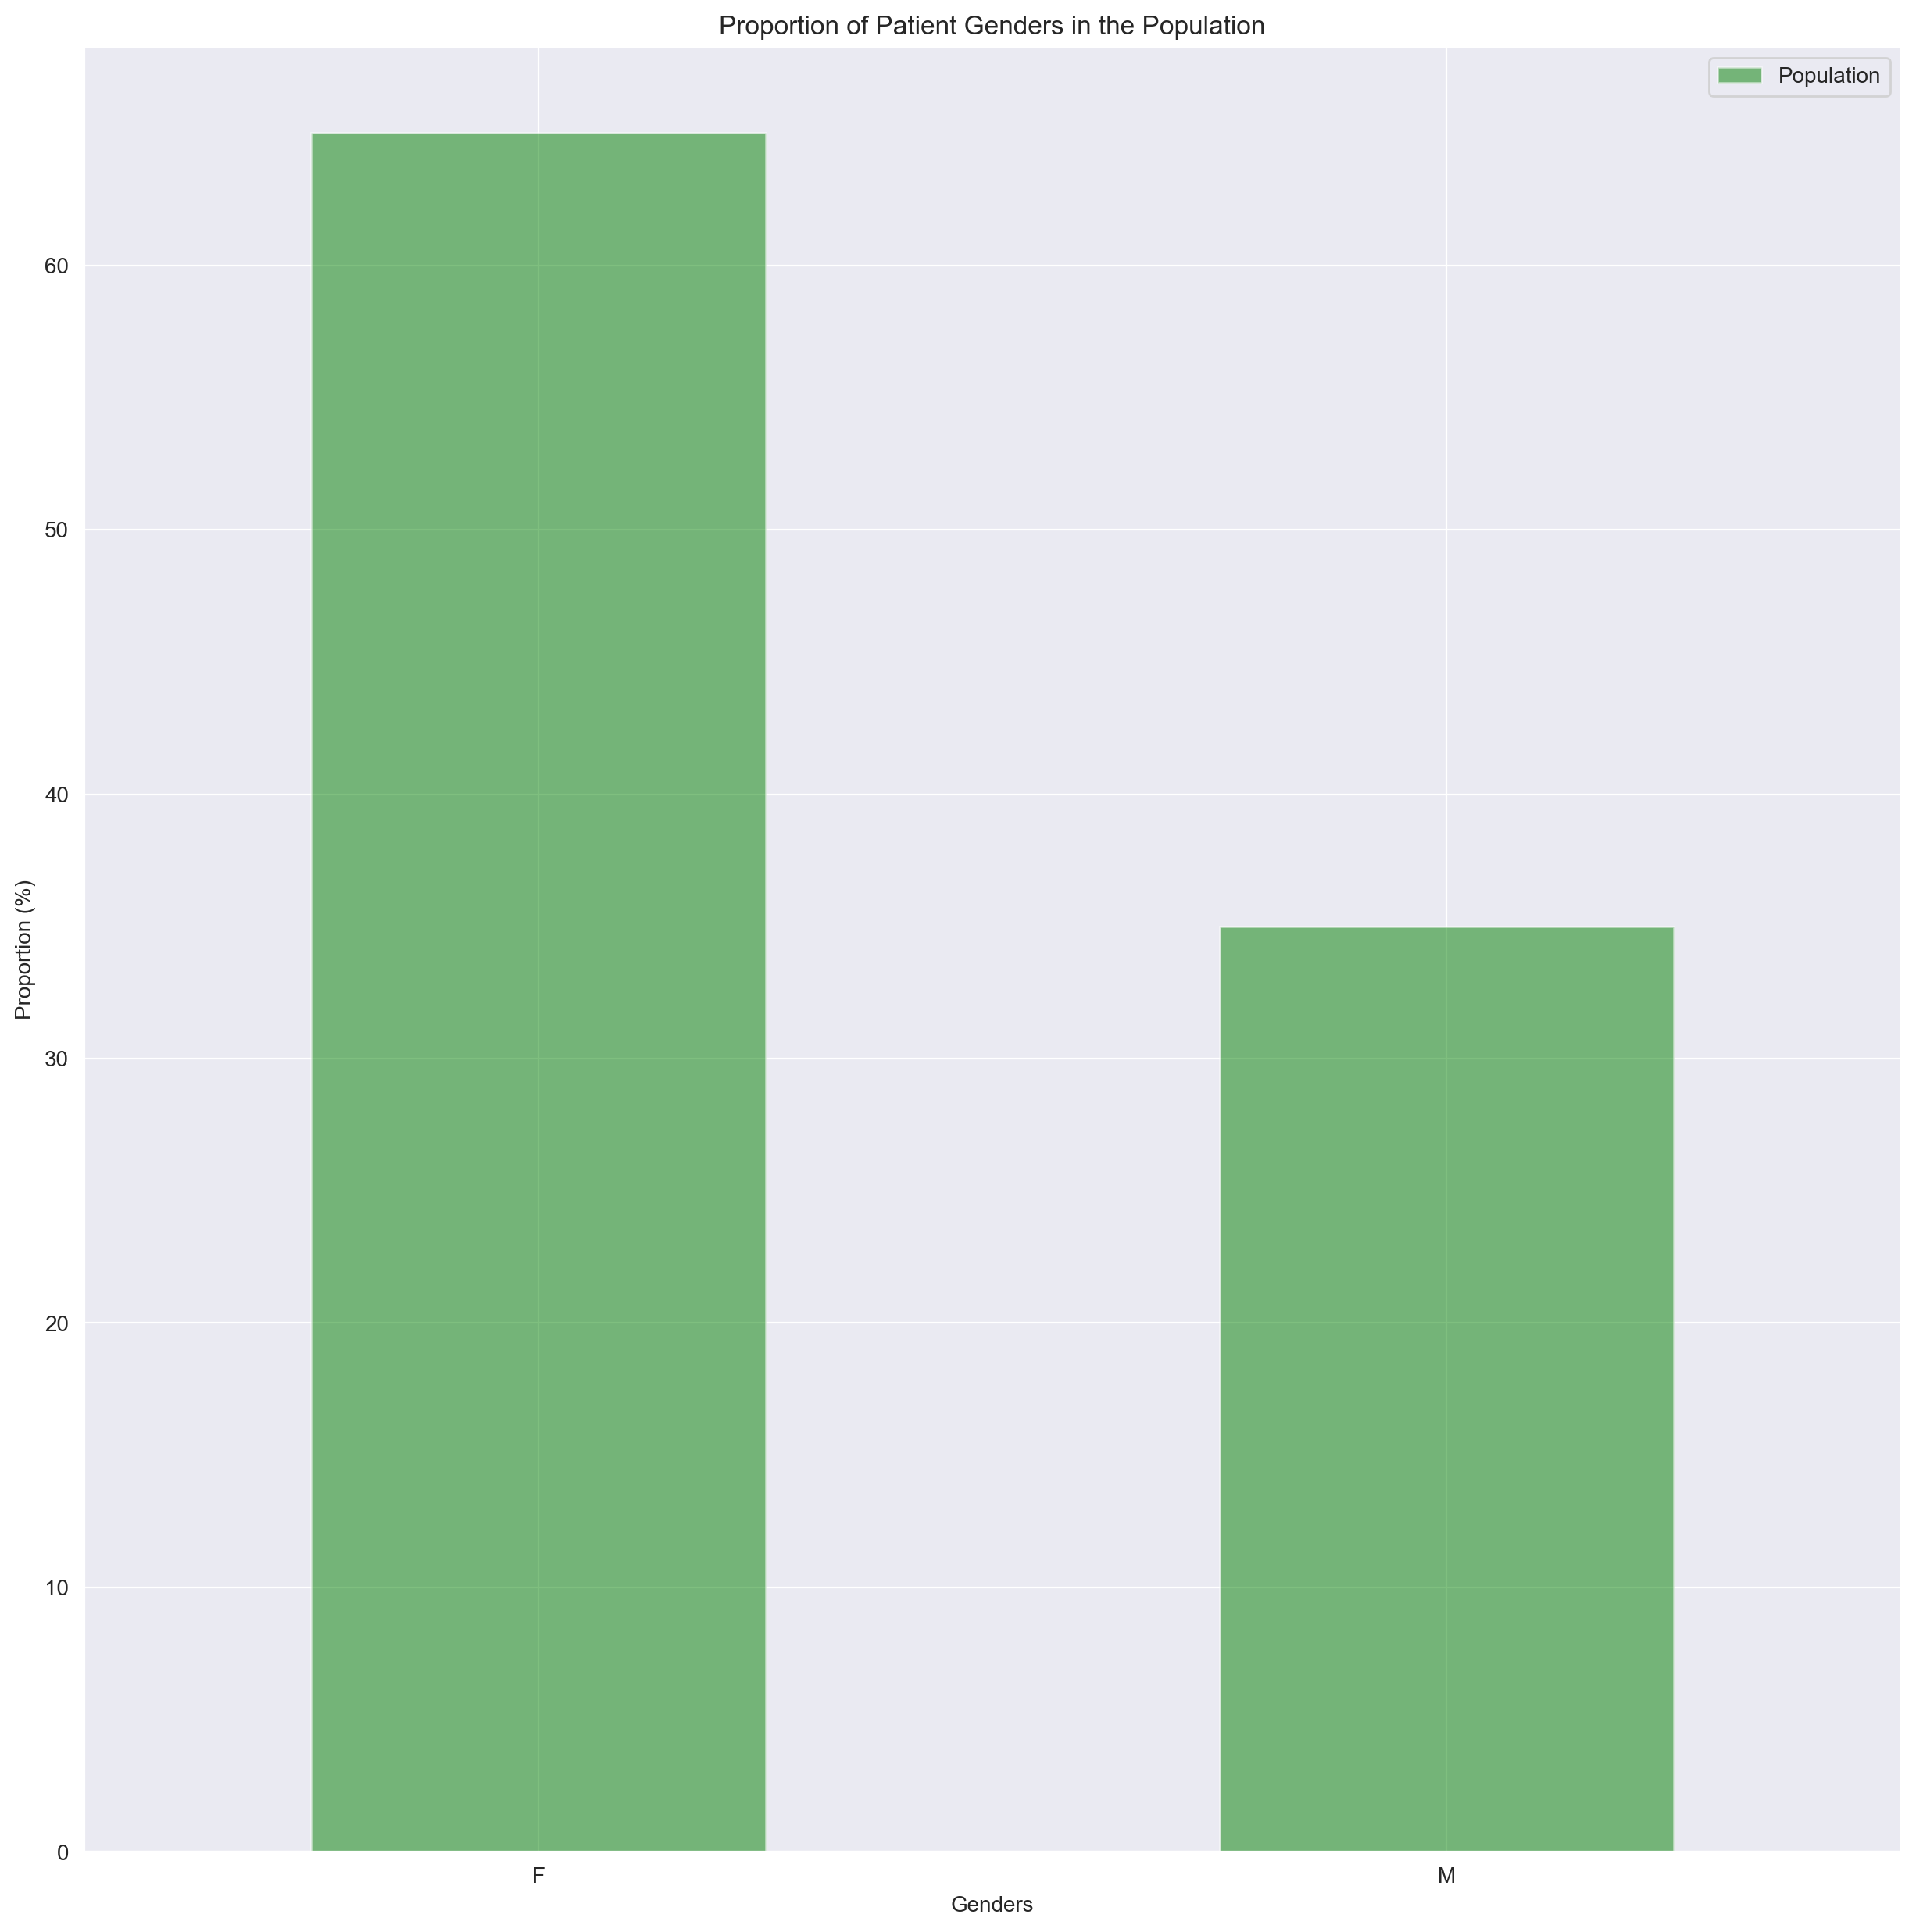

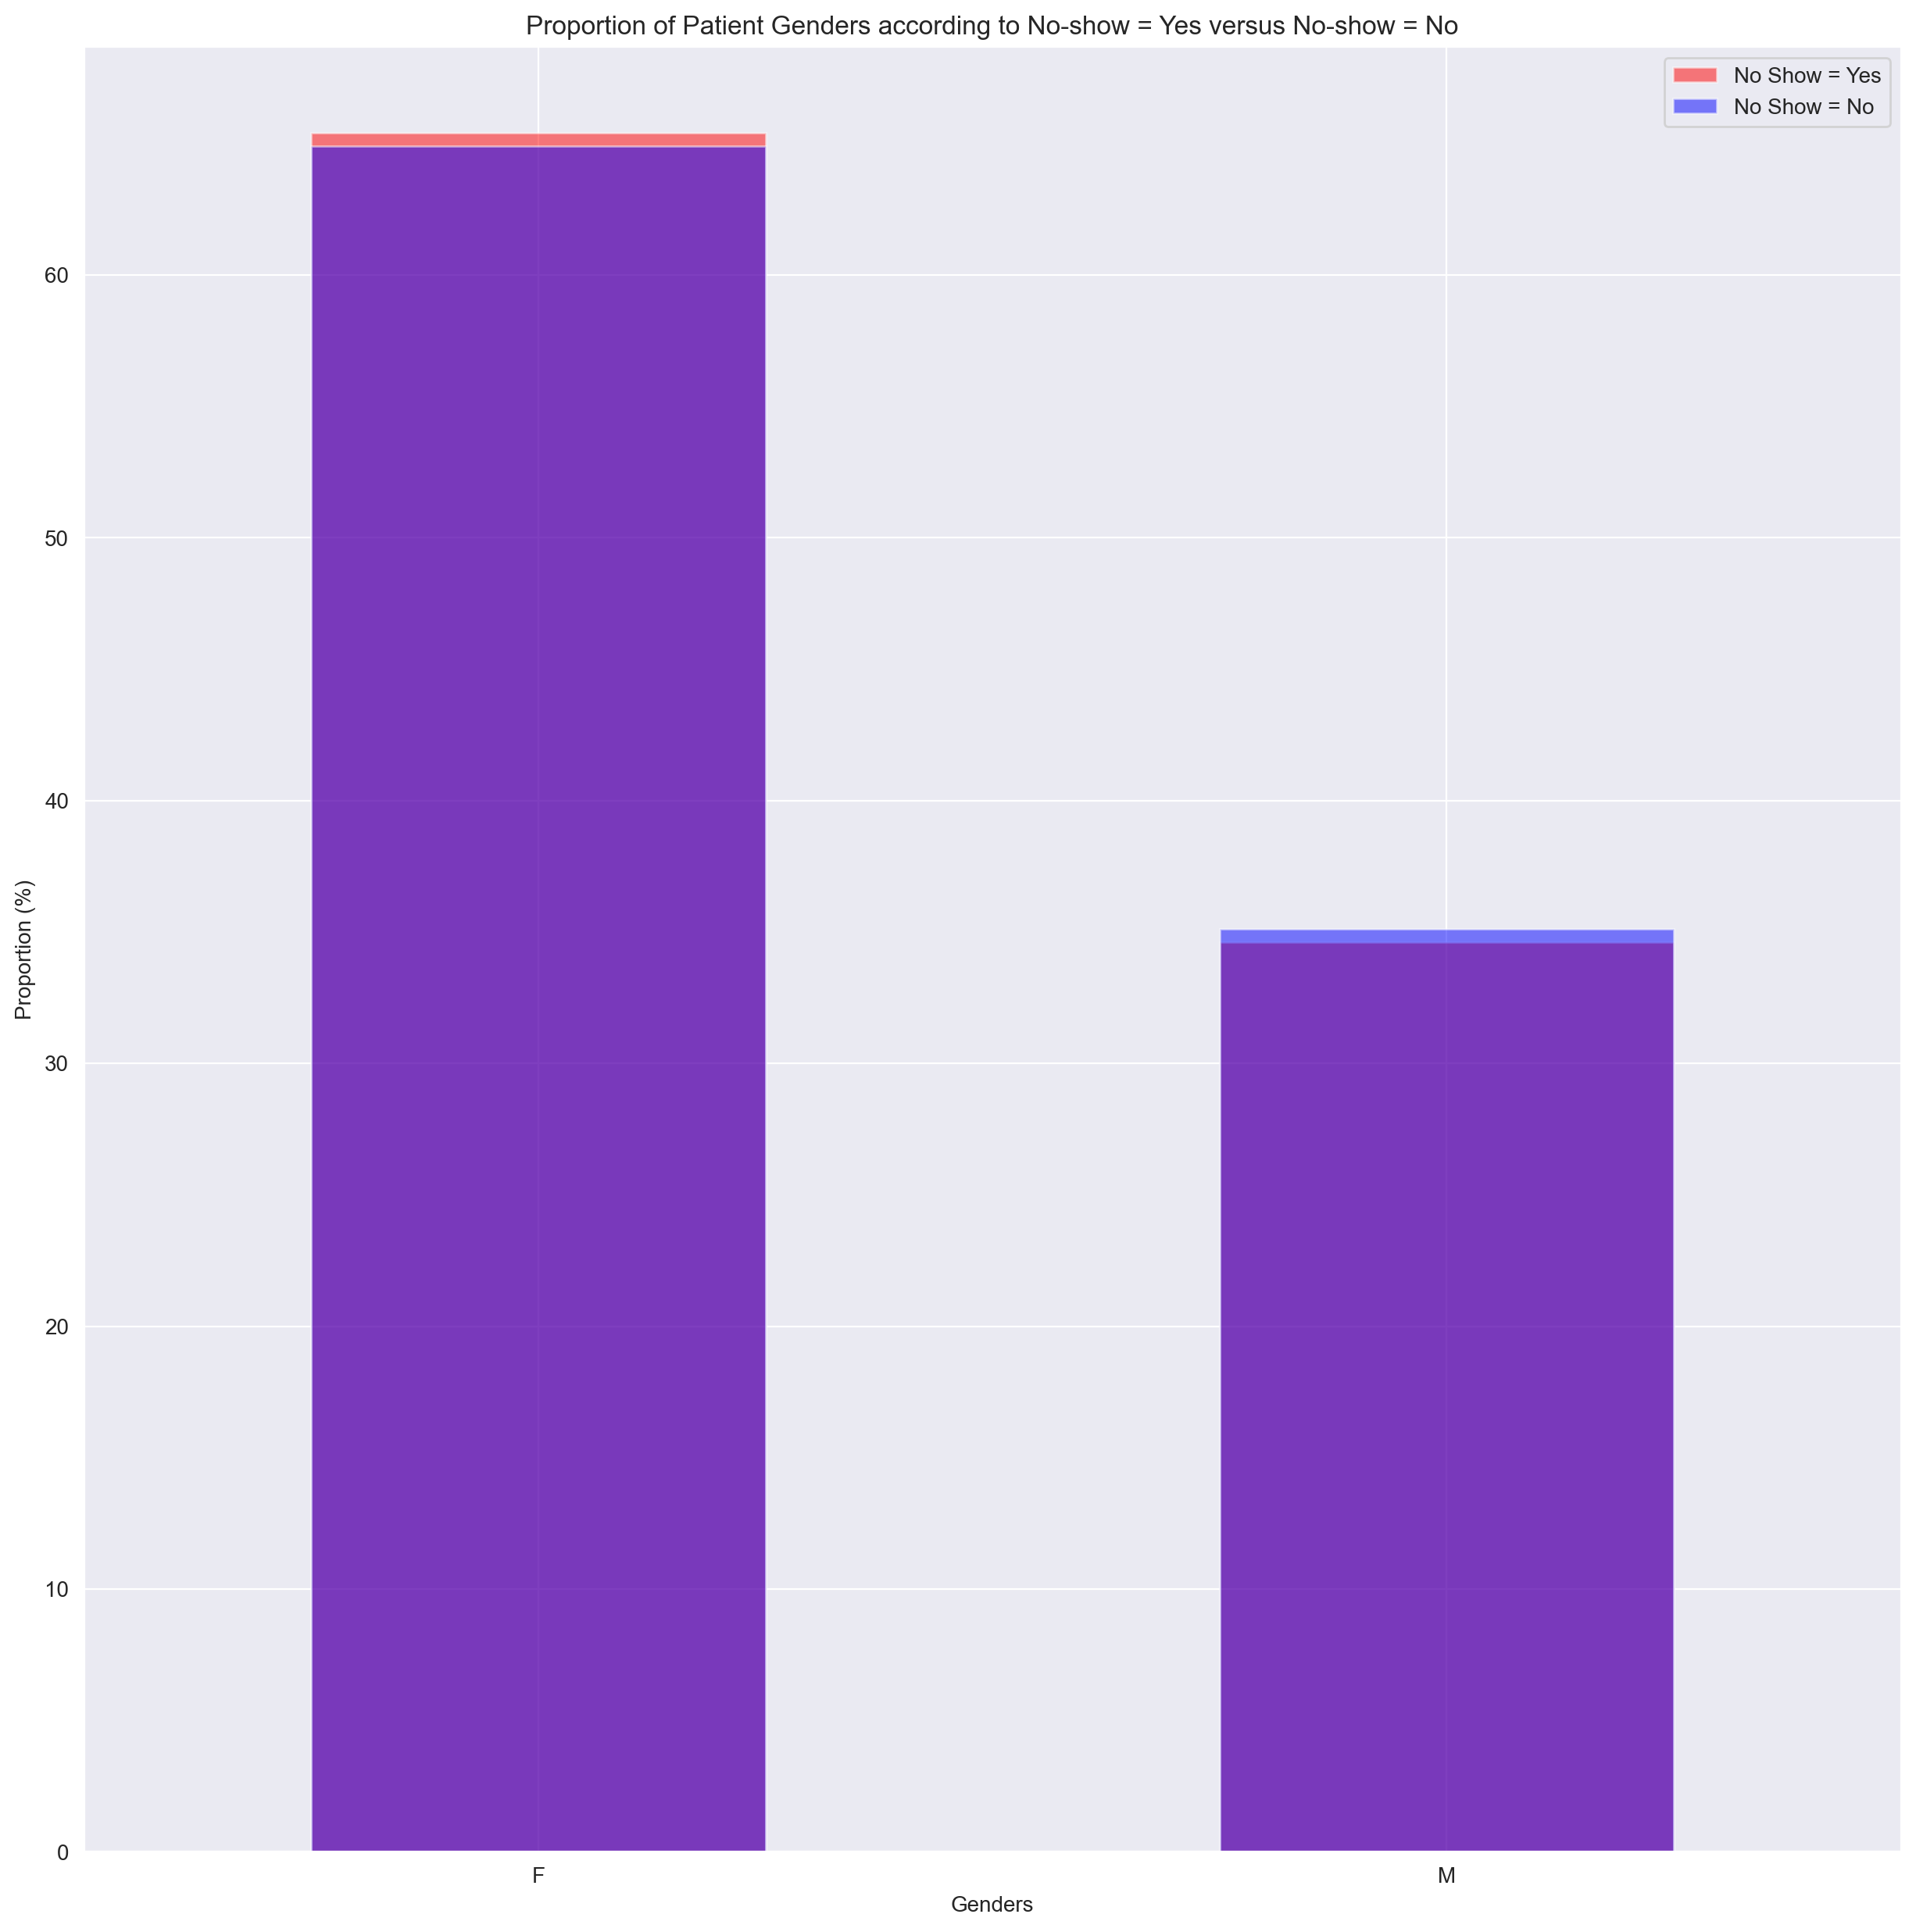

In [10]:
# Plotting some data visualisations of profile of No-shows = "Yes" versus No-shows = "No"

(100 * initial_df["Gender"].value_counts()/ initial_df["Gender"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "Population", color = "green", figsize=(15, 15))
plt.title("Proportion of Patient Genders in the Population")
plt.xlabel("Genders")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()


(100 * initial_df[initial_df["No-show"]=="Yes"]["Gender"].value_counts()/ initial_df[initial_df["No-show"]=="Yes"]["Gender"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, label = "No Show = Yes", color = "red")
(100 * initial_df[initial_df["No-show"]=="No"]["Gender"].value_counts()/ initial_df[initial_df["No-show"]=="No"]["Gender"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "No Show = No", color = "blue", figsize=(15, 15))
plt.title("Proportion of Patient Genders according to No-show = Yes versus No-show = No")
plt.xlabel("Genders")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()


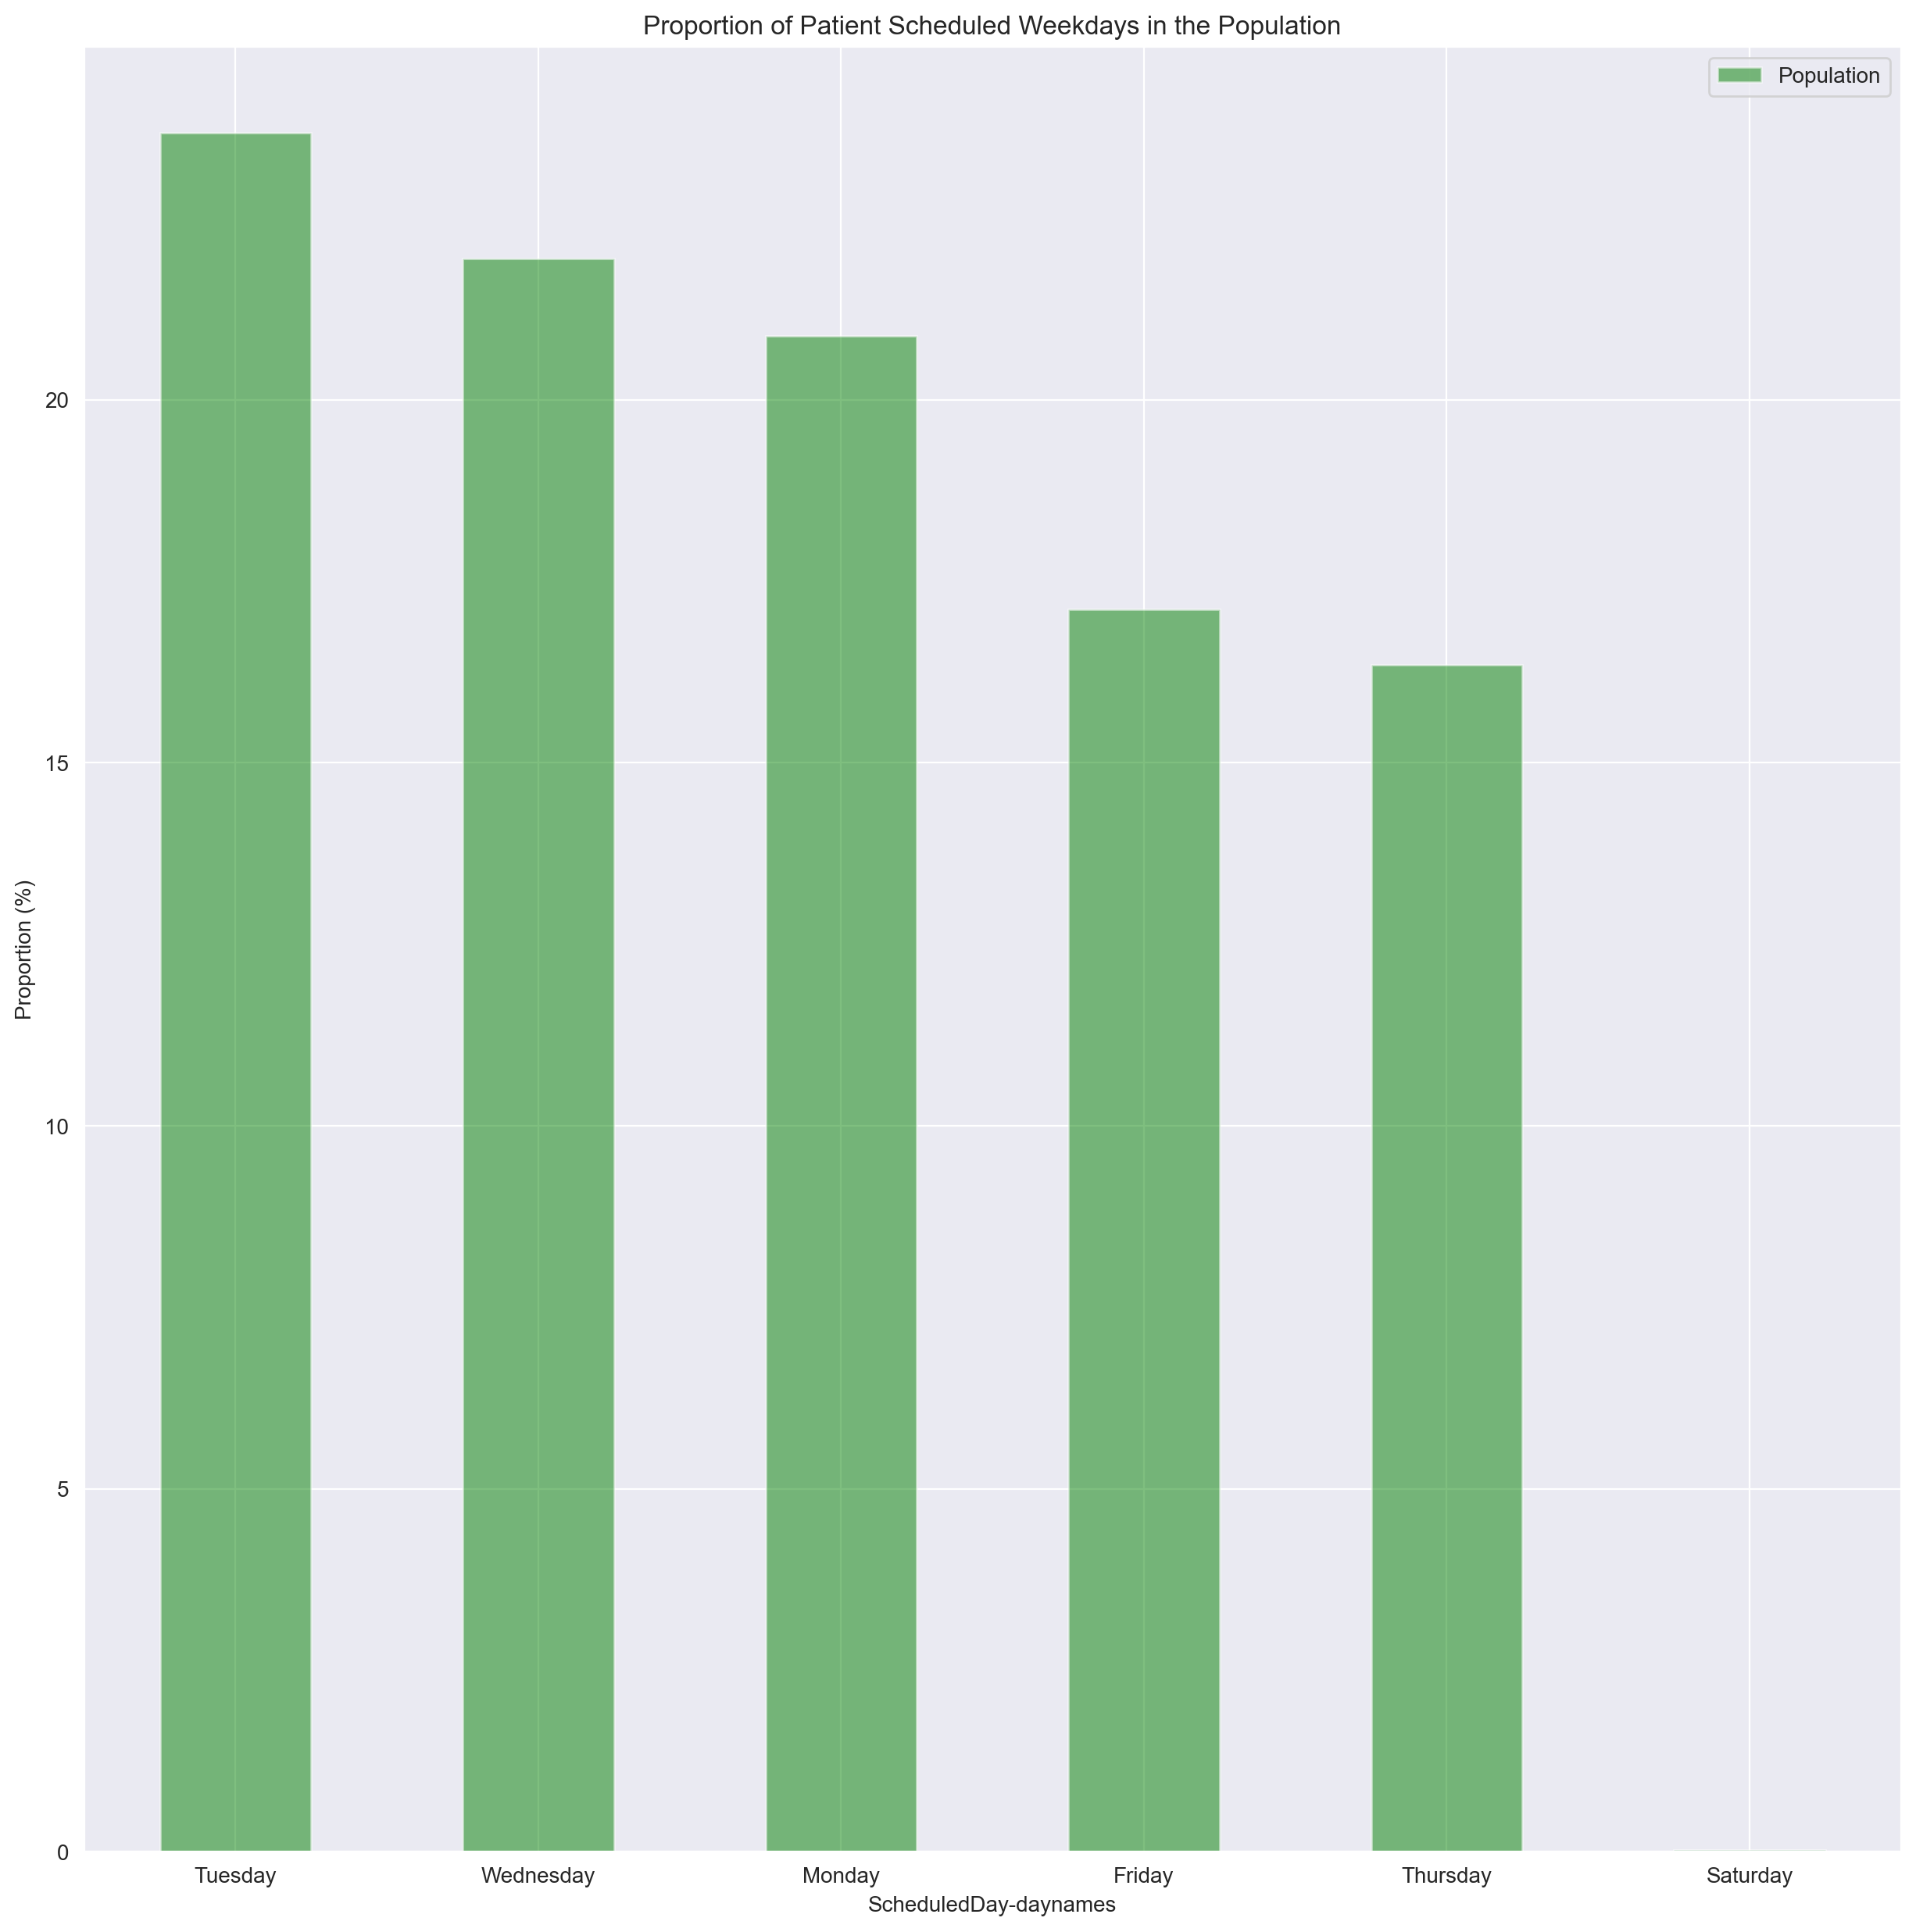

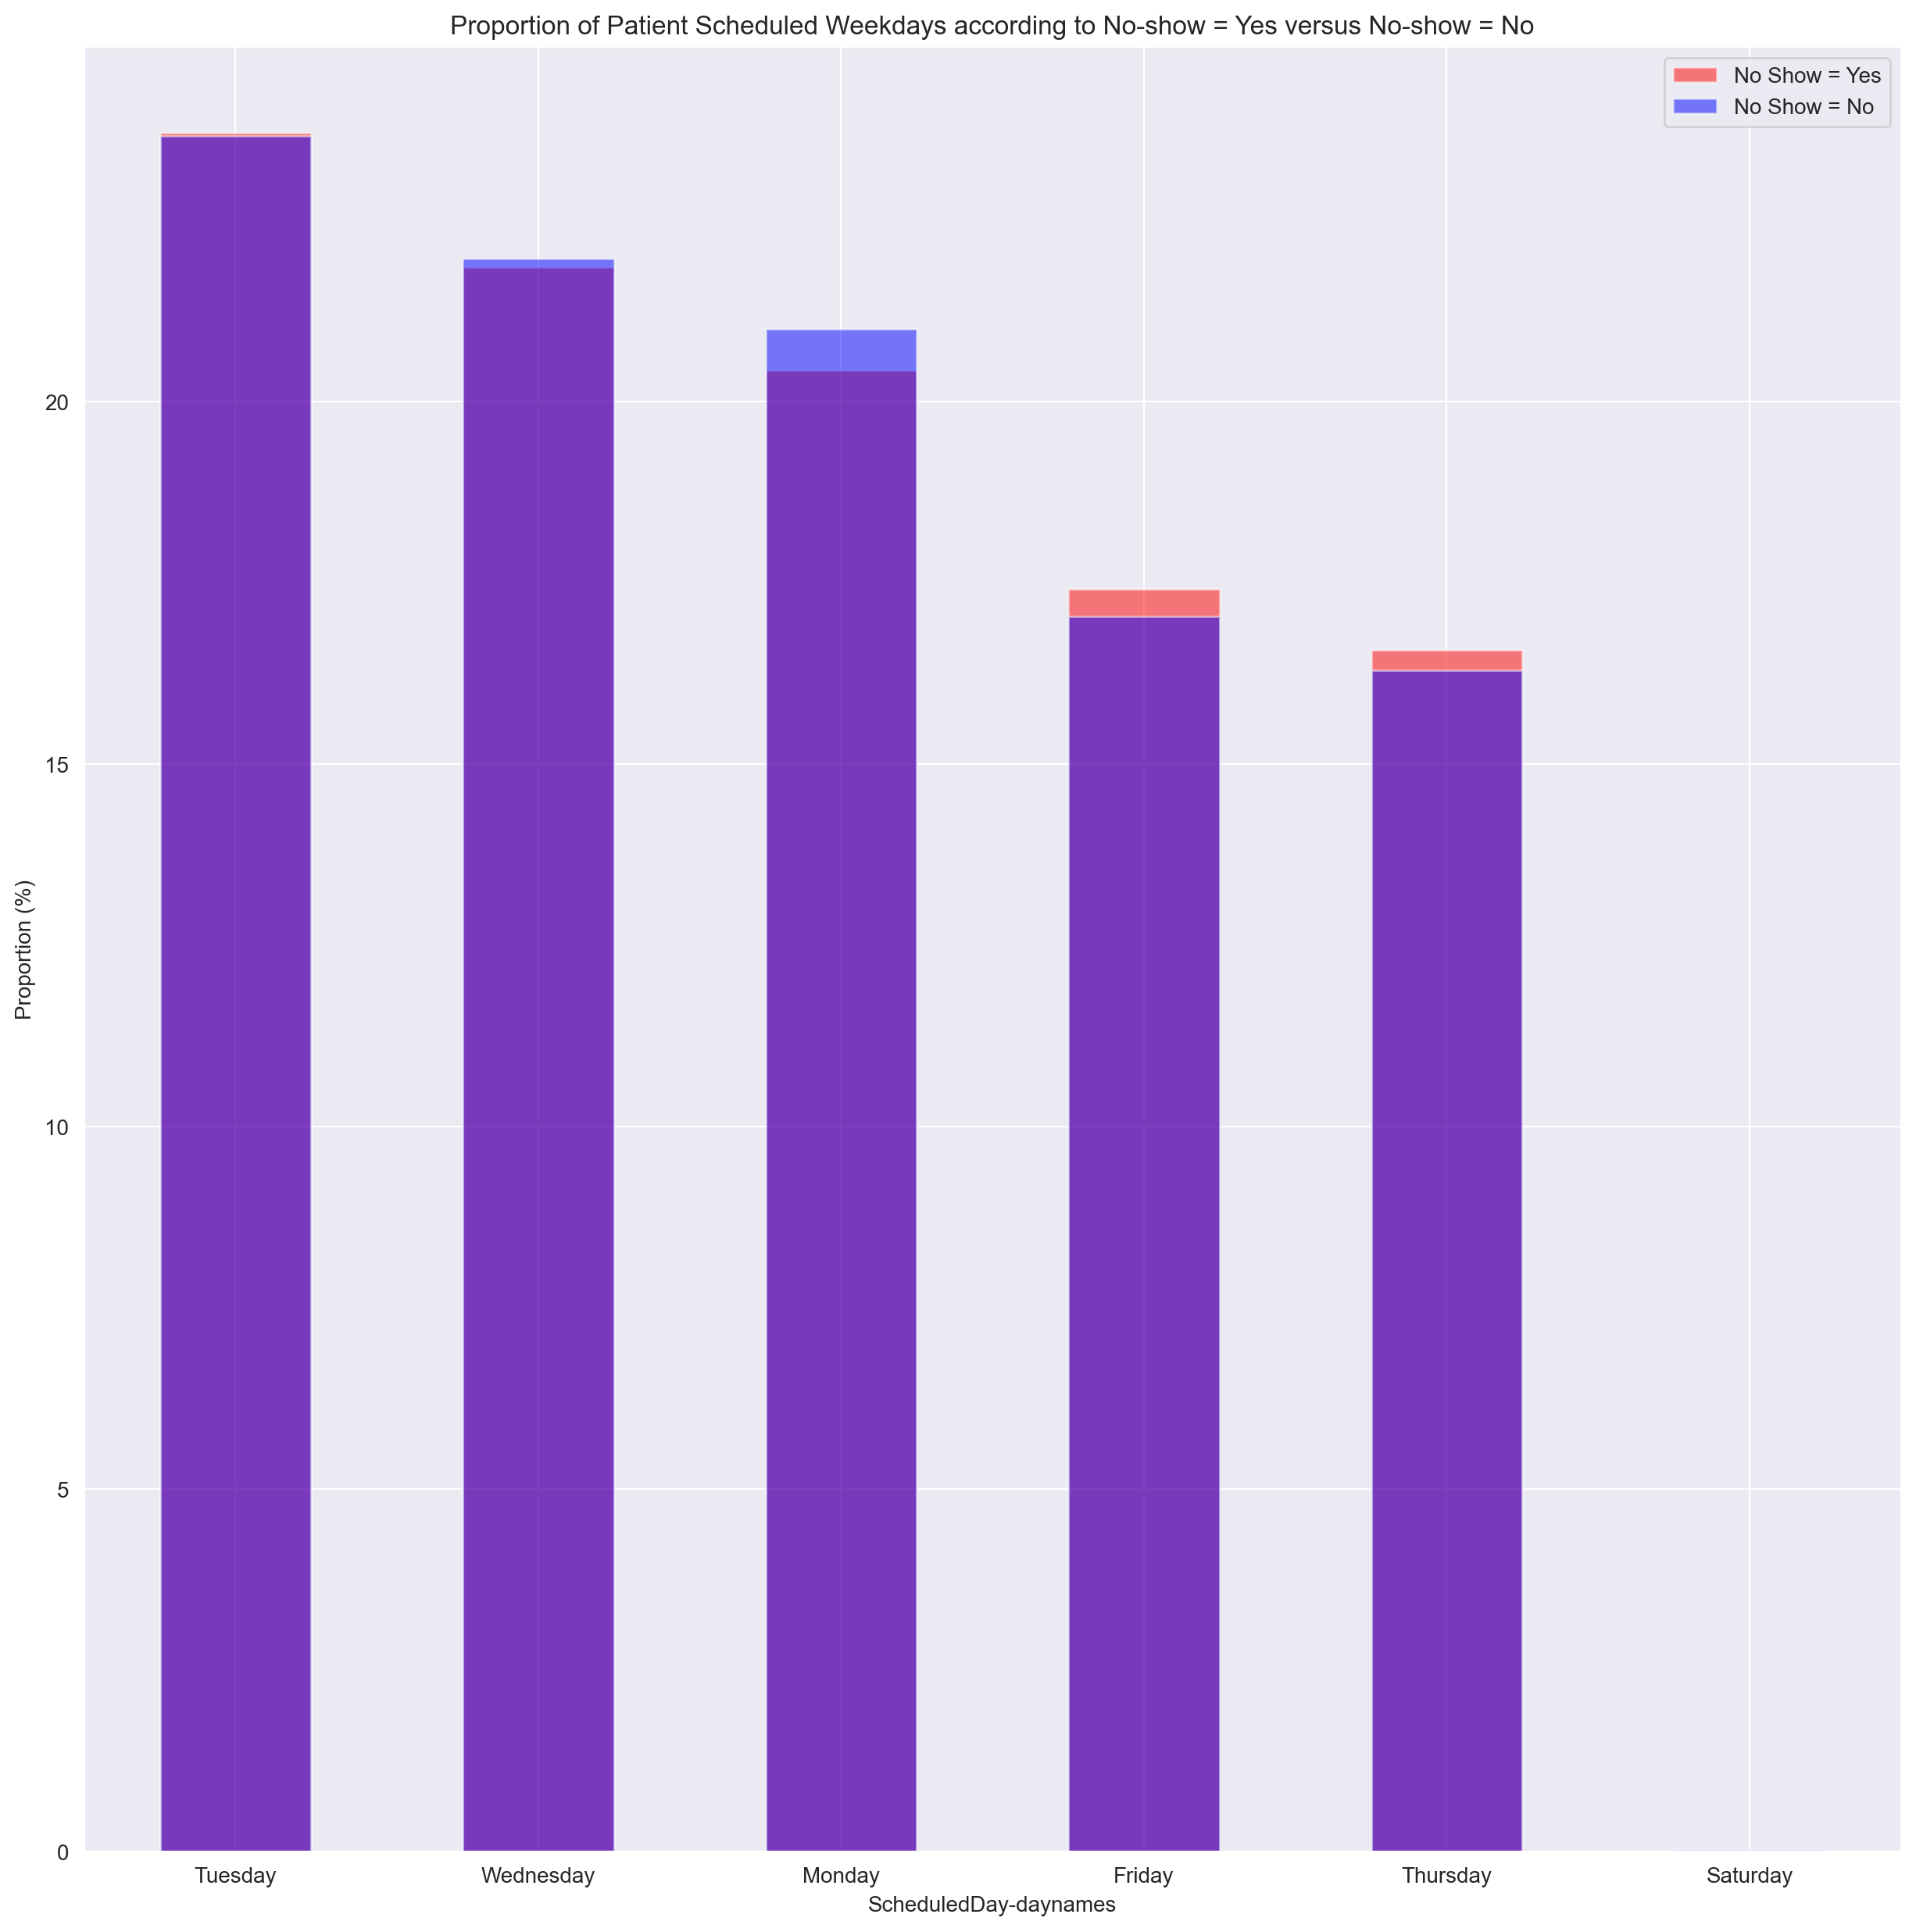

In [11]:
(100 * initial_df["ScheduledDay-dayname"].value_counts()/ initial_df["ScheduledDay-dayname"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "Population", color = "green", figsize=(15, 15))
plt.title("Proportion of Patient Scheduled Weekdays in the Population")
plt.xlabel("ScheduledDay-daynames")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()


(100 * initial_df[initial_df["No-show"]=="Yes"]["ScheduledDay-dayname"].value_counts()/ initial_df[initial_df["No-show"]=="Yes"]["ScheduledDay-dayname"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, label = "No Show = Yes", color = "red")
(100 * initial_df[initial_df["No-show"]=="No"]["ScheduledDay-dayname"].value_counts()/ initial_df[initial_df["No-show"]=="No"]["ScheduledDay-dayname"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "No Show = No", color = "blue", figsize=(15, 15))
plt.title("Proportion of Patient Scheduled Weekdays according to No-show = Yes versus No-show = No")
plt.xlabel("ScheduledDay-daynames")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()

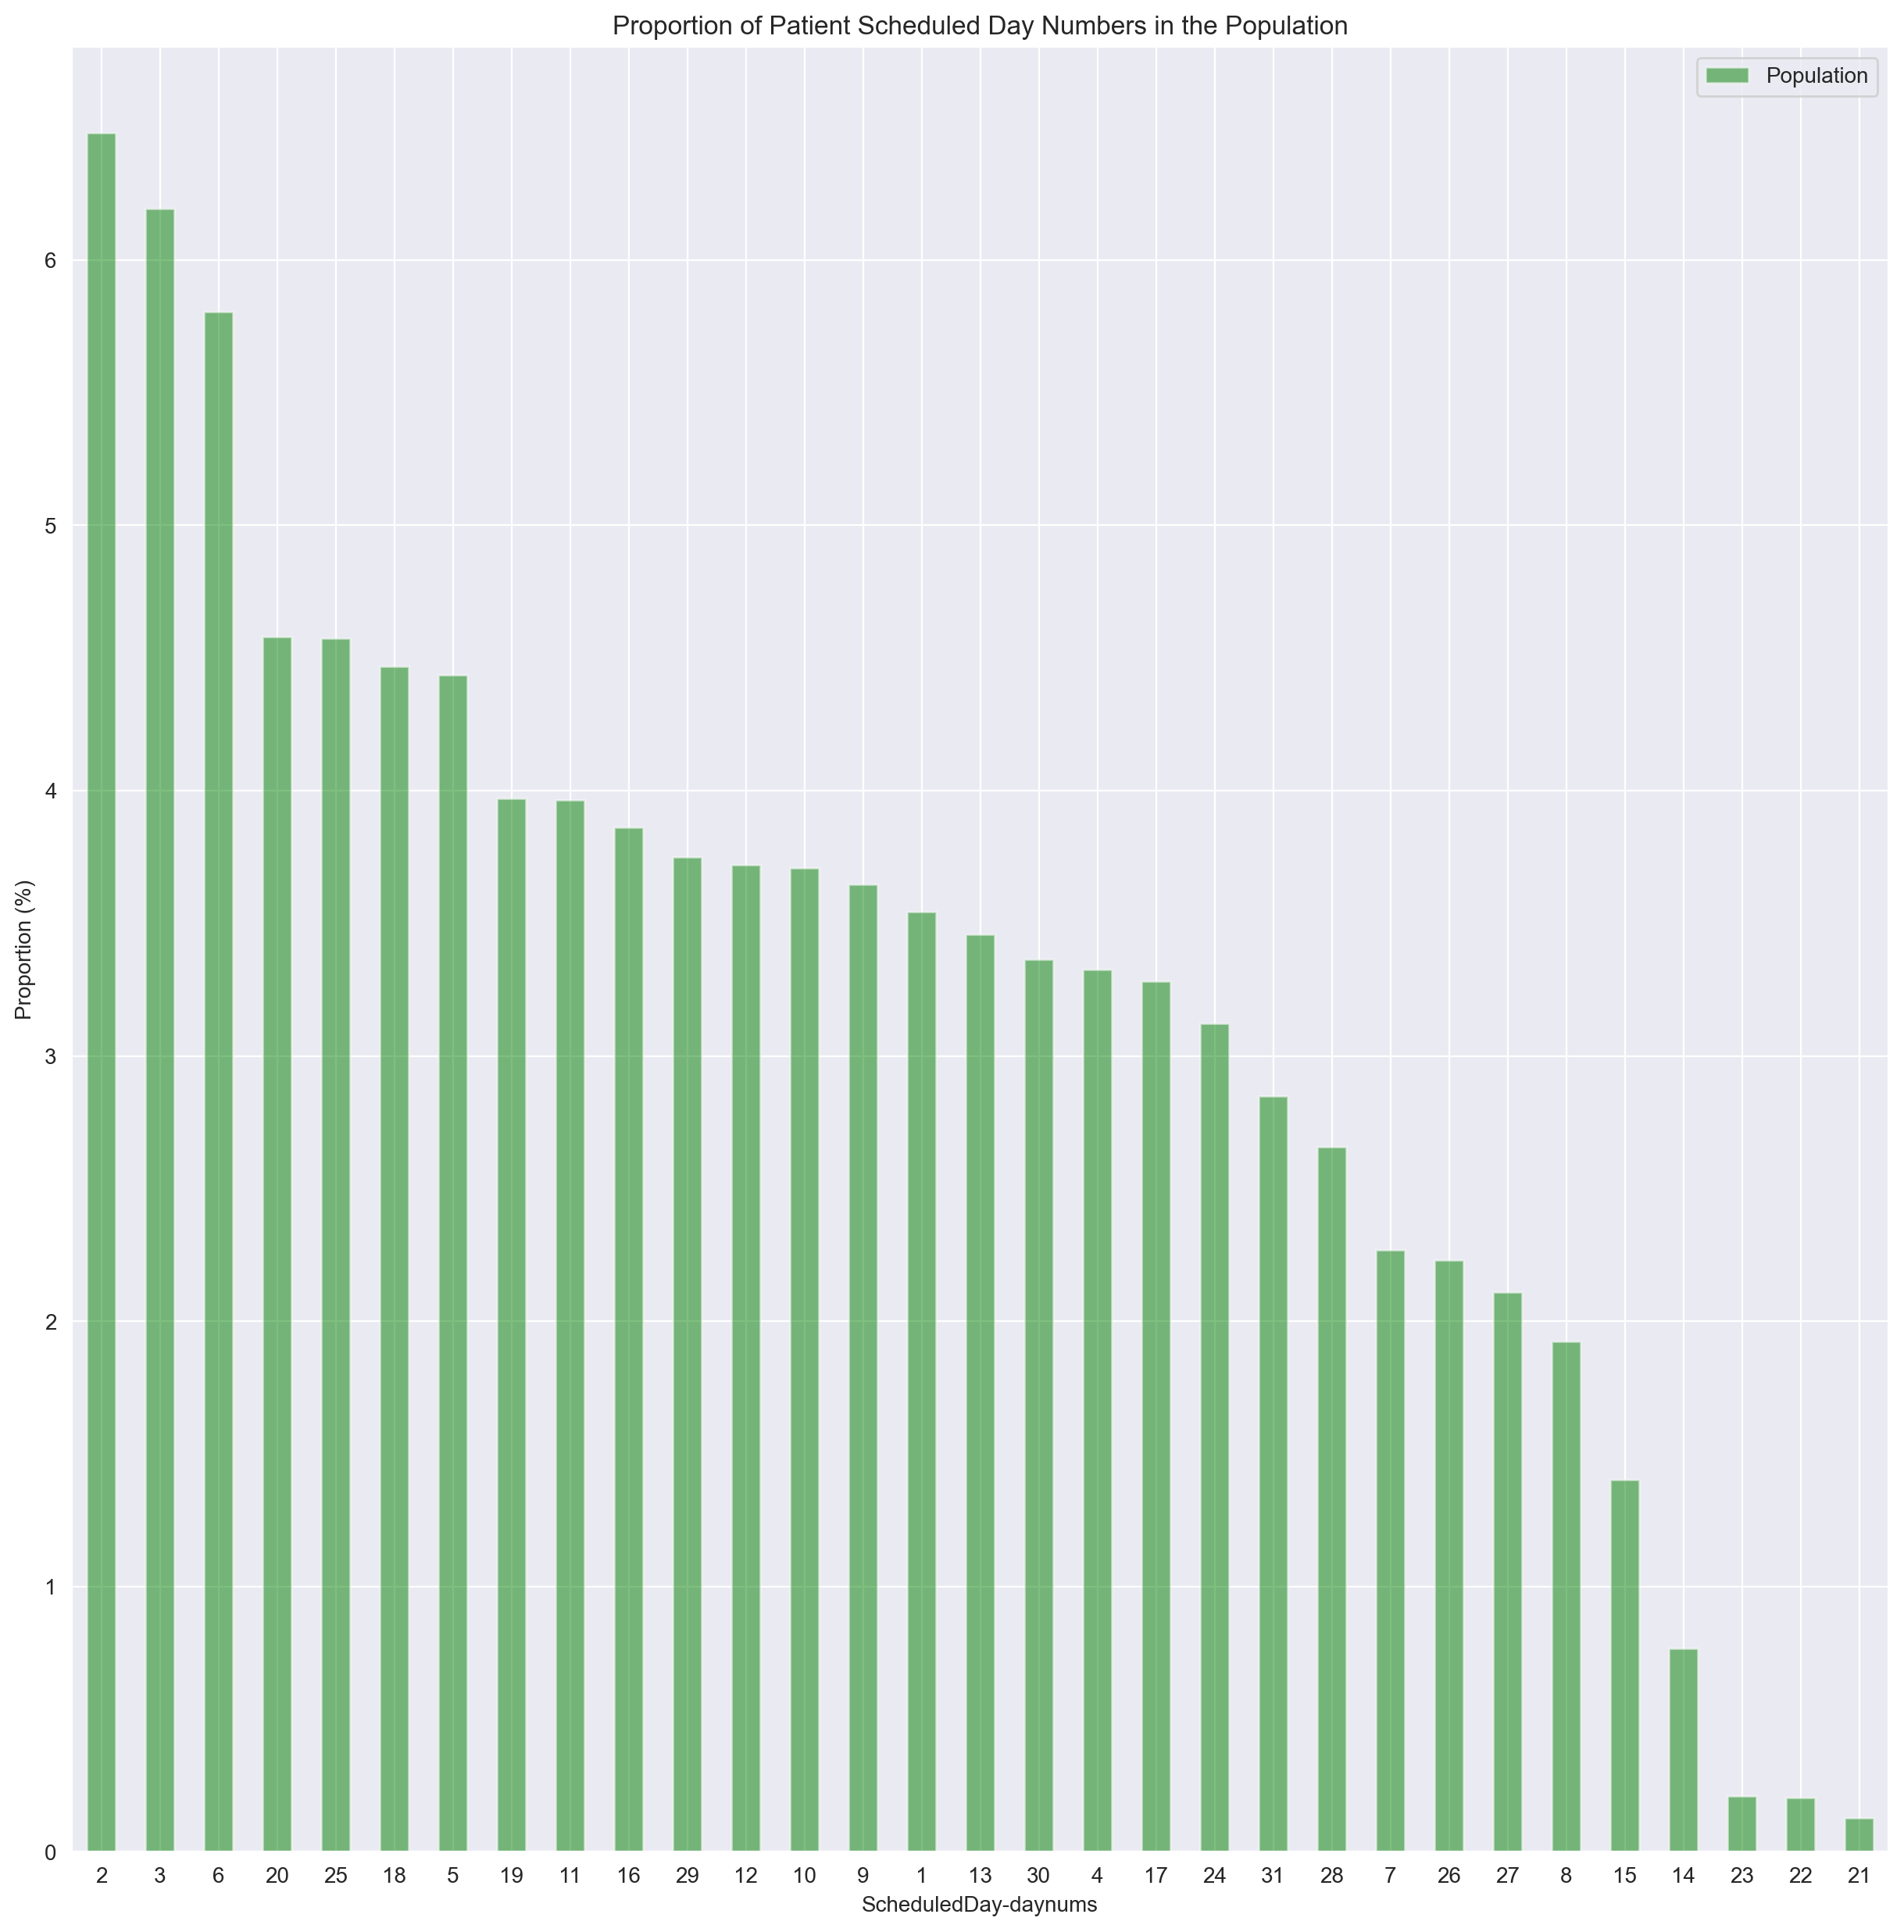

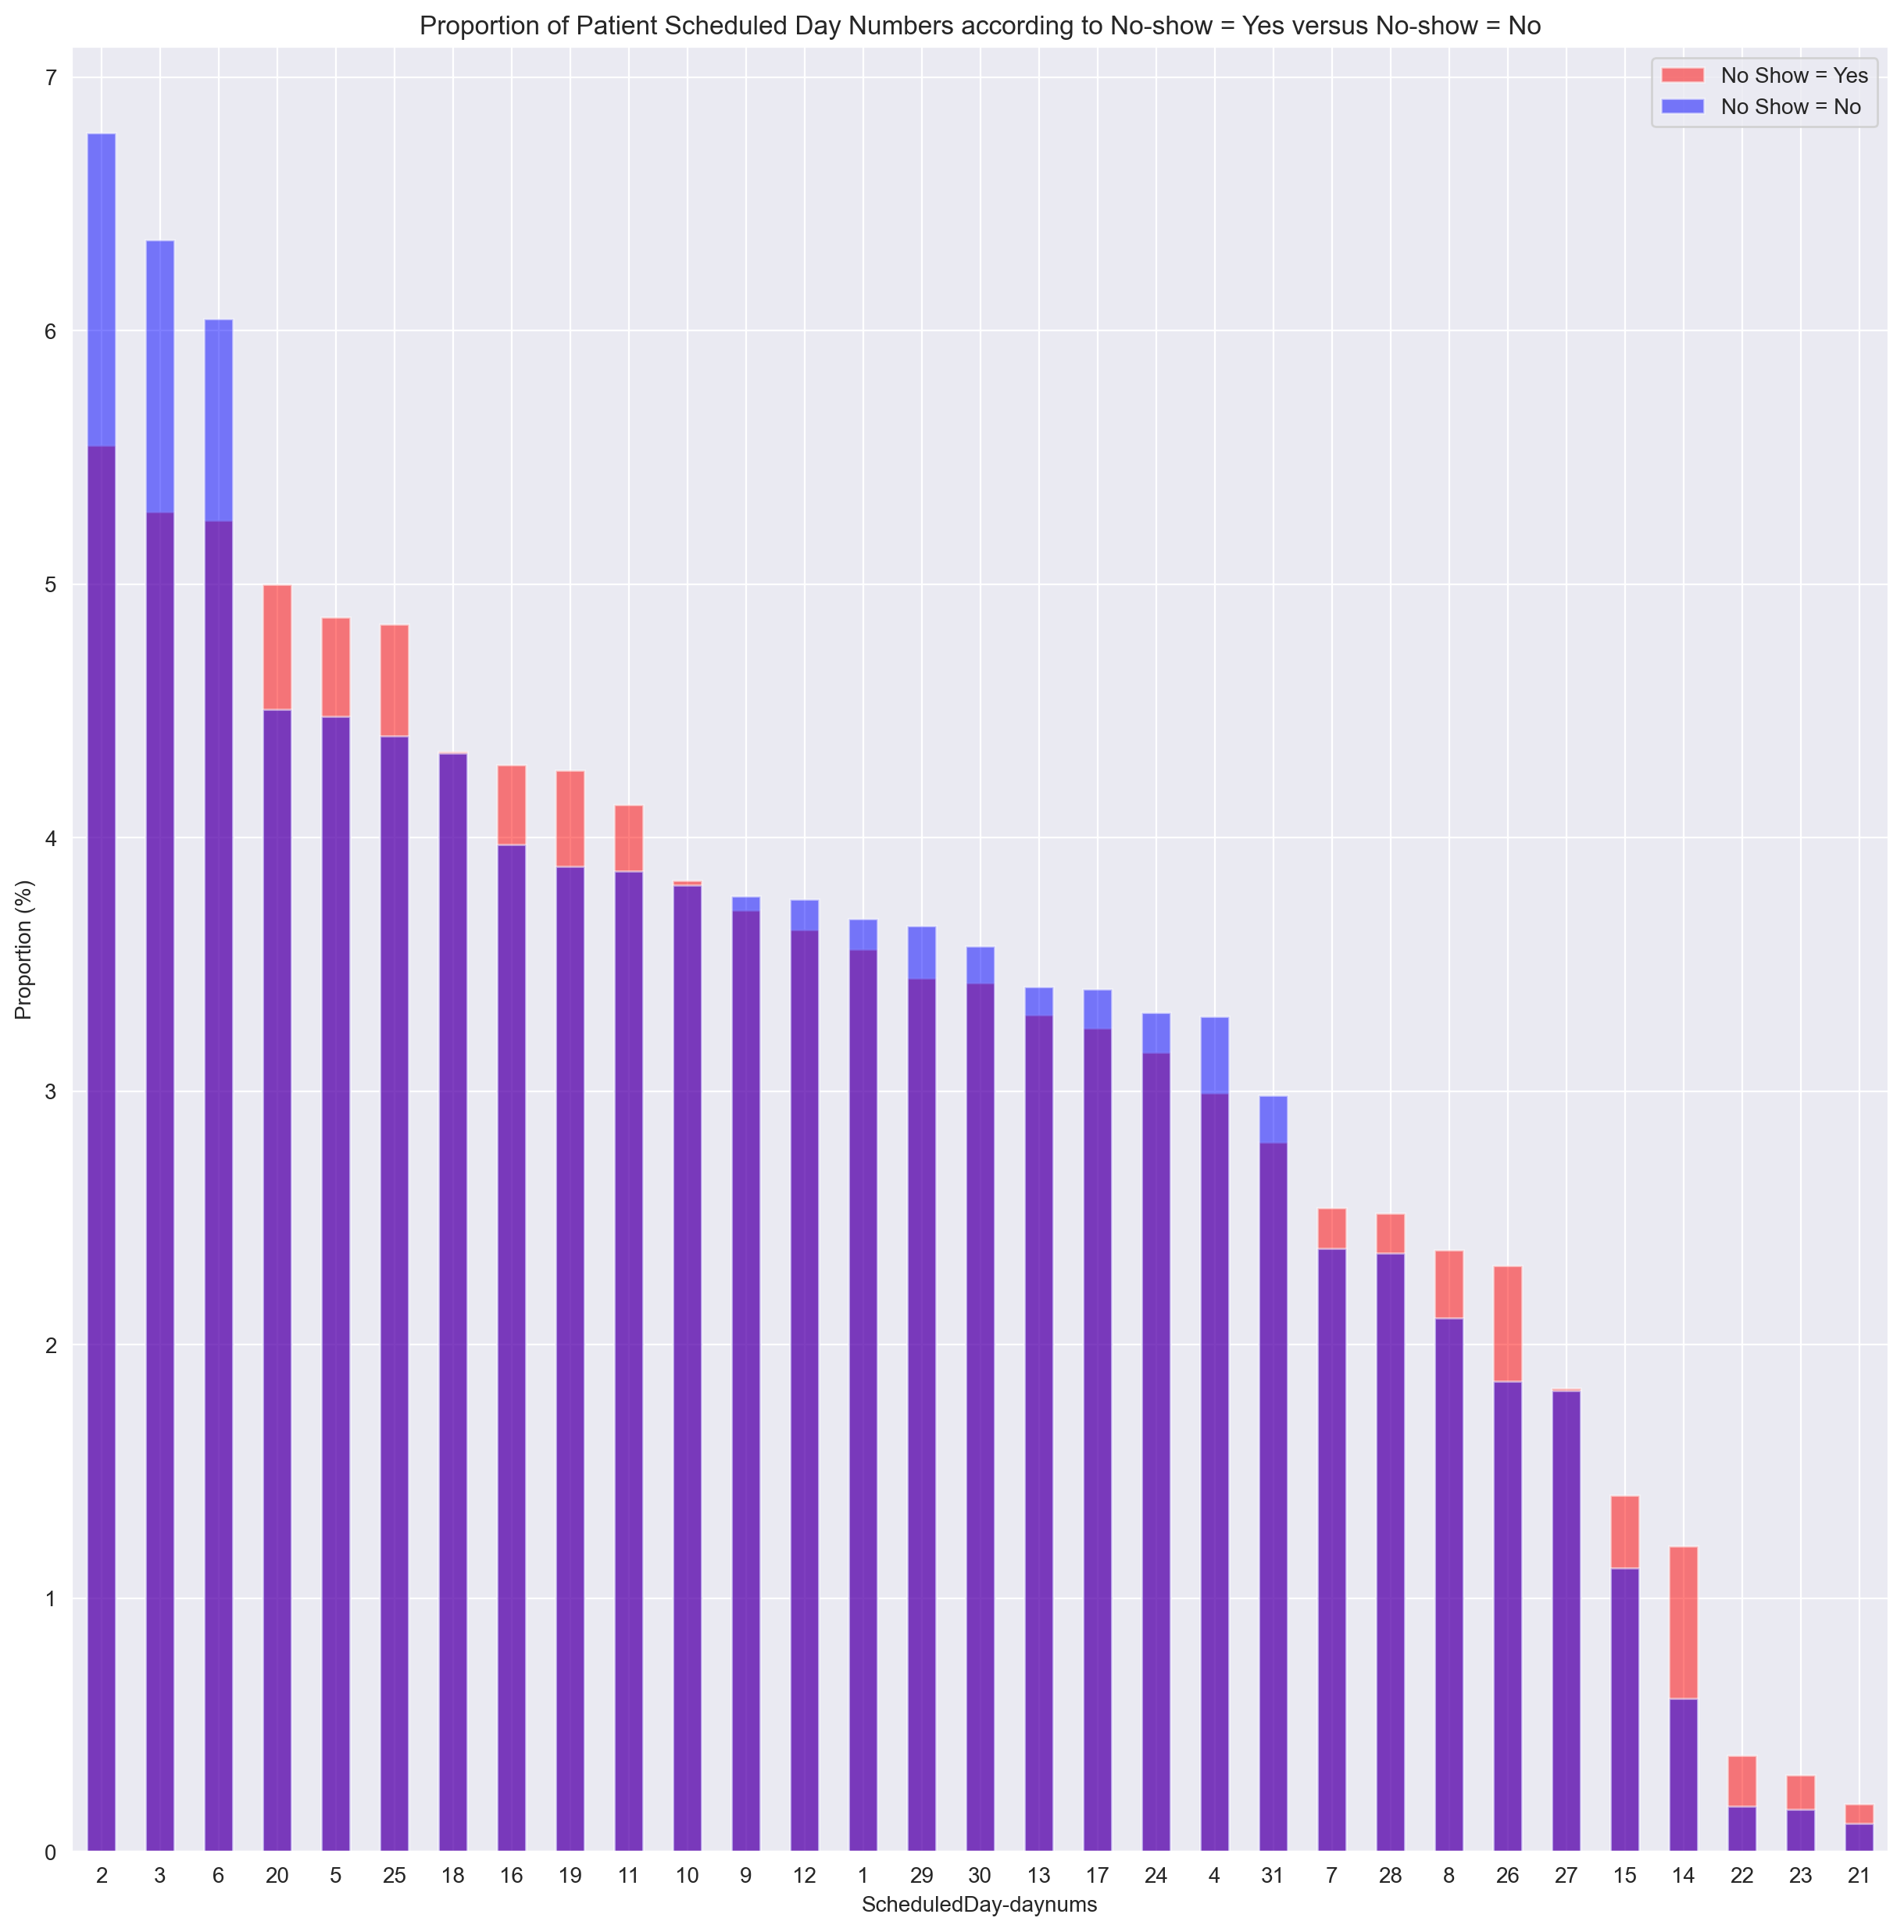

In [12]:
(100 * initial_df["ScheduledDay-daynum"].value_counts()/ initial_df["ScheduledDay-daynum"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "Population", color = "green", figsize=(15, 15))
plt.title("Proportion of Patient Scheduled Day Numbers in the Population")
plt.xlabel("ScheduledDay-daynums")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()


(100 * initial_df[initial_df["No-show"]=="Yes"]["ScheduledDay-daynum"].value_counts()/ initial_df[initial_df["No-show"]=="Yes"]["ScheduledDay-daynum"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, label = "No Show = Yes", color = "red")
(100 * initial_df[initial_df["No-show"]=="No"]["ScheduledDay-daynum"].value_counts()/ initial_df[initial_df["No-show"]=="No"]["ScheduledDay-daynum"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "No Show = No", color = "blue", figsize=(15, 15))
plt.title("Proportion of Patient Scheduled Day Numbers according to No-show = Yes versus No-show = No")
plt.xlabel("ScheduledDay-daynums")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()

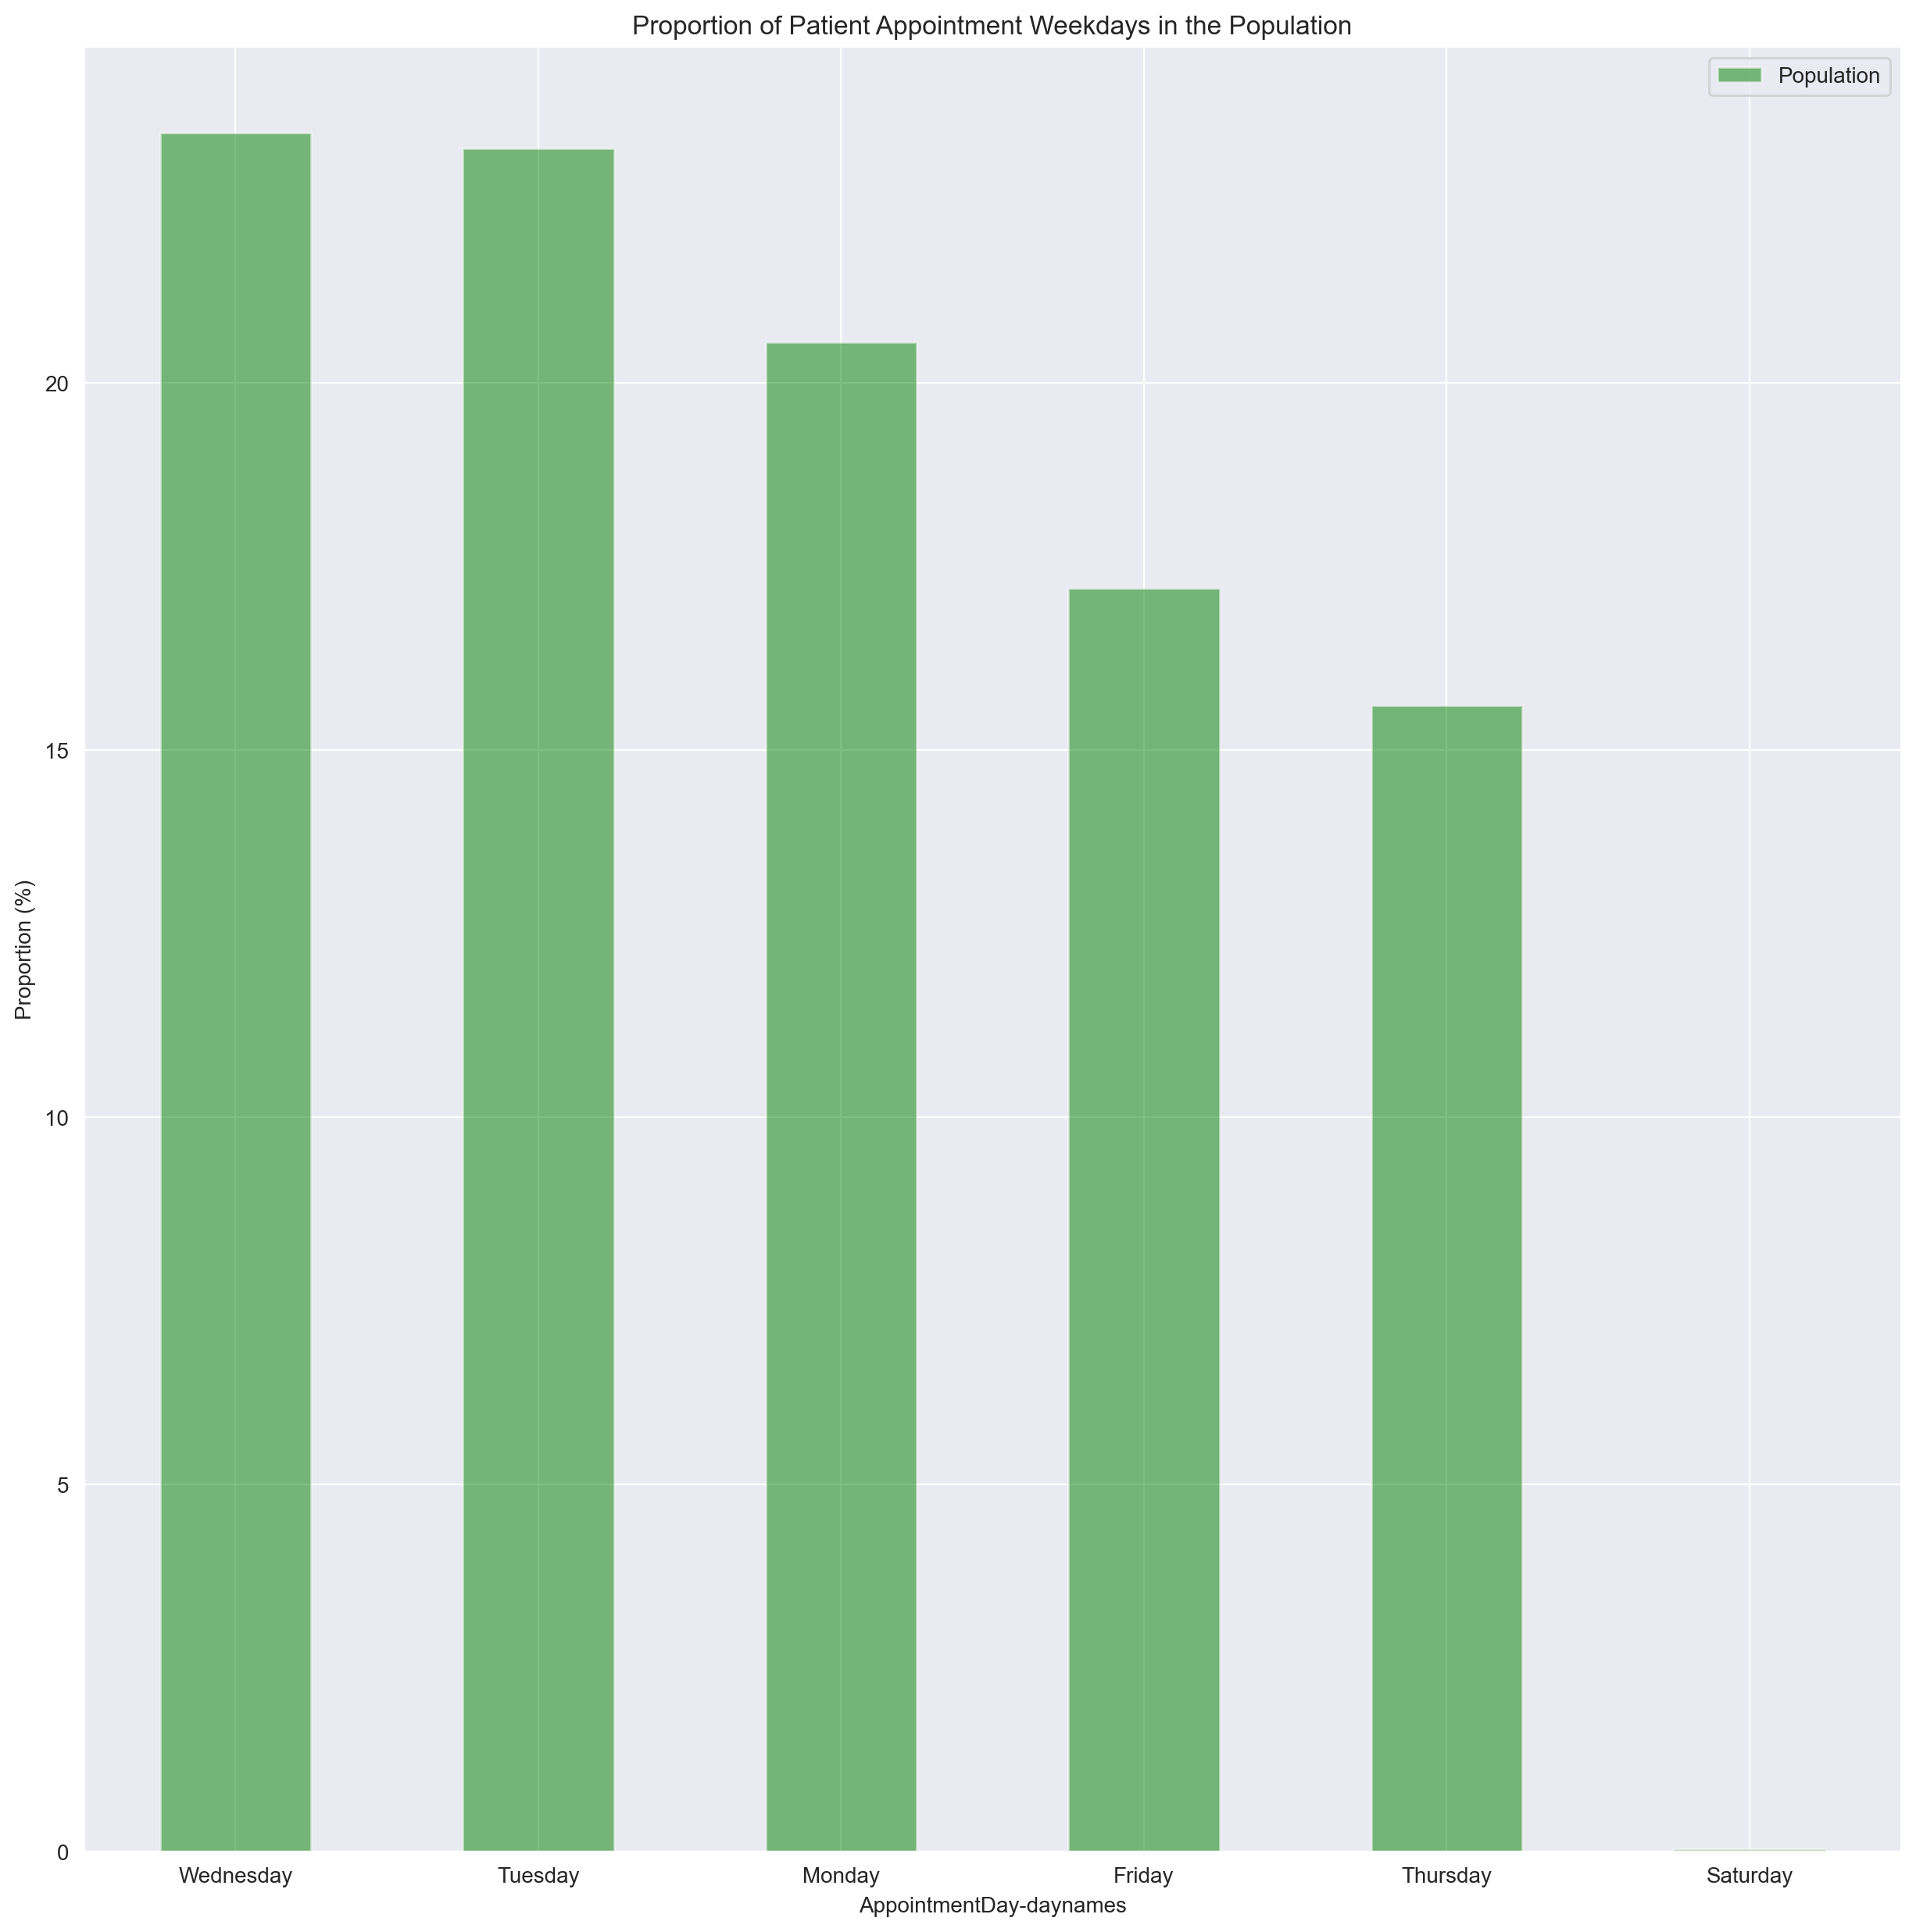

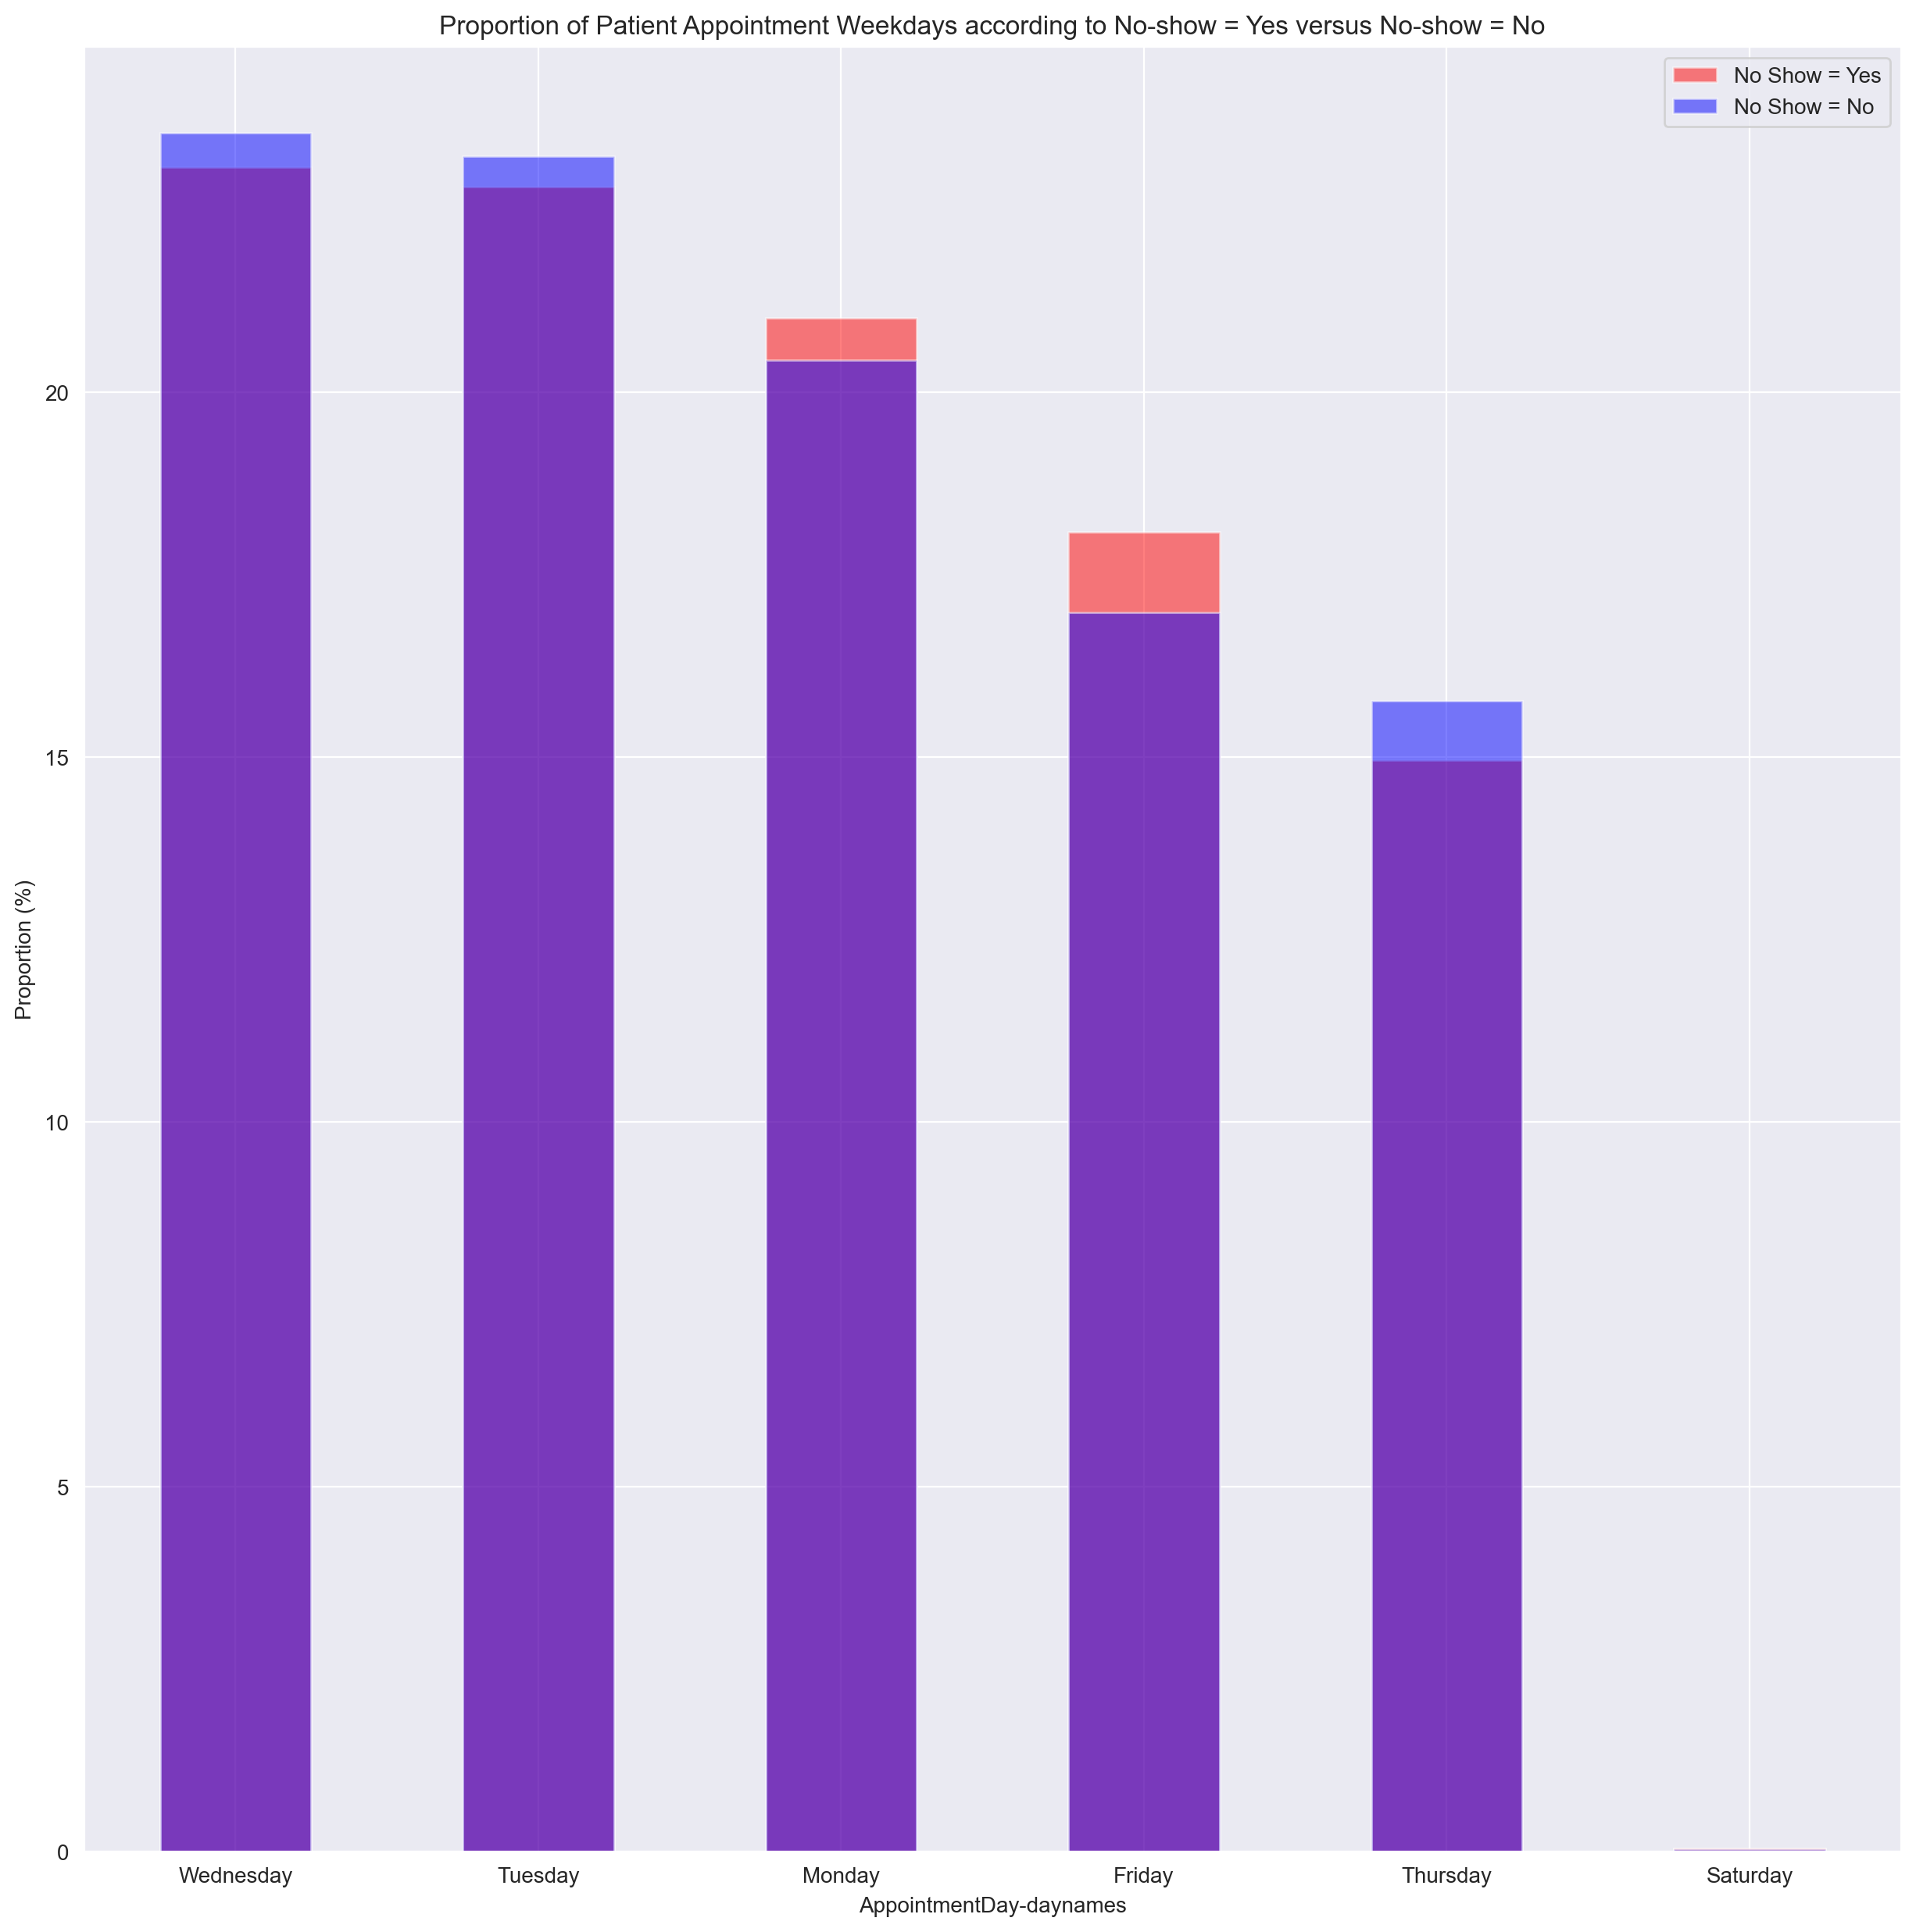

In [13]:
(100 * initial_df["AppointmentDay-dayname"].value_counts()/ initial_df["AppointmentDay-dayname"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "Population", color = "green", figsize=(15, 15))
plt.title("Proportion of Patient Appointment Weekdays in the Population")
plt.xlabel("AppointmentDay-daynames")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()


(100 * initial_df[initial_df["No-show"]=="Yes"]["AppointmentDay-dayname"].value_counts()/ initial_df[initial_df["No-show"]=="Yes"]["AppointmentDay-dayname"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, label = "No Show = Yes", color = "red")
(100 * initial_df[initial_df["No-show"]=="No"]["AppointmentDay-dayname"].value_counts()/ initial_df[initial_df["No-show"]=="No"]["AppointmentDay-dayname"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "No Show = No", color = "blue", figsize=(15, 15))
plt.title("Proportion of Patient Appointment Weekdays according to No-show = Yes versus No-show = No")
plt.xlabel("AppointmentDay-daynames")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()

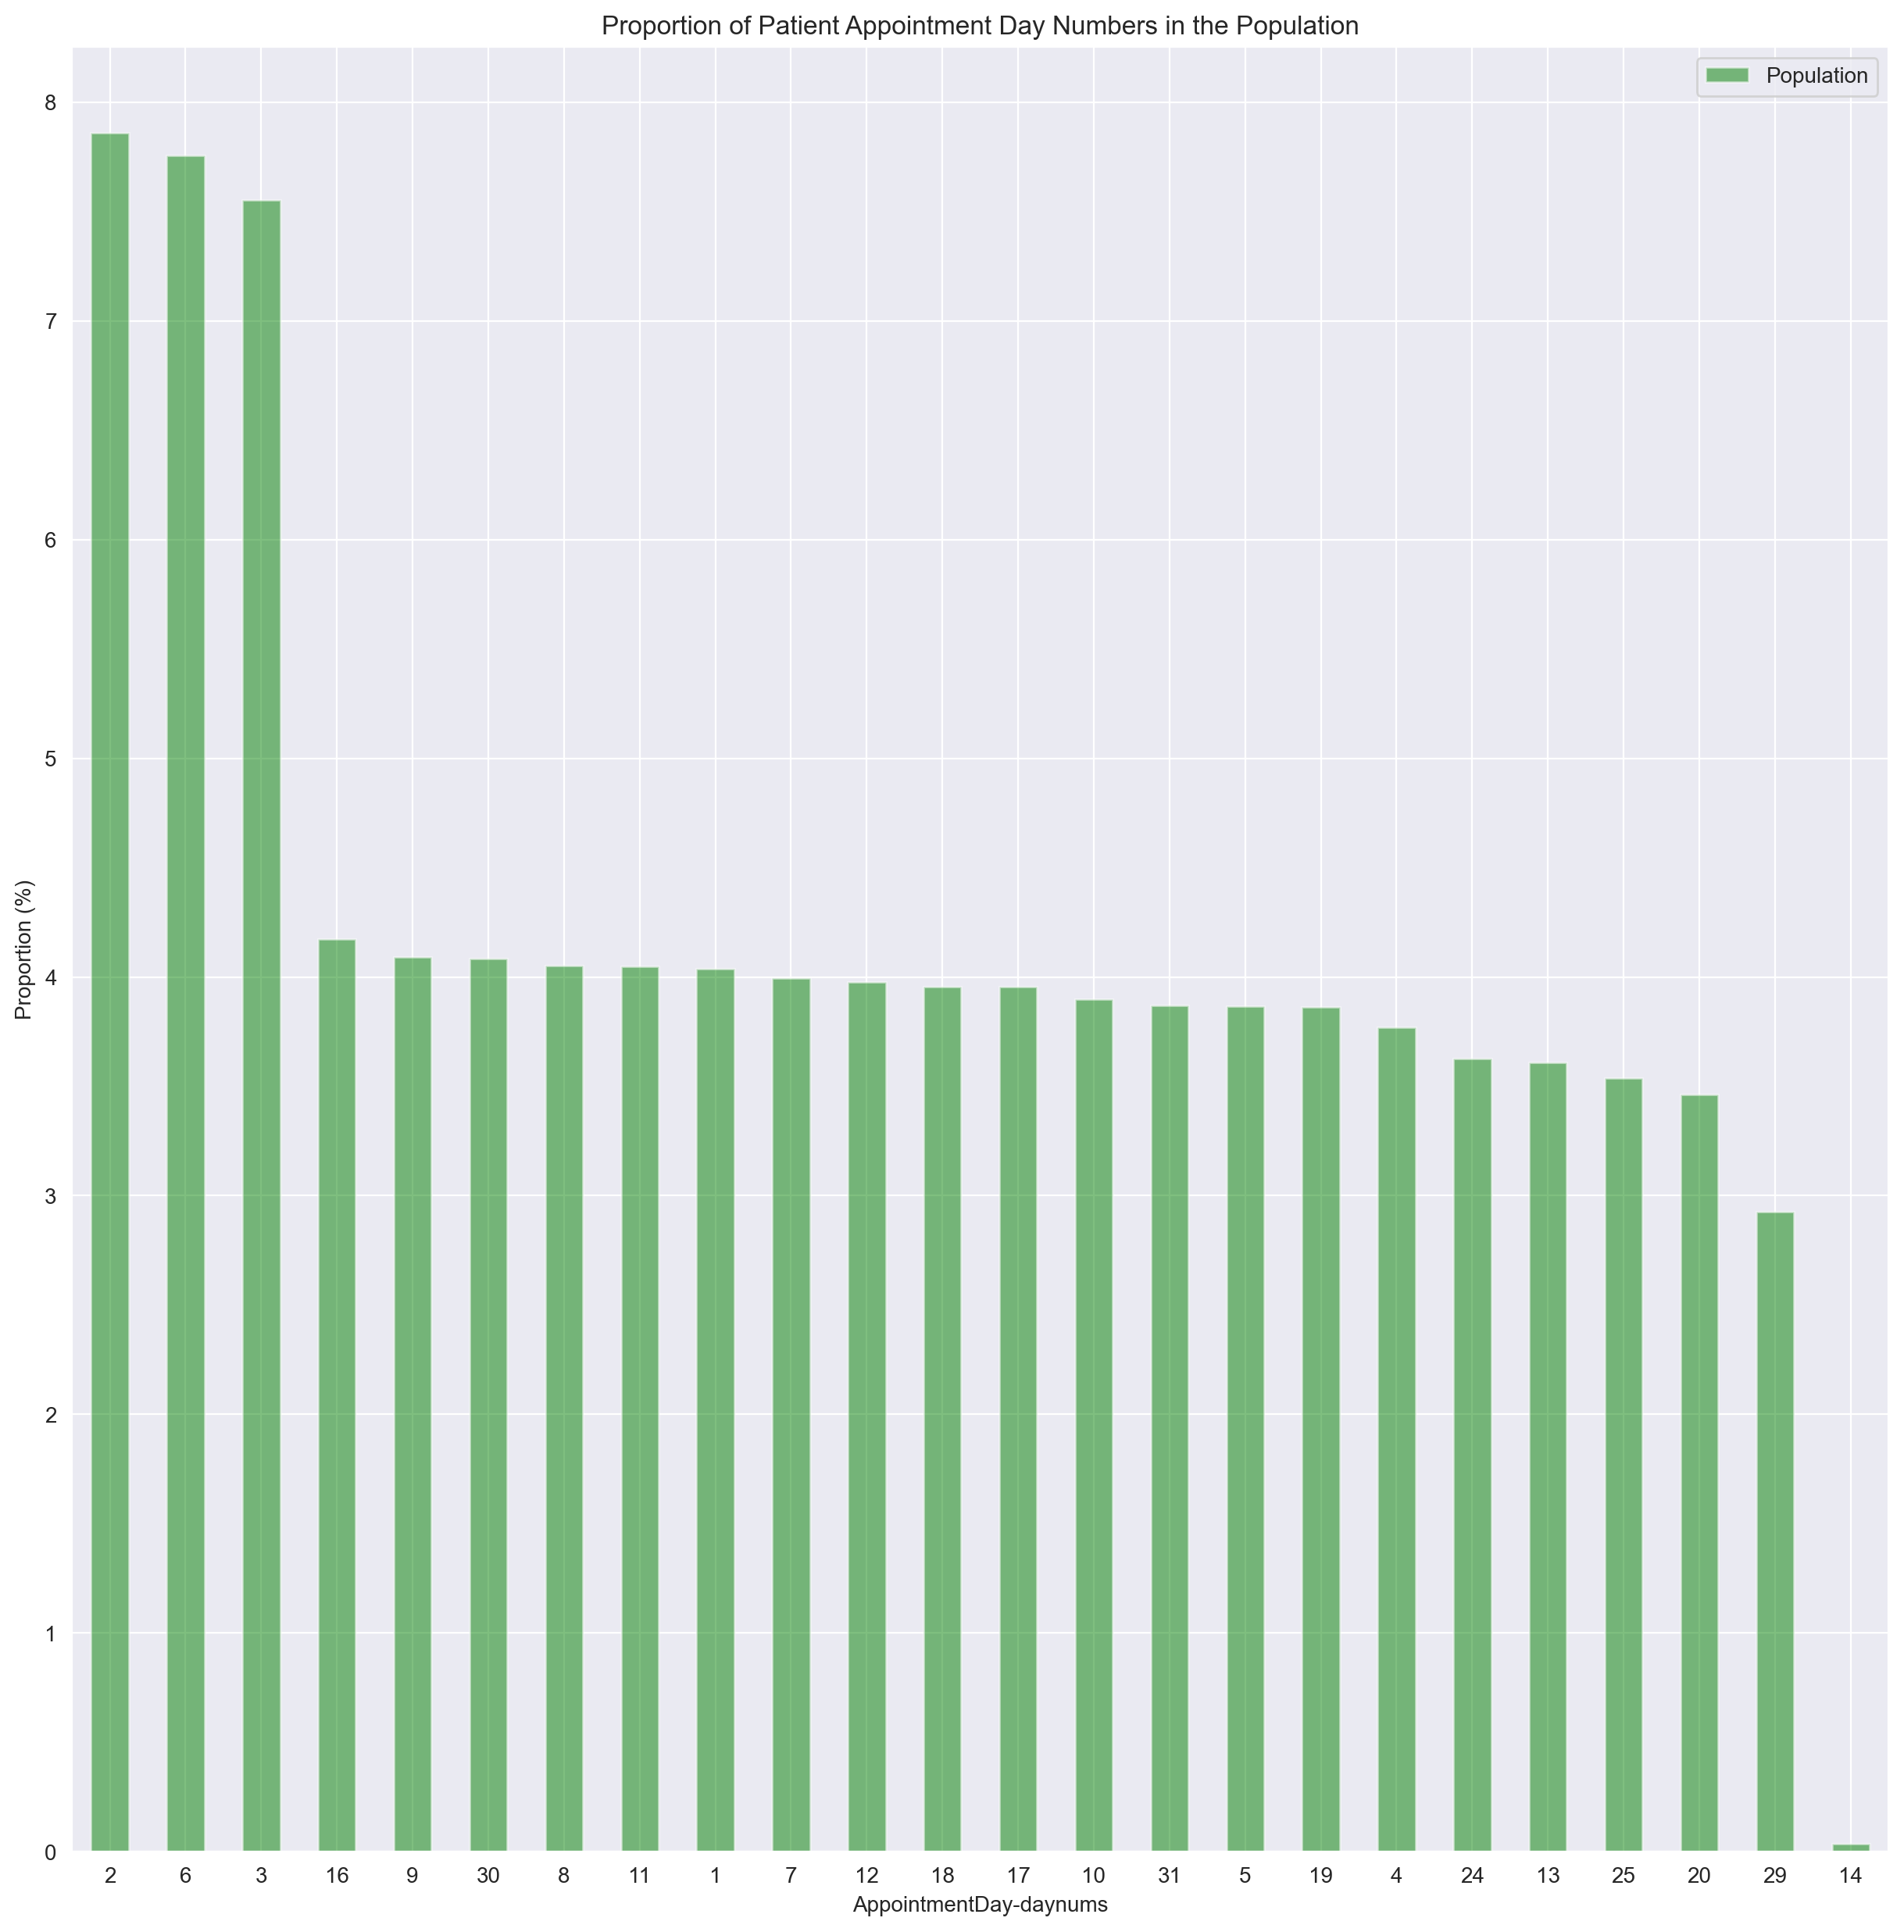

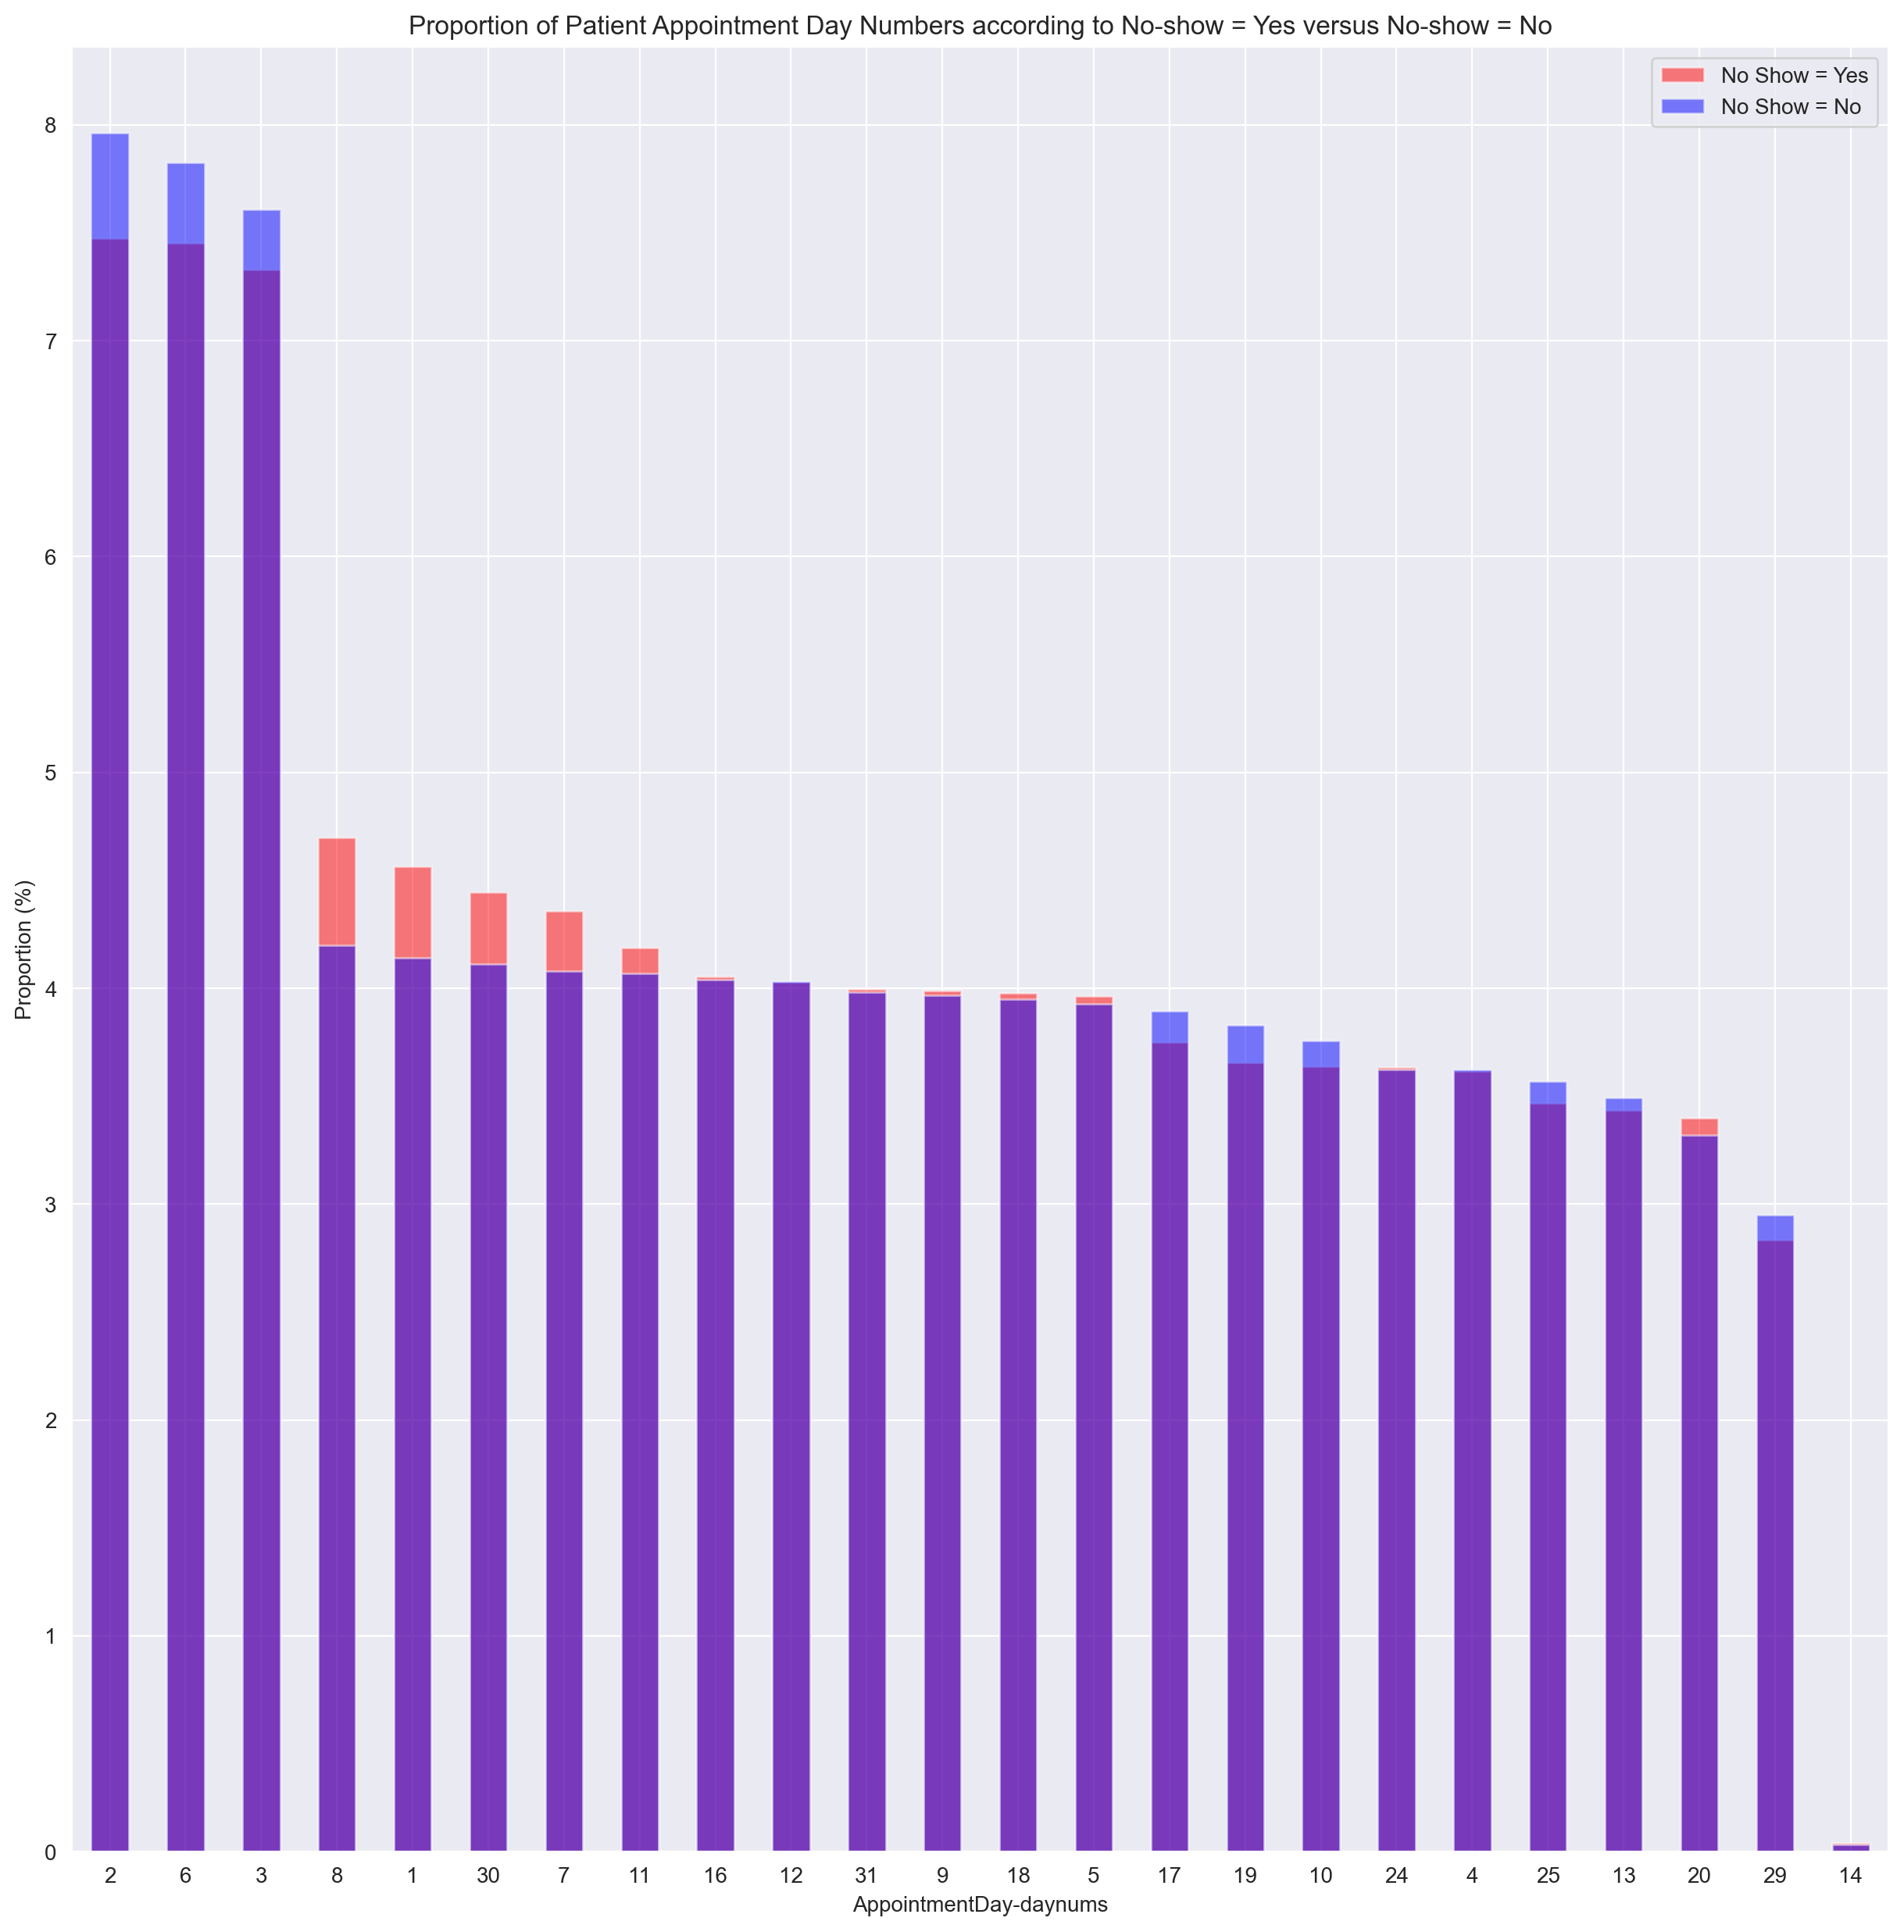

In [14]:
(100 * initial_df["AppointmentDay-daynum"].value_counts()/ initial_df["AppointmentDay-daynum"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "Population", color = "green", figsize=(15, 15))
plt.title("Proportion of Patient Appointment Day Numbers in the Population")
plt.xlabel("AppointmentDay-daynums")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()


(100 * initial_df[initial_df["No-show"]=="Yes"]["AppointmentDay-daynum"].value_counts()/ initial_df[initial_df["No-show"]=="Yes"]["AppointmentDay-daynum"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, label = "No Show = Yes", color = "red")
(100 * initial_df[initial_df["No-show"]=="No"]["AppointmentDay-daynum"].value_counts()/ initial_df[initial_df["No-show"]=="No"]["AppointmentDay-daynum"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "No Show = No", color = "blue", figsize=(15, 15))
plt.title("Proportion of Patient Appointment Day Numbers according to No-show = Yes versus No-show = No")
plt.xlabel("AppointmentDay-daynums")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()

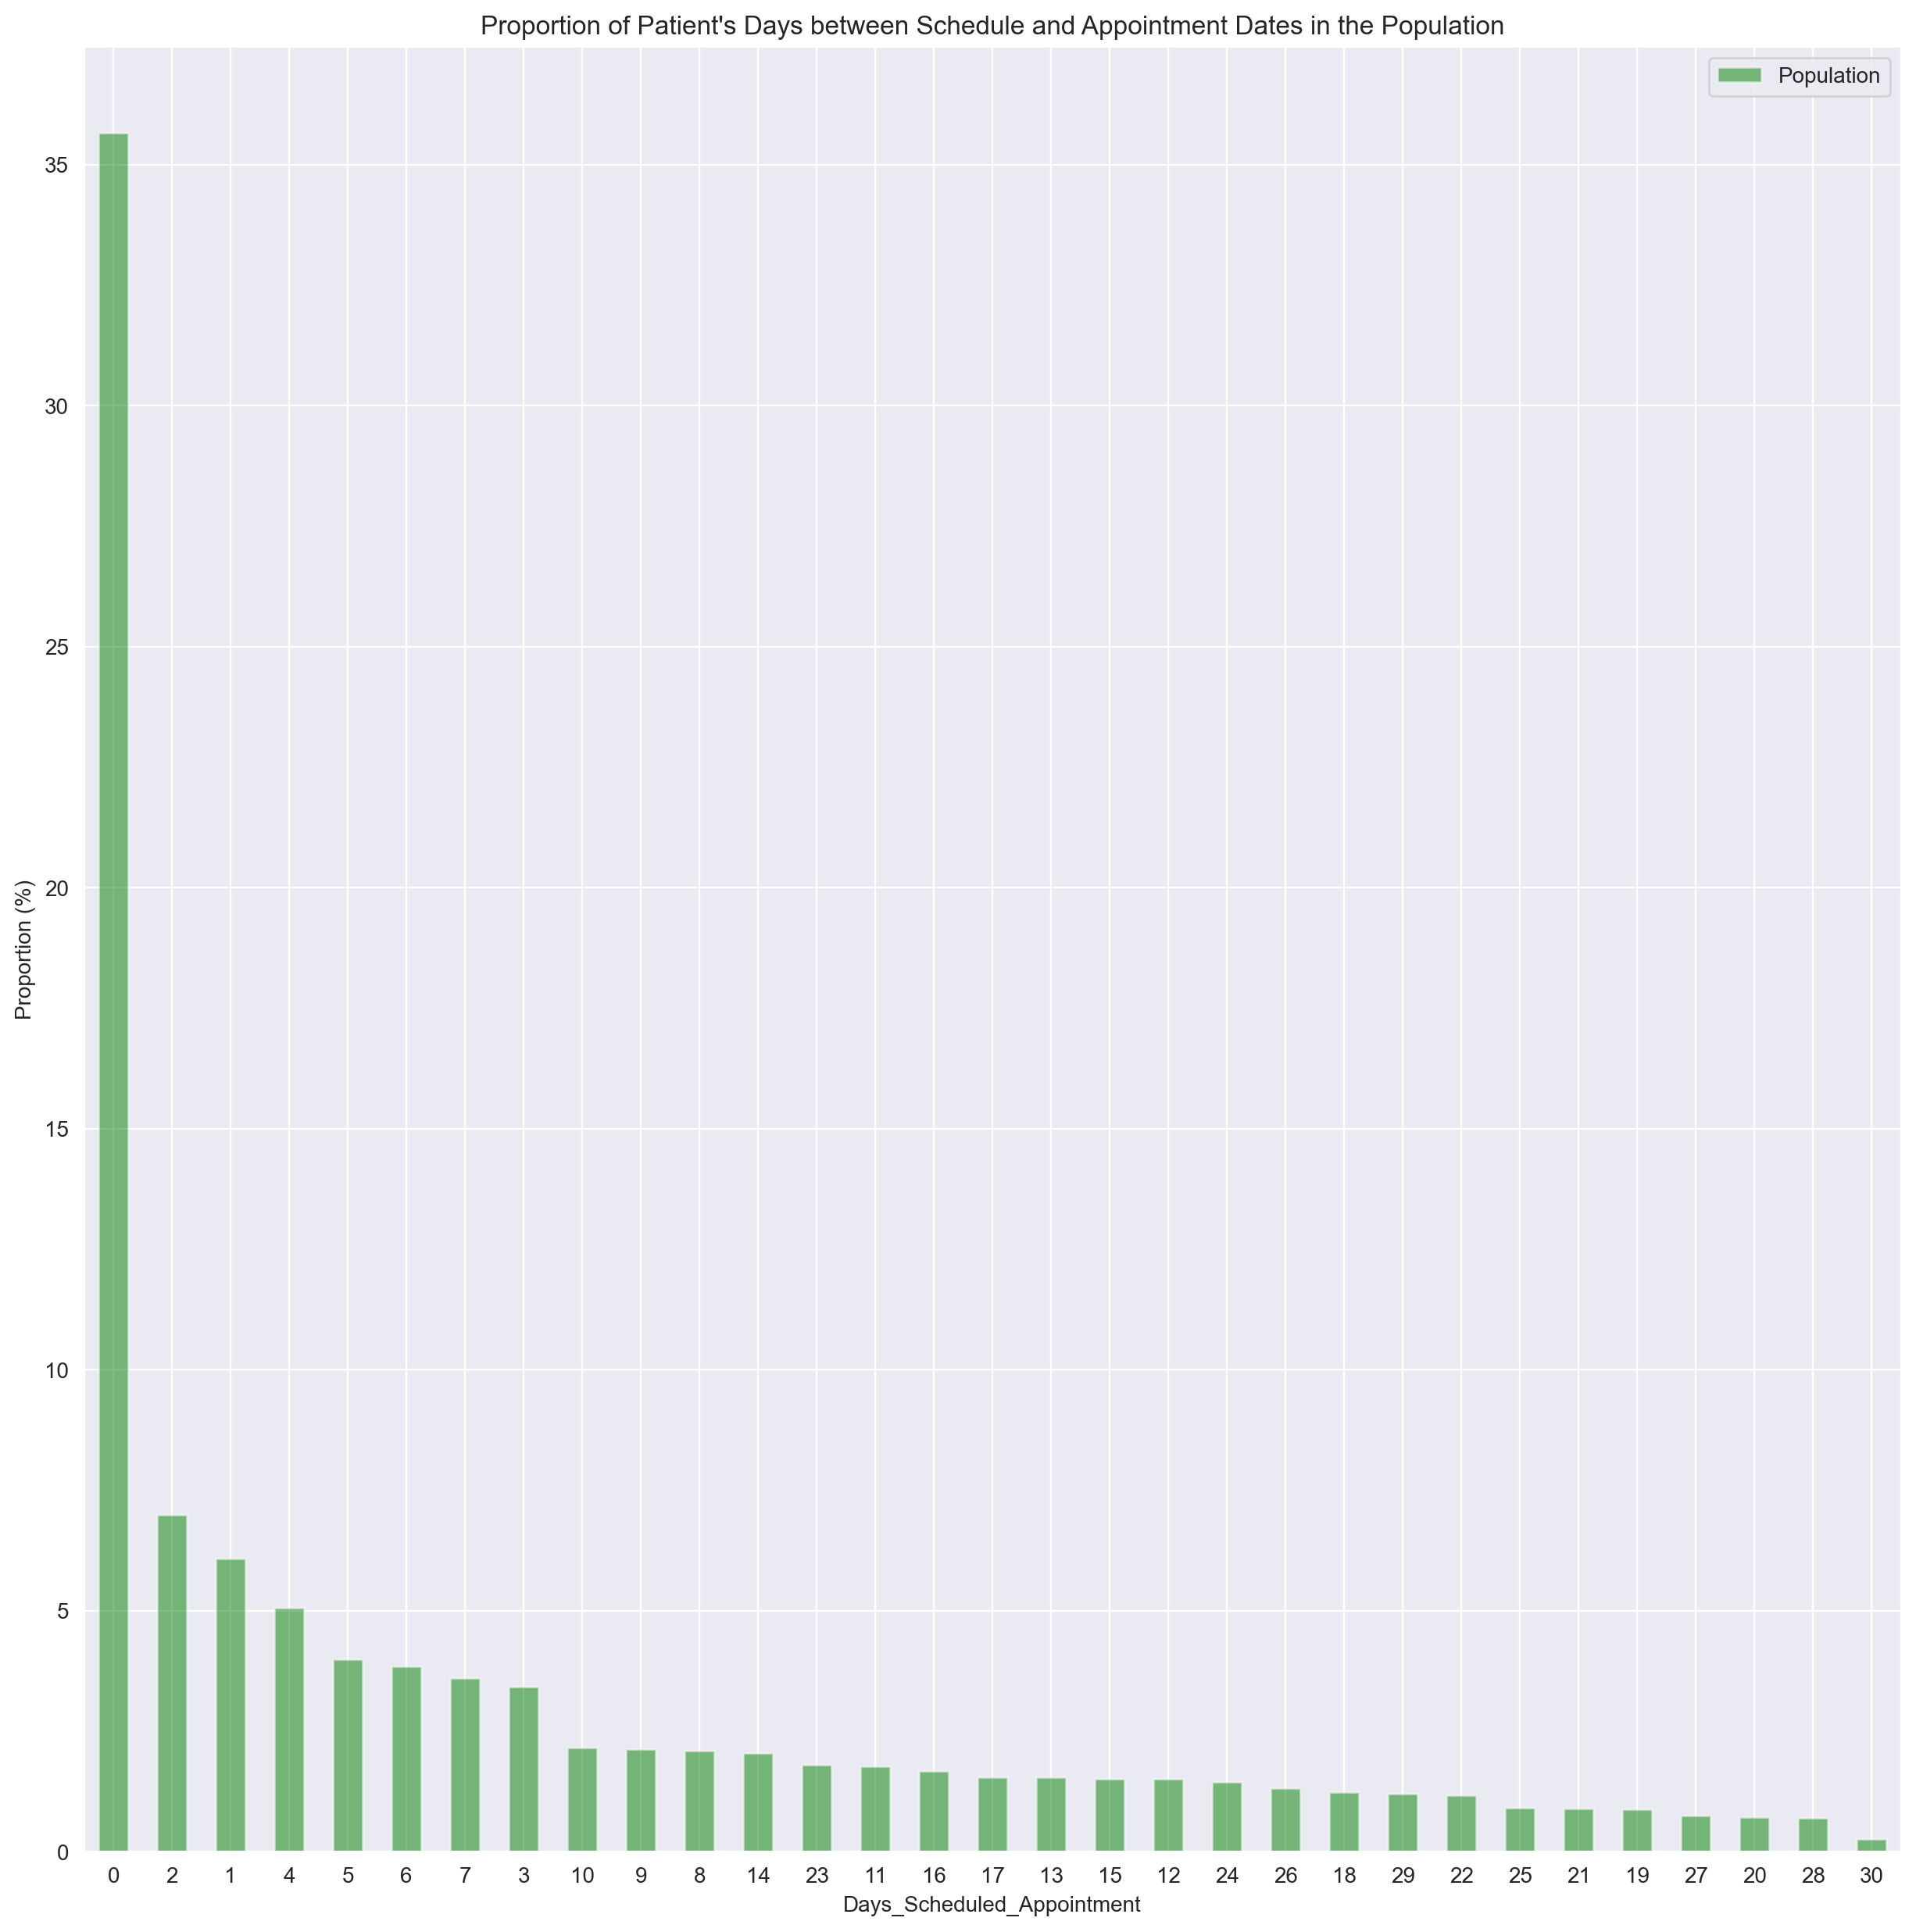

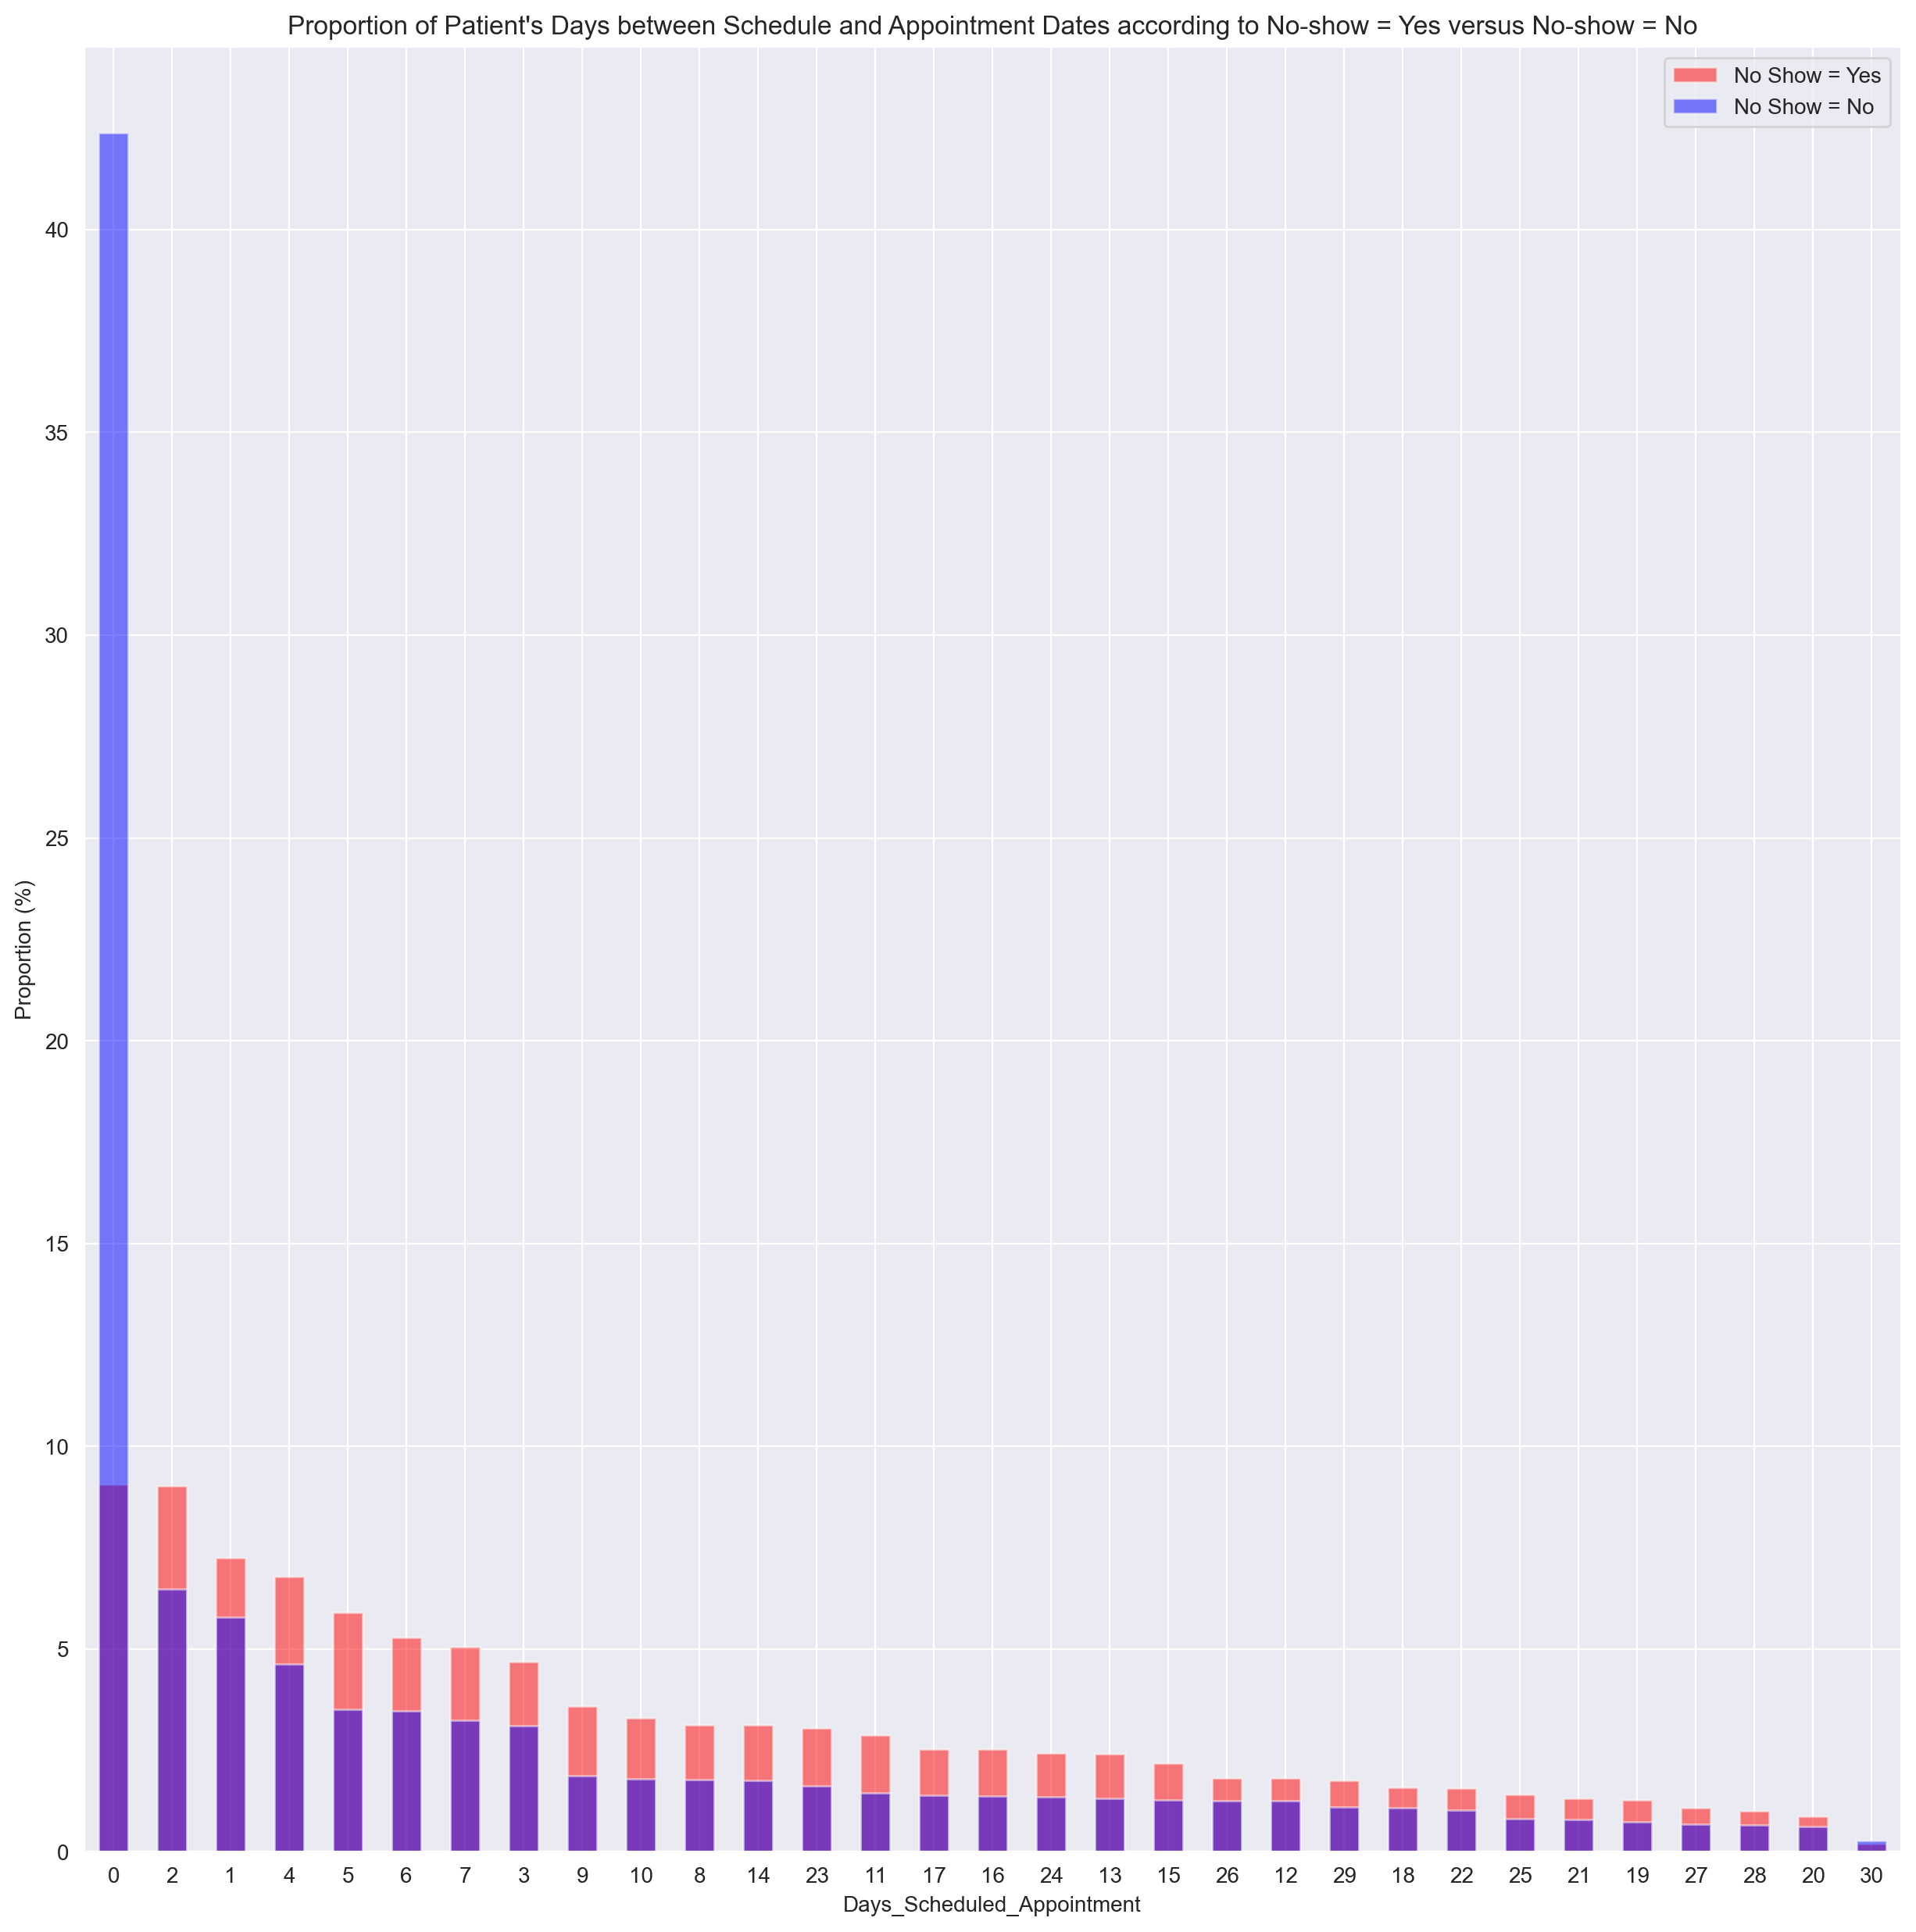

In [15]:
(100 * initial_df["Days_Scheduled_Appointment"].value_counts()/ initial_df["Days_Scheduled_Appointment"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "Population", color = "green", figsize=(15, 15))
plt.title("Proportion of Patient's Days between Schedule and Appointment Dates in the Population")
plt.xlabel("Days_Scheduled_Appointment")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()


(100 * initial_df[initial_df["No-show"]=="Yes"]["Days_Scheduled_Appointment"].value_counts()/ initial_df[initial_df["No-show"]=="Yes"]["Days_Scheduled_Appointment"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, label = "No Show = Yes", color = "red")
(100 * initial_df[initial_df["No-show"]=="No"]["Days_Scheduled_Appointment"].value_counts()/ initial_df[initial_df["No-show"]=="No"]["Days_Scheduled_Appointment"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "No Show = No", color = "blue", figsize=(15, 15))
plt.title("Proportion of Patient's Days between Schedule and Appointment Dates according to No-show = Yes versus No-show = No")
plt.xlabel("Days_Scheduled_Appointment")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()

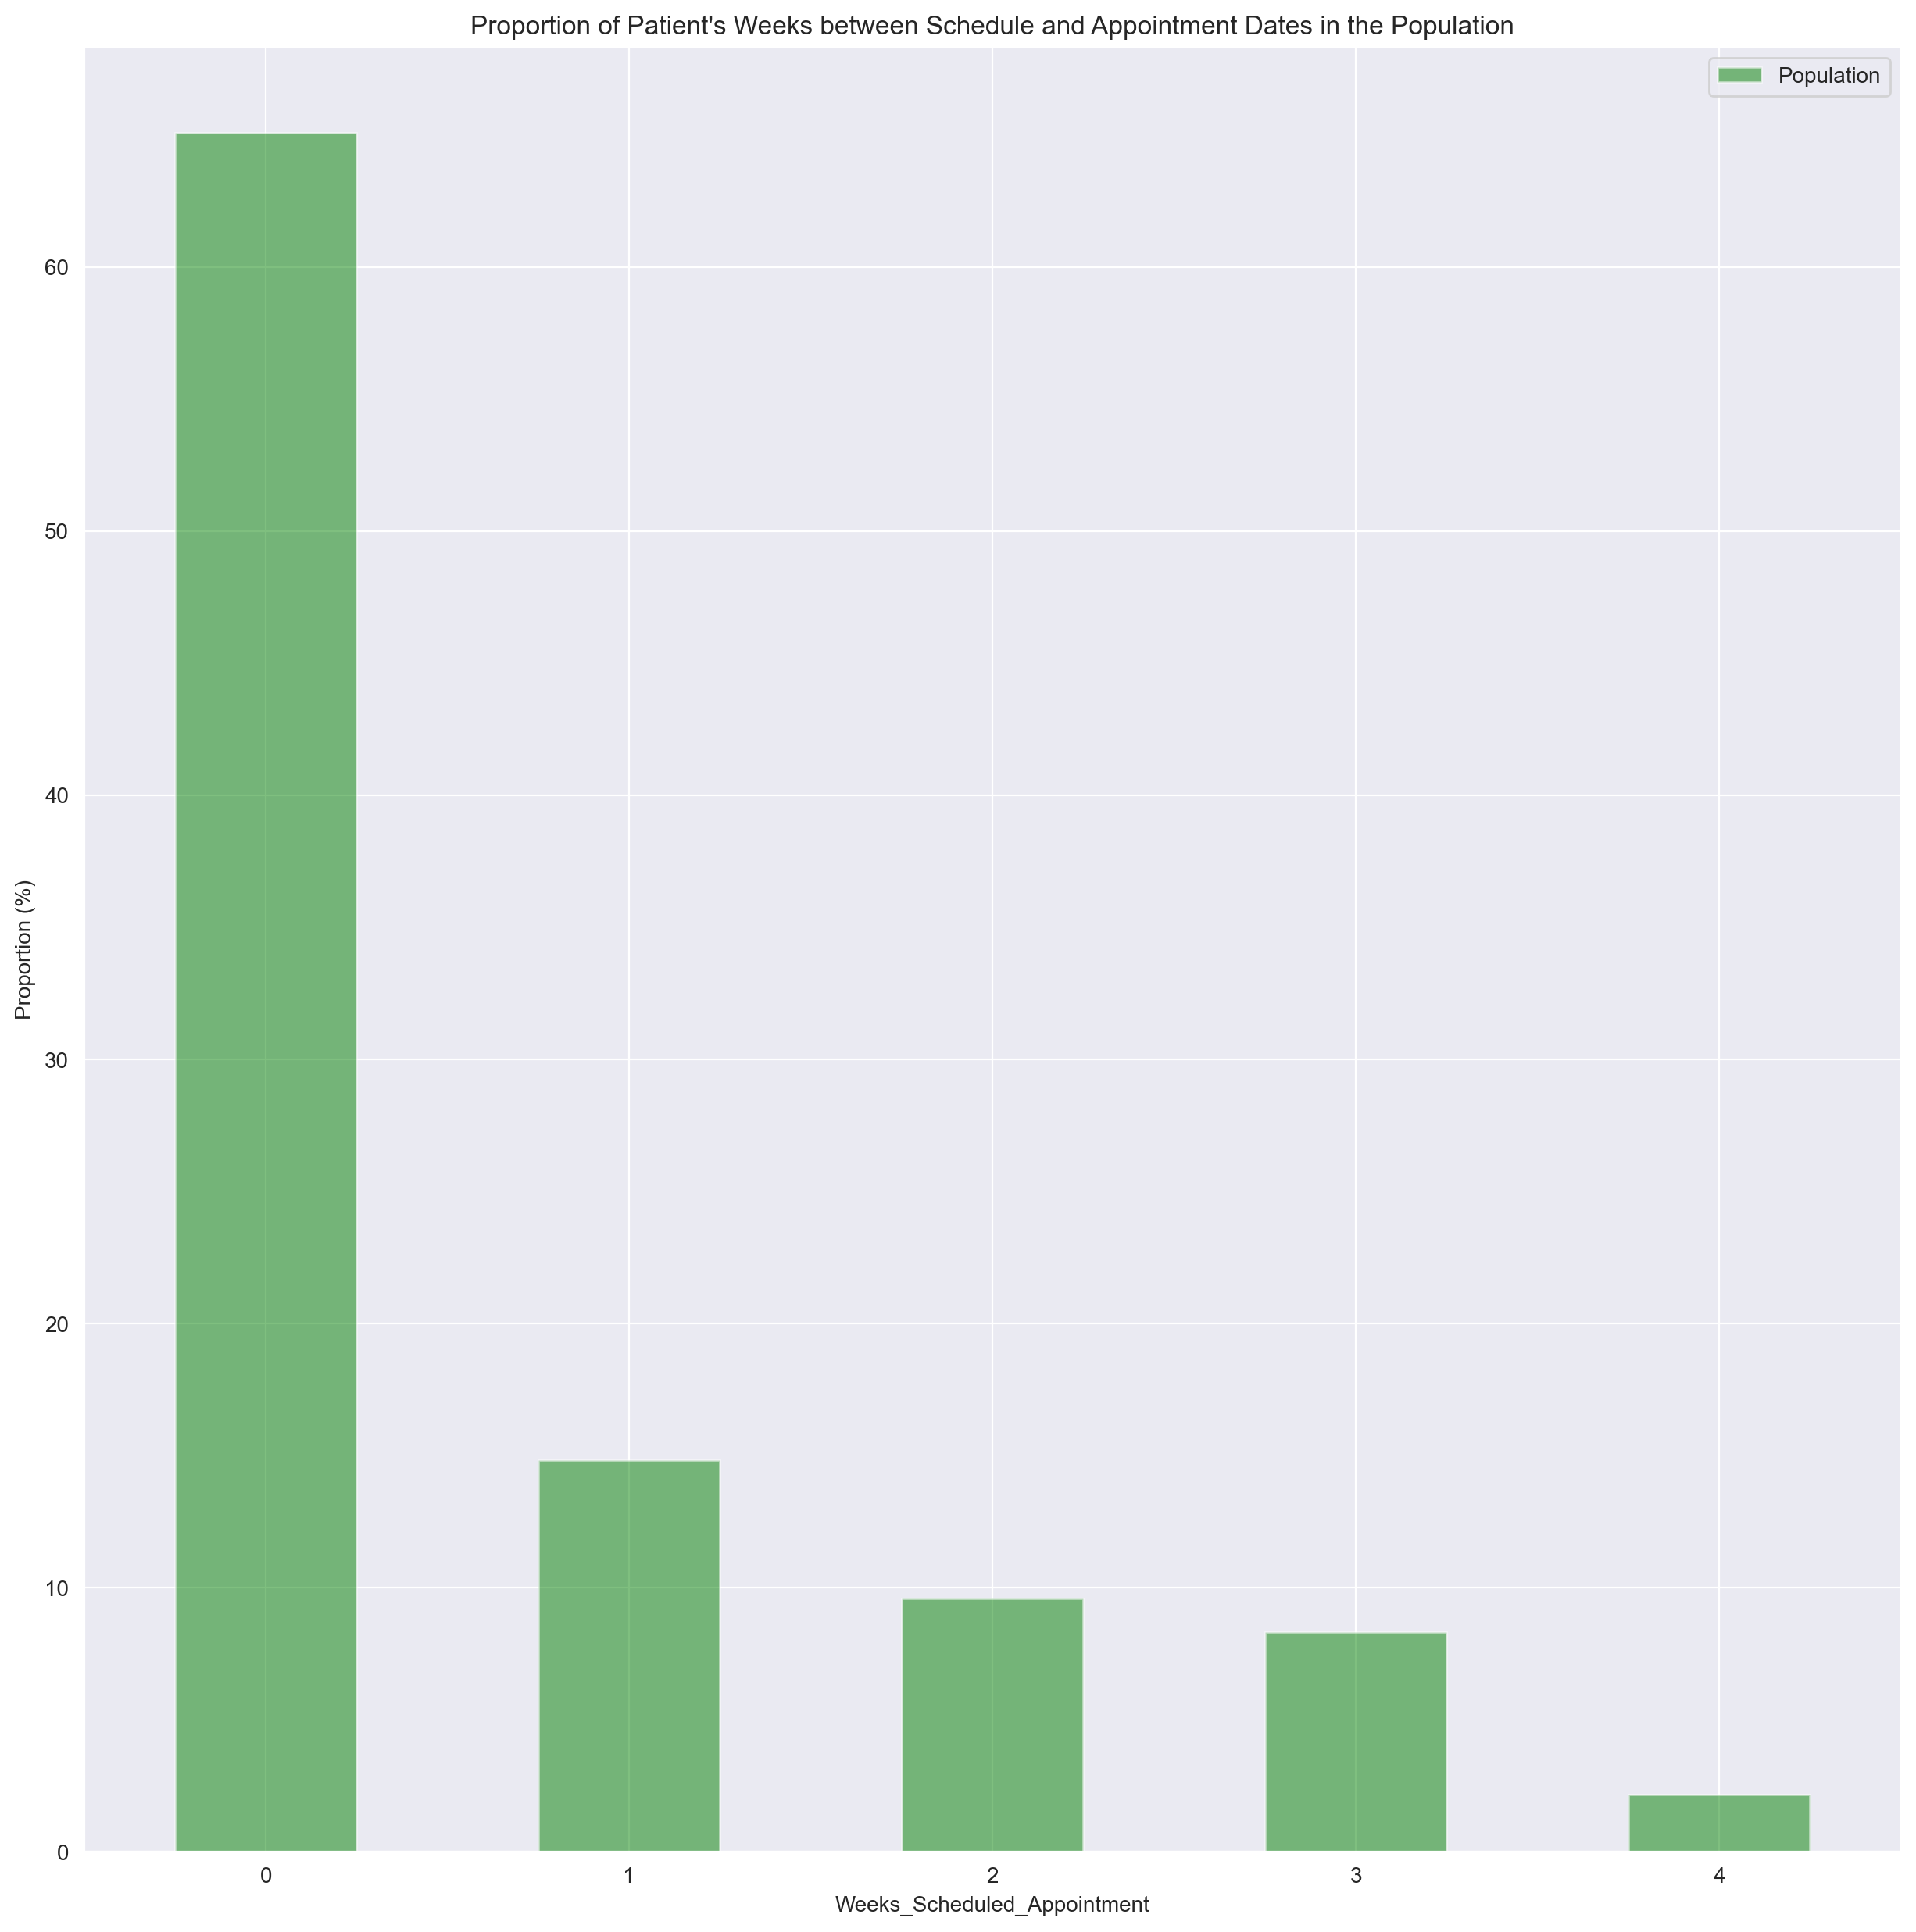

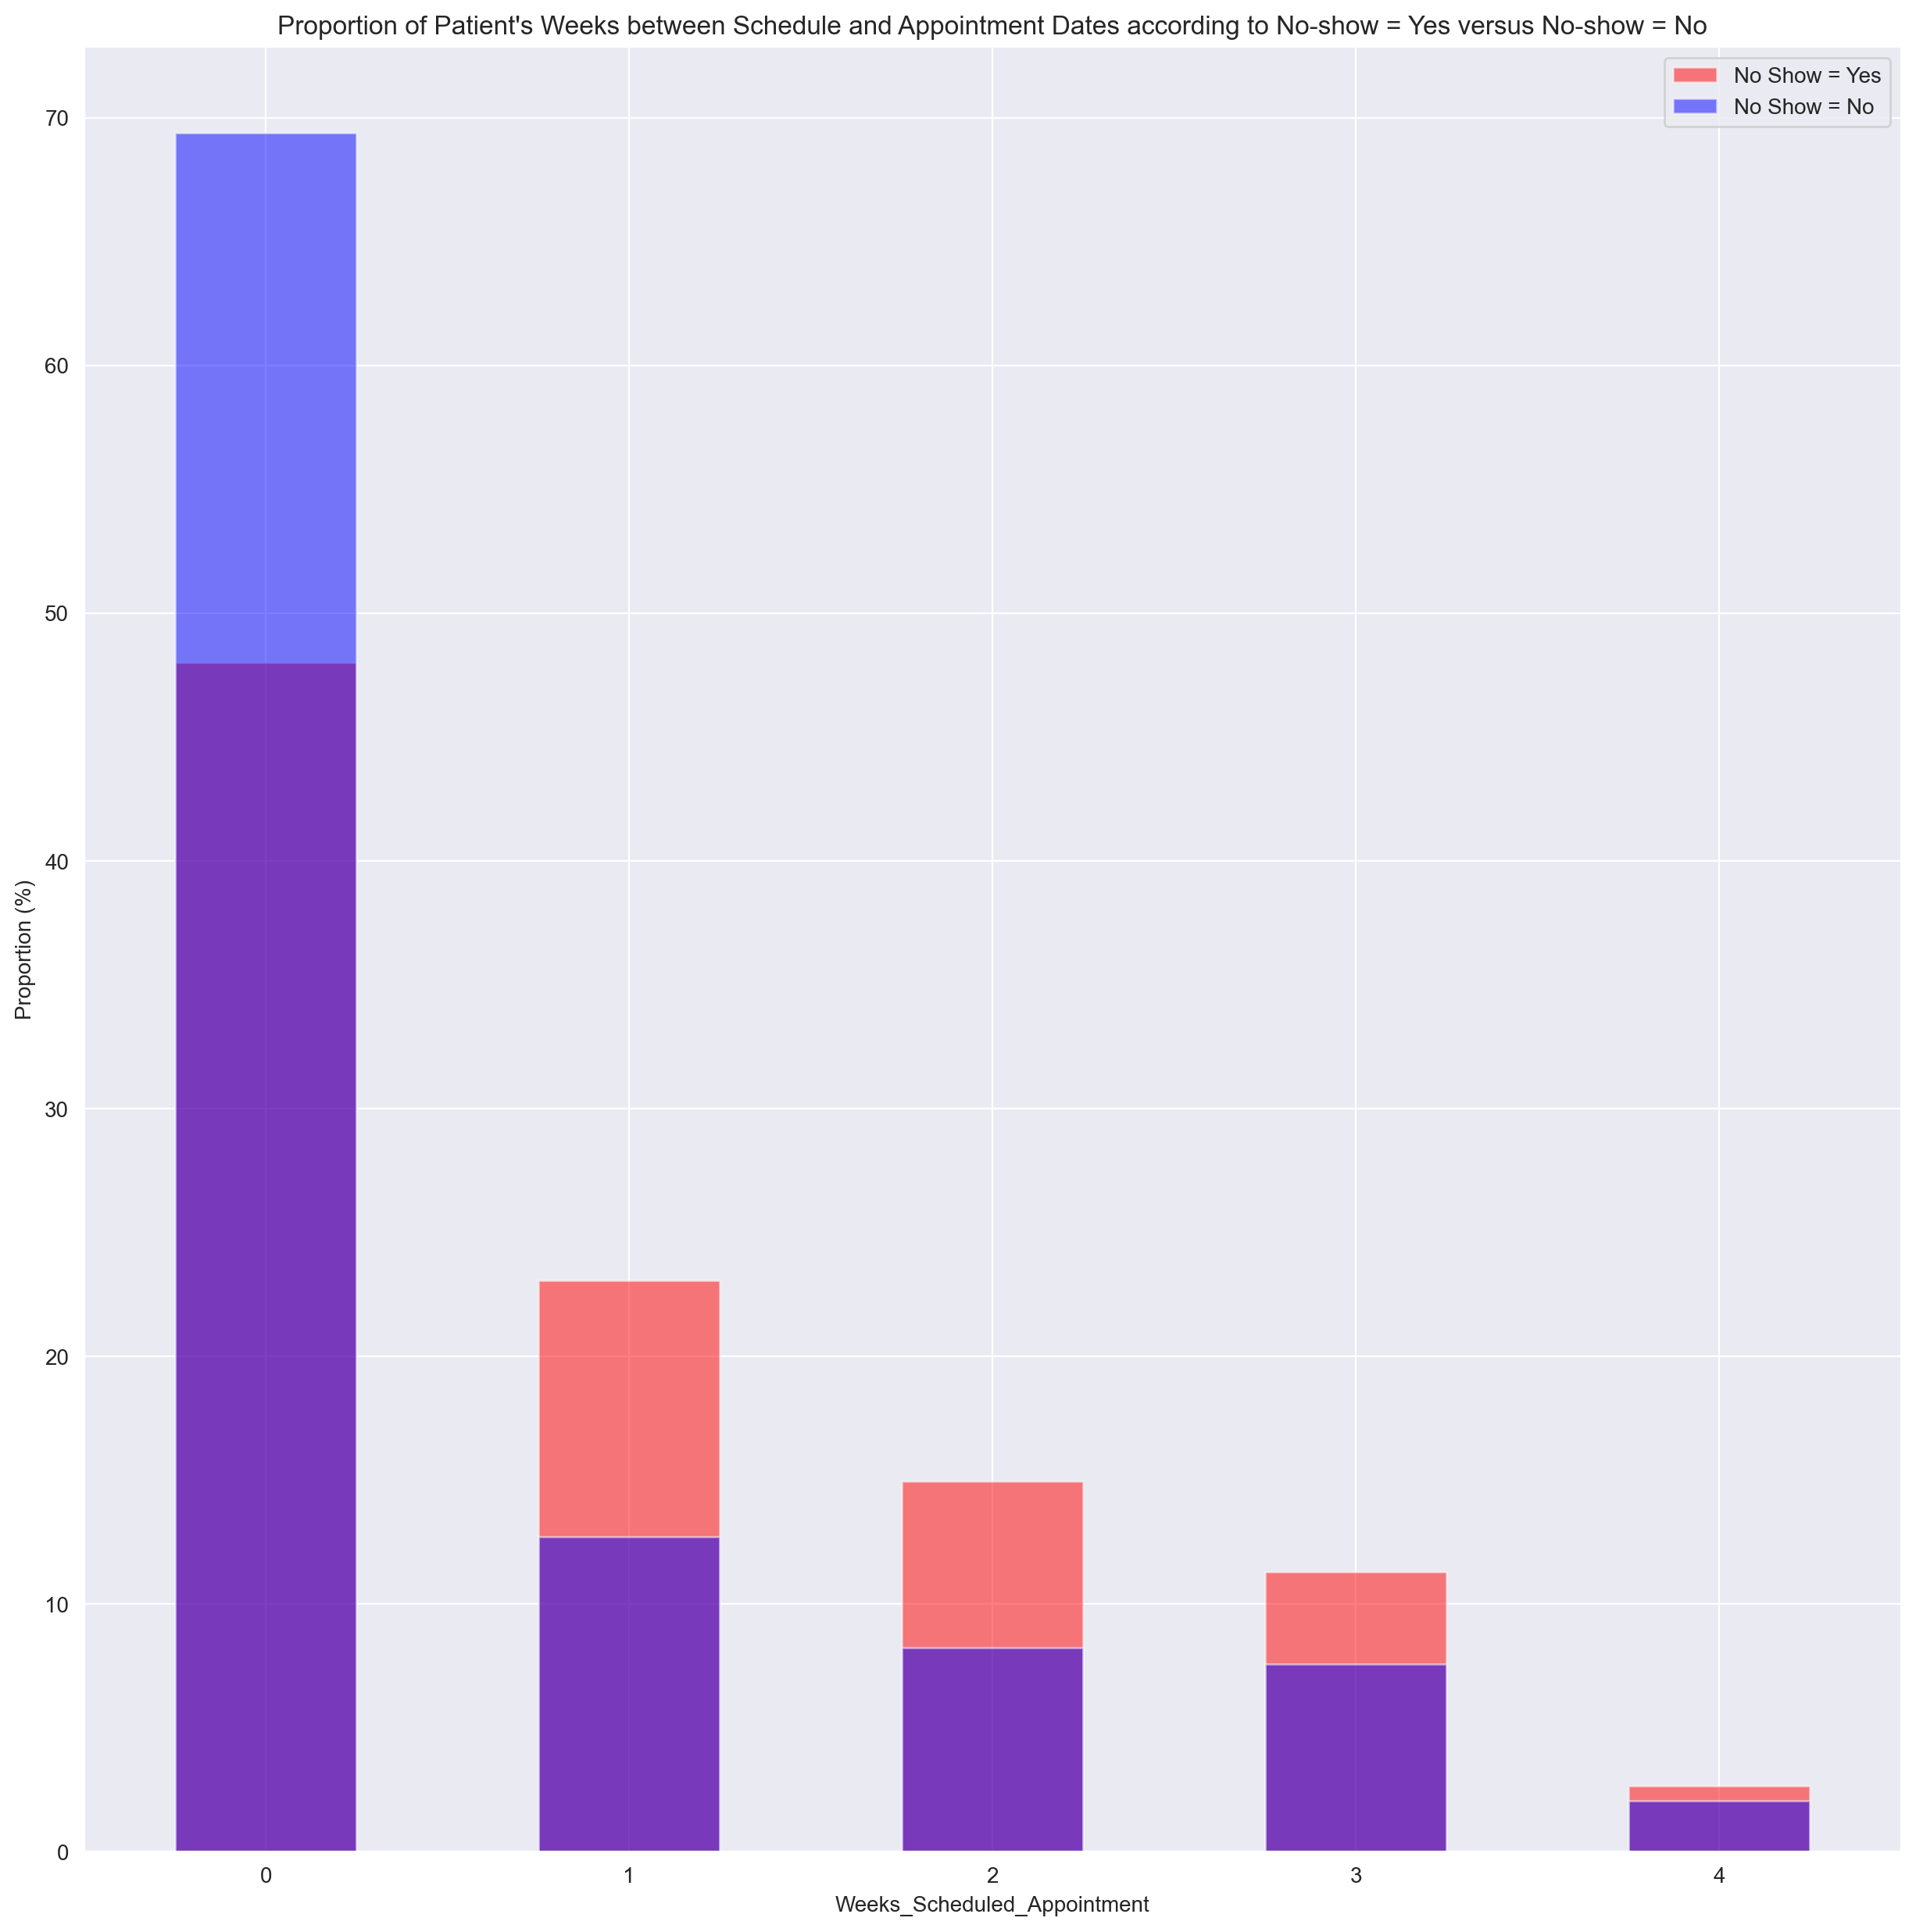

In [16]:
(100 * initial_df["Weeks_Scheduled_Appointment"].value_counts()/ initial_df["Weeks_Scheduled_Appointment"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "Population", color = "green", figsize=(15, 15))
plt.title("Proportion of Patient's Weeks between Schedule and Appointment Dates in the Population")
plt.xlabel("Weeks_Scheduled_Appointment")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()


(100 * initial_df[initial_df["No-show"]=="Yes"]["Weeks_Scheduled_Appointment"].value_counts()/ initial_df[initial_df["No-show"]=="Yes"]["Weeks_Scheduled_Appointment"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, label = "No Show = Yes", color = "red")
(100 * initial_df[initial_df["No-show"]=="No"]["Weeks_Scheduled_Appointment"].value_counts()/ initial_df[initial_df["No-show"]=="No"]["Weeks_Scheduled_Appointment"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "No Show = No", color = "blue", figsize=(15, 15))
plt.title("Proportion of Patient's Weeks between Schedule and Appointment Dates according to No-show = Yes versus No-show = No")
plt.xlabel("Weeks_Scheduled_Appointment")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()

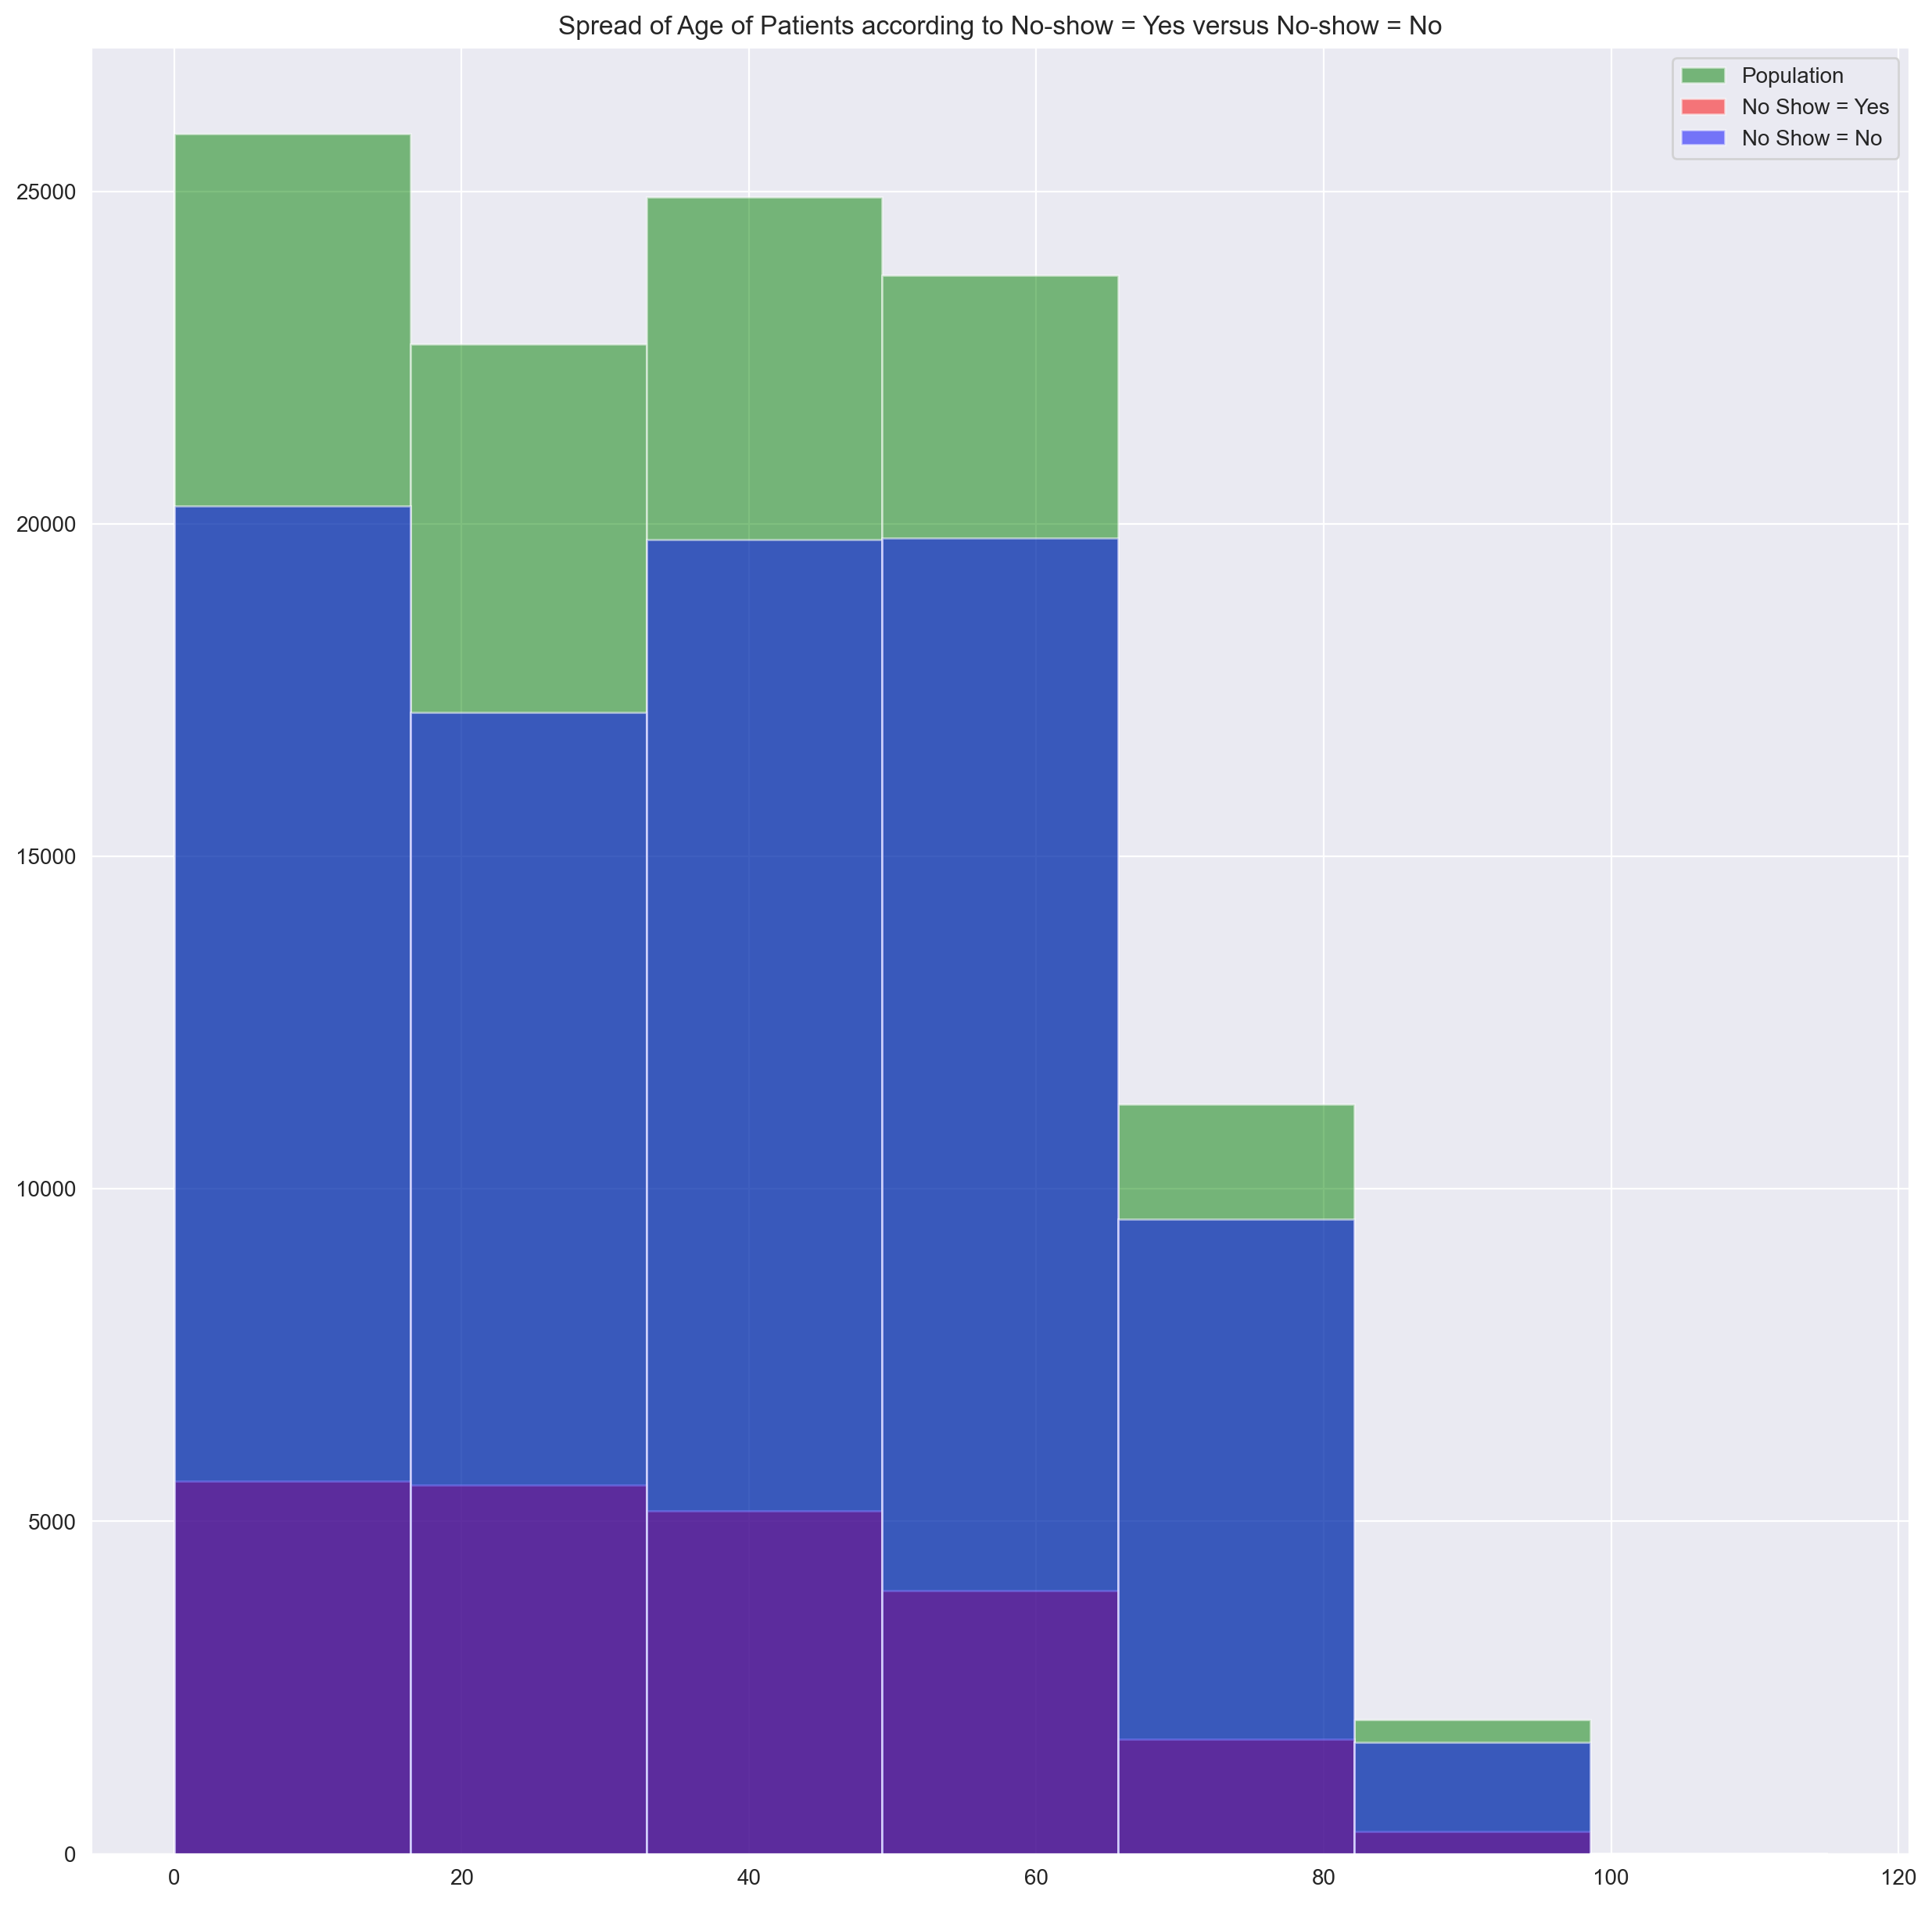

In [17]:

initial_df["Age"].hist(bins = 7, alpha = 0.5, label = "Population", color = "green")
initial_df["Age"][initial_df["No-show"]=="Yes"].hist(bins = 7, alpha = 0.5, label = "No Show = Yes", color = "red")
initial_df["Age"][initial_df["No-show"]=="No"].hist(bins = 7, alpha = 0.5, label = "No Show = No", color = "blue", figsize=(15, 15))
plt.title("Spread of Age of Patients according to No-show = Yes versus No-show = No")
plt.legend()
plt.show()


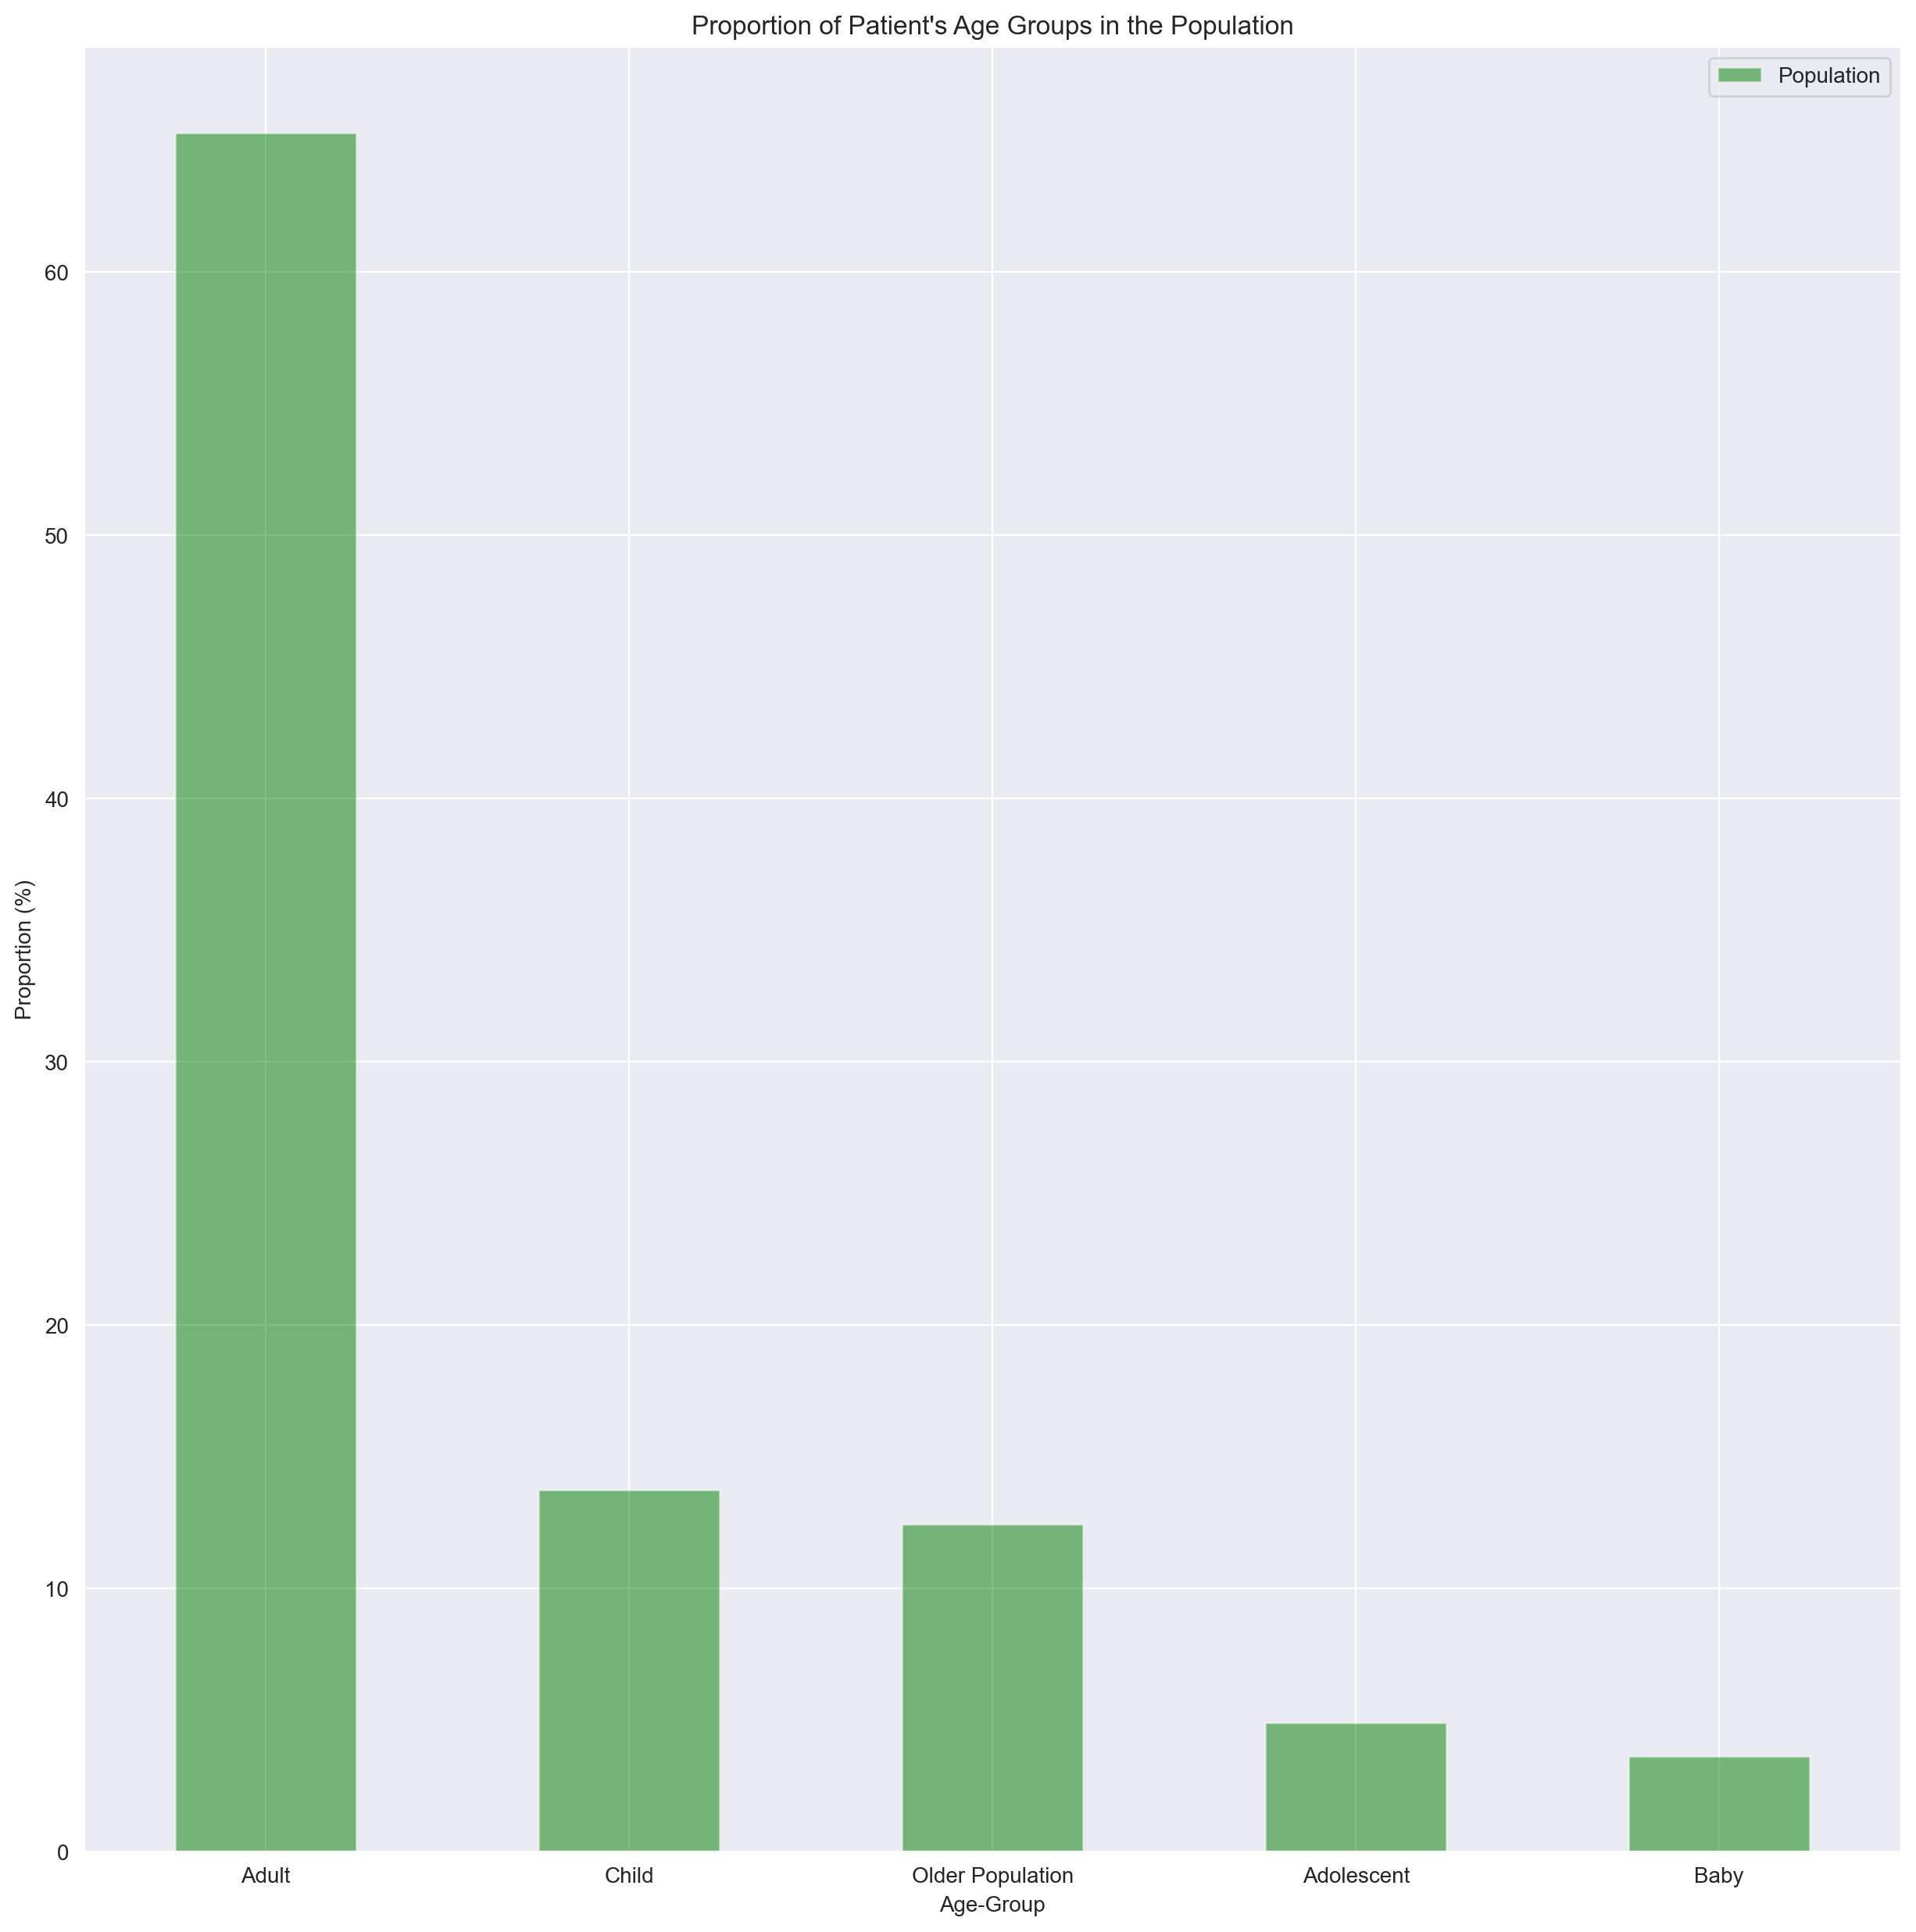

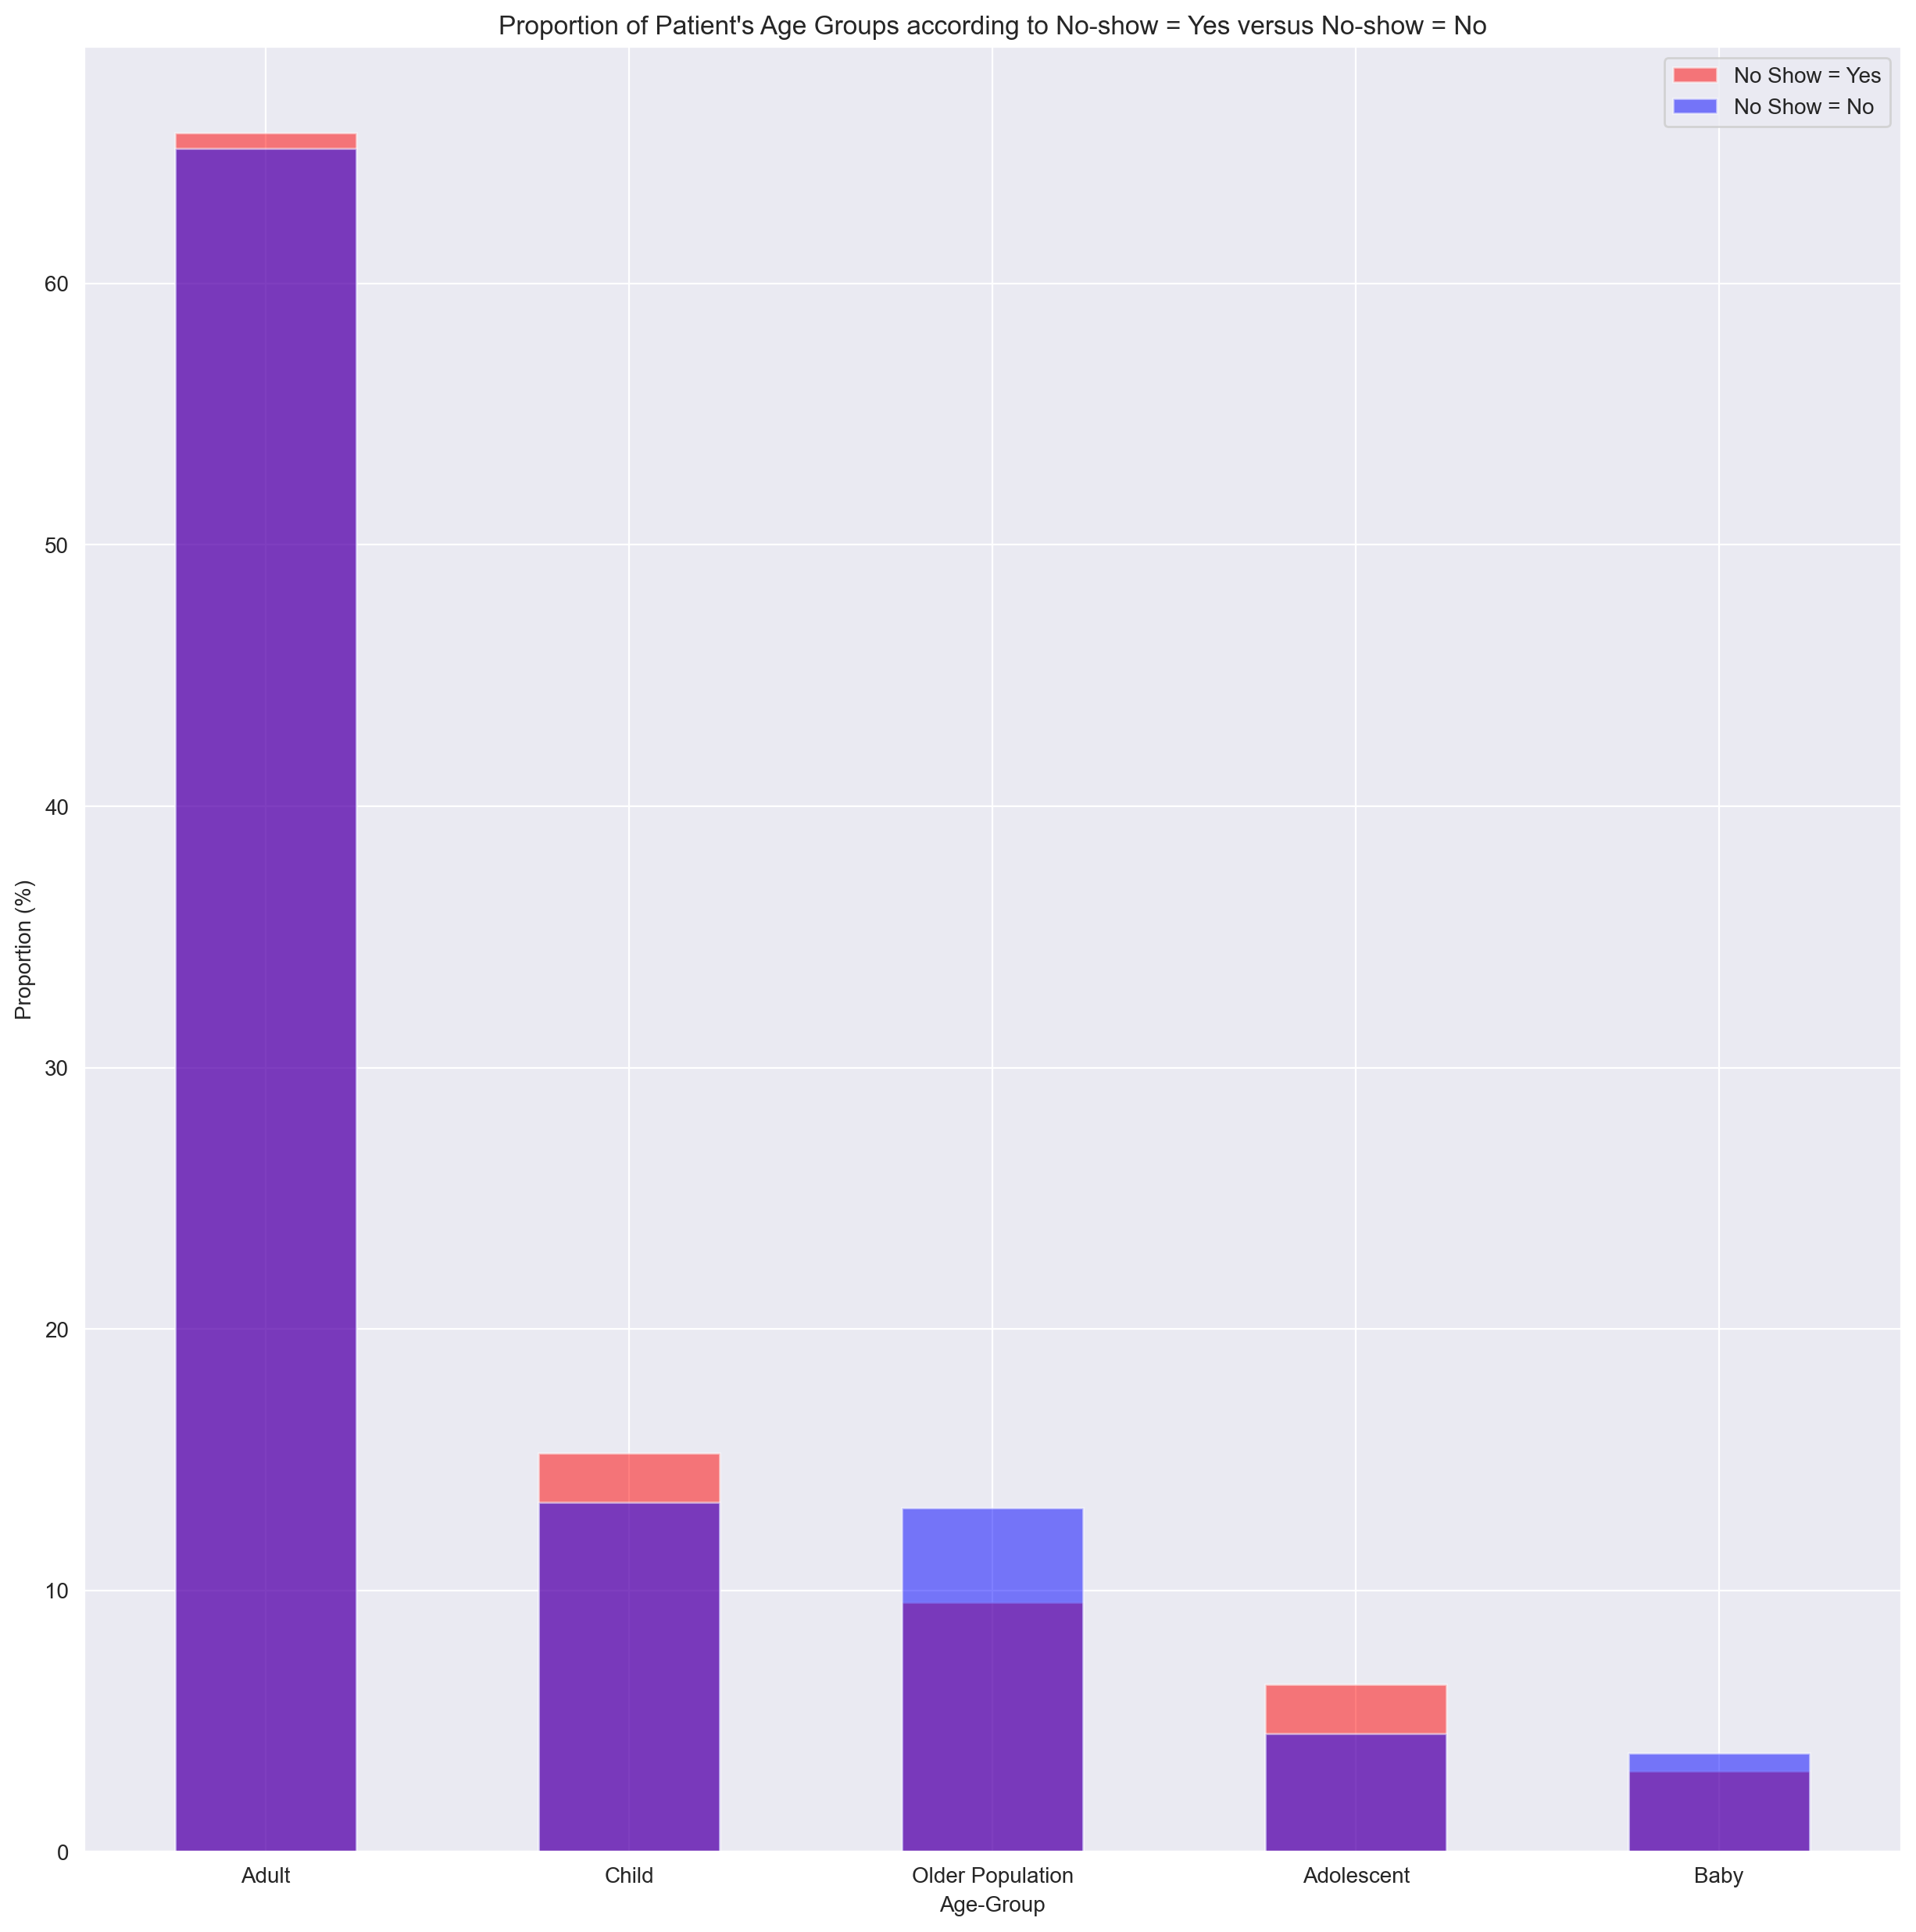

In [18]:
(100 * initial_df["Age-Group"].value_counts()/ initial_df["Age-Group"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "Population", color = "green", figsize=(15, 15))
plt.title("Proportion of Patient's Age Groups in the Population")
plt.xlabel("Age-Group")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()


(100 * initial_df[initial_df["No-show"]=="Yes"]["Age-Group"].value_counts()/ initial_df[initial_df["No-show"]=="Yes"]["Age-Group"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, label = "No Show = Yes", color = "red")
(100 * initial_df[initial_df["No-show"]=="No"]["Age-Group"].value_counts()/ initial_df[initial_df["No-show"]=="No"]["Age-Group"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "No Show = No", color = "blue", figsize=(15, 15))
plt.title("Proportion of Patient's Age Groups according to No-show = Yes versus No-show = No")
plt.xlabel("Age-Group")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()

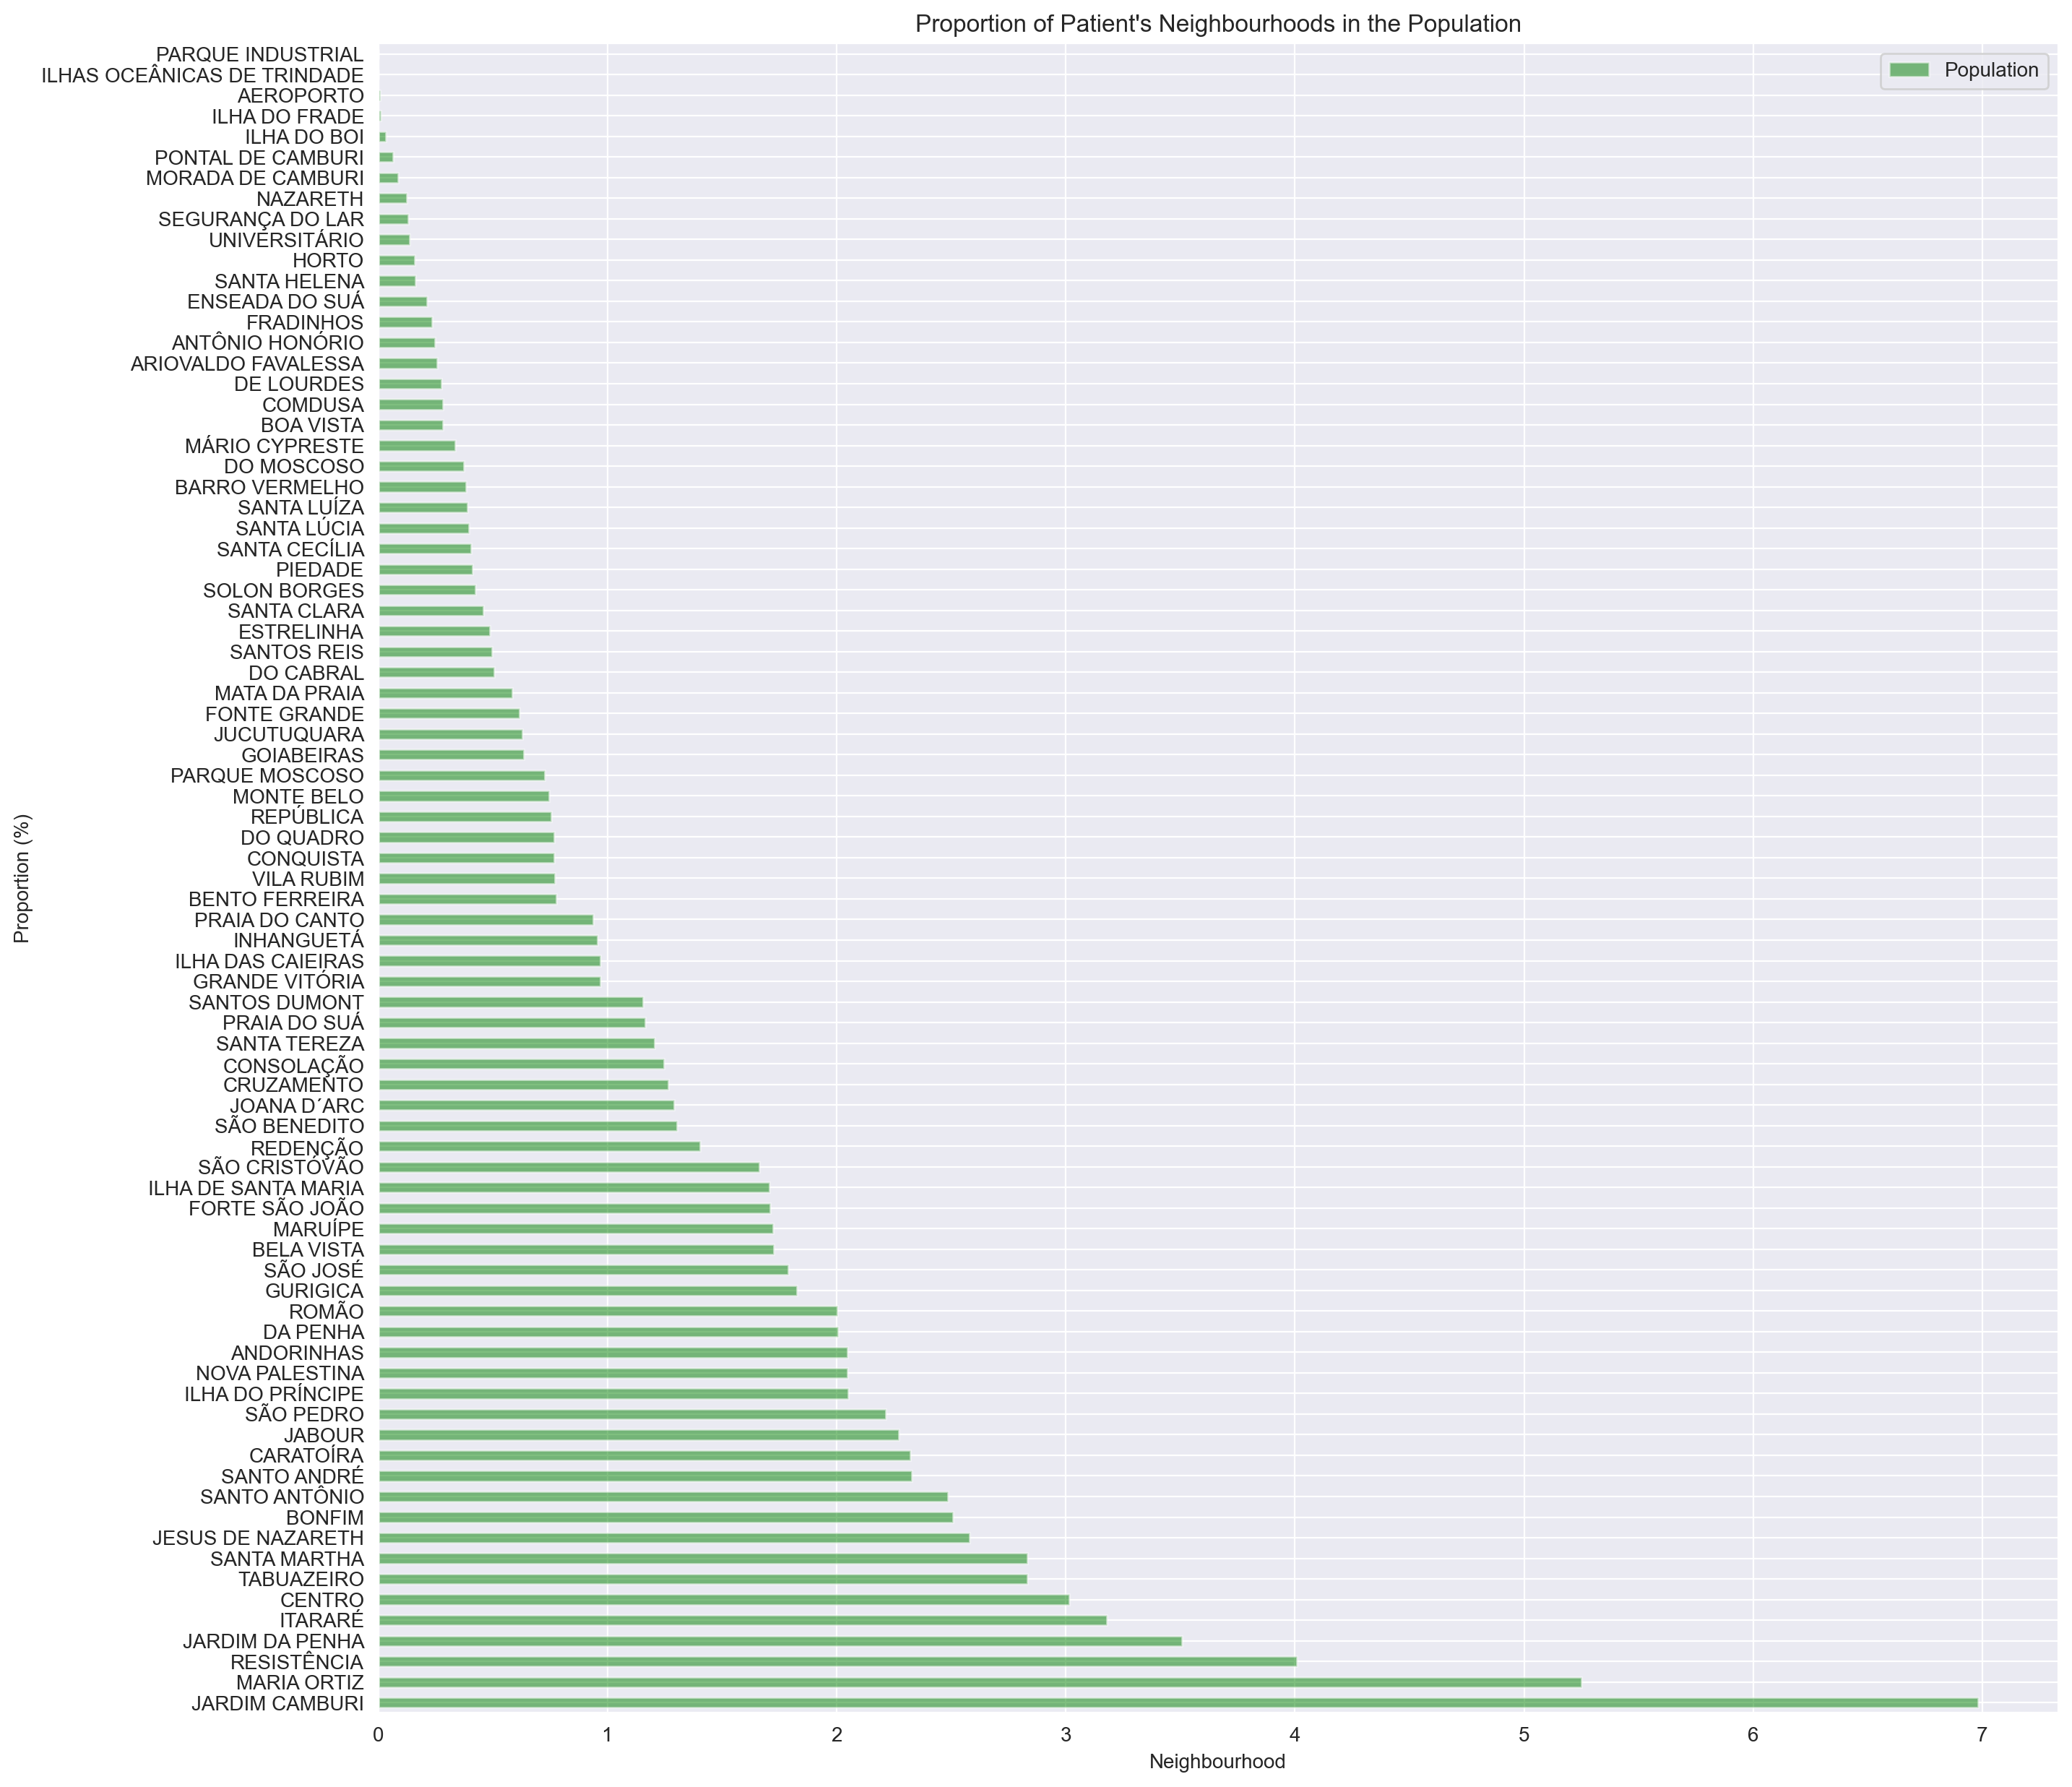

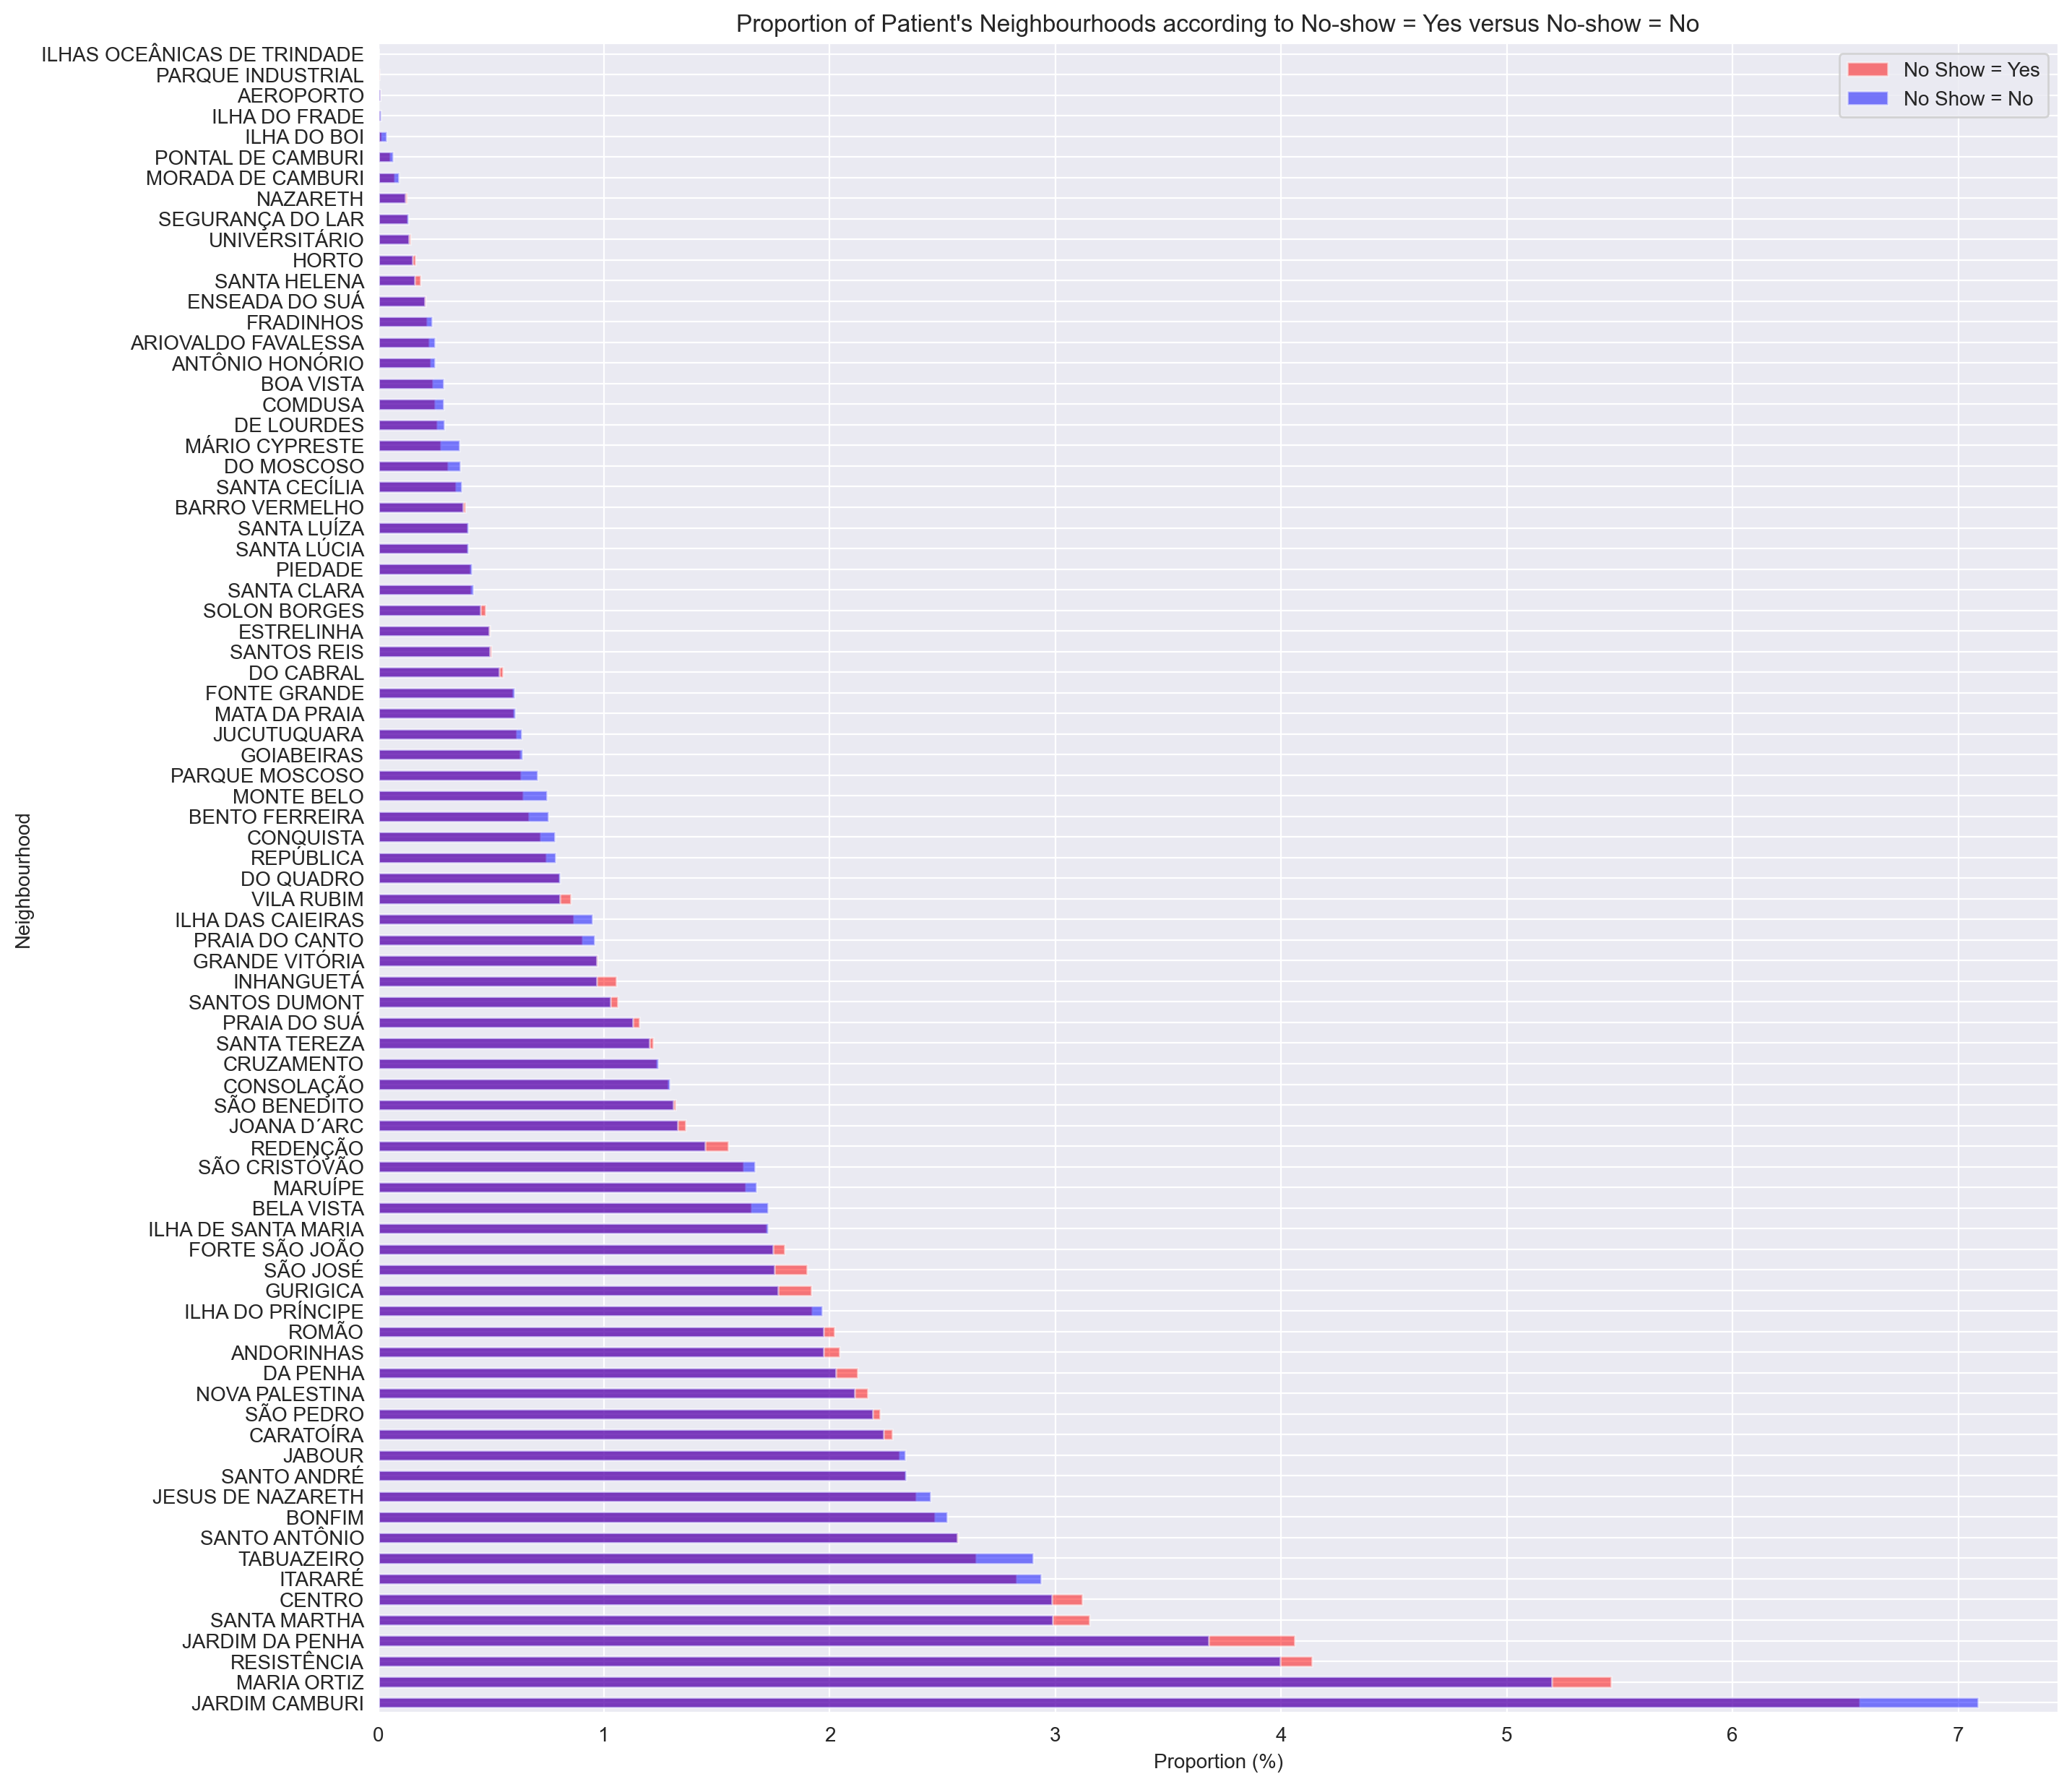

In [19]:
(100 * initial_df["Neighbourhood"].value_counts()/ initial_df["Neighbourhood"].value_counts().sum()).plot(kind = "barh", alpha = 0.5, rot = 0, label = "Population", color = "green", figsize=(15, 15))
plt.title("Proportion of Patient's Neighbourhoods in the Population")
plt.xlabel("Neighbourhood")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()


(100 * initial_df[initial_df["No-show"]=="Yes"]["Neighbourhood"].value_counts()/ initial_df[initial_df["No-show"]=="Yes"]["Neighbourhood"].value_counts().sum()).plot(kind = "barh", alpha = 0.5, label = "No Show = Yes", color = "red")
(100 * initial_df[initial_df["No-show"]=="No"]["Neighbourhood"].value_counts()/ initial_df[initial_df["No-show"]=="No"]["Neighbourhood"].value_counts().sum()).plot(kind = "barh", alpha = 0.5, rot = 0, label = "No Show = No", color = "blue", figsize=(15, 15))
plt.title("Proportion of Patient's Neighbourhoods according to No-show = Yes versus No-show = No")
plt.ylabel("Neighbourhood")
plt.xlabel("Proportion (%)")
plt.legend()
plt.show()

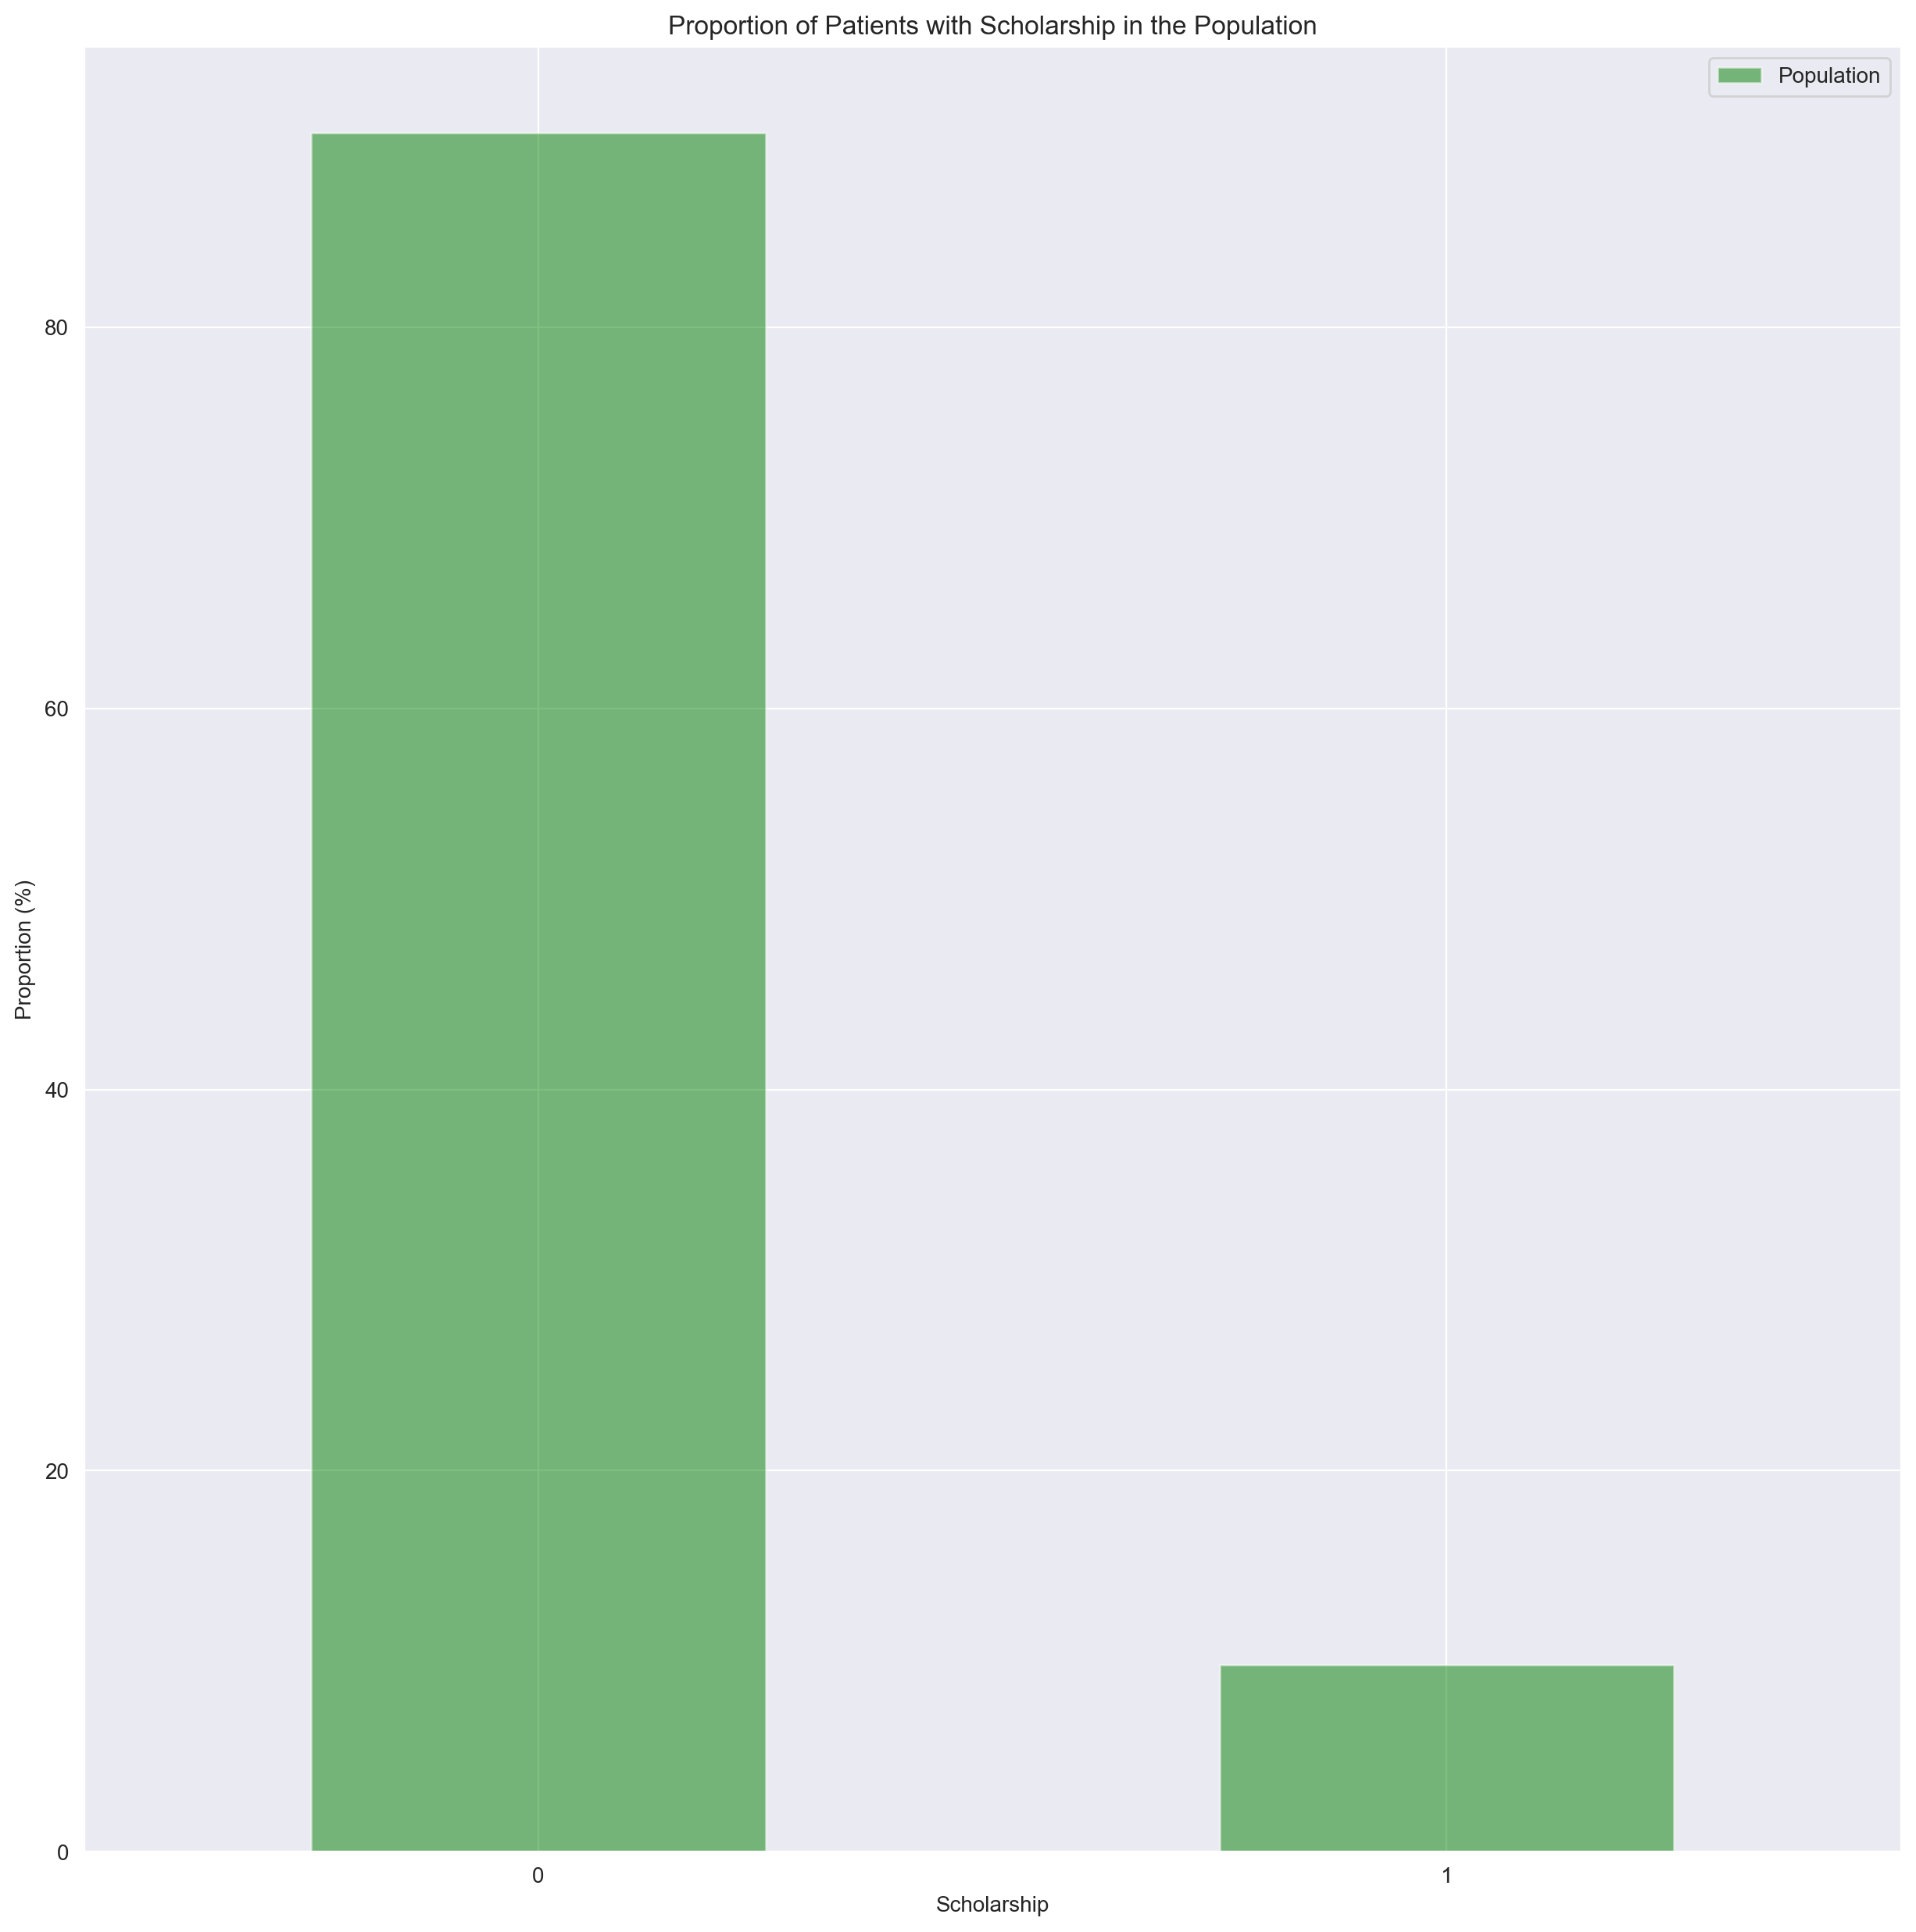

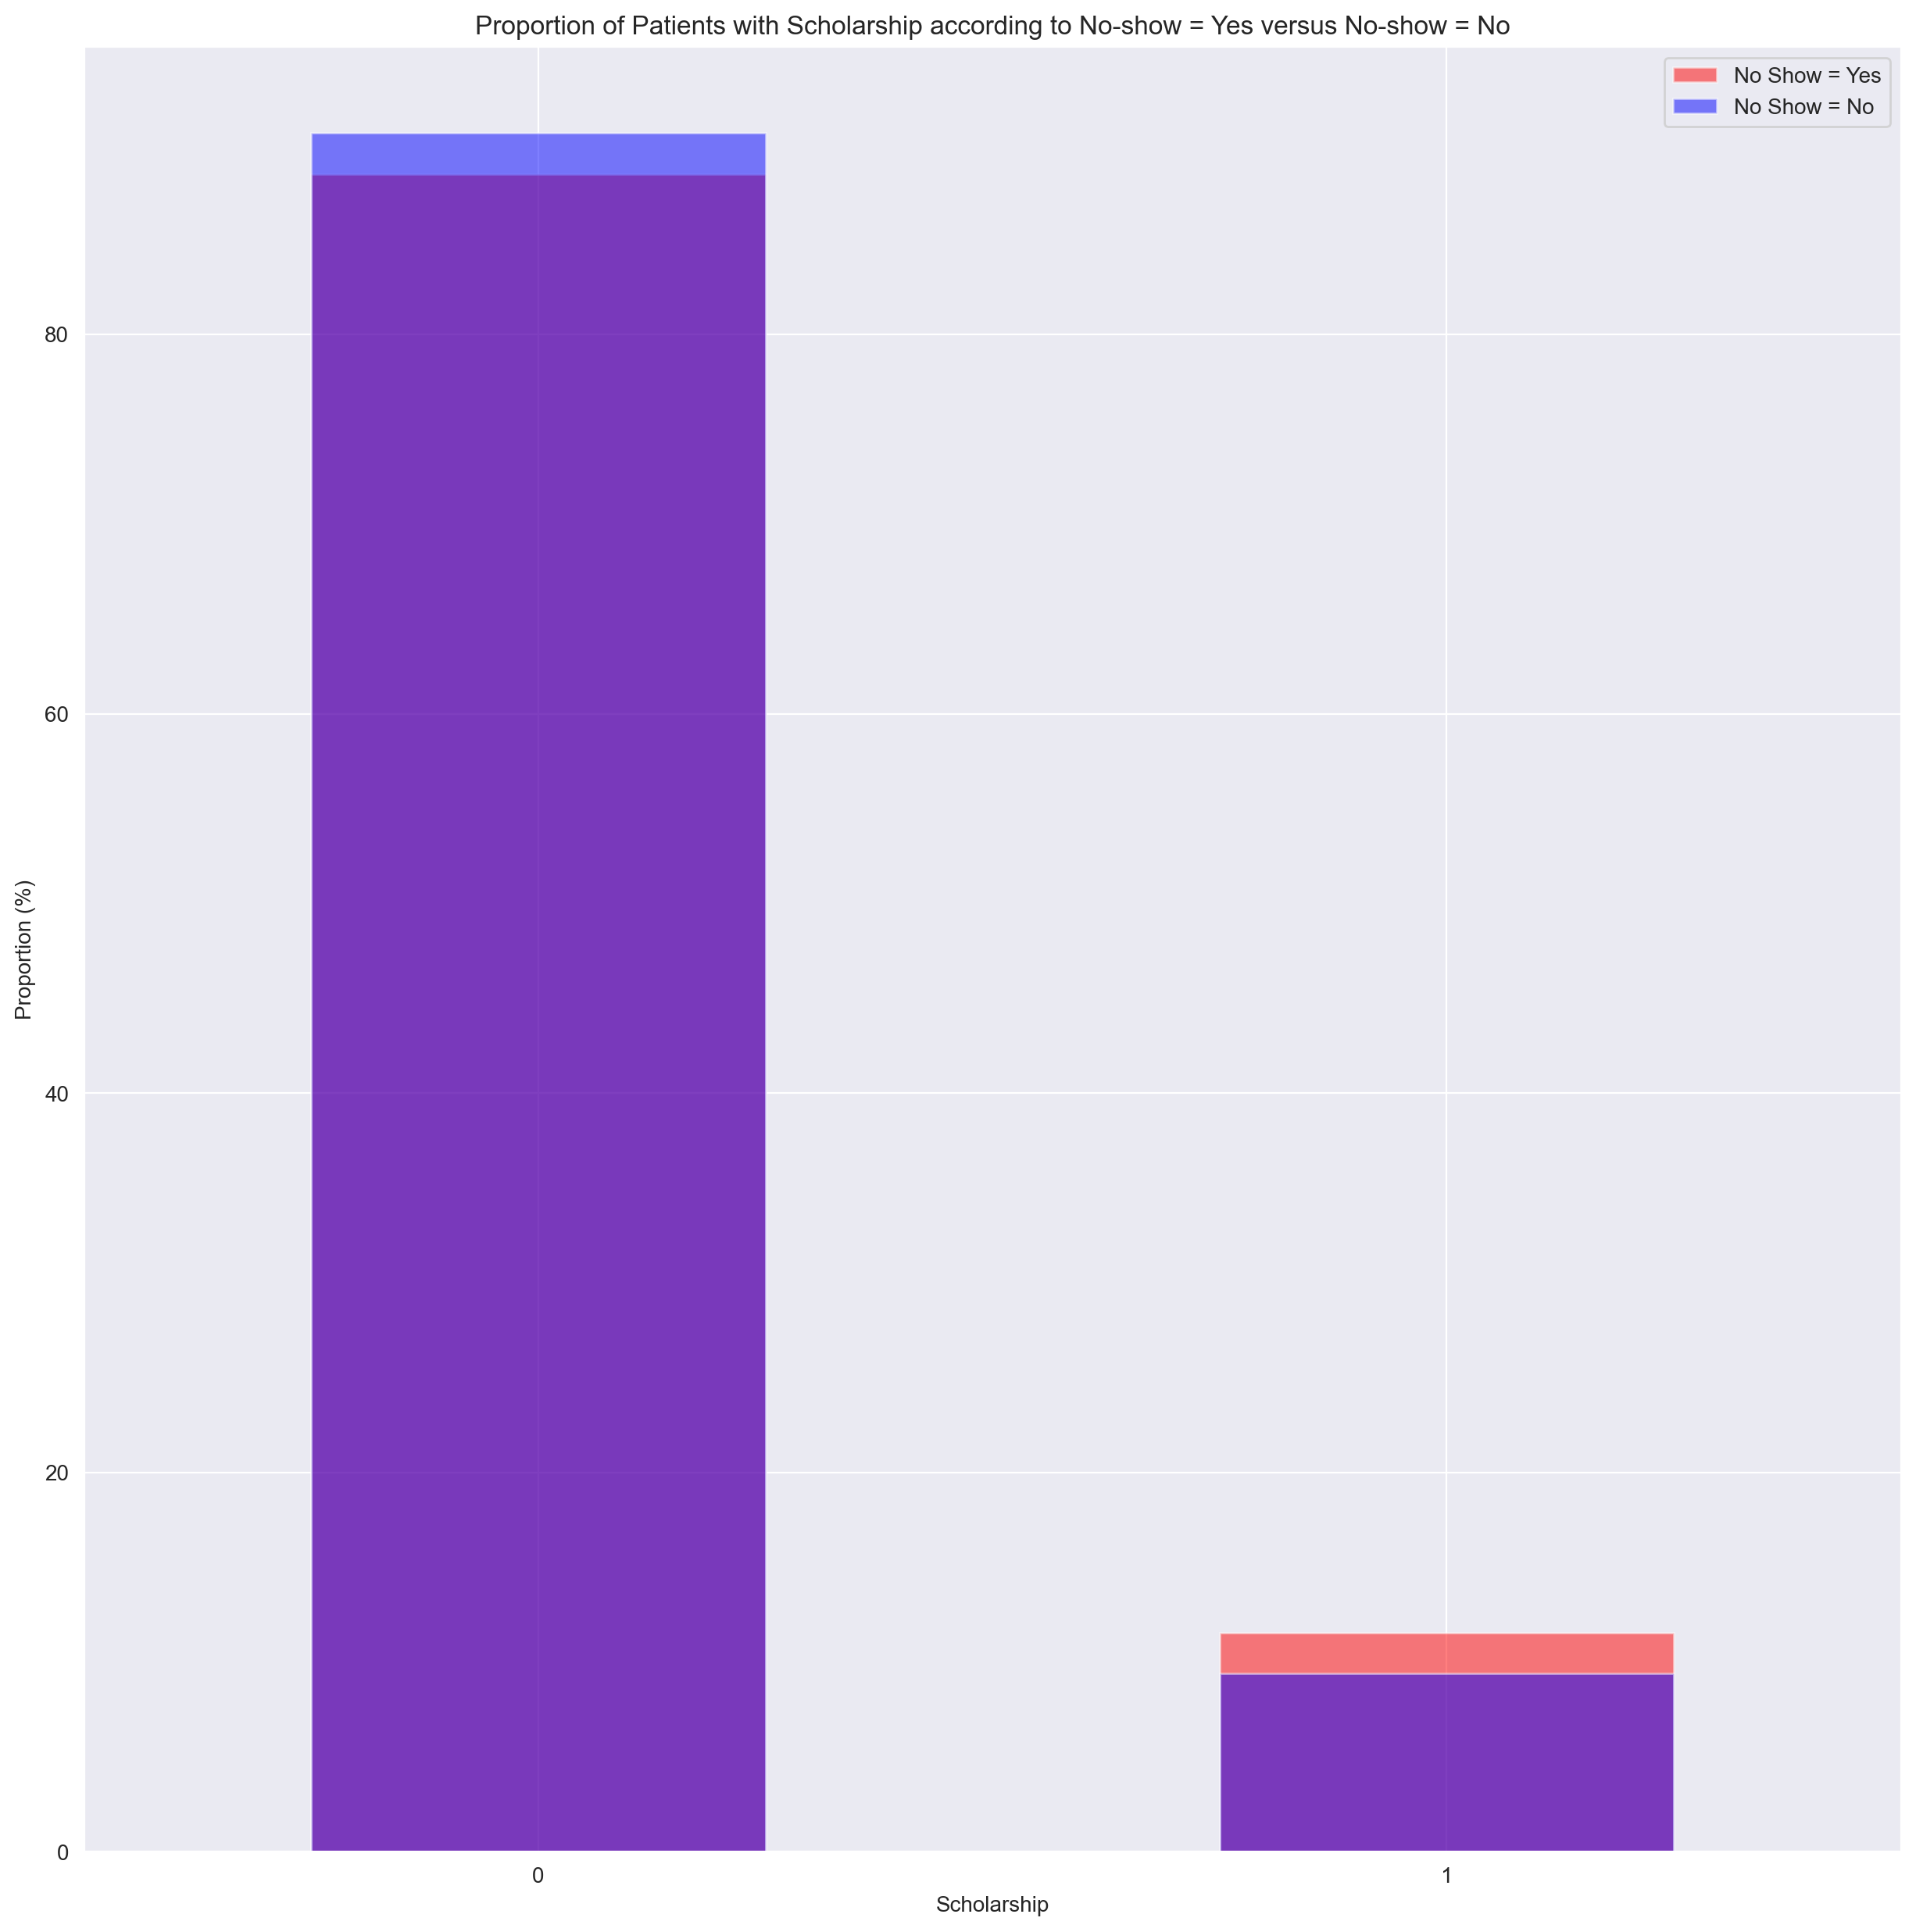

In [20]:
(100 * initial_df["Scholarship"].value_counts()/ initial_df["Scholarship"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "Population", color = "green", figsize=(15, 15))
plt.title("Proportion of Patients with Scholarship in the Population")
plt.xlabel("Scholarship")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()


(100 * initial_df[initial_df["No-show"]=="Yes"]["Scholarship"].value_counts()/ initial_df[initial_df["No-show"]=="Yes"]["Scholarship"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, label = "No Show = Yes", color = "red")
(100 * initial_df[initial_df["No-show"]=="No"]["Scholarship"].value_counts()/ initial_df[initial_df["No-show"]=="No"]["Scholarship"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "No Show = No", color = "blue", figsize=(15, 15))
plt.title("Proportion of Patients with Scholarship according to No-show = Yes versus No-show = No")
plt.xlabel("Scholarship")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()

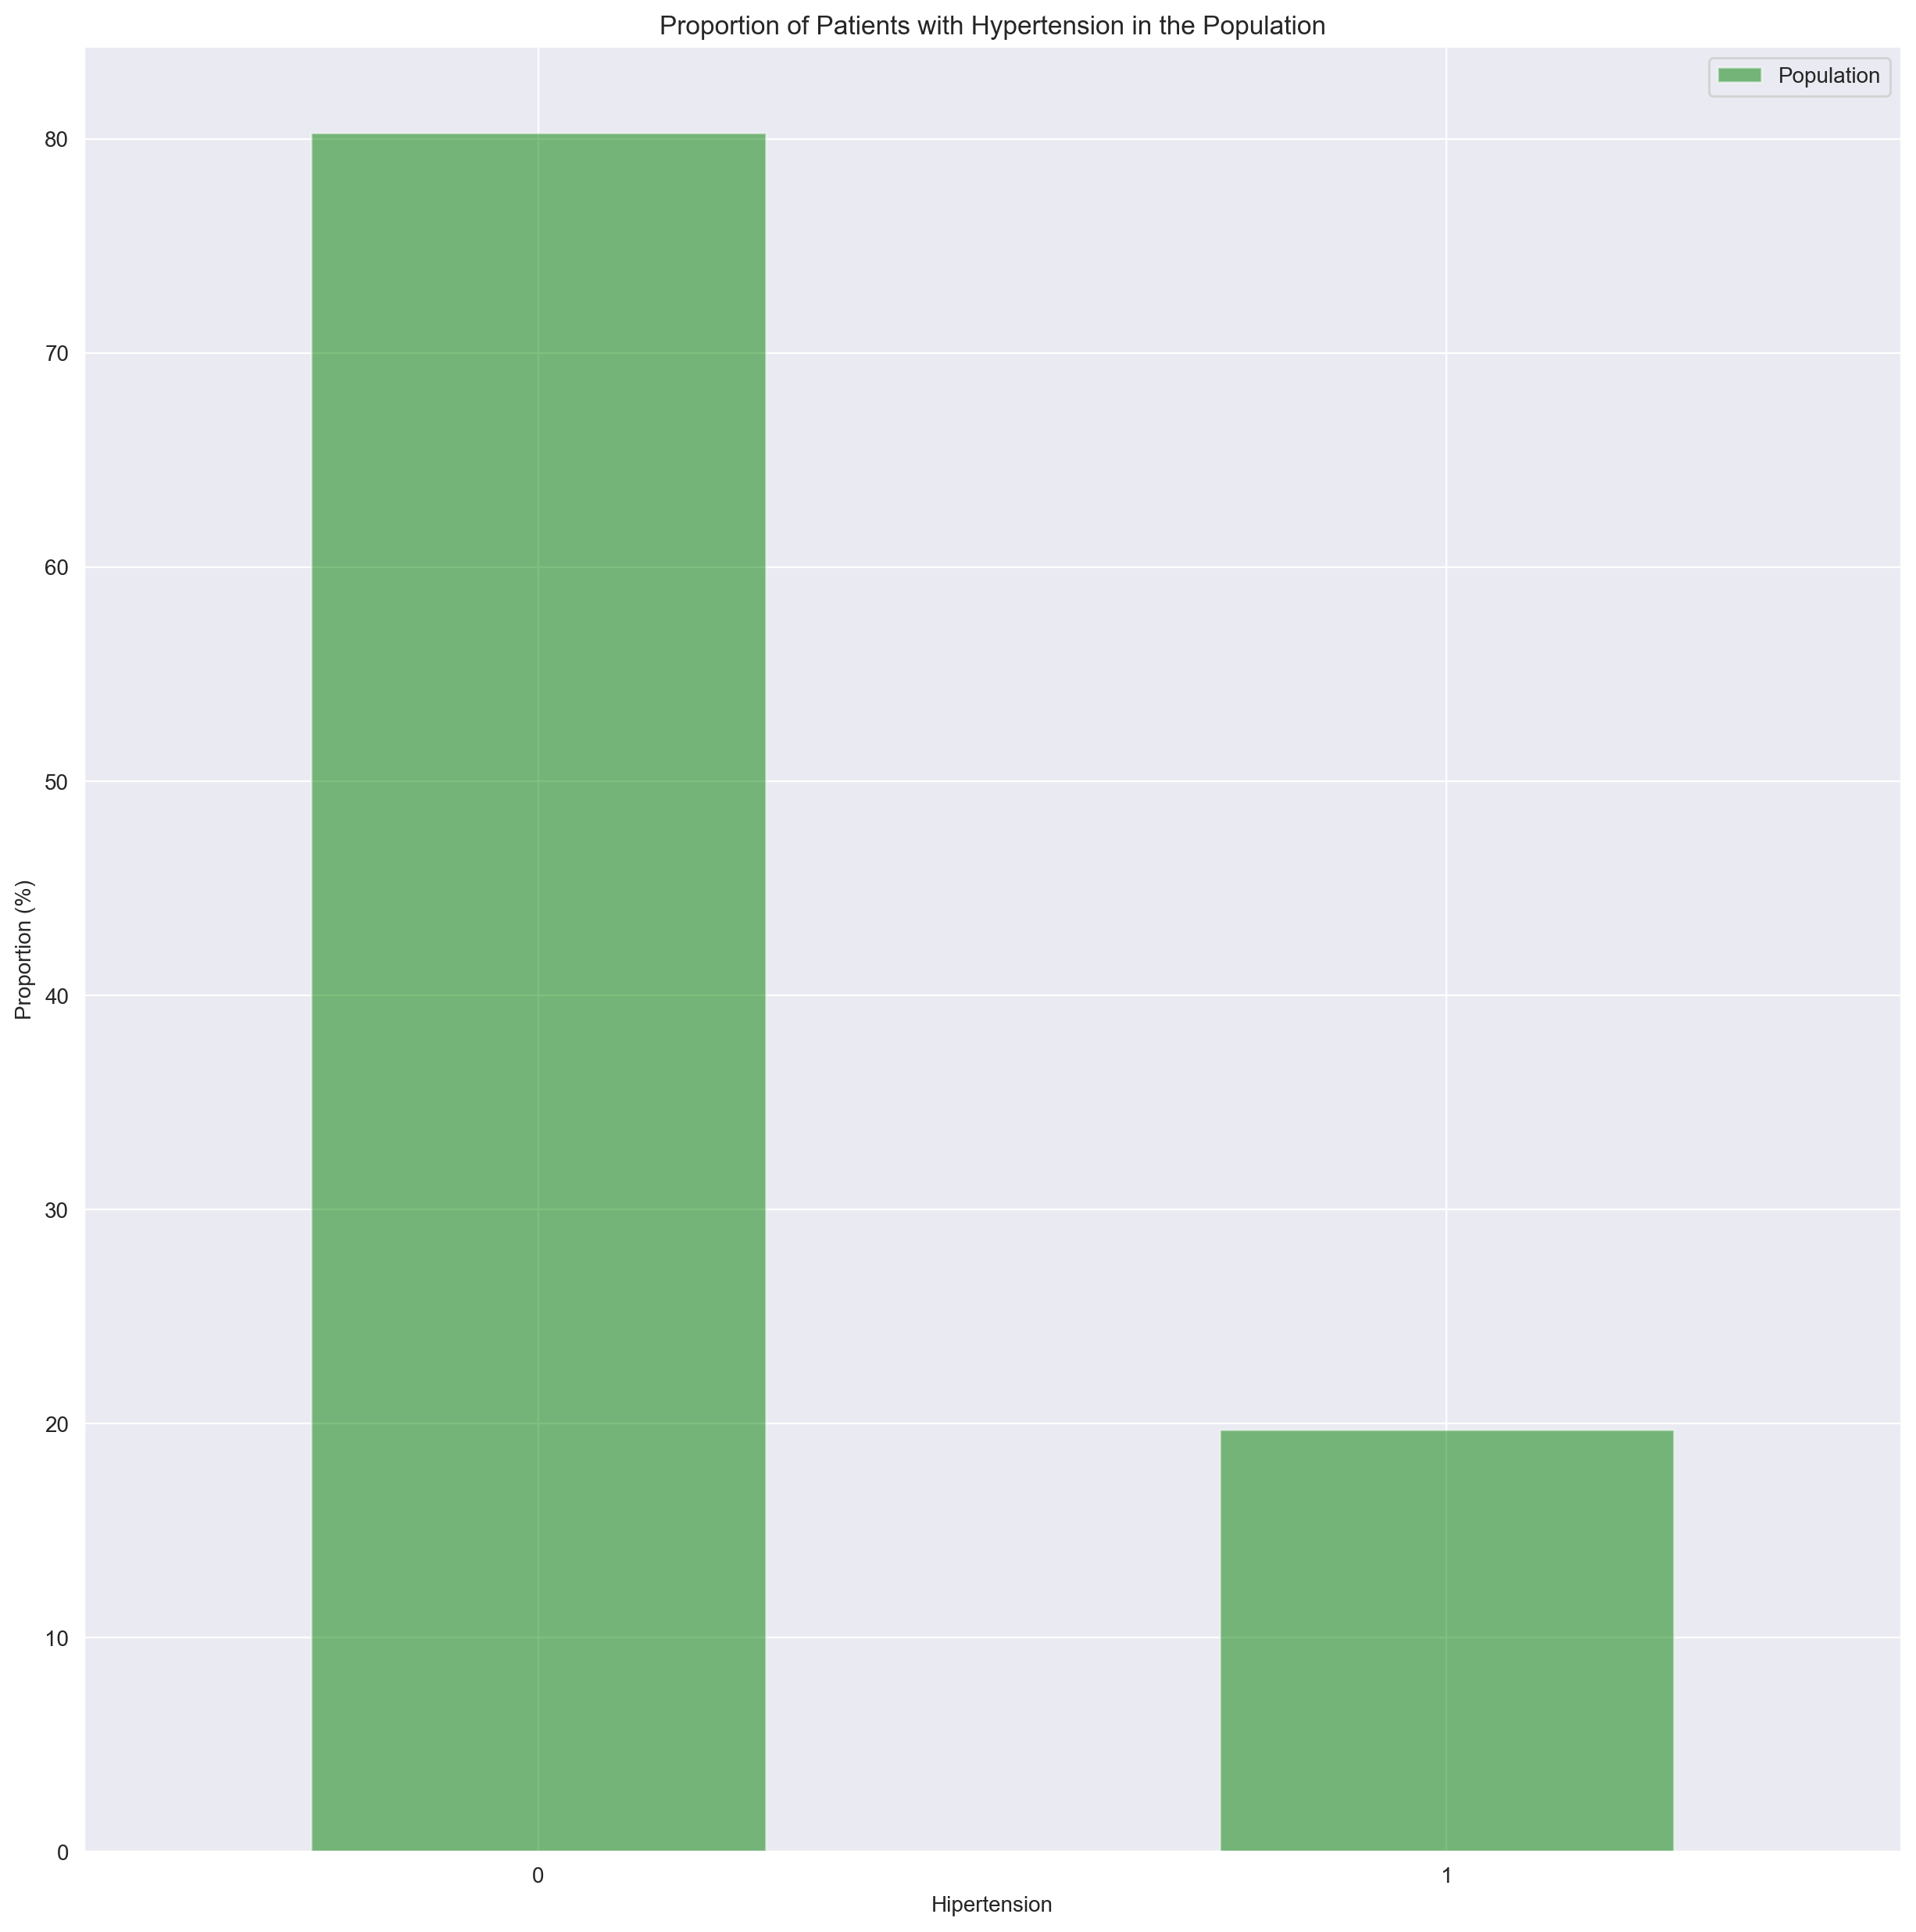

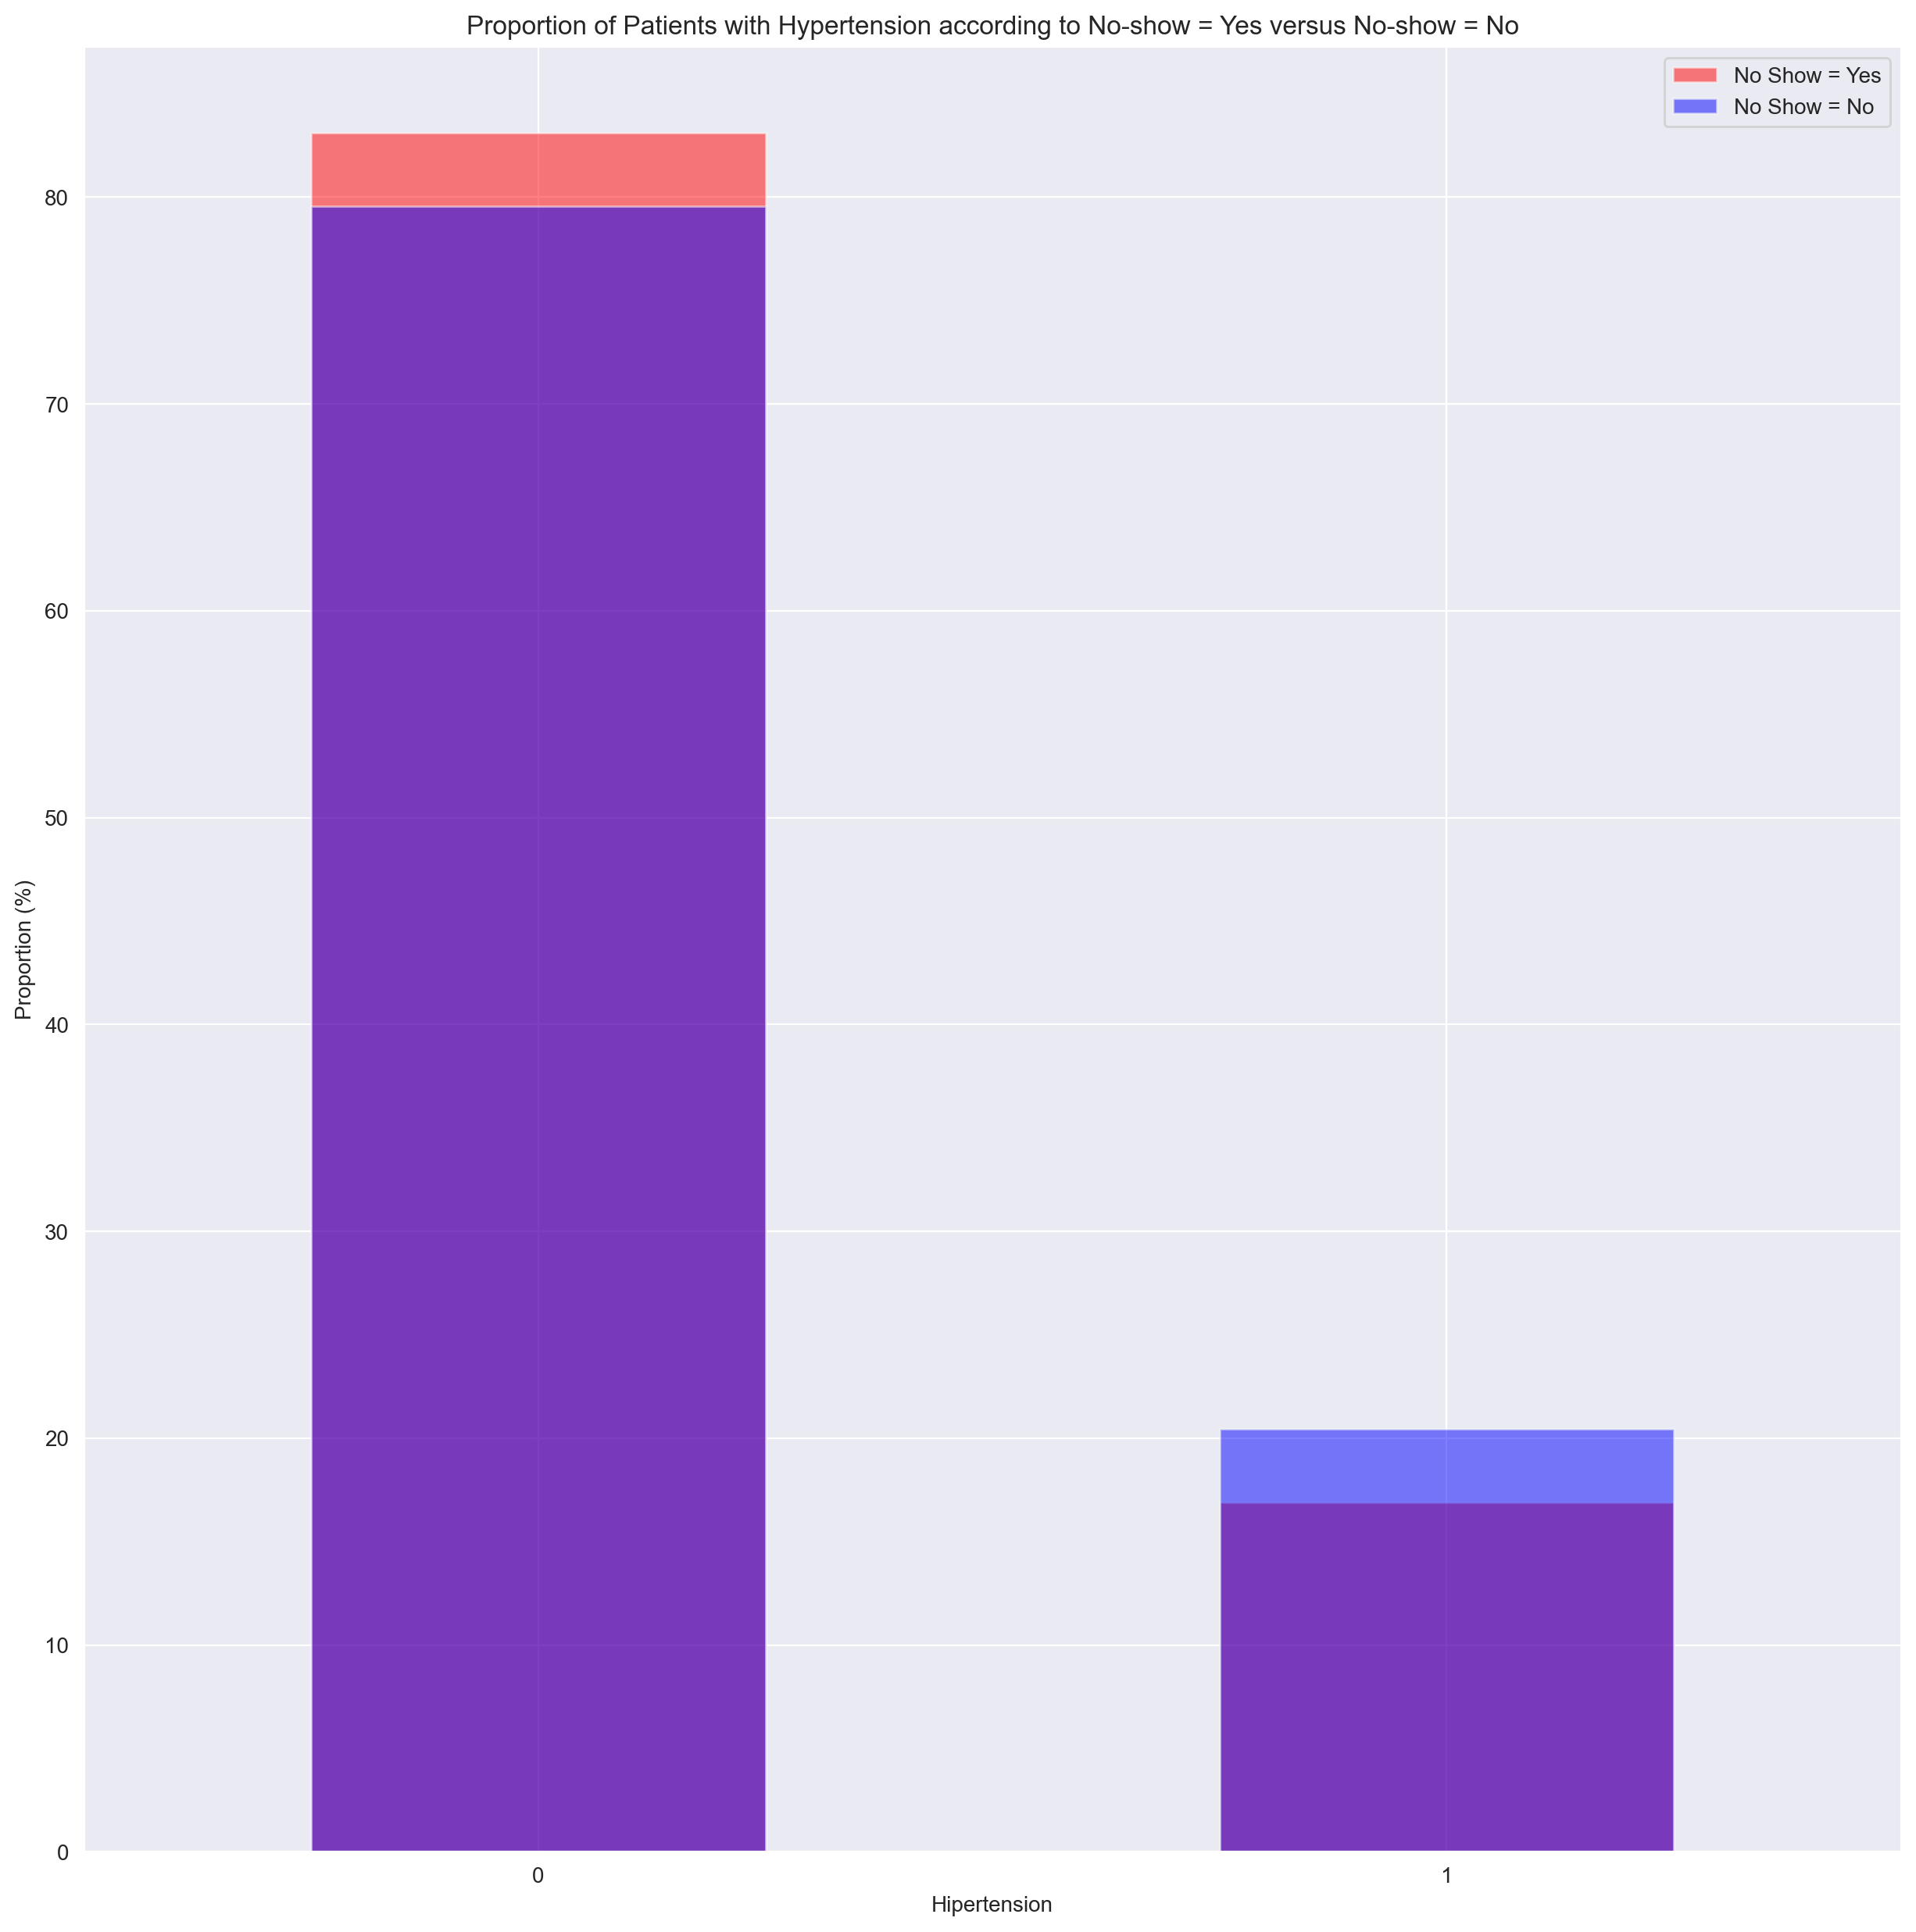

In [21]:
(100 * initial_df["Hipertension"].value_counts()/ initial_df["Hipertension"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "Population", color = "green", figsize=(15, 15))
plt.title("Proportion of Patients with Hypertension in the Population")
plt.xlabel("Hipertension")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()


(100 * initial_df[initial_df["No-show"]=="Yes"]["Hipertension"].value_counts()/ initial_df[initial_df["No-show"]=="Yes"]["Hipertension"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, label = "No Show = Yes", color = "red")
(100 * initial_df[initial_df["No-show"]=="No"]["Hipertension"].value_counts()/ initial_df[initial_df["No-show"]=="No"]["Hipertension"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "No Show = No", color = "blue", figsize=(15, 15))
plt.title("Proportion of Patients with Hypertension according to No-show = Yes versus No-show = No")
plt.xlabel("Hipertension")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()

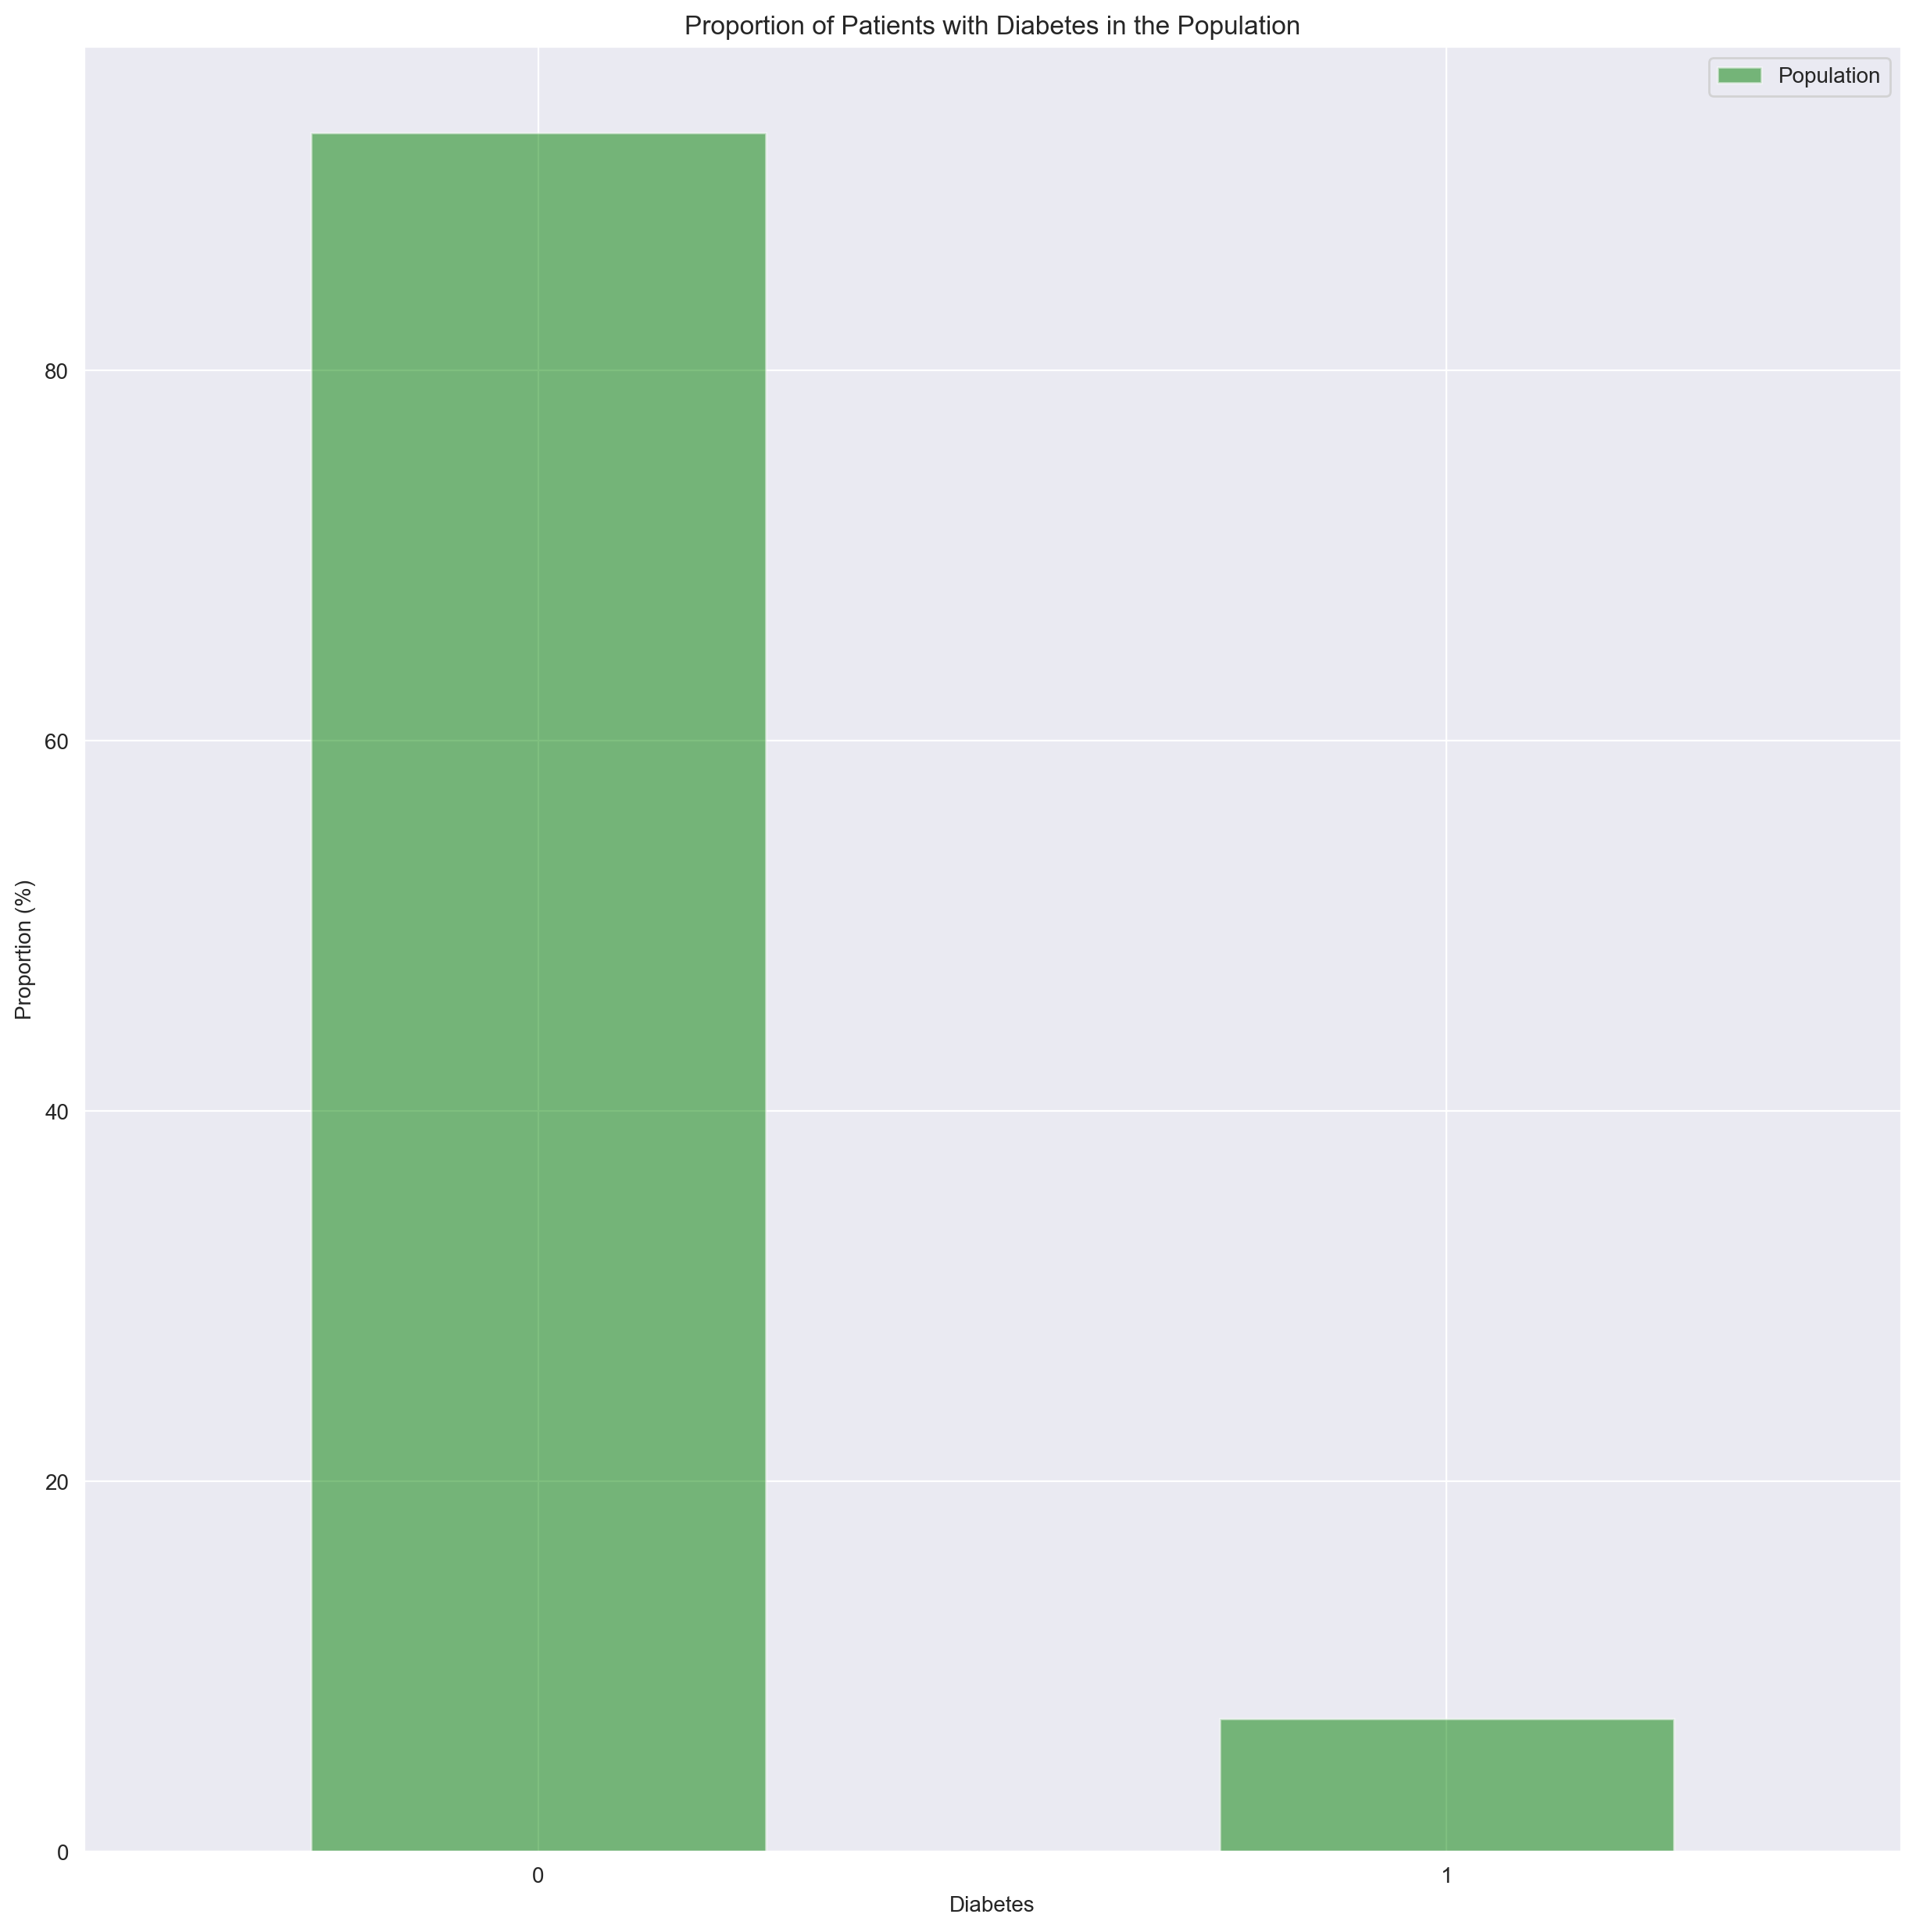

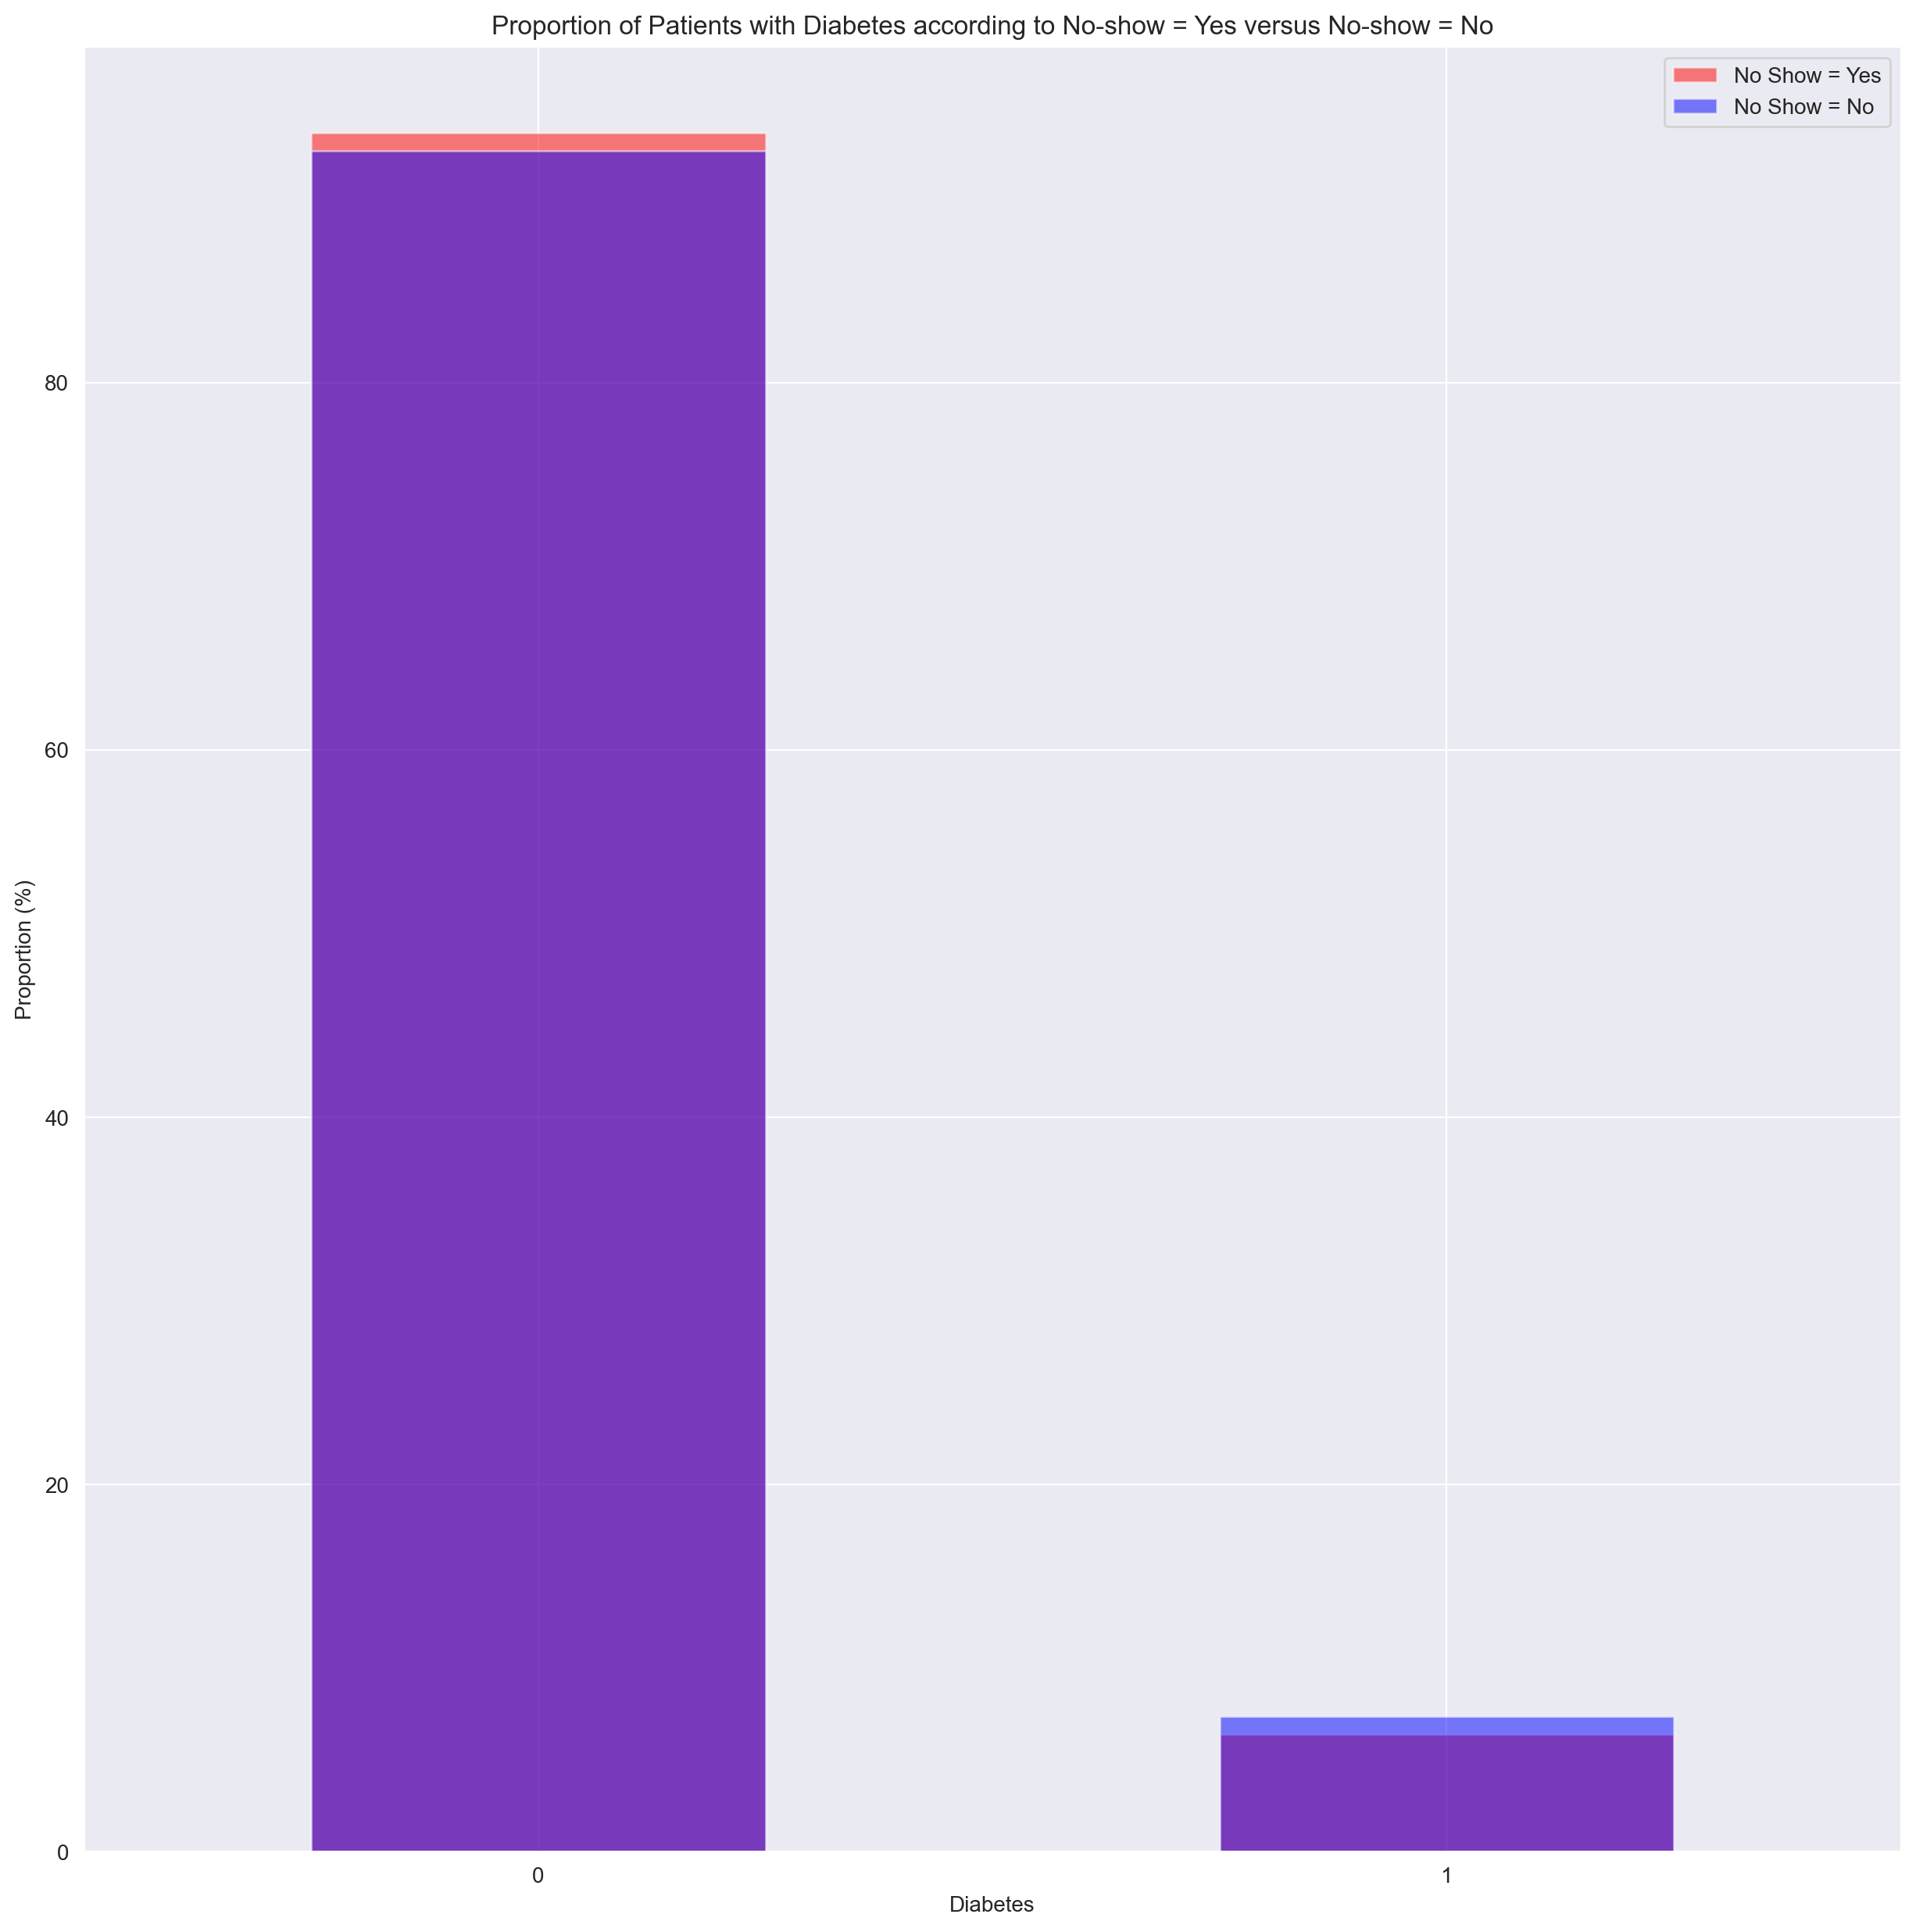

In [22]:
(100 * initial_df["Diabetes"].value_counts()/ initial_df["Diabetes"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "Population", color = "green", figsize=(15, 15))
plt.title("Proportion of Patients with Diabetes in the Population")
plt.xlabel("Diabetes")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()


(100 * initial_df[initial_df["No-show"]=="Yes"]["Diabetes"].value_counts()/ initial_df[initial_df["No-show"]=="Yes"]["Diabetes"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, label = "No Show = Yes", color = "red")
(100 * initial_df[initial_df["No-show"]=="No"]["Diabetes"].value_counts()/ initial_df[initial_df["No-show"]=="No"]["Diabetes"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "No Show = No", color = "blue", figsize=(15, 15))
plt.title("Proportion of Patients with Diabetes according to No-show = Yes versus No-show = No")
plt.xlabel("Diabetes")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()

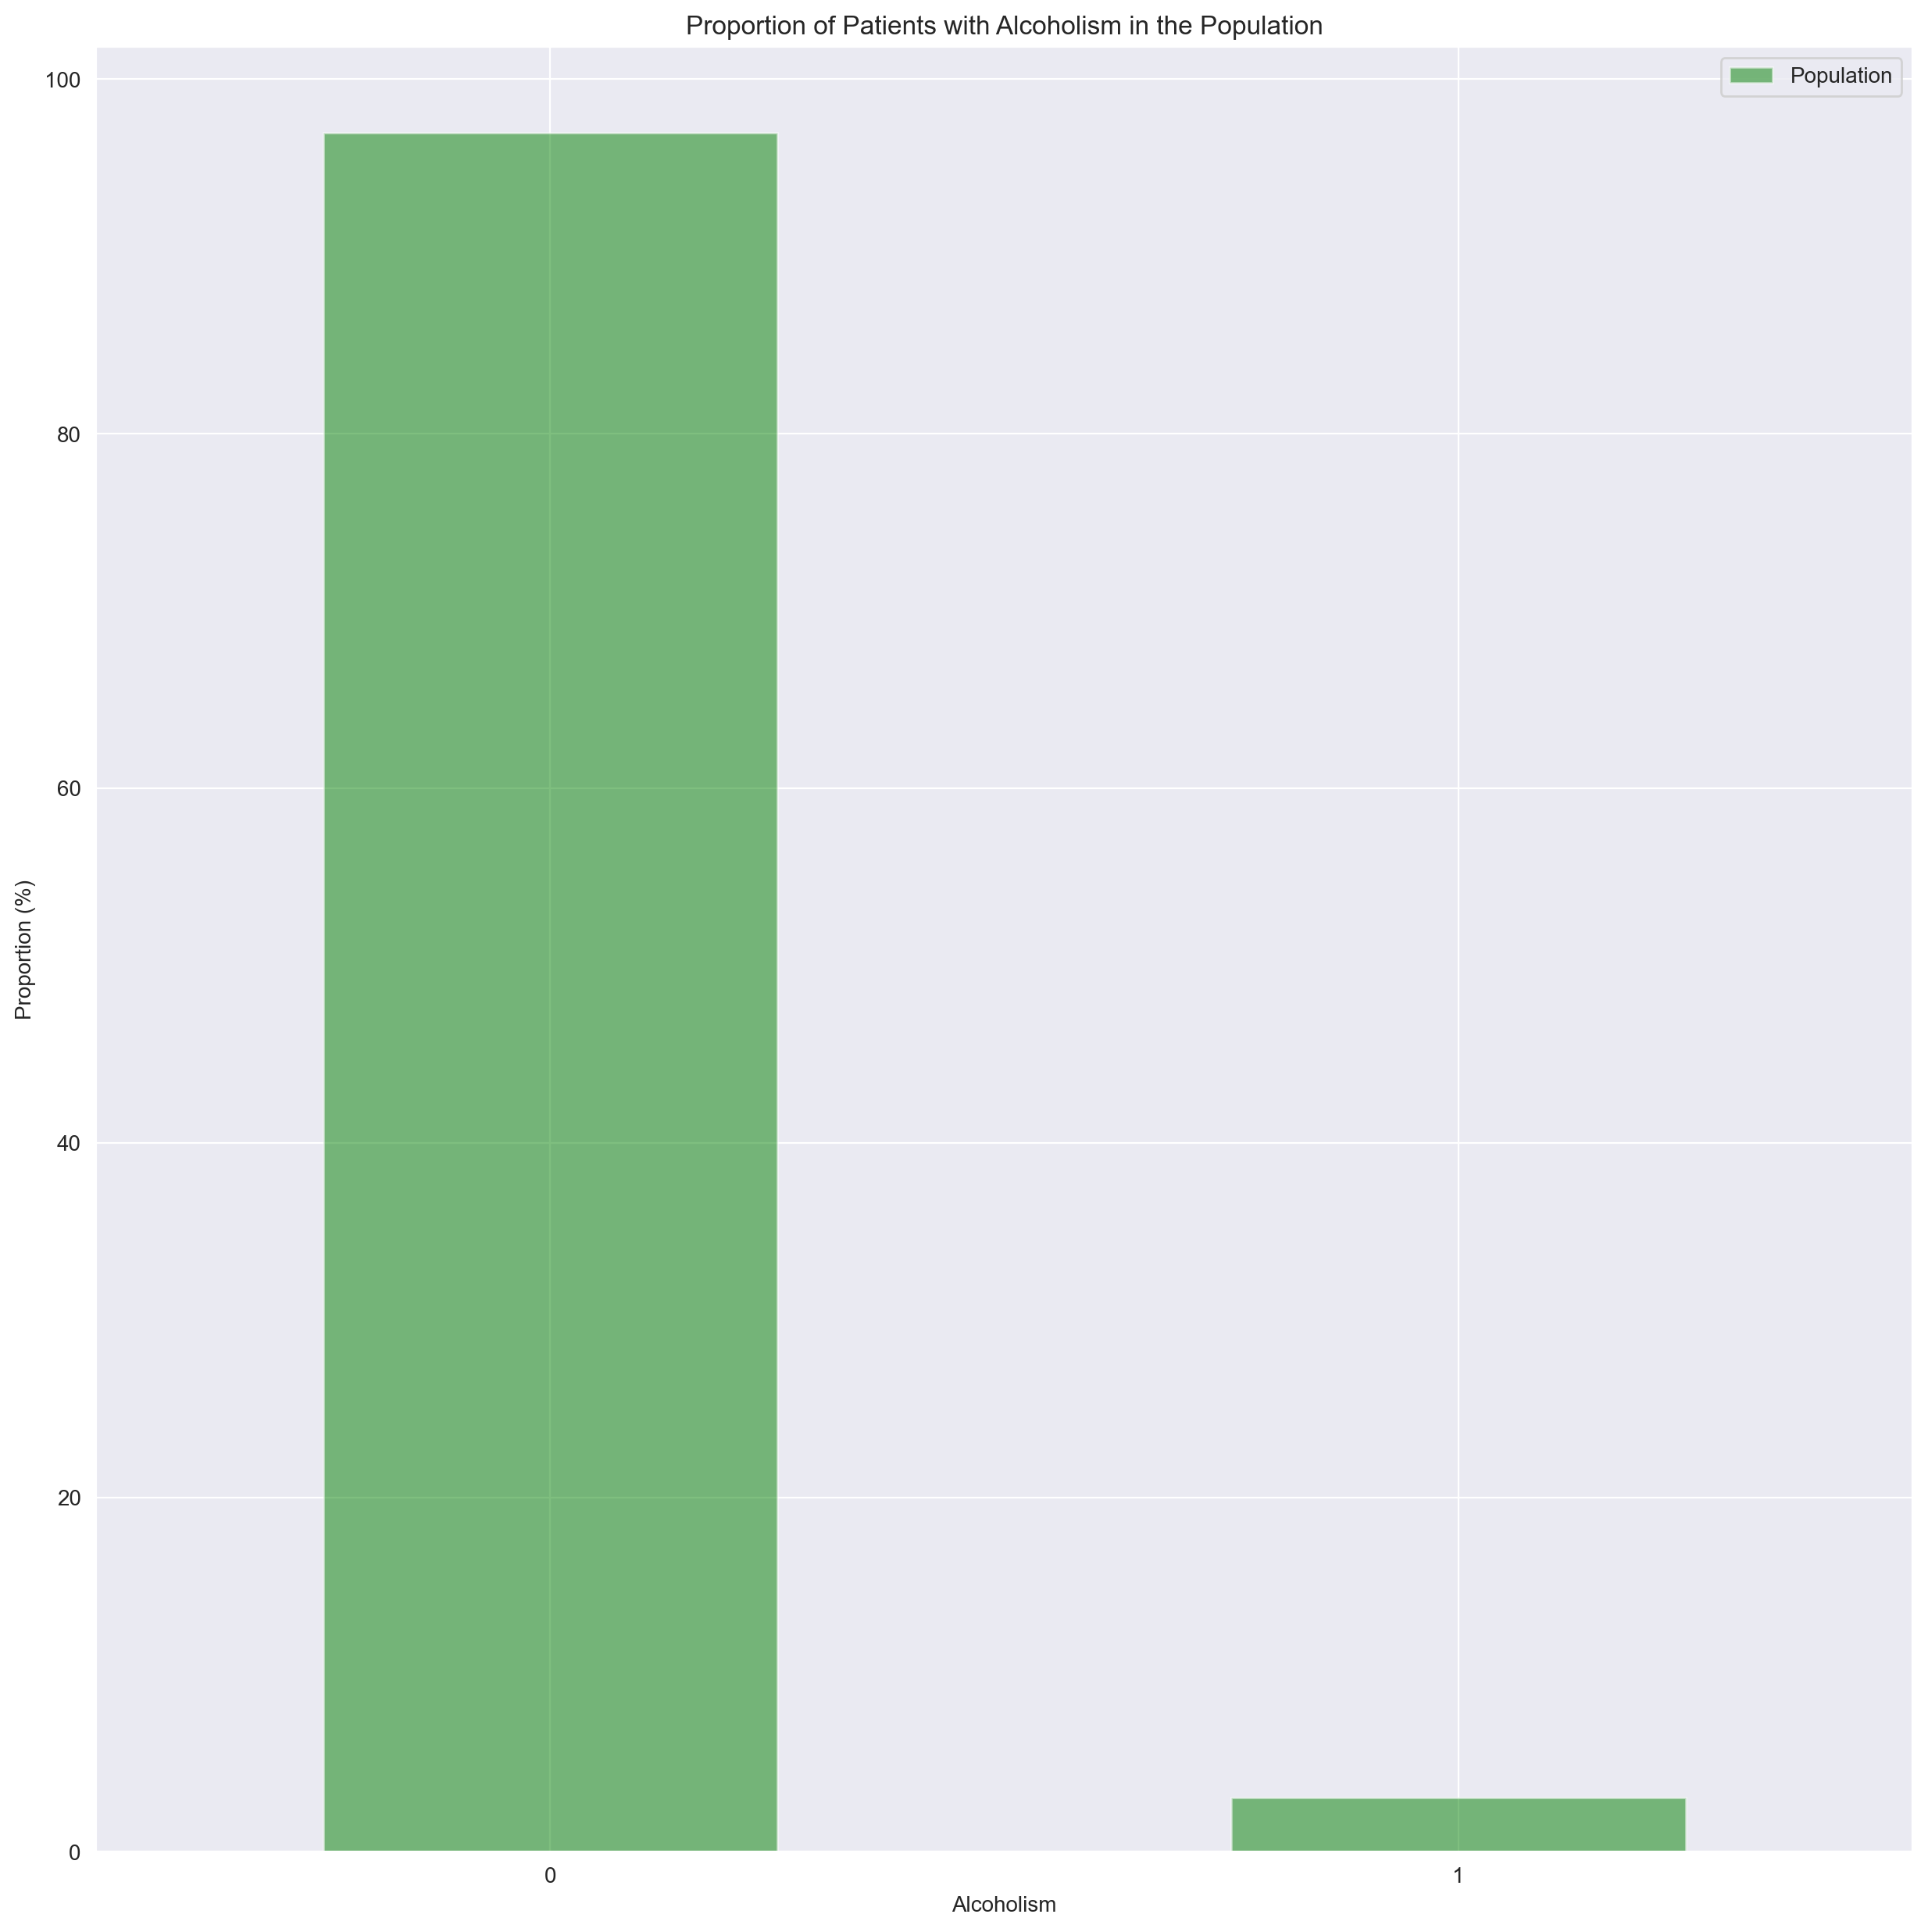

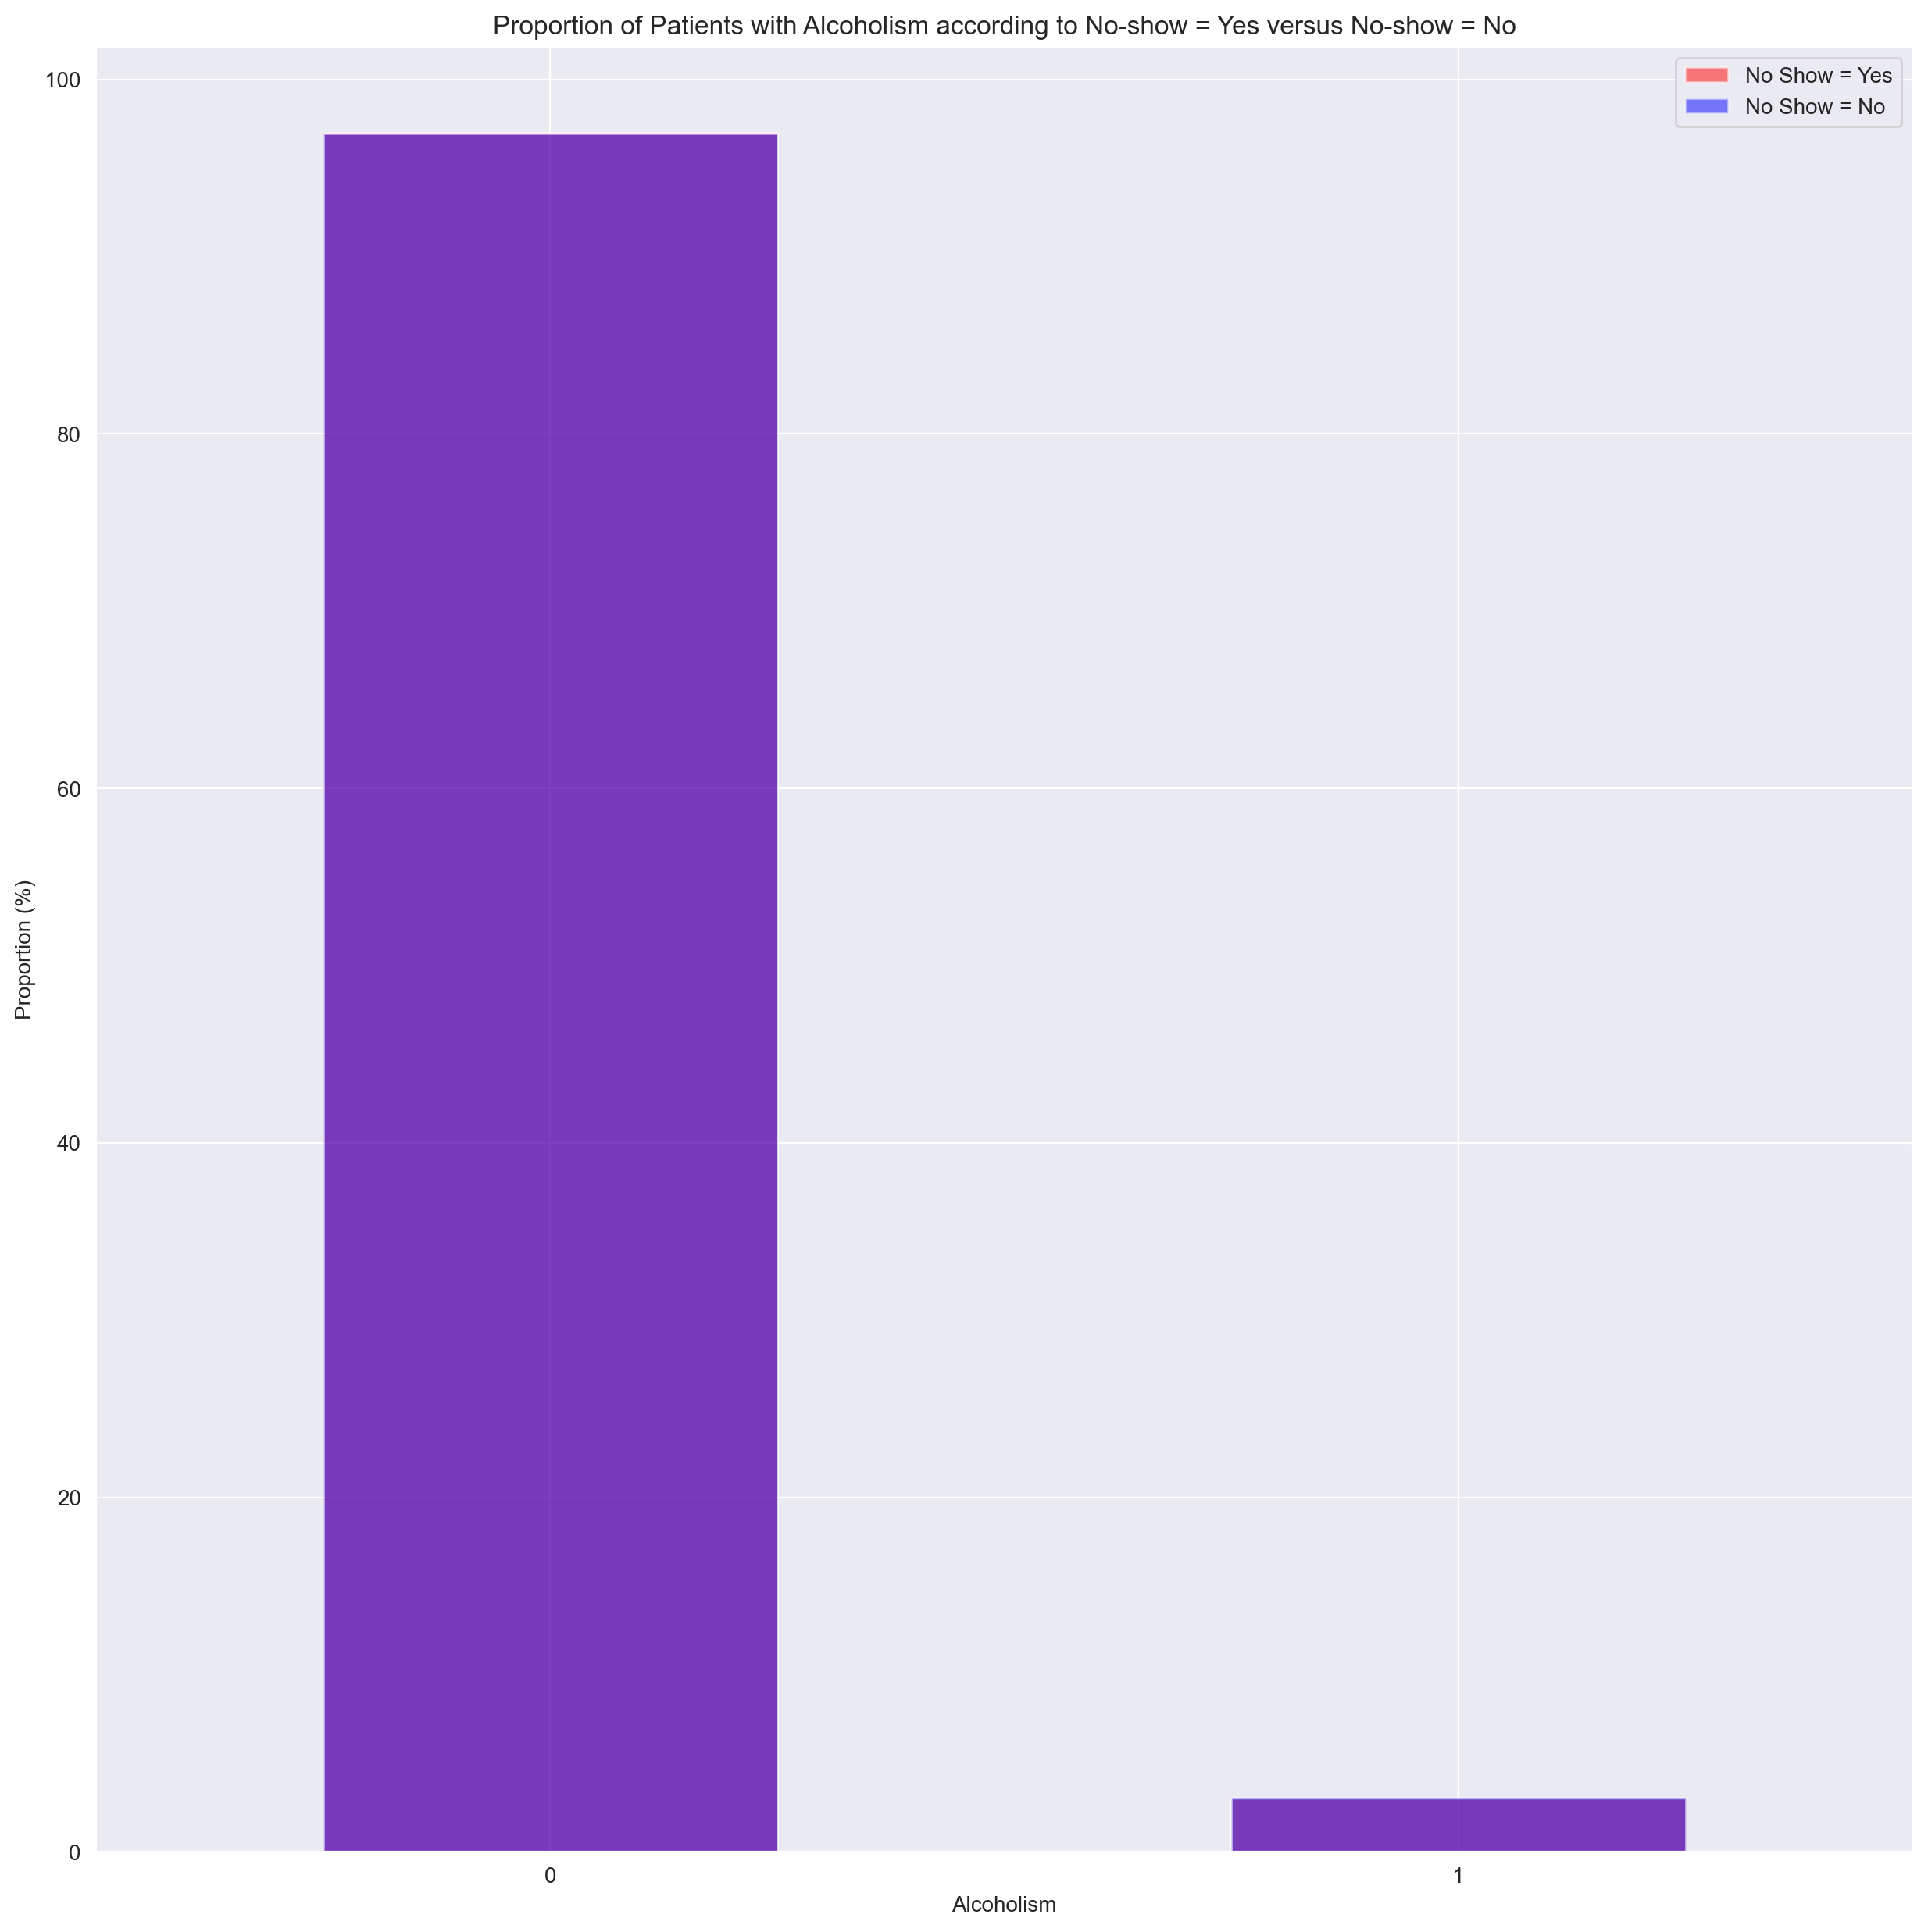

In [23]:
(100 * initial_df["Alcoholism"].value_counts()/ initial_df["Alcoholism"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "Population", color = "green", figsize=(15, 15))
plt.title("Proportion of Patients with Alcoholism in the Population")
plt.xlabel("Alcoholism")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()


(100 * initial_df[initial_df["No-show"]=="Yes"]["Alcoholism"].value_counts()/ initial_df[initial_df["No-show"]=="Yes"]["Alcoholism"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, label = "No Show = Yes", color = "red")
(100 * initial_df[initial_df["No-show"]=="No"]["Alcoholism"].value_counts()/ initial_df[initial_df["No-show"]=="No"]["Alcoholism"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "No Show = No", color = "blue", figsize=(15, 15))
plt.title("Proportion of Patients with Alcoholism according to No-show = Yes versus No-show = No")
plt.xlabel("Alcoholism")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()

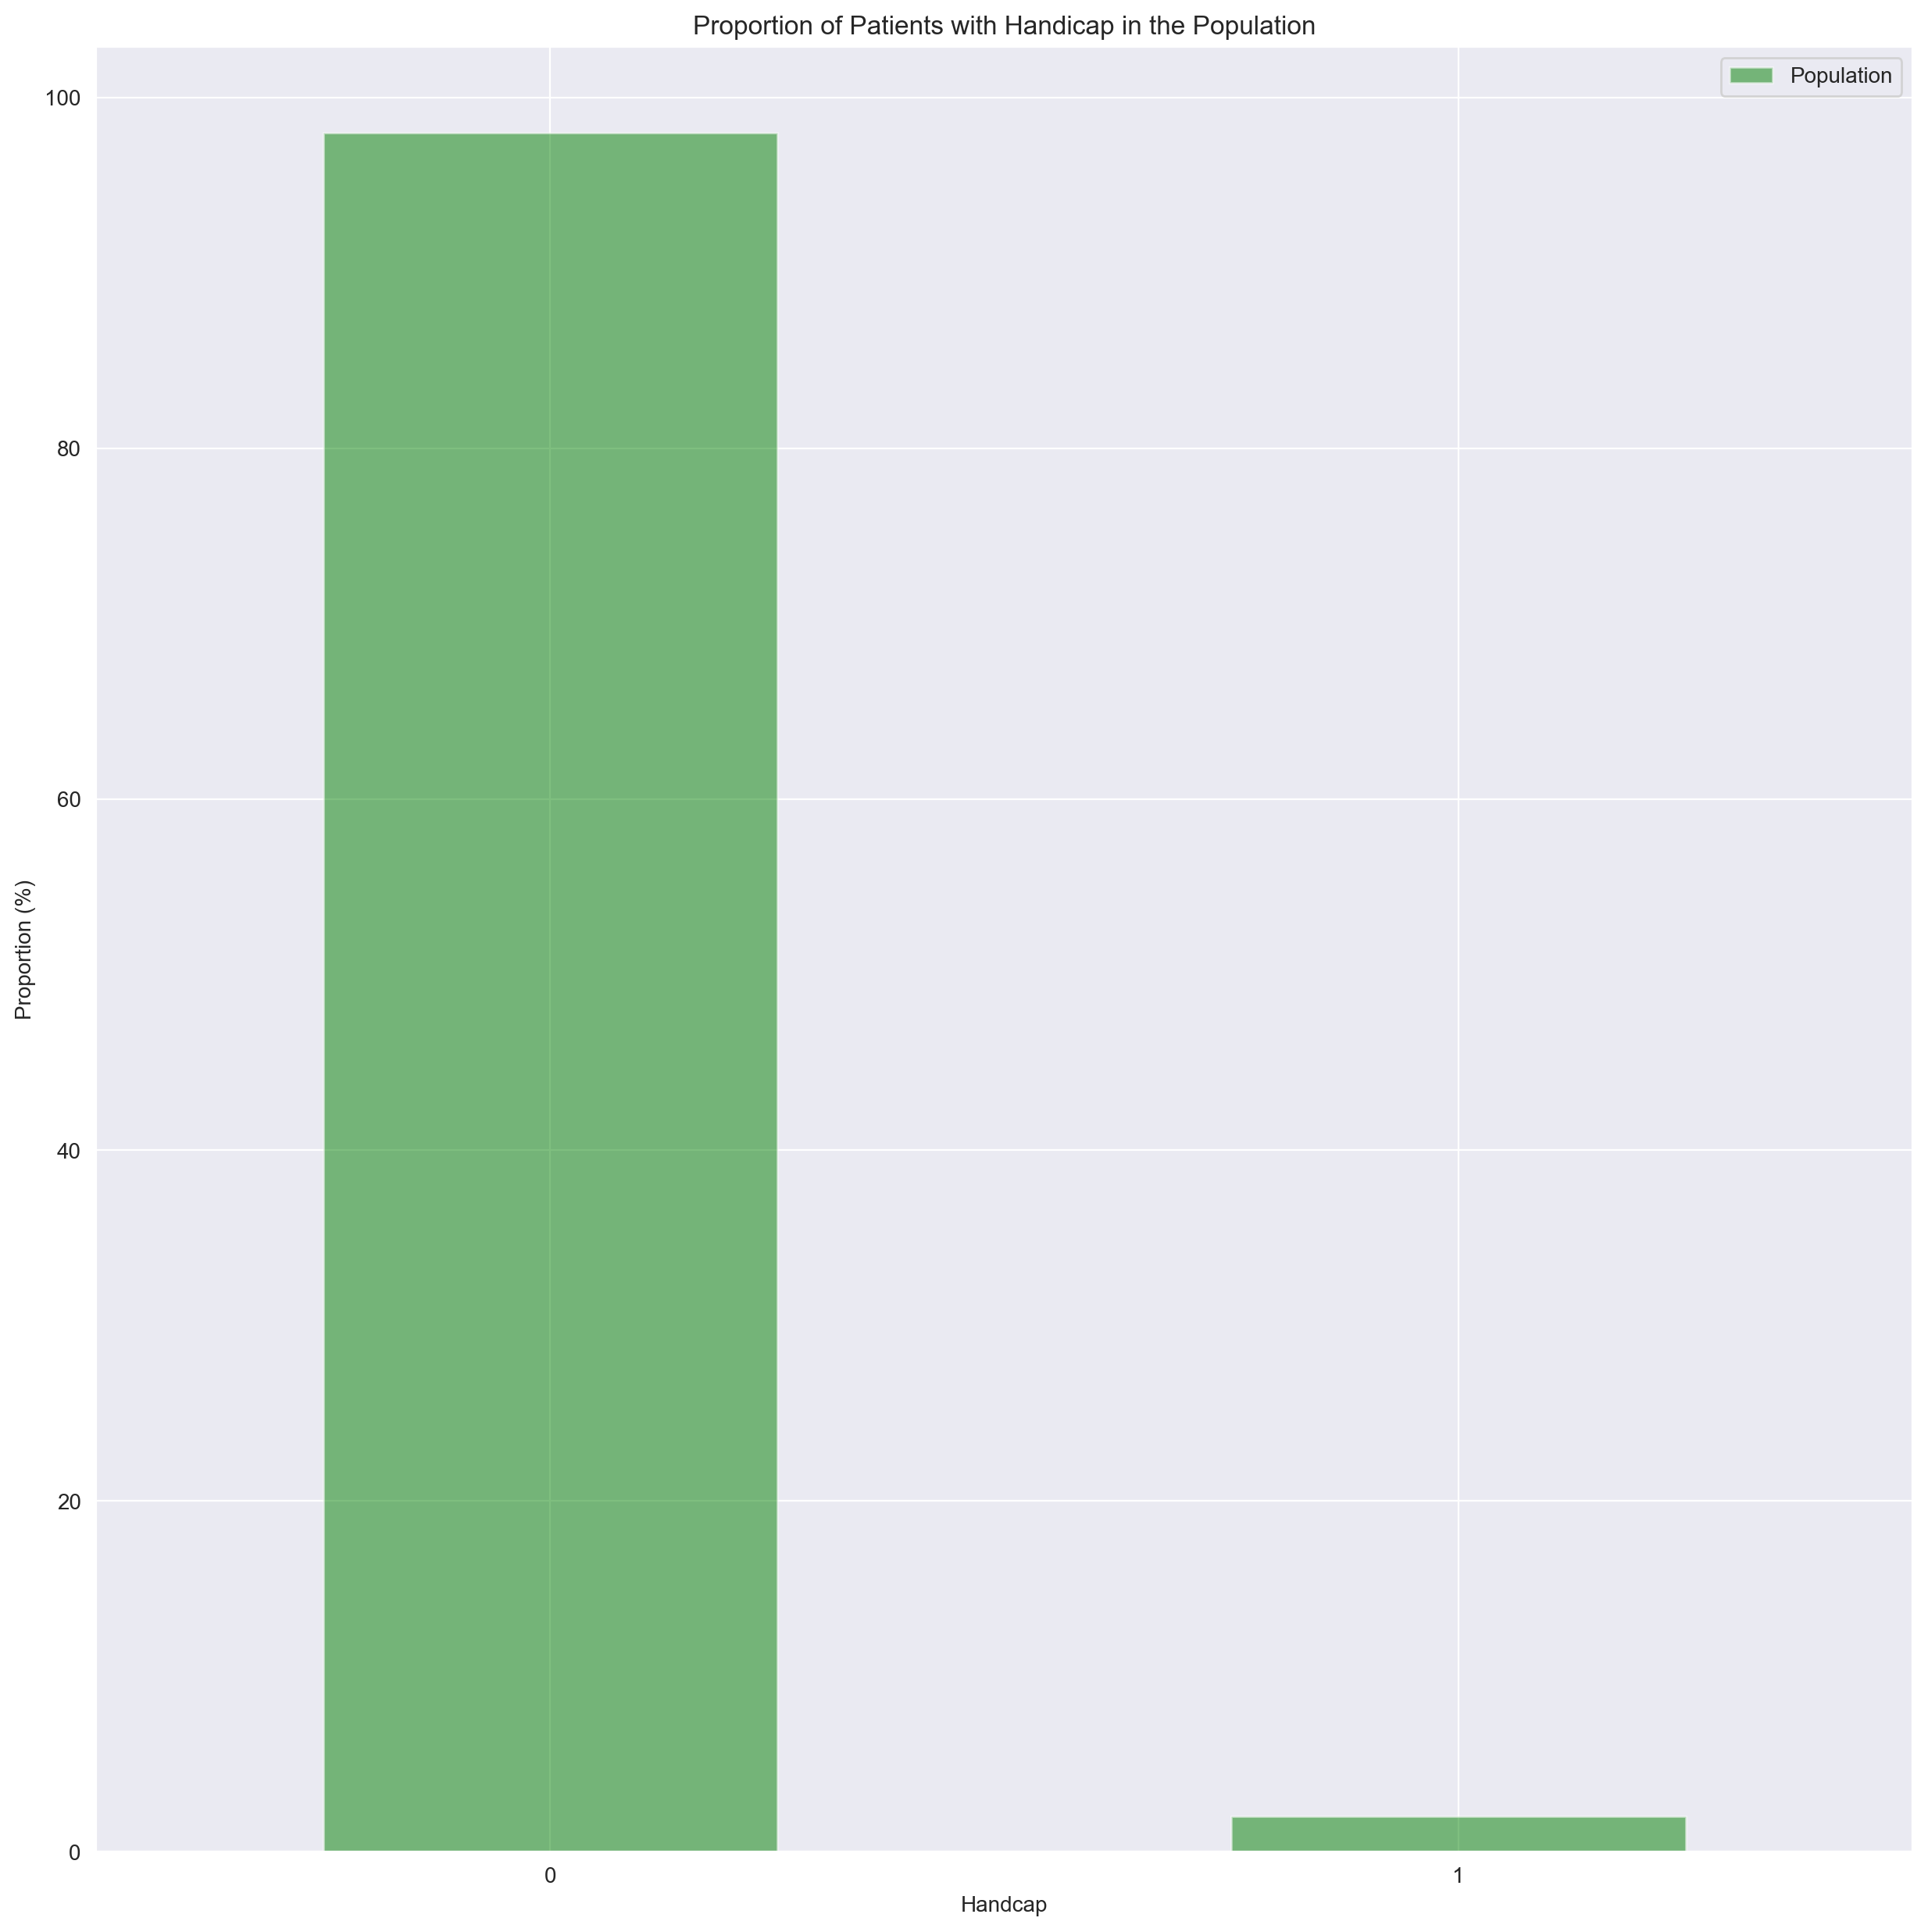

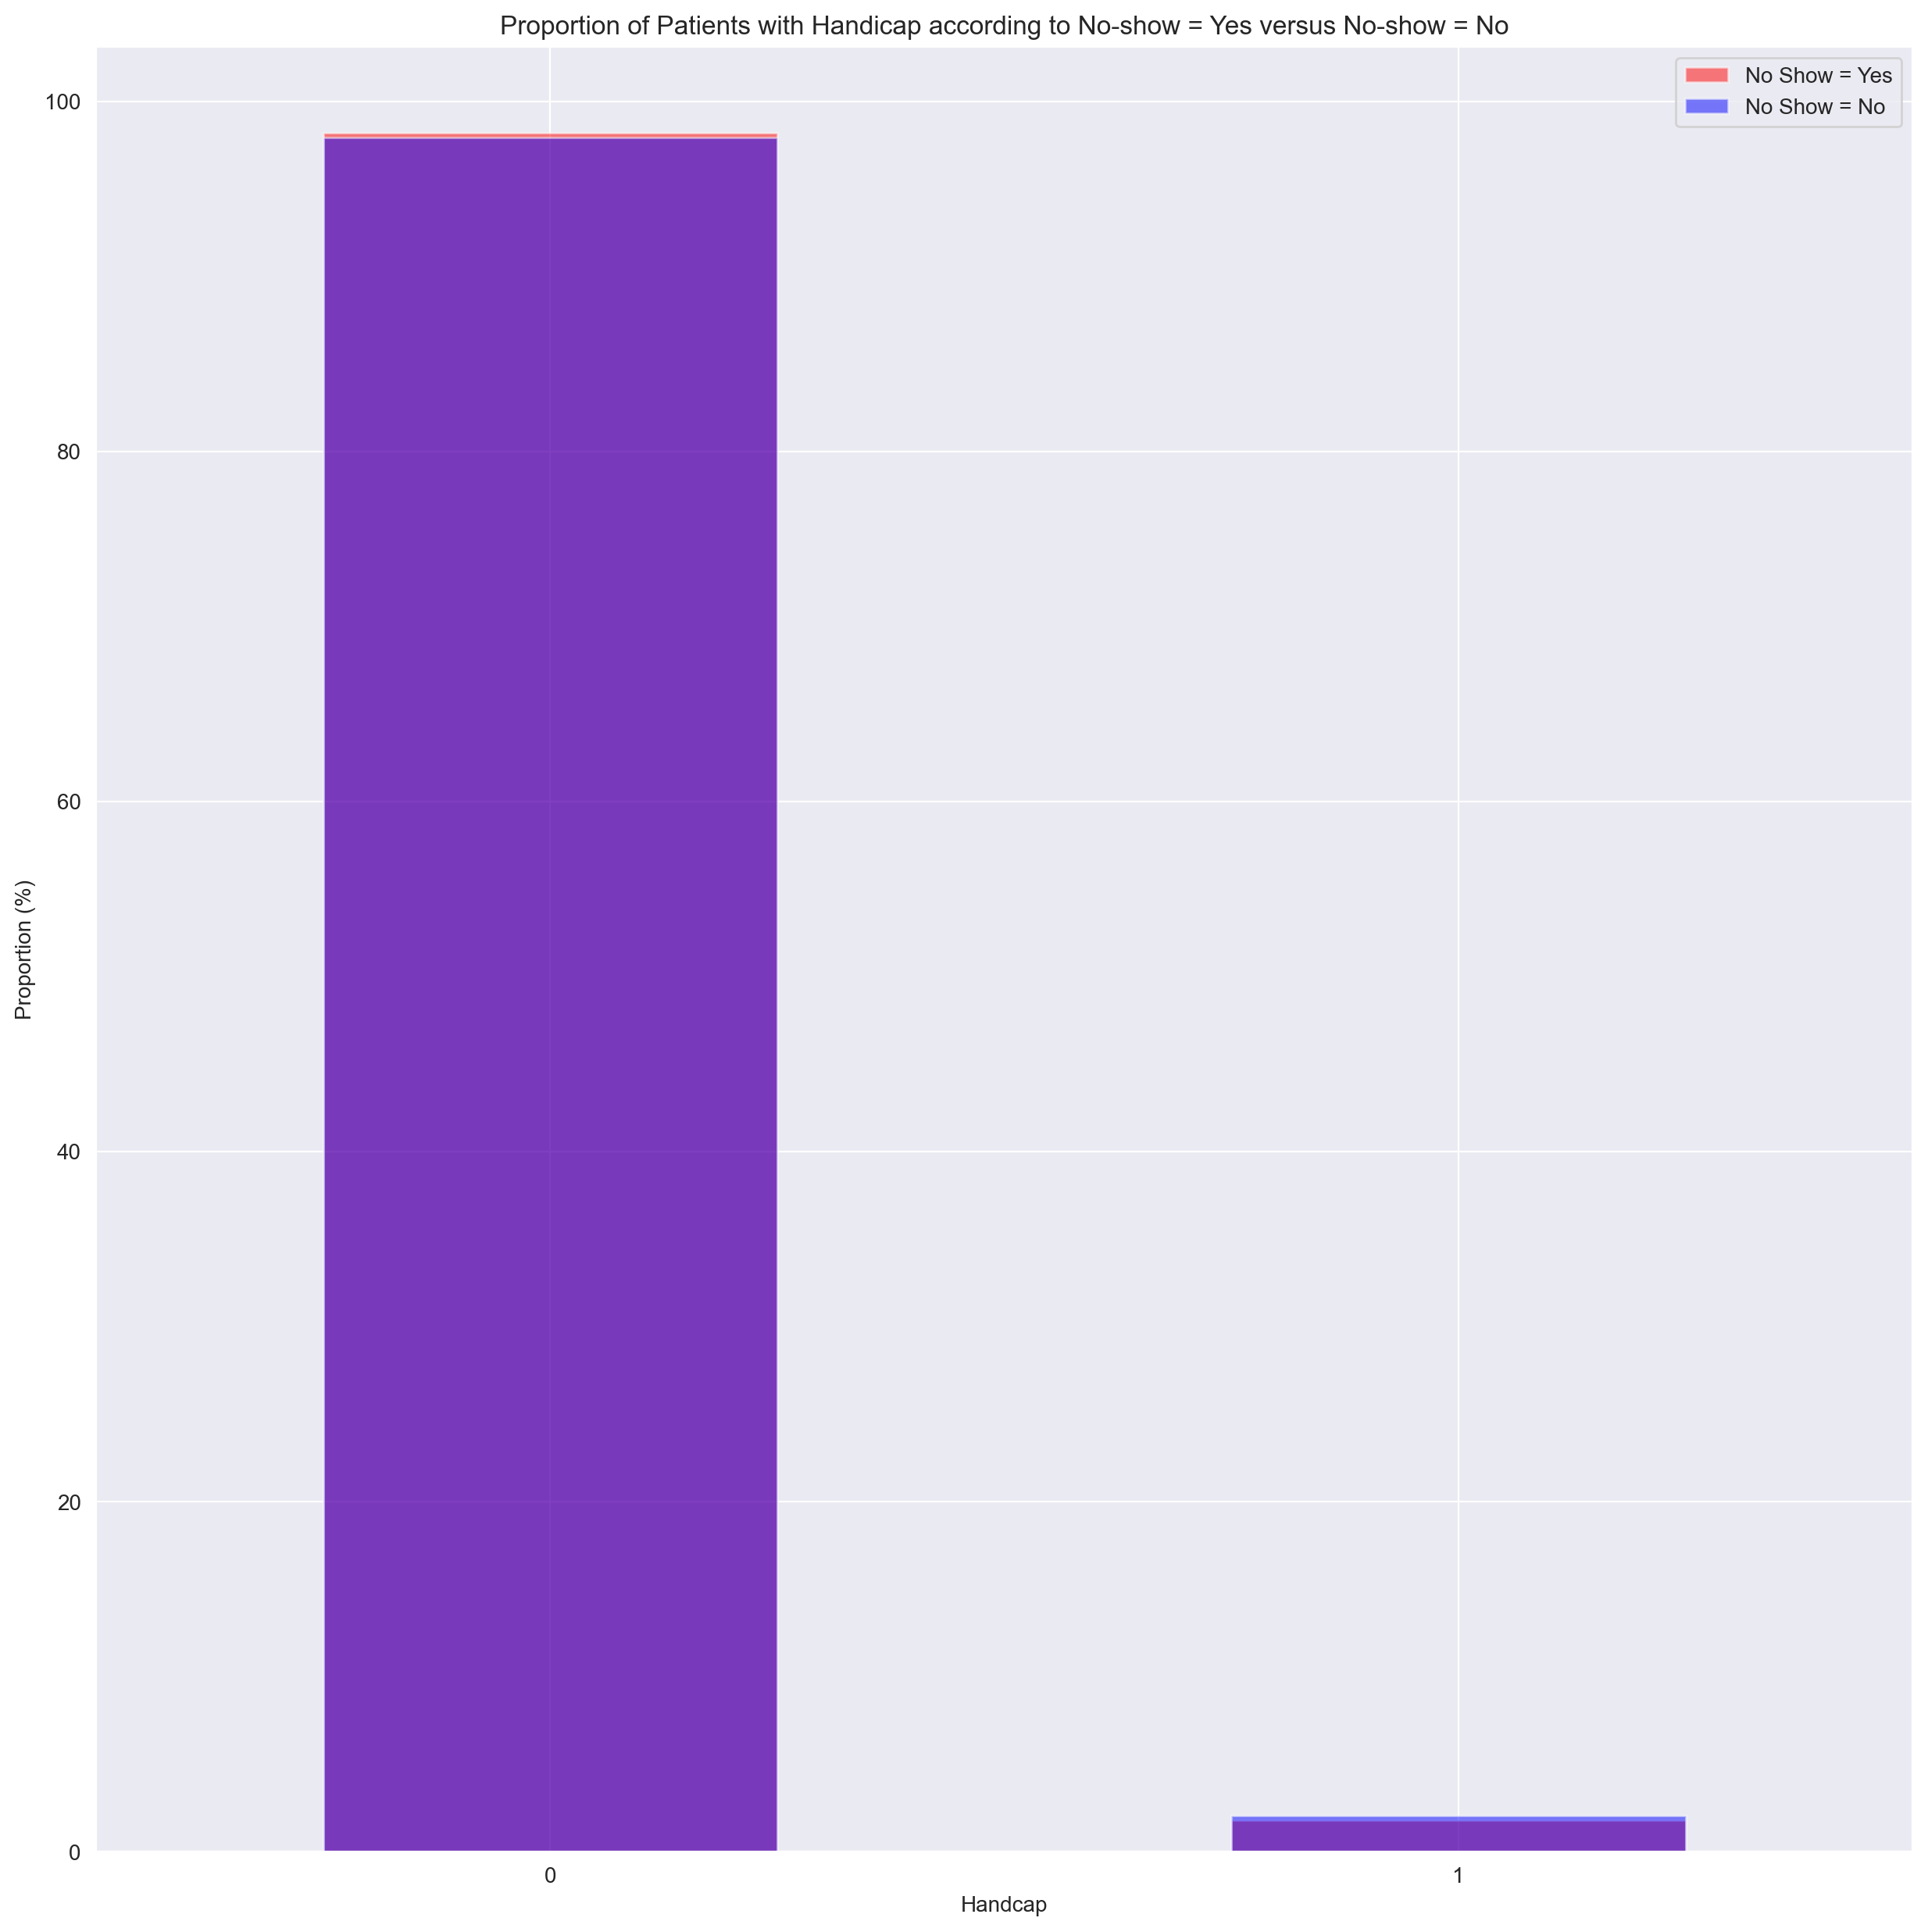

In [24]:
(100 * initial_df["Handcap"].value_counts()/ initial_df["Handcap"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "Population", color = "green", figsize=(15, 15))
plt.title("Proportion of Patients with Handicap in the Population")
plt.xlabel("Handcap")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()


(100 * initial_df[initial_df["No-show"]=="Yes"]["Handcap"].value_counts()/ initial_df[initial_df["No-show"]=="Yes"]["Handcap"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, label = "No Show = Yes", color = "red")
(100 * initial_df[initial_df["No-show"]=="No"]["Handcap"].value_counts()/ initial_df[initial_df["No-show"]=="No"]["Handcap"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "No Show = No", color = "blue", figsize=(15, 15))
plt.title("Proportion of Patients with Handicap according to No-show = Yes versus No-show = No")
plt.xlabel("Handcap")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()

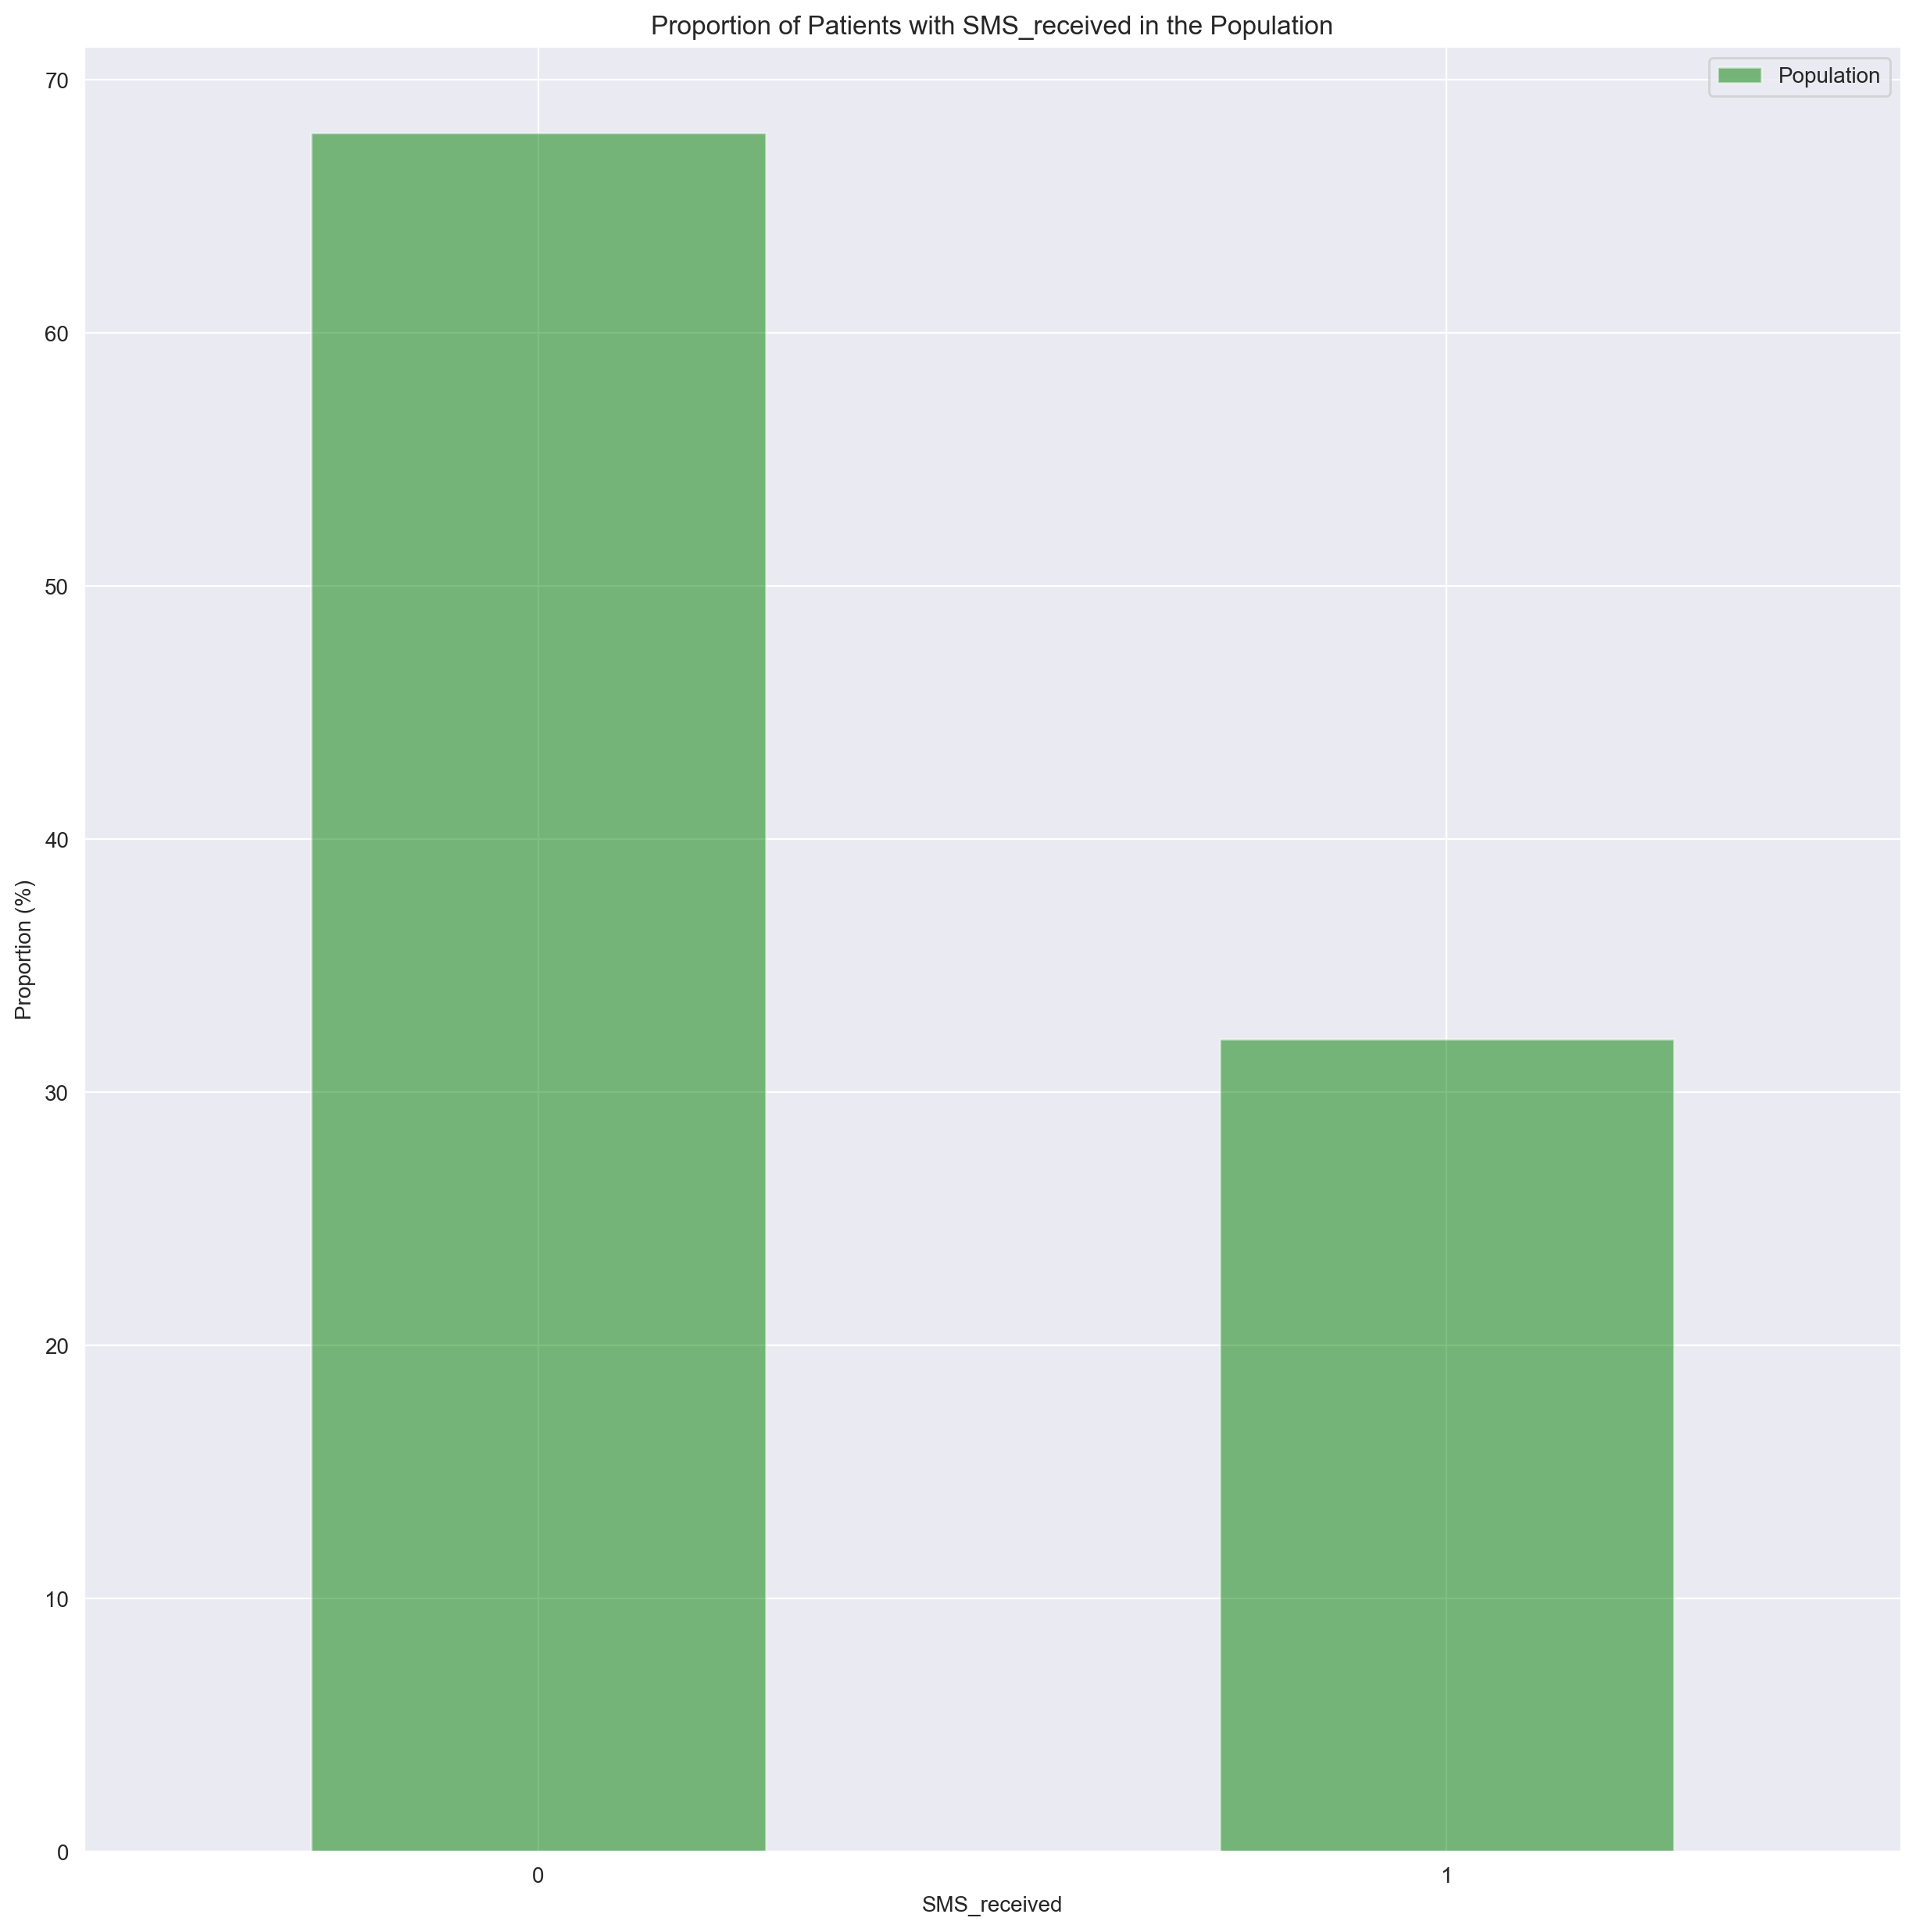

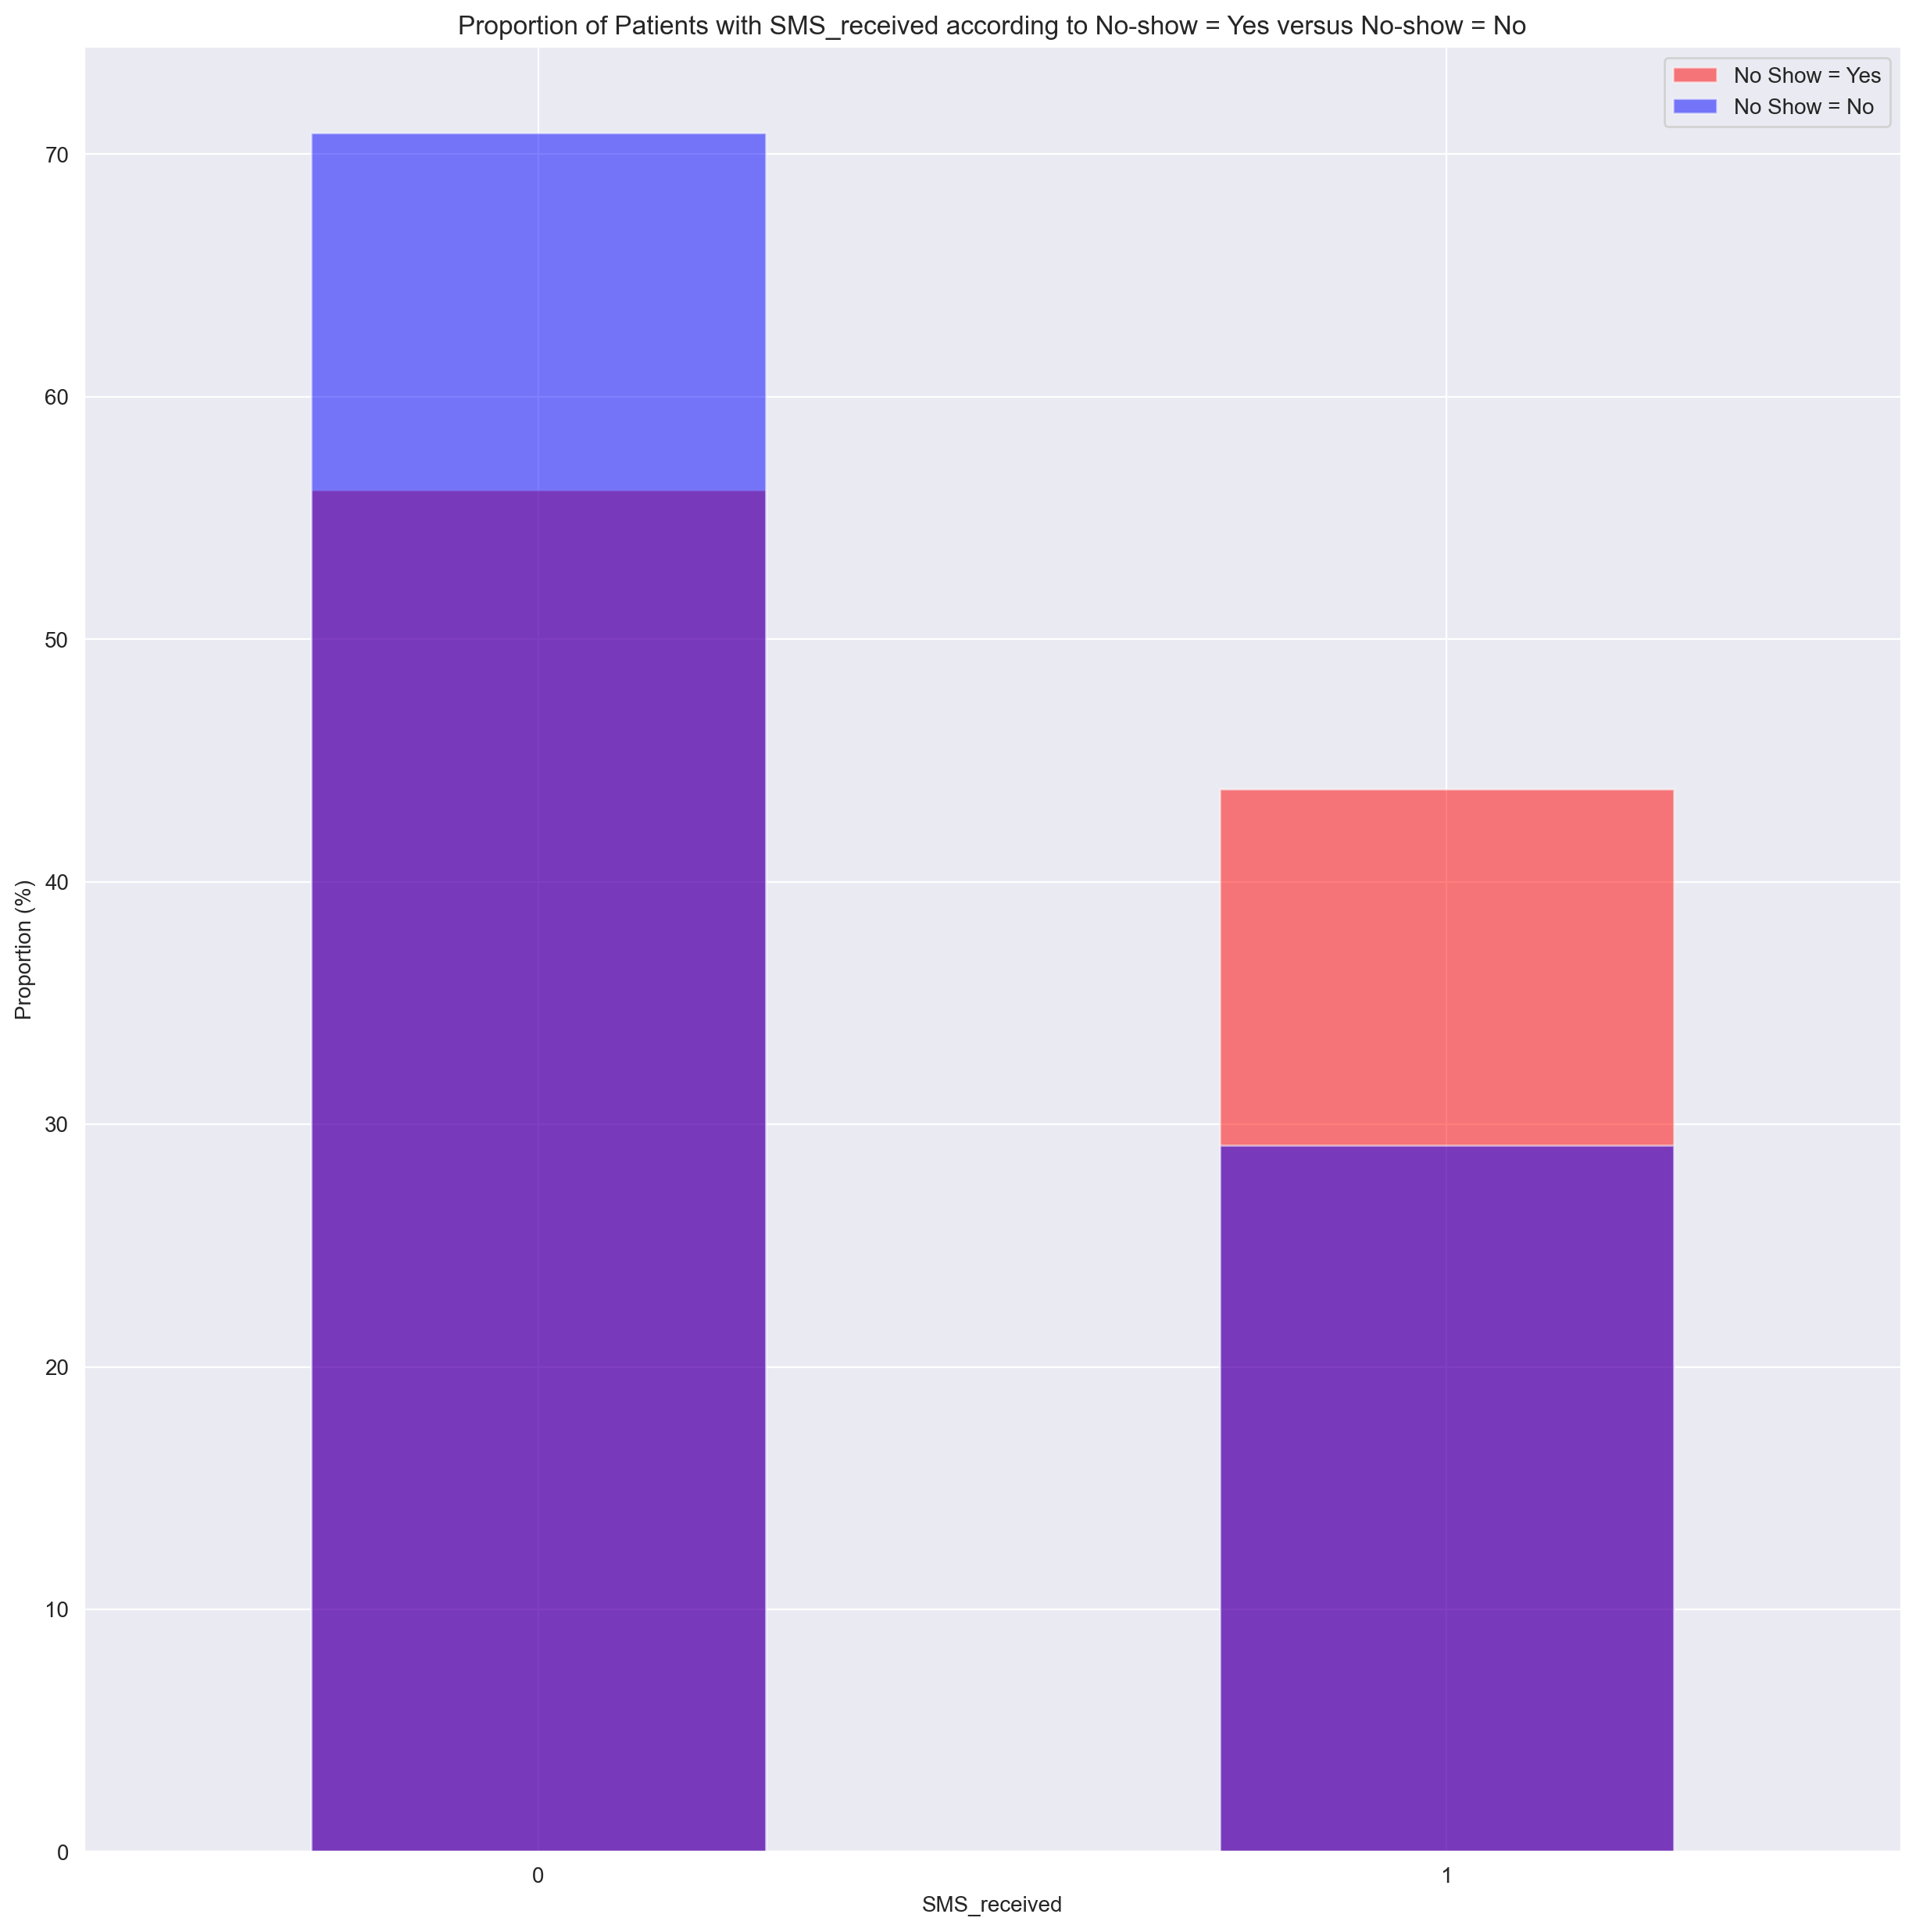

In [25]:
(100 * initial_df["SMS_received"].value_counts()/ initial_df["SMS_received"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "Population", color = "green", figsize=(15, 15))
plt.title("Proportion of Patients with SMS_received in the Population")
plt.xlabel("SMS_received")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()


(100 * initial_df[initial_df["No-show"]=="Yes"]["SMS_received"].value_counts()/ initial_df[initial_df["No-show"]=="Yes"]["SMS_received"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, label = "No Show = Yes", color = "red")
(100 * initial_df[initial_df["No-show"]=="No"]["SMS_received"].value_counts()/ initial_df[initial_df["No-show"]=="No"]["SMS_received"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "No Show = No", color = "blue", figsize=(15, 15))
plt.title("Proportion of Patients with SMS_received according to No-show = Yes versus No-show = No")
plt.xlabel("SMS_received")
plt.ylabel("Proportion (%)")
plt.legend()
plt.show()

In [26]:
from scipy.stats import chi2_contingency
  
# defining the table
focus_variables = pd.crosstab(initial_df["SMS_received"], initial_df["No-show-codes"], margins=True)

# performing the chi-squared analysis
stat, p, dof, expected = chi2_contingency(np.array([focus_variables.iloc[0][:4].values, focus_variables.iloc[1][:4].values]))
  
# interpret p-value
alpha = 0.05
print(f"p value is {str(p)}\n")
if p <= alpha:
    print('\nThere is a statistically significant relationship between the two variables (reject H0)')
else:
    print('\nThere is no statistically significant relationship between the two variables (H0 holds true)')

p value is 0.0


There is a statistically significant relationship between the two variables (reject H0)


In [27]:
display(list(np.where(initial_df["SMS_received"] == 0, 2, 1))[:25])
display(list(initial_df["SMS_received"])[:25])

display(pd.crosstab(initial_df["SMS_received"], initial_df["No-show-codes"], margins=True))

test = pd.crosstab(initial_df["SMS_received"], initial_df["No-show-codes"], margins=True)

stat, p, dof, expected = chi2_contingency(np.array([test.iloc[0][:4].values, test.iloc[1][:4].values]))

display(f"{p:.2f}")

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]

No-show-codes      0      1     All
SMS_received                       
0              62510  12535   75045
1              25698   9784   35482
All            88208  22319  110527

'0.00'

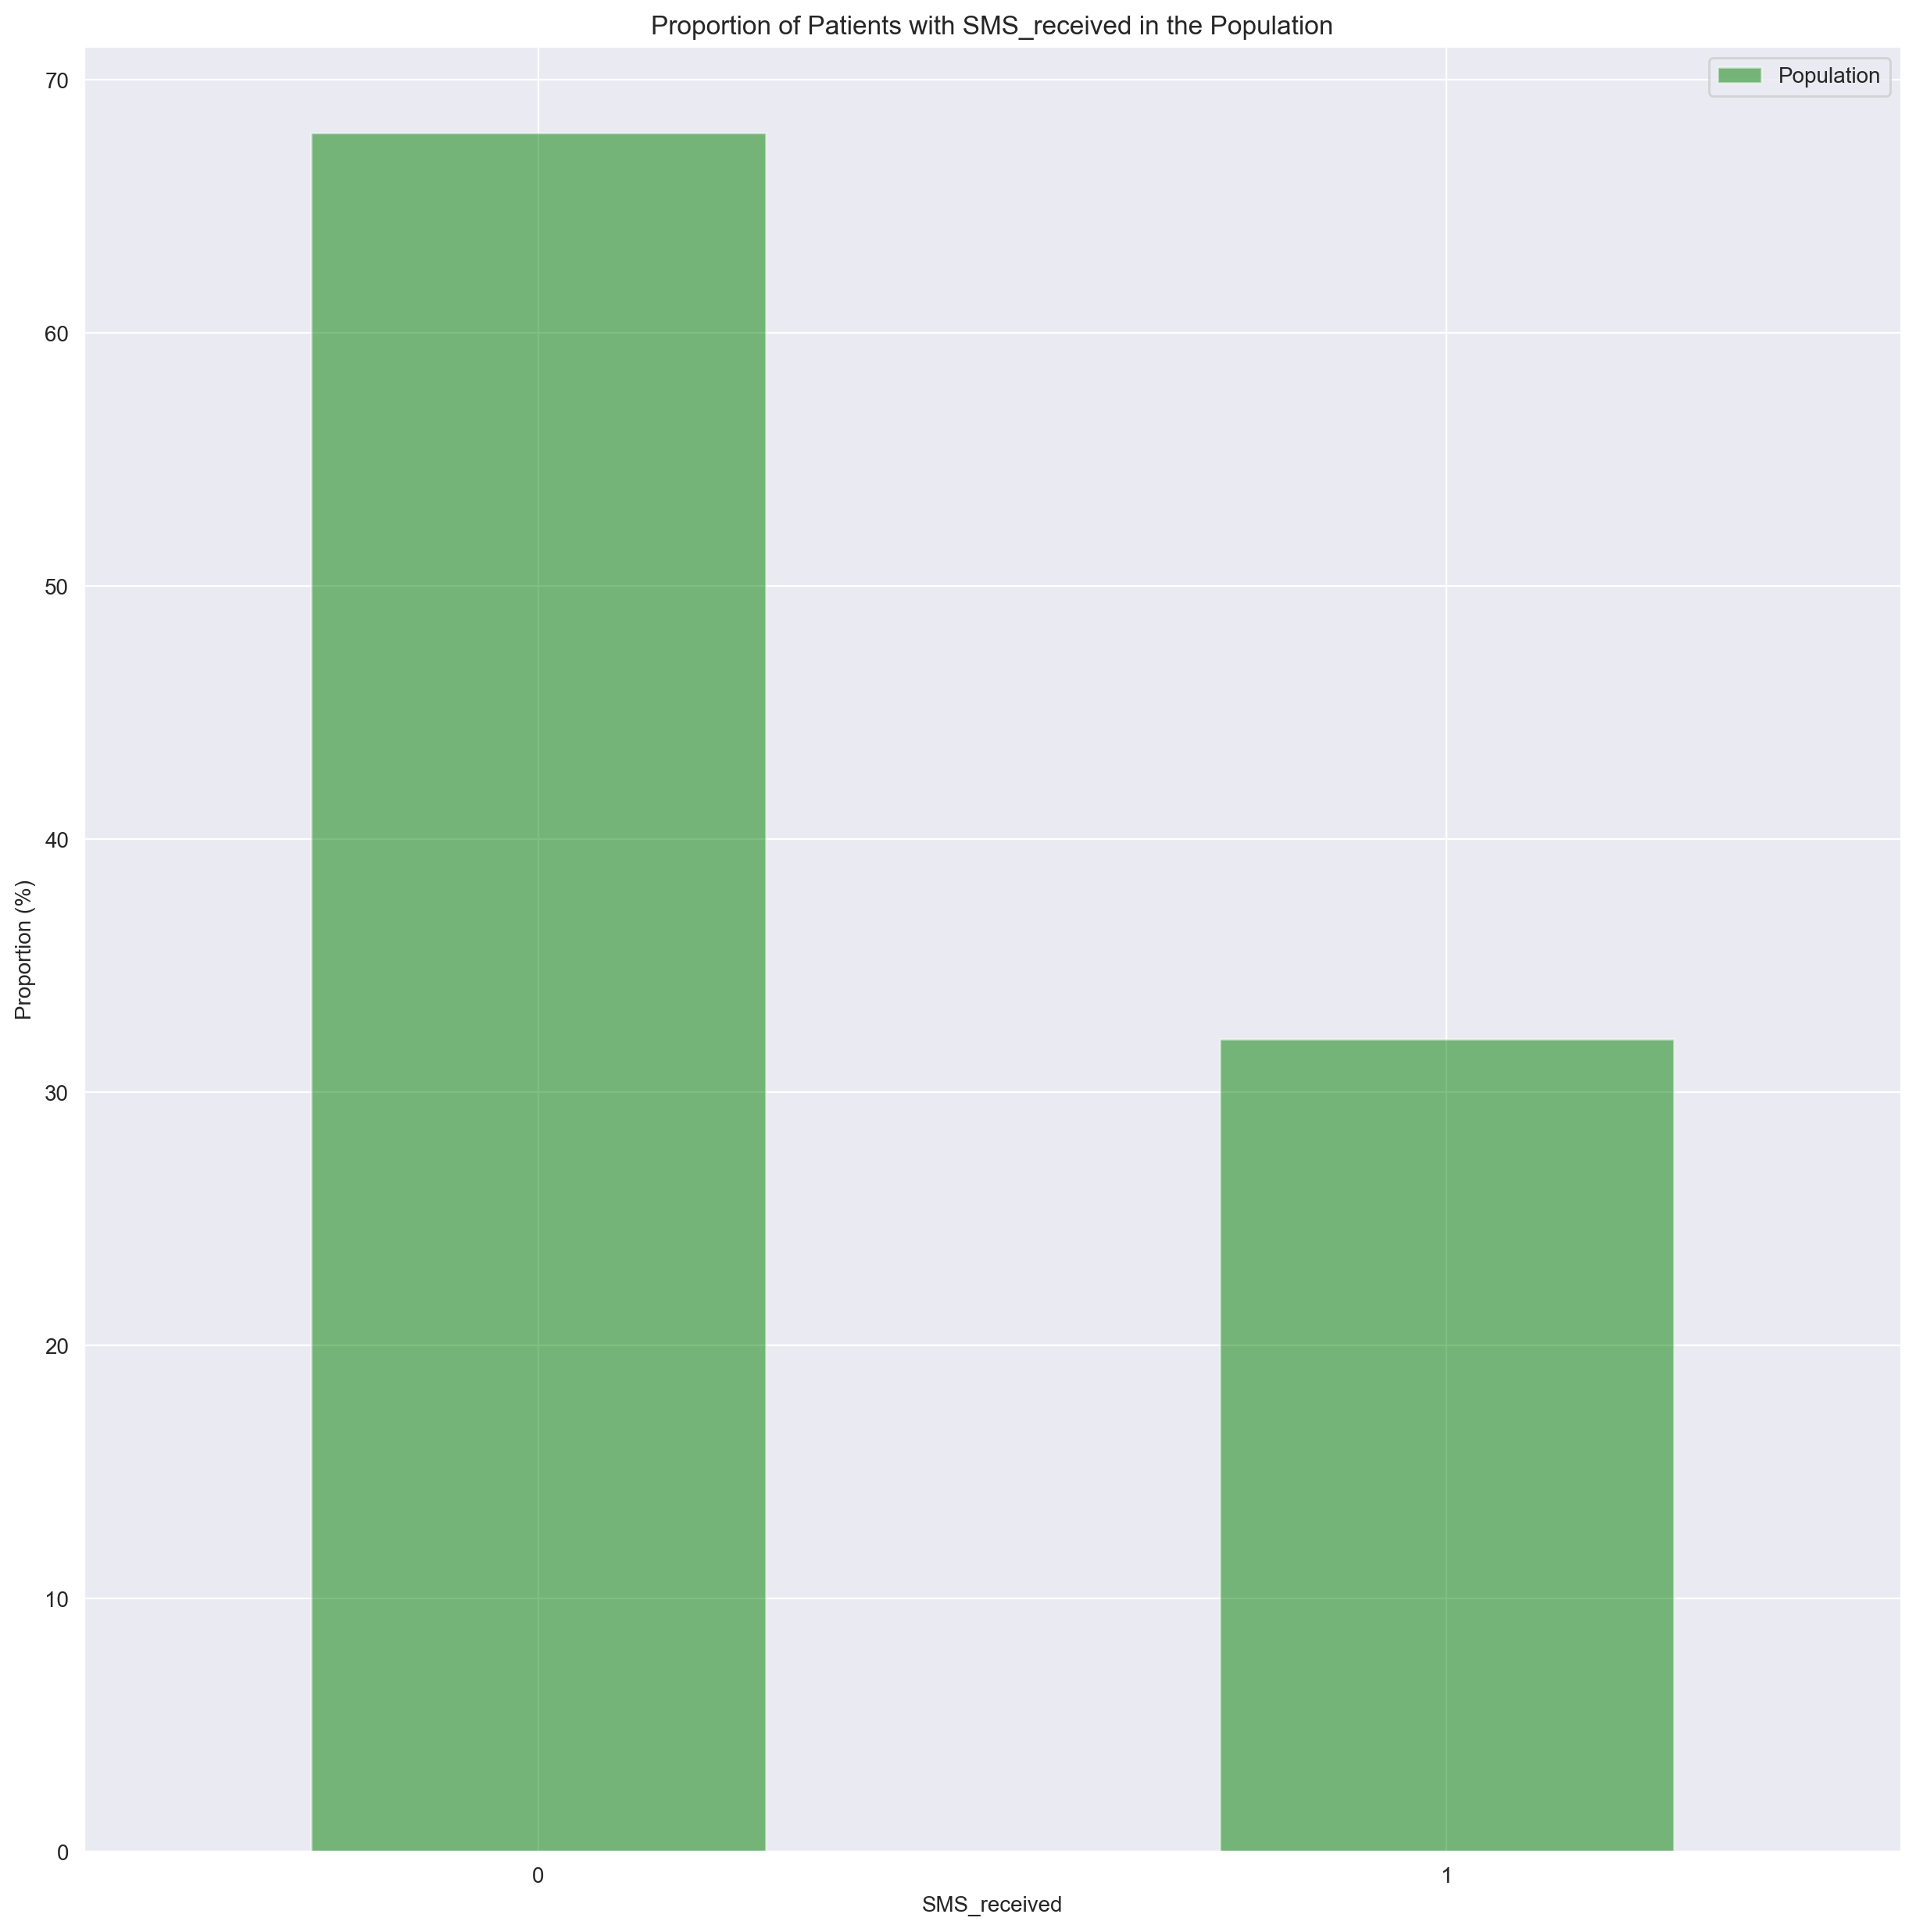

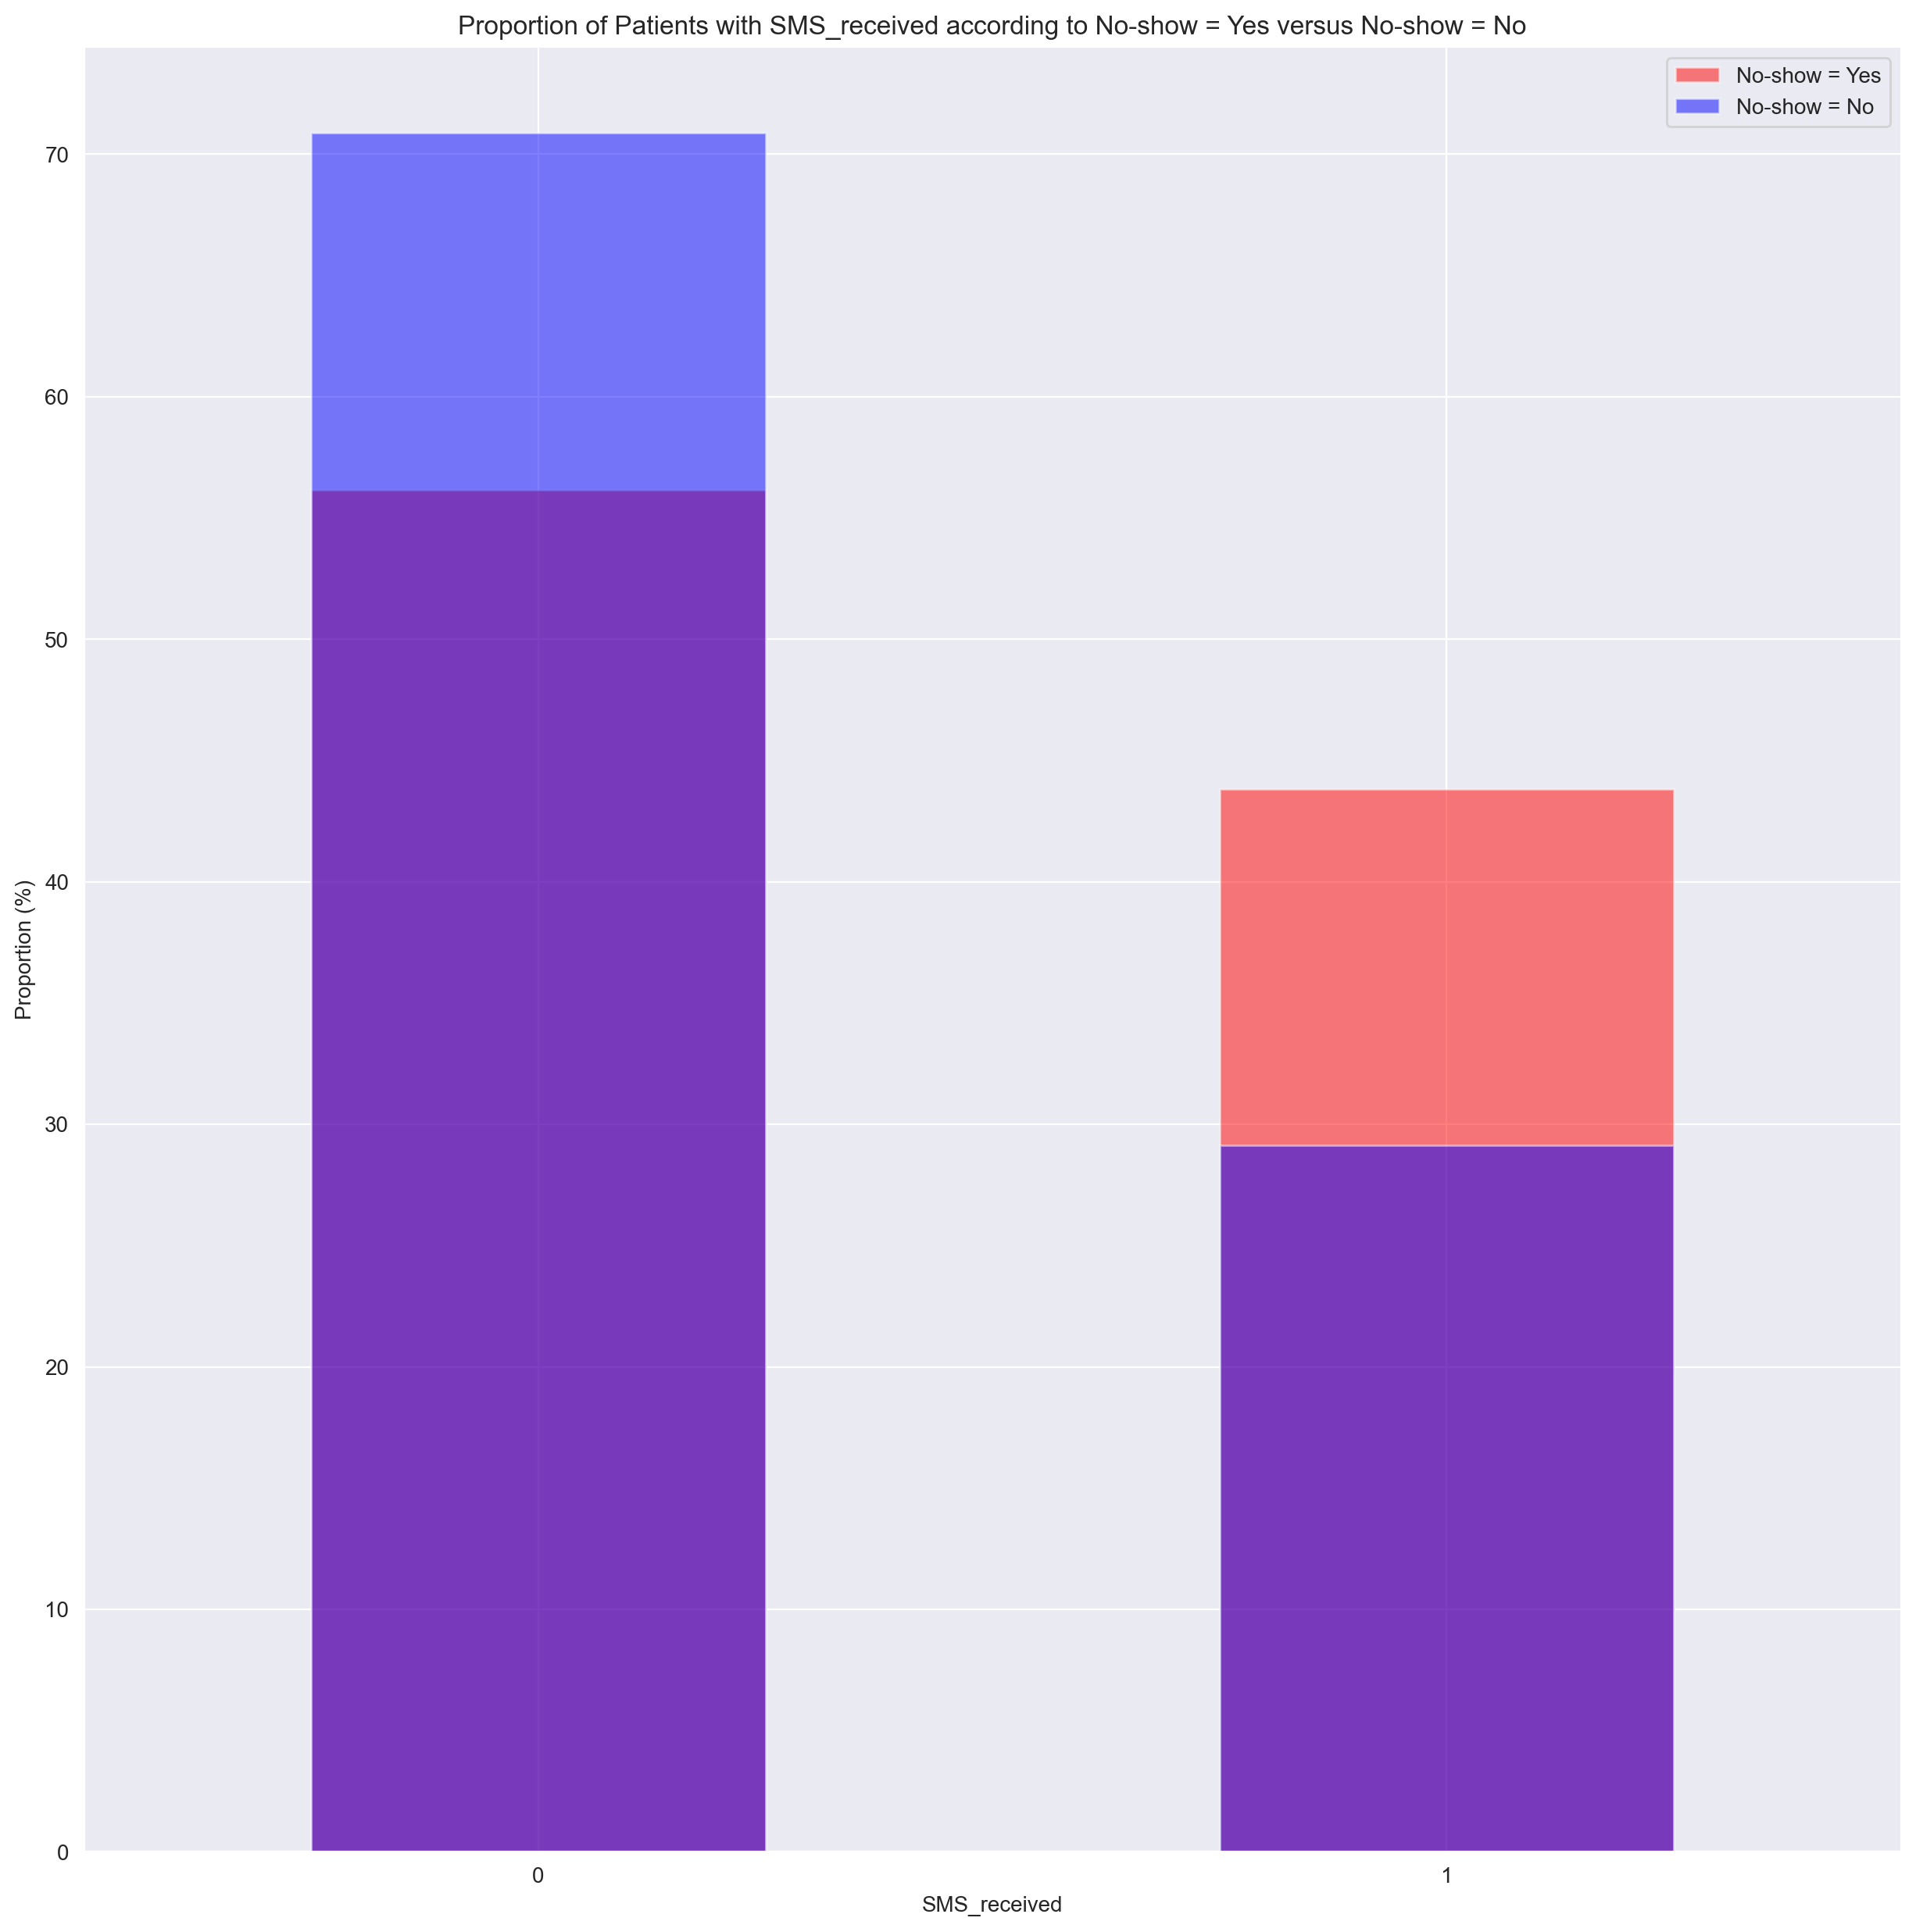

In [28]:
# defining barchart plot function

# def compare_barchart_plot(dframe: pd.DataFrame, base_title: str, compare_title: str, xlabel: str, ylabel: str, dependent_variable_of_interest: str, independent_variable: str = "No-show"):
    
#     def format_compare_barchart(chart_title: str):
#         plt.title(chart_title)
#         plt.xlabel(xlabel)
#         plt.ylabel(ylabel)
#         plt.legend()
#         plt.show()
    
#     (100 * dframe[dependent_variable_of_interest].value_counts()/ dframe[dependent_variable_of_interest].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "Population", color = "green", figsize=(15, 15))
#     format_compare_barchart(base_title)
    
#     (100 * dframe[dframe[independent_variable]=="Yes"][dependent_variable_of_interest].value_counts()/ dframe[dframe[independent_variable]=="Yes"][dependent_variable_of_interest].value_counts().sum()).plot(kind = "bar", alpha = 0.5, label = f"{independent_variable} = Yes", color = "red")
#     (100 * dframe[dframe[independent_variable]=="No"][dependent_variable_of_interest].value_counts()/ dframe[dframe[independent_variable]=="No"][dependent_variable_of_interest].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = f"{independent_variable} = No", color = "blue", figsize=(15, 15))
#     format_compare_barchart(compare_title)

    # test

compare_barchart_plot(initial_df, "Proportion of Patients with SMS_received in the Population", "Proportion of Patients with SMS_received according to No-show = Yes versus No-show = No", "SMS_received", "Proportion (%)", "SMS_received")


# (100 * initial_df["SMS_received"].value_counts()/ initial_df["SMS_received"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "Population", color = "green", figsize=(15, 15))
# plt.title("Proportion of Patients with SMS_received in the Population")
# plt.xlabel("SMS_received")
# plt.ylabel("Proportion (%)")
# plt.legend()
# plt.show()


# (100 * initial_df[initial_df["No-show"]=="Yes"]["SMS_received"].value_counts()/ initial_df[initial_df["No-show"]=="Yes"]["SMS_received"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, label = "No Show = Yes", color = "red")
# (100 * initial_df[initial_df["No-show"]=="No"]["SMS_received"].value_counts()/ initial_df[initial_df["No-show"]=="No"]["SMS_received"].value_counts().sum()).plot(kind = "bar", alpha = 0.5, rot = 0, label = "No Show = No", color = "blue", figsize=(15, 15))
# plt.title("Proportion of Patients with SMS_received according to No-show = Yes versus No-show = No")
# plt.xlabel("SMS_received")
# plt.ylabel("Proportion (%)")
# plt.legend()
# plt.show()




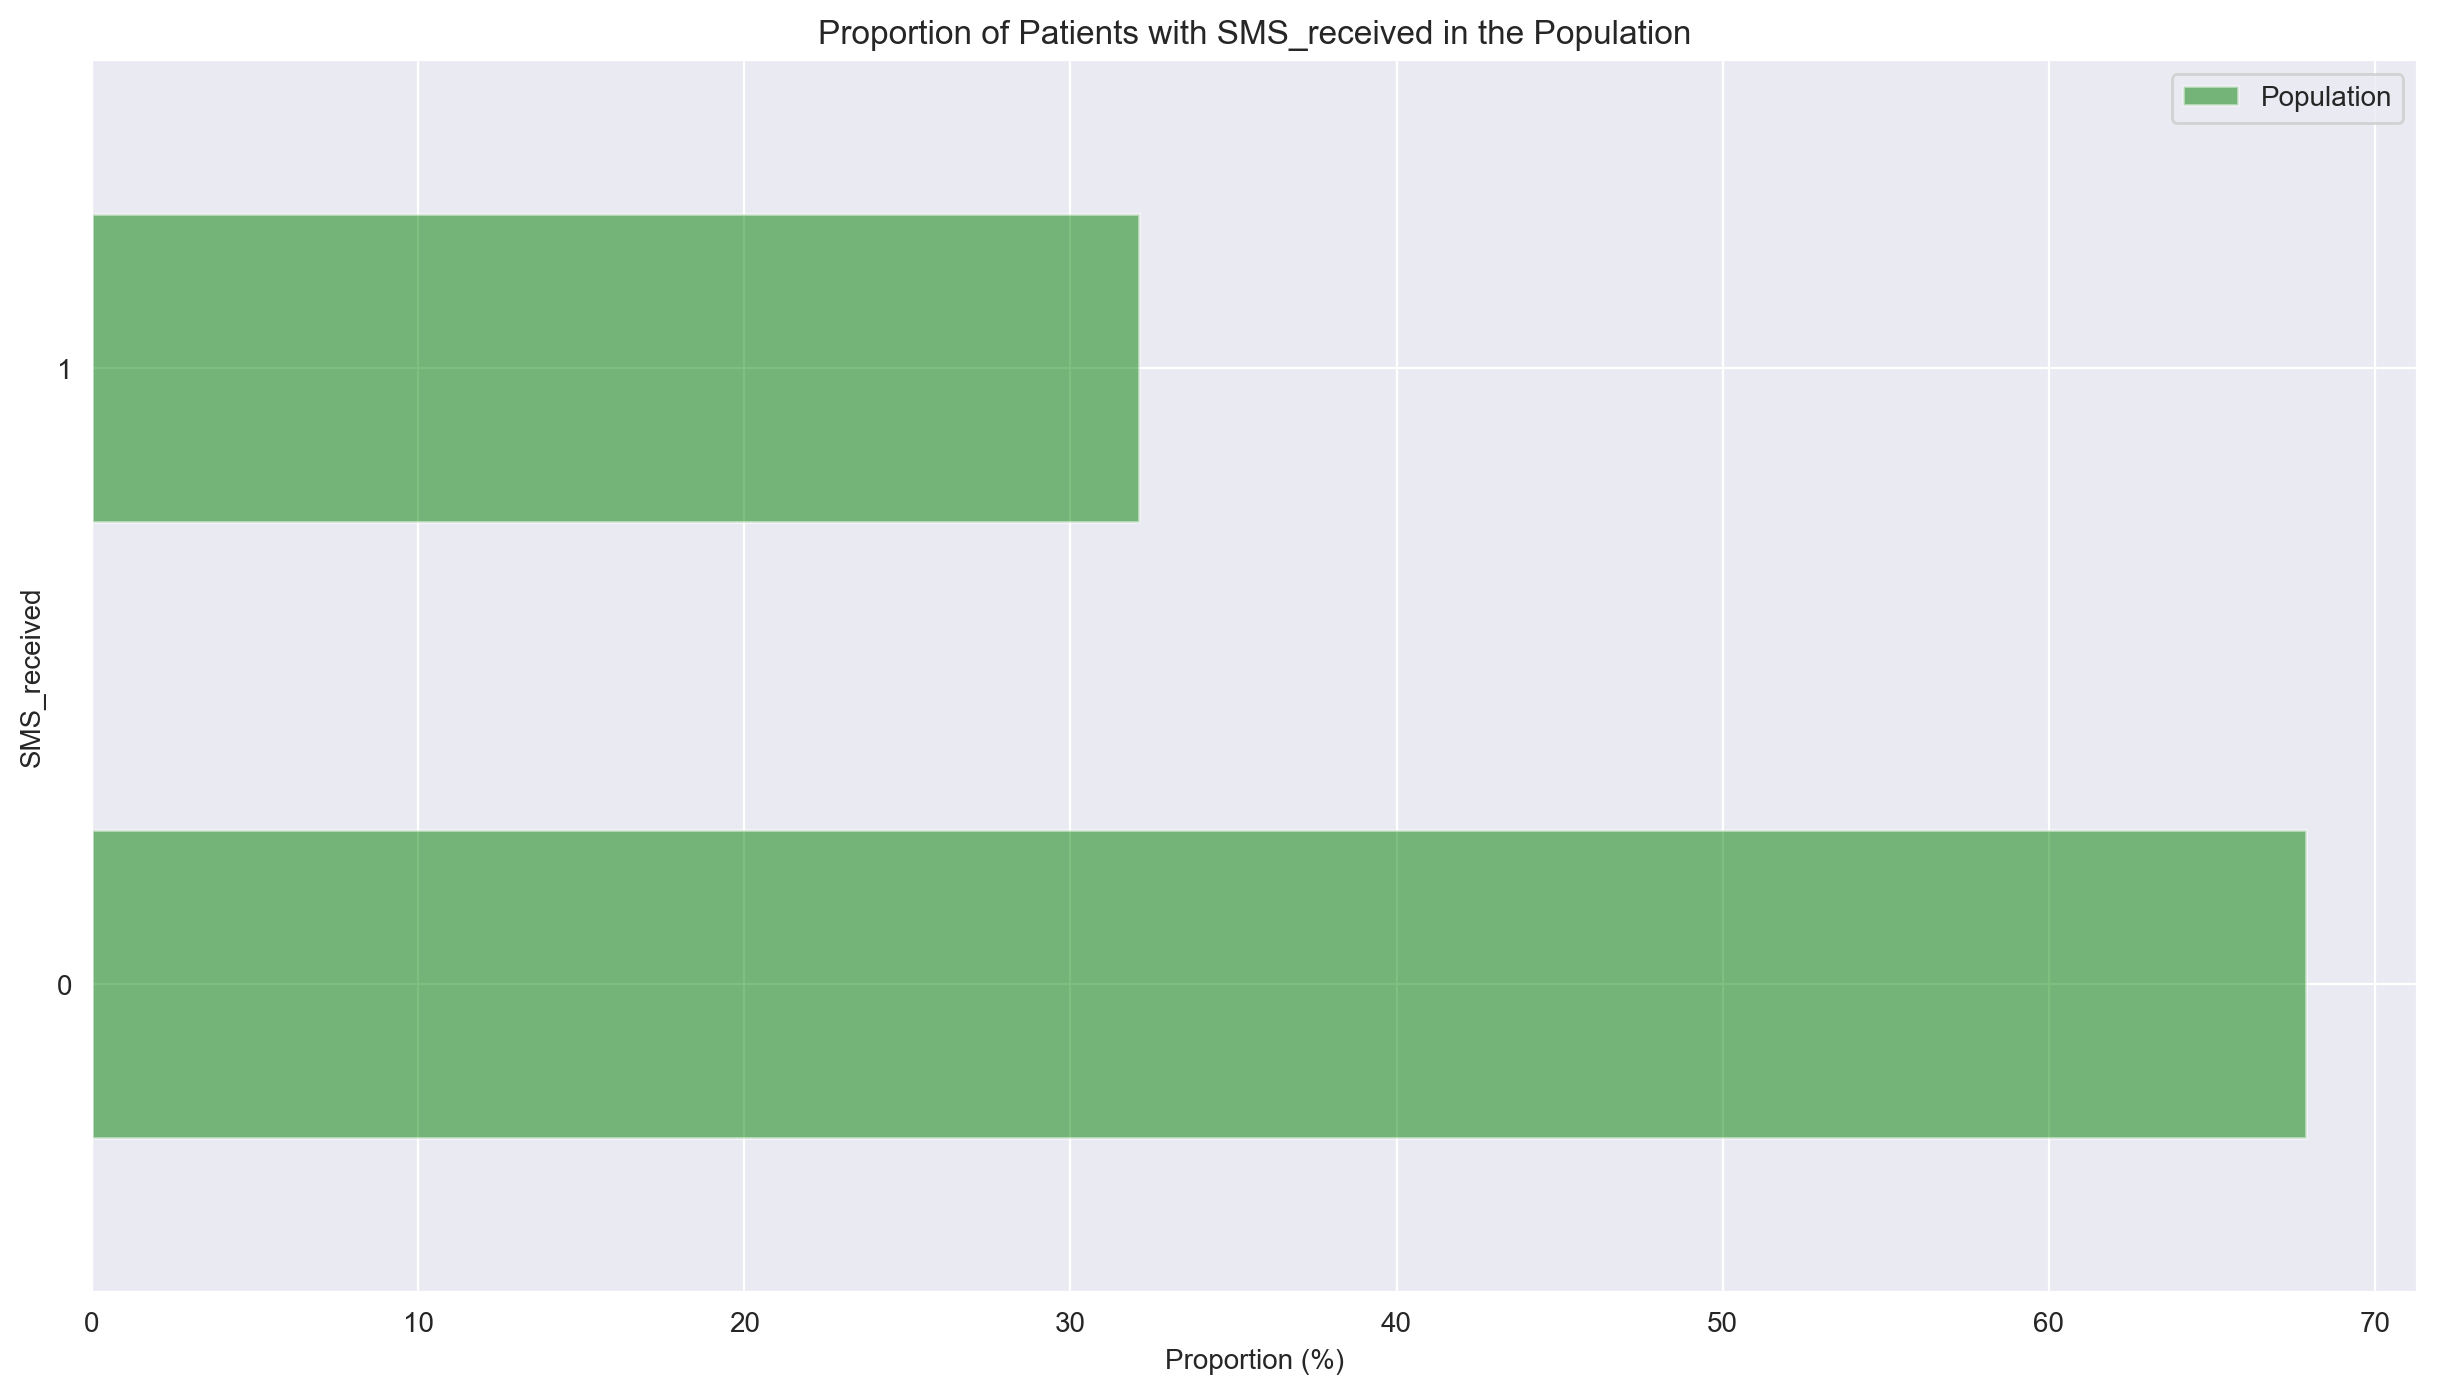

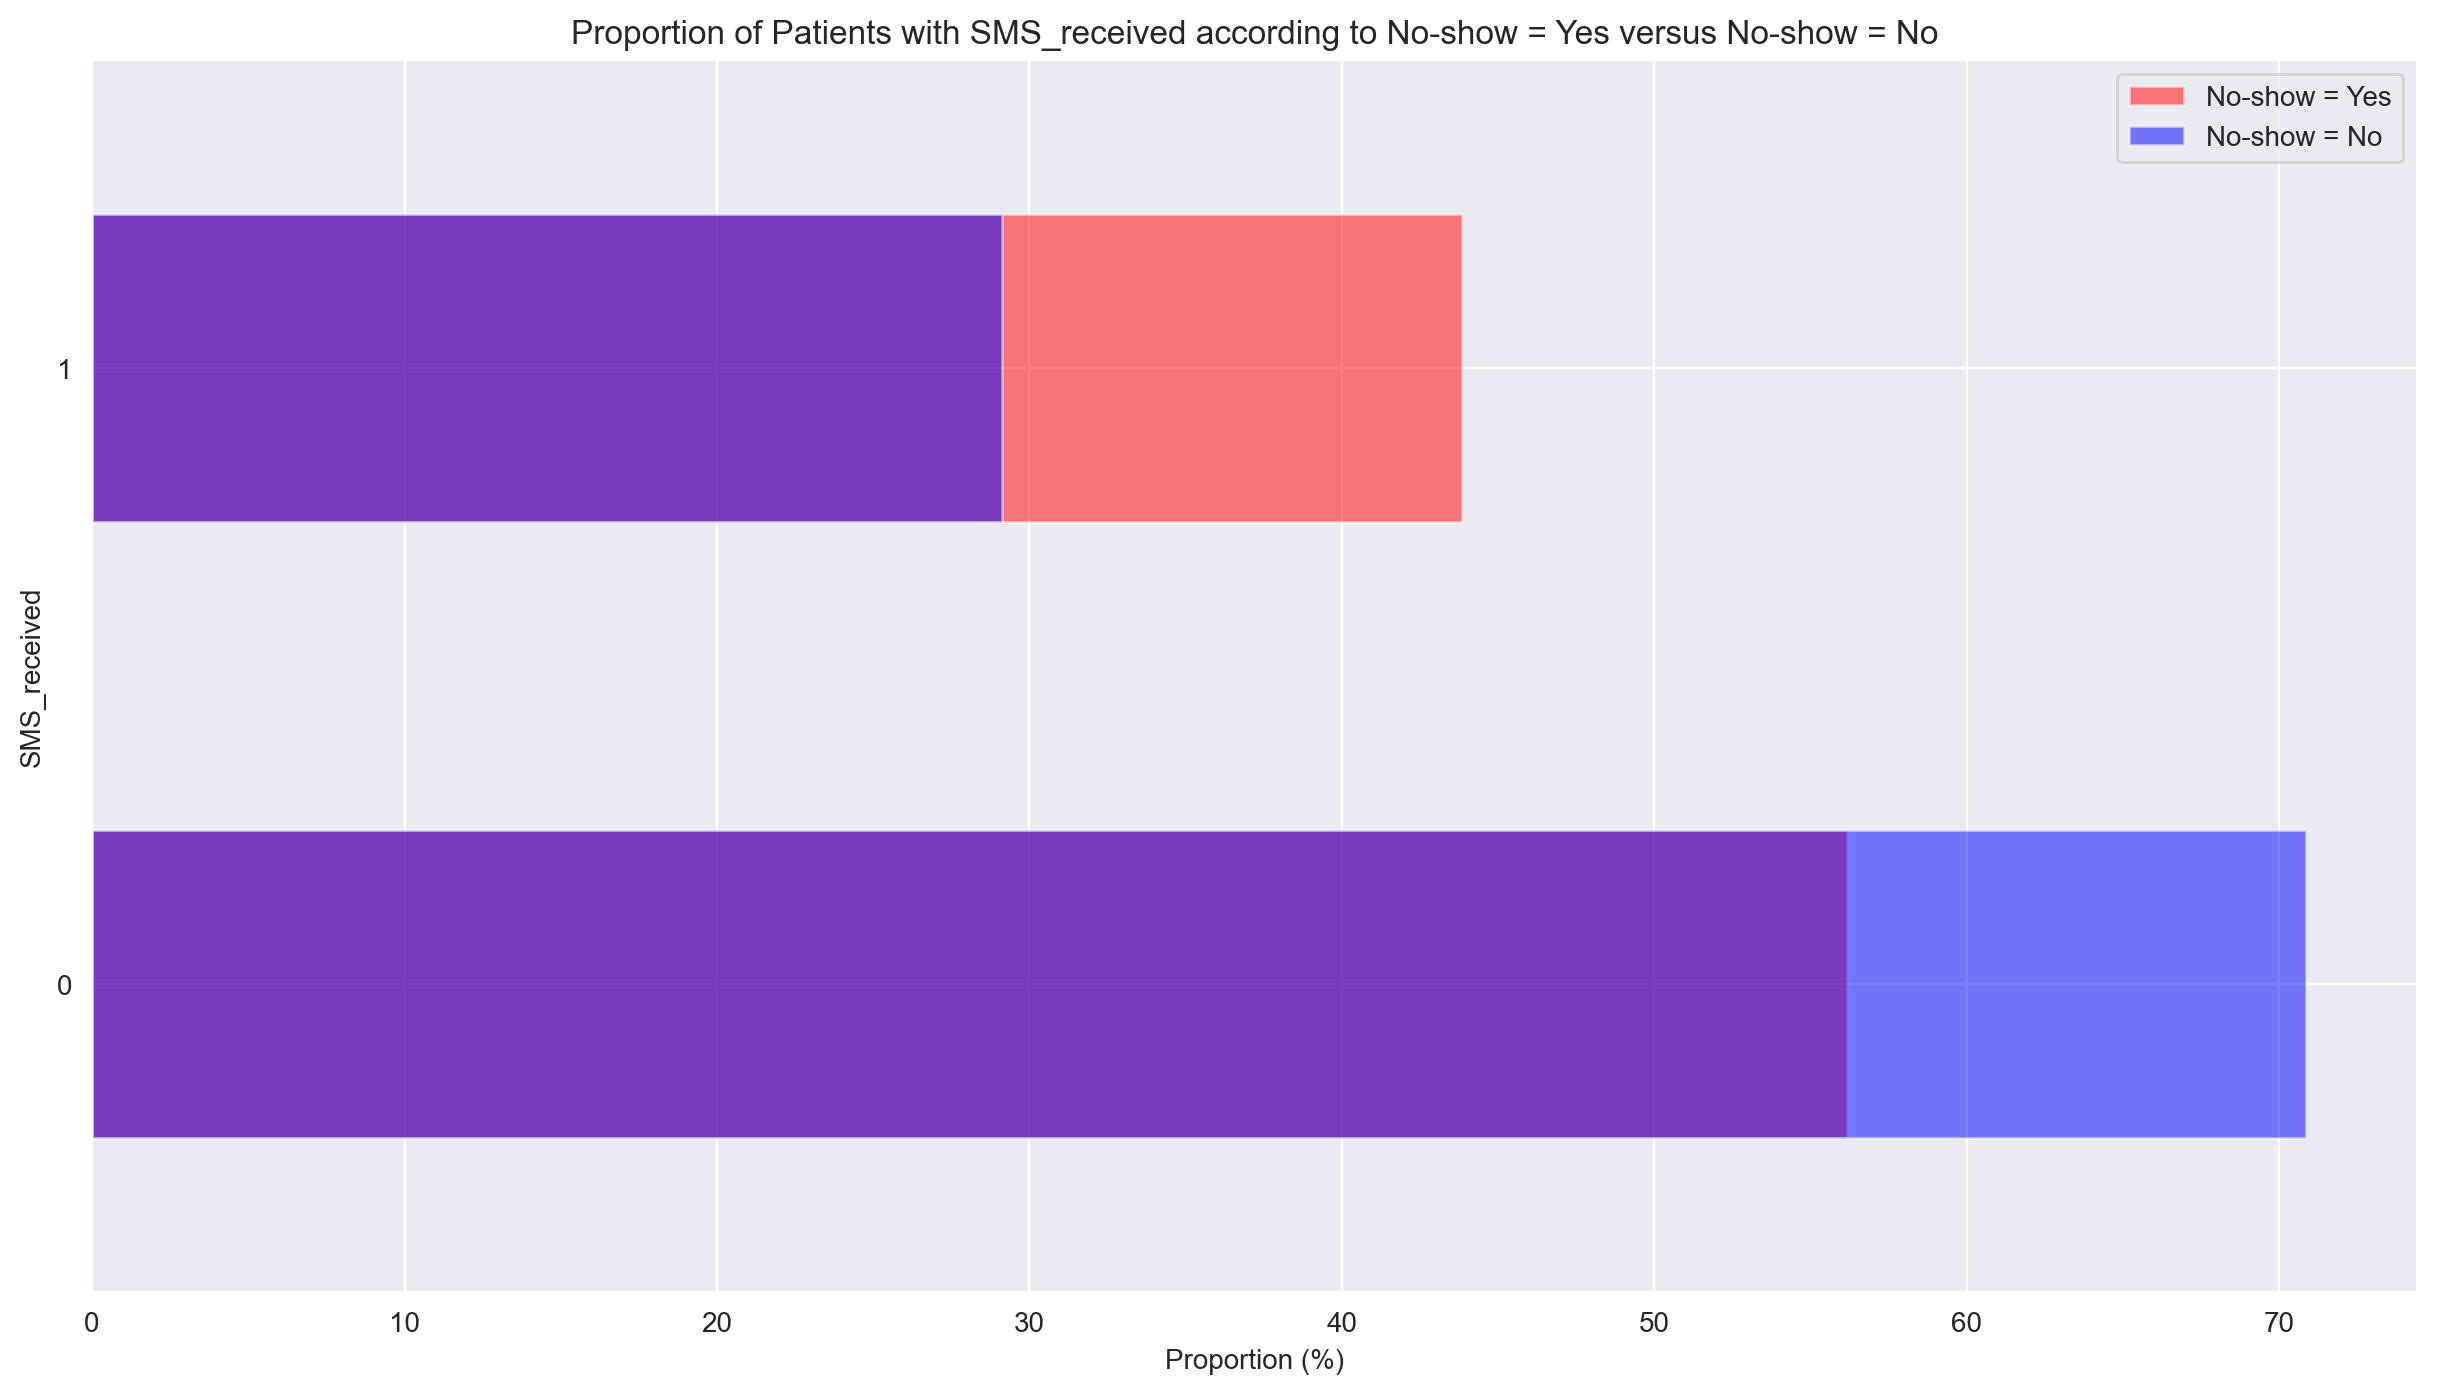

In [29]:
compare_barchart_plot(initial_df, "Proportion of Patients with SMS_received in the Population", "Proportion of Patients with SMS_received according to No-show = Yes versus No-show = No", "Proportion (%)", "SMS_received", "SMS_received", kind="barh", figsize=(15, 8))

In [30]:
# def compare_histogram_plot(dframe: pd.DataFrame, chart_title: str, continuous_dependent_variable_of_interest: str, independent_variable: str = "No-show", bins = 7, figsize=(15, 15)):
#     dframe[continuous_dependent_variable_of_interest].hist(bins = bins, alpha = 0.5, label = "Population", color = "green")
#     dframe[continuous_dependent_variable_of_interest][dframe[independent_variable]=="Yes"].hist(bins = bins, alpha = 0.5, label = f"{independent_variable} = Yes", color = "red")
#     dframe[continuous_dependent_variable_of_interest][dframe[independent_variable]=="No"].hist(bins = bins, alpha = 0.5, label = f"{independent_variable} = No", color = "blue", figsize=figsize)
#     plt.title(chart_title)
#     plt.xlabel(continuous_dependent_variable_of_interest)
#     plt.ylabel("Number of Patients")
#     plt.legend()
#     plt.show()
    
    

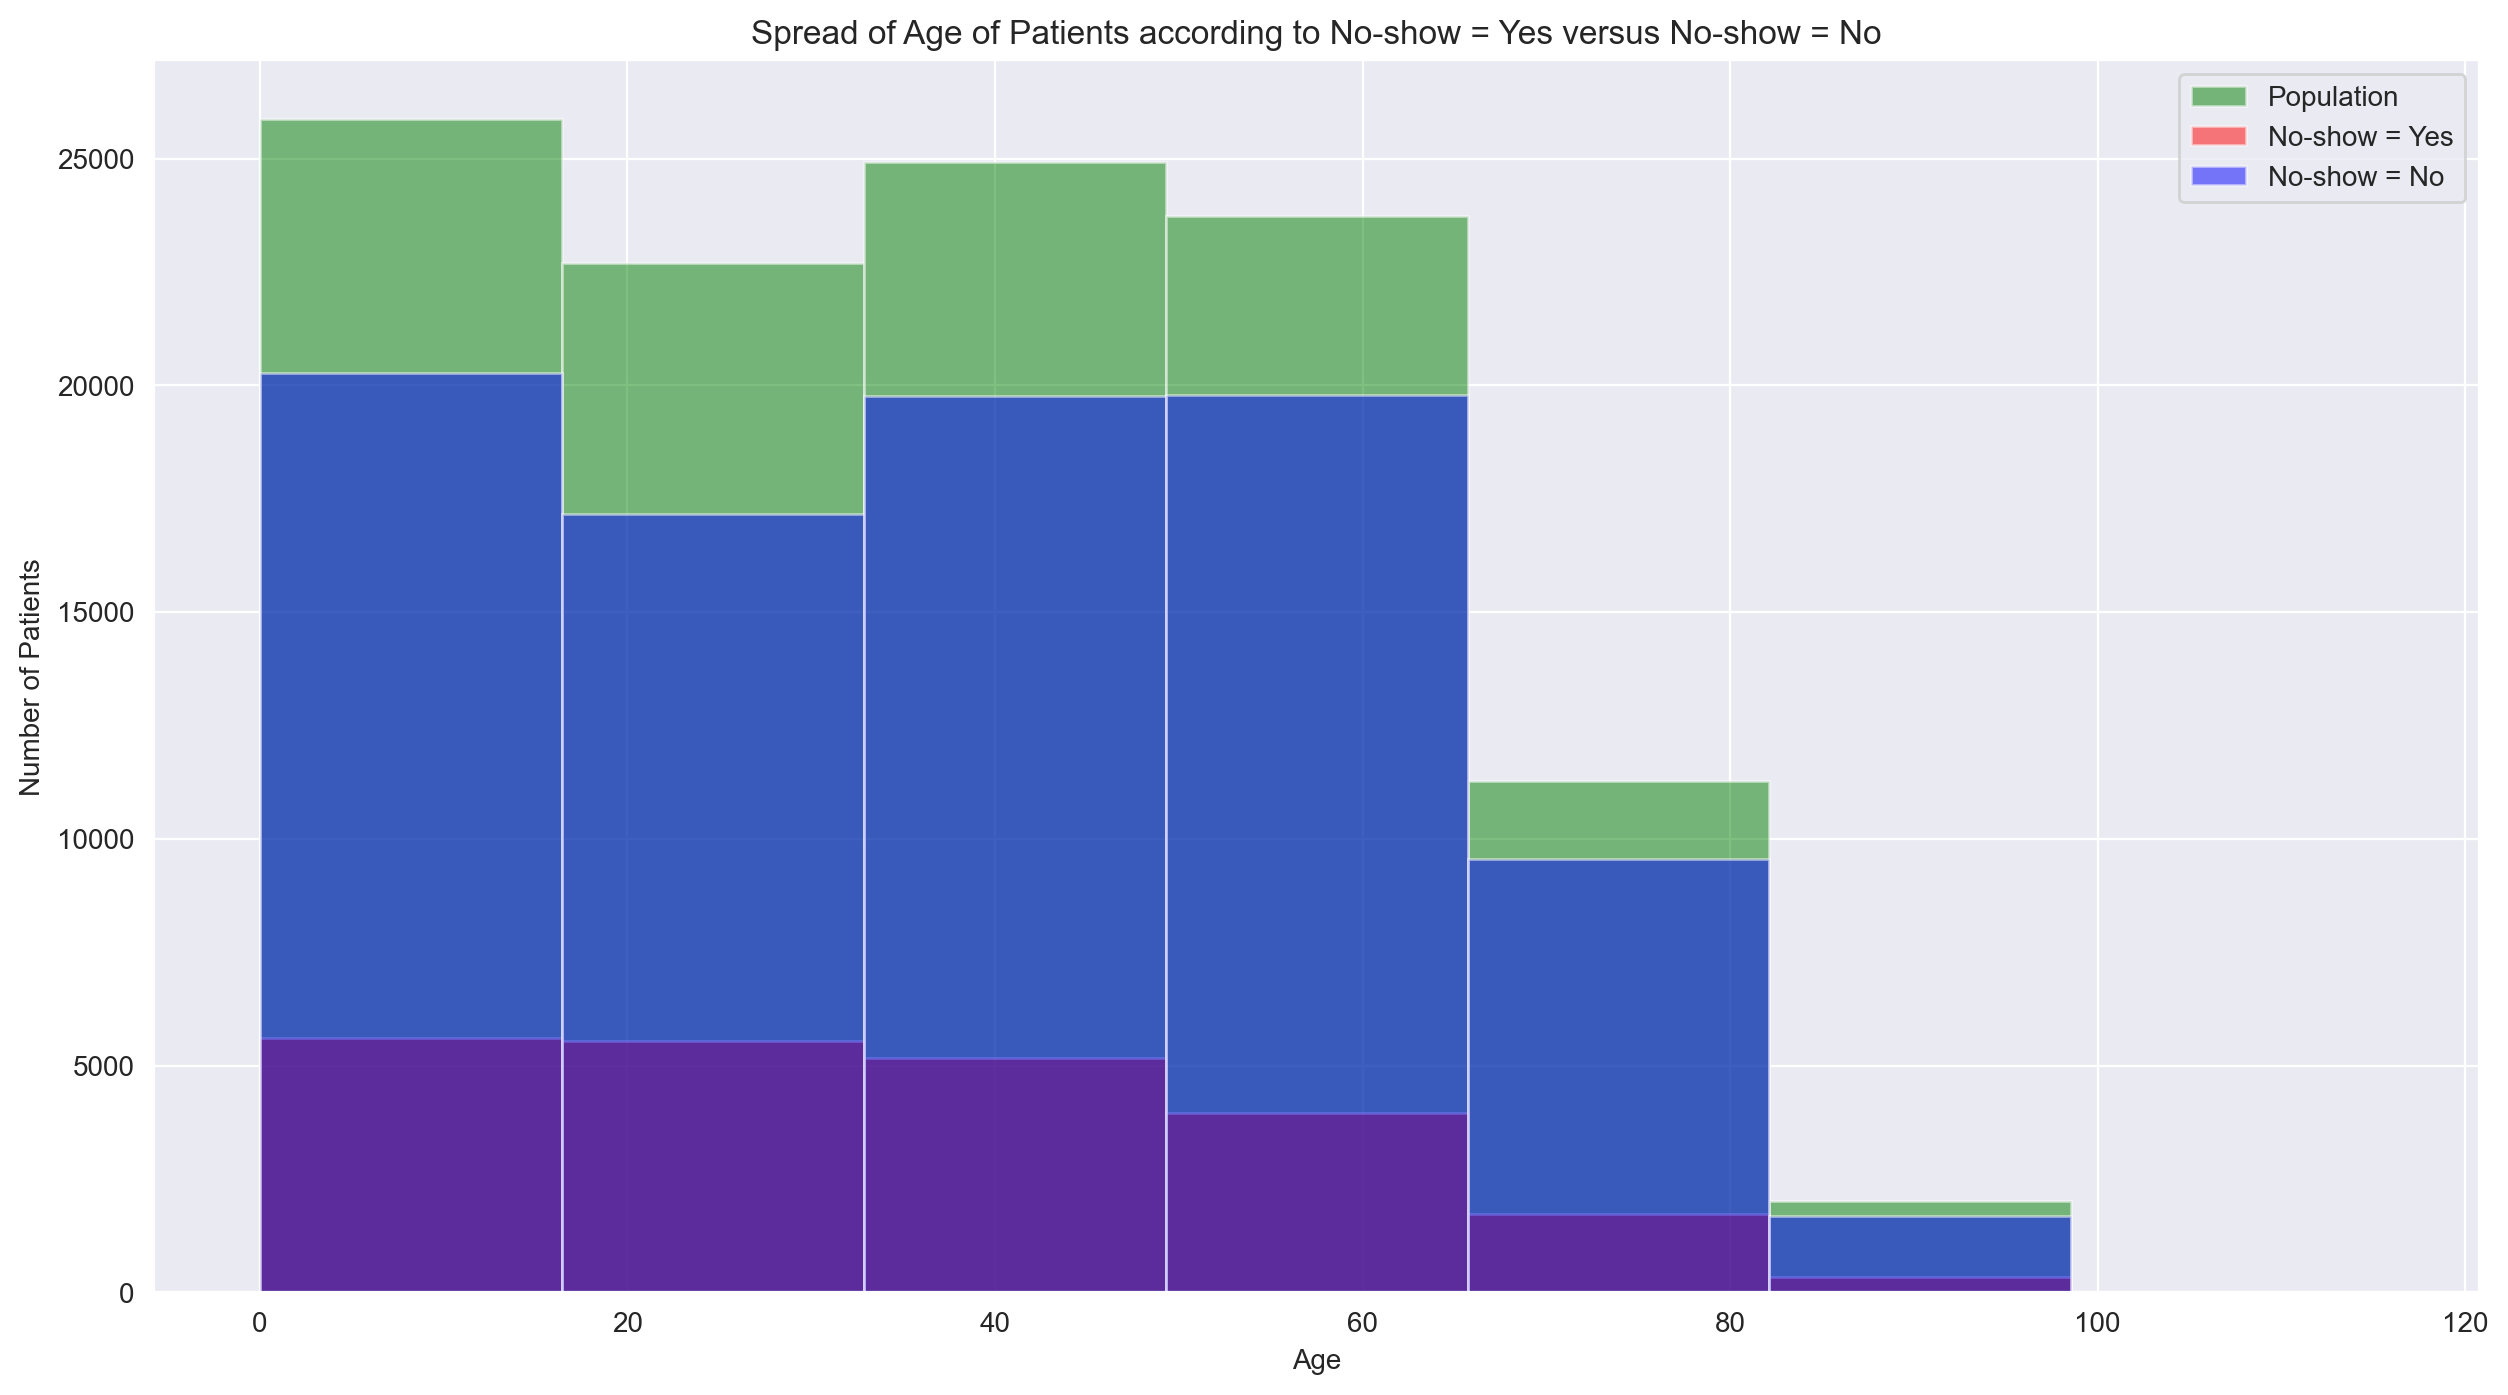

In [31]:
compare_histogram_plot(initial_df, "Spread of Age of Patients according to No-show = Yes versus No-show = No", "Age", bins = 7, figsize=(15, 8))


# initial_df["Age"].hist(bins = 7, alpha = 0.5, label = "Population", color = "green")
# initial_df["Age"][initial_df["No-show"]=="Yes"].hist(bins = 7, alpha = 0.5, label = "No Show = Yes", color = "red")
# initial_df["Age"][initial_df["No-show"]=="No"].hist(bins = 7, alpha = 0.5, label = "No Show = No", color = "blue", figsize=(15, 15))
# plt.title("Spread of Age of Patients according to No-show = Yes versus No-show = No")
# plt.xlabel("Age")
# plt.ylabel("Number of Patients")

# plt.legend()
# plt.show()

In [32]:
def plot_scatter(dframe: pd.DataFrame, chart_title: str, continuous_dependent_variable_of_interest: str, independent_variable: str = "No-show", independent_variable_int: str = "No-show-codes", figsize=(15, 15)):
    sns.scatterplot(data=dframe[[continuous_dependent_variable_of_interest, independent_variable, independent_variable_int]], x = continuous_dependent_variable_of_interest, y = independent_variable_int, hue = independent_variable, alpha = 0.7)
    plt.title(chart_title)
    plt.show()

    print(f"Correlation observed between the two variables is: {abs(dframe[continuous_dependent_variable_of_interest].corr(dframe[independent_variable_int])):.4f} or {abs(dframe[continuous_dependent_variable_of_interest].corr(dframe[independent_variable_int])) * 100:.2f}%")
    
    
    # dframe[continuous_dependent_variable_of_interest].hist(bins = bins, alpha = 0.5, label = "Population", color = "green")
    # dframe[continuous_dependent_variable_of_interest][dframe[independent_variable]=="Yes"].hist(bins = bins, alpha = 0.5, label = f"{independent_variable} = Yes", color = "red")
    # dframe[continuous_dependent_variable_of_interest][dframe[independent_variable]=="No"].hist(bins = bins, alpha = 0.5, label = f"{independent_variable} = No", color = "blue", figsize=figsize)
    # plt.title(chart_title)
    # plt.xlabel(continuous_dependent_variable_of_interest)
    # plt.ylabel("Number of Patients")
    # plt.legend()
    # plt.show()

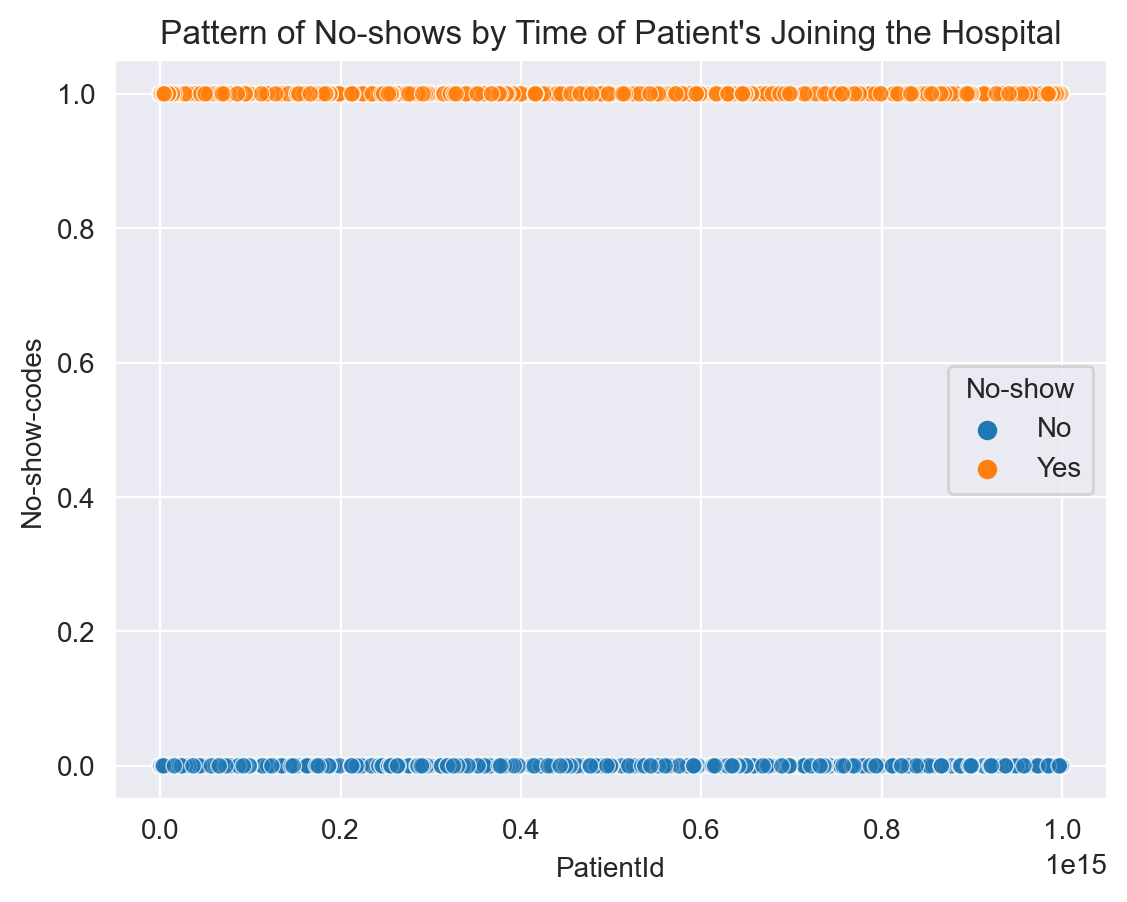

Correlation observed between the two variables is: 0.0015 or 0.15%


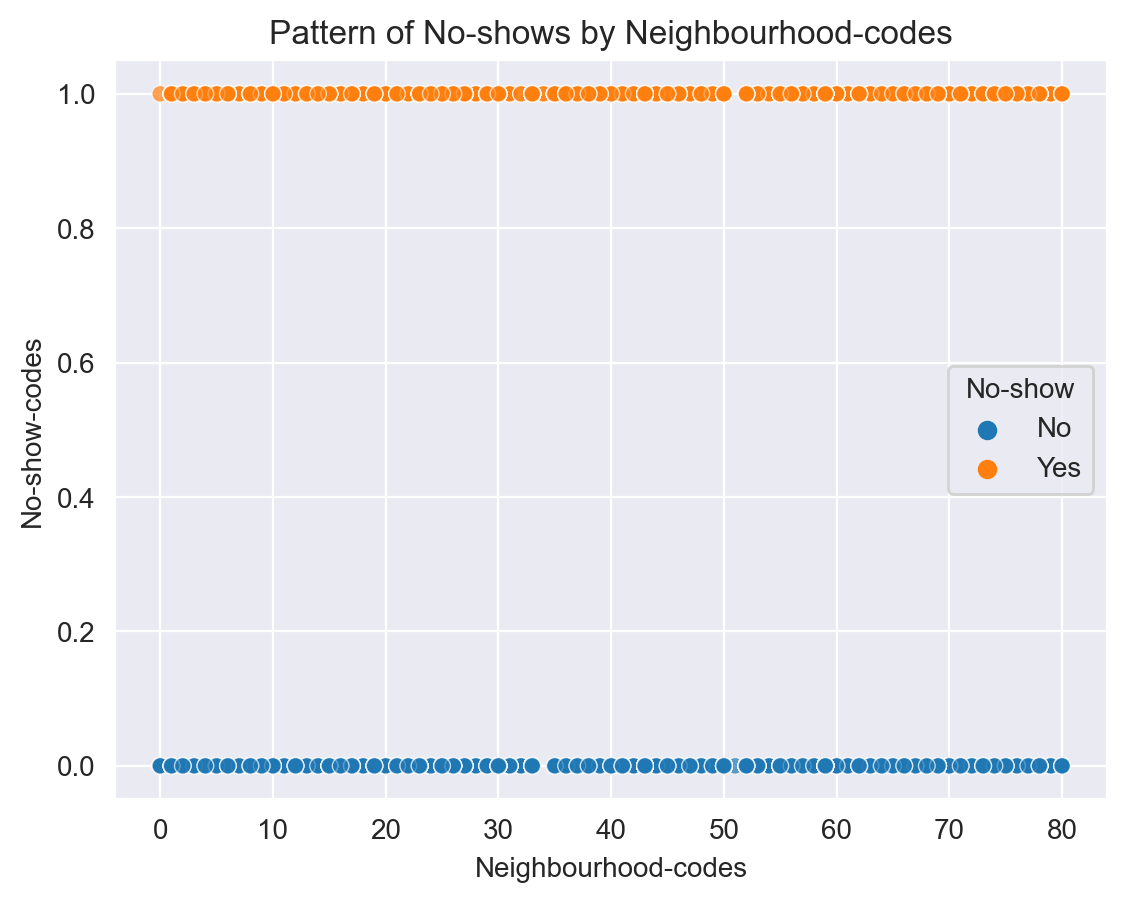

Correlation observed between the two variables is: 0.0090 or 0.90%


In [33]:
plot_scatter(initial_df, "Pattern of No-shows by Time of Patient's Joining the Hospital", "PatientId")
plot_scatter(initial_df, "Pattern of No-shows by Neighbourhood-codes", "Neighbourhood-codes")

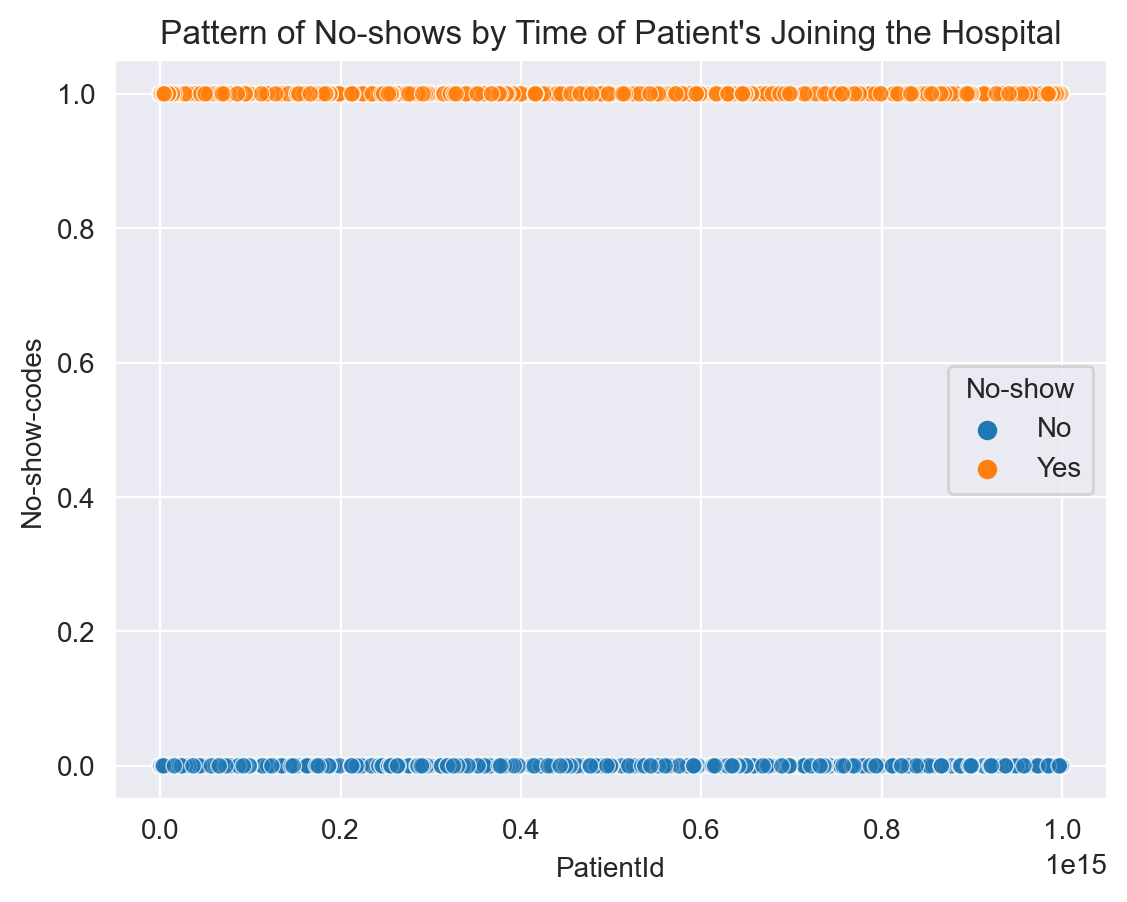

Correlation observed between patient's joining and no-shows is: 0.0015 or 0.15%


In [34]:





# Plotting a scatter plot between PatientId and No-show-codes we have
sns.scatterplot(data=initial_df[["PatientId", "No-show", "No-show-codes"]], x = "PatientId", y = "No-show-codes", hue = "No-show", alpha = 0.7)
plt.title("Pattern of No-shows by Time of Patient's Joining the Hospital")
plt.show()
print(f"Correlation observed between patient's joining and no-shows is: {abs(initial_df['PatientId'].corr(initial_df['No-show-codes'])):.4f} or {abs(initial_df['PatientId'].corr(initial_df['No-show-codes'])) * 100:.2f}%")

# # Plotting a scatter plot between AppointmentID and No-show-codes we have
# sns.scatterplot(data=initial_df[["AppointmentID", "No-show", "No-show-codes"]], x = "AppointmentID", y = "No-show-codes", hue = "No-show", alpha = 0.7)
# plt.title("Pattern of No-shows by General Hospital Operations")
# plt.show()
# print(f"Correlation observed between hospital appointment scheduling operations and no-shows is: {abs(initial_df['AppointmentID'].corr(initial_df['No-show-codes'])):.4f} or {abs(initial_df['AppointmentID'].corr(initial_df['No-show-codes'])) * 100:.2f}%")

In [35]:
# def perform_chi_square_test(dframe: pd.DataFrame, dependent_variable: str, independent_variable_int: str, alpha = 0.05):
#     from scipy.stats import chi2_contingency
  
#     # defining the table
#     focus_variables = pd.crosstab(dframe[dependent_variable], dframe[independent_variable_int], margins=True)

#     display(focus_variables)

#     # performing the chi-squared analysis
#     stat, p, dof, expected = chi2_contingency(np.array([focus_variables.iloc[0][:].values, focus_variables.iloc[1][:].values]))
    
#     # setting the level of significance (alpha) to serve as threshold against the p-value
#     alpha = alpha
    
#     print(f"p value is {str(p)}\n")
#     if p <= alpha:
#         print('\nThere is a statistically significant relationship between the two variables (reject H0)')
#     else:
#         print('\nThere is no statistically significant relationship between the two variables (H0 holds true)')

In [36]:
perform_chi_square_test(initial_df, "SMS_received", "No-show-codes")

No-show-codes      0      1     All
SMS_received                       
0              62510  12535   75045
1              25698   9784   35482
All            88208  22319  110527

p value is 0.0


There is a statistically significant relationship between the two variables (reject H0)


In [45]:
# from scipy.stats import chi2_contingency
  
# # defining the table
# focus_variables = pd.crosstab(initial_df["SMS_received"], initial_df["No-show-codes"], margins=True)

# # performing the chi-squared analysis
# stat, p, dof, expected = chi2_contingency(np.array([focus_variables.iloc[0][:].values, focus_variables.iloc[1][:].values]))
  
# # interpret p-value
# alpha = 0.05
# print(f"p value is {str(p)}\n")
# if p <= alpha:
#     print('\nThere is a statistically significant relationship between the two variables (reject H0)')
# else:
#     print('\nThere is no statistically significant relationship between the two variables (H0 holds true)')

p value is 0.0


There is a statistically significant relationship between the two variables (reject H0)


In [43]:
display(focus_variables.shape)
display(focus_variables)
display(focus_variables.iloc[0][:2])

(3, 3)

No-show-codes      0      1     All
SMS_received                       
0              62510  12535   75045
1              25698   9784   35482
All            88208  22319  110527

No-show-codes
0    62510
1    12535
Name: 0, dtype: int64

In [30]:
display(initial_df[initial_df["No-show"]=="Yes"]["Gender"].value_counts())
display(initial_df[initial_df["No-show"]=="No"]["Gender"].value_counts())

display(initial_df[initial_df["No-show"]=="Yes"]["Gender"].value_counts()/ initial_df[initial_df["No-show"]=="Yes"]["Gender"].value_counts().sum())
display(initial_df[initial_df["No-show"]=="No"]["Gender"].value_counts()/ initial_df[initial_df["No-show"]=="No"]["Gender"].value_counts().sum())

display(initial_df[initial_df["No-show"]=="Yes"]["Gender"].value_counts()/initial_df["Gender"].value_counts())
display(initial_df[initial_df["No-show"]=="No"]["Gender"].value_counts()/initial_df["Gender"].value_counts())

F    14594
M     7725
Name: Gender, dtype: int64

F    57246
M    30962
Name: Gender, dtype: int64

F    0.653882
M    0.346118
Name: Gender, dtype: float64

F    0.648989
M    0.351011
Name: Gender, dtype: float64

F    0.203146
M    0.199679
Name: Gender, dtype: float64

F    0.796854
M    0.800321
Name: Gender, dtype: float64

In [29]:
# initial_df[initial_df["No-show"]=="Yes"]["Gender"].value_counts().sum()

22319

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

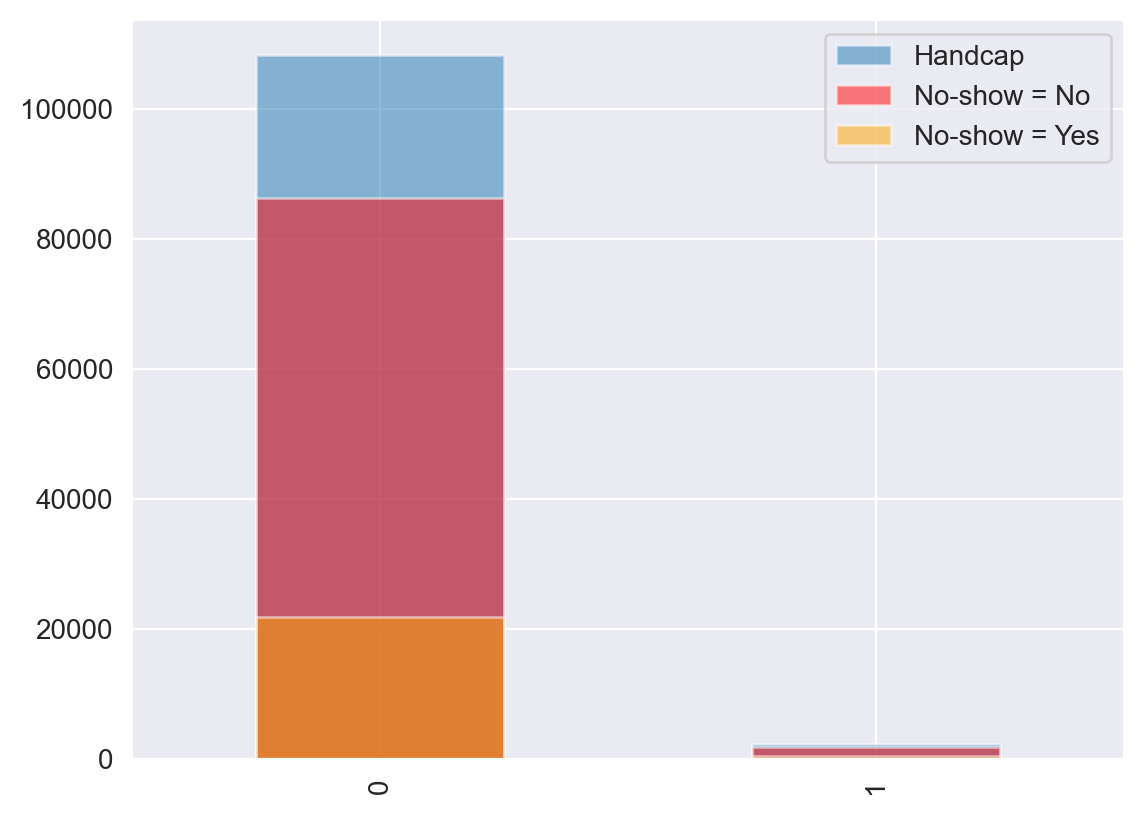

0    108286
1      2241
Name: Handcap, dtype: int64

In [87]:
display(initial_df["Handcap"].value_counts().plot(kind = "bar", alpha = 0.5))
display(initial_df["Handcap"][initial_df["No-show"] == "No"].value_counts().plot(kind = "bar", color="red", alpha = 0.5, label = "No-show = No"))
display(initial_df["Handcap"][initial_df["No-show"] == "Yes"].value_counts().plot(kind = "bar", color="orange", alpha = 0.5, label = "No-show = Yes"))
plt.legend()
plt.show()

display(initial_df["Handcap"].value_counts())

PatientId  AppointmentID Gender              ScheduledDay  \
99832  4.659432e+14        5775010      F 2016-06-06 08:58:13+00:00   

                 AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832 2016-06-06 00:00:00+00:00   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No

PatientId  AppointmentID Gender              ScheduledDay  \
63912  3.196321e+13        5700278      F 2016-05-16 09:17:44+00:00   
63915  3.196321e+13        5700279      F 2016-05-16 09:17:44+00:00   
68127  3.196321e+13        5562812      F 2016-04-08 14:29:17+00:00   
76284  3.196321e+13        5744037      F 2016-05-30 09:44:51+00:00   
97666  7.482346e+14        5717451      F 2016-05-19 07:57:56+00:00   

                 AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
63912 2016-05-19 00:00:00+00:00  115    ANDORINHAS            0             0   
63915 2016-05-19 00:00:00+00:00  115    ANDORINHAS            0             0   
68127 2016-05-16 00:00:00+00:00  115    ANDORINHAS            0             0   
76284 2016-05-30 00:00:00+00:00  115    ANDORINHAS            0             0   
97666 2016-06-03 00:00:00+00:00  115      SÃO JOSÉ            0             1   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
63912         0           0        1             0     Yes  
63915         0           0        1             0     Yes  
68127         0           0        1             0     Yes  
76284         0           0        1             0      No  
97666         0           0        0             1      No

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

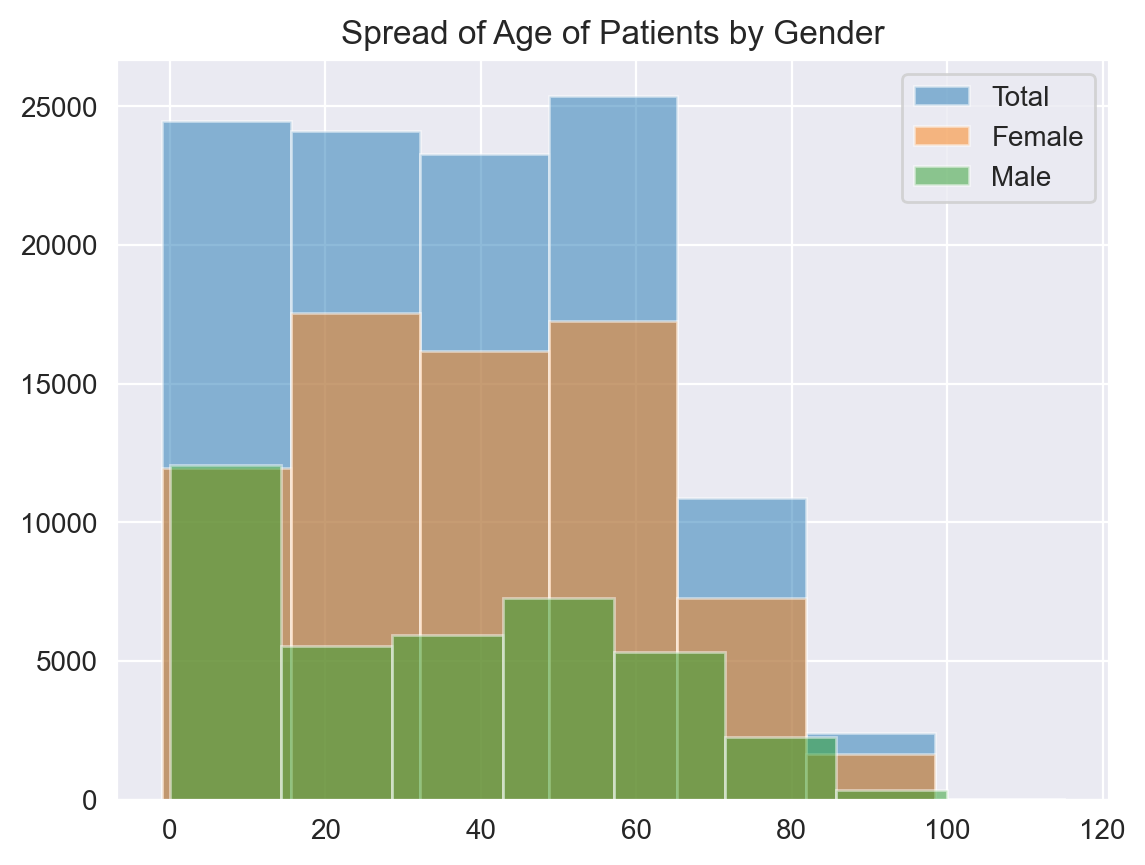

In [75]:
display(initial_df[initial_df["Age"] == -1].head())
display(initial_df[initial_df["Age"] == 115].head())
display(initial_df["Age"].hist(bins = 7, alpha = 0.5, label = "Total"))
display(initial_df["Age"][initial_df["Gender"] == "F"].hist(bins = 7, alpha = 0.5, label = "Female"))
display(initial_df["Age"][initial_df["Gender"] == "M"].hist(bins = 7, alpha = 0.5, label = "Male"))
plt.title("Spread of Age of Patients by Gender")
plt.legend()


In [4]:
# show number of duplicated rows in initial_df
initial_df.duplicated().sum()

0

In [5]:
initial_df.isnull().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# # show number of duplicated rows in initial_df
# duplicated_rows = initial_df.duplicated(subset = "datetime")
# initial_df.loc[duplicated_rows]
# initial_df.loc[duplicated_rows]
# # create new columns for "time since last appt"
# def get_time_since_last_appt(row):

# 	# print(row["datetime"])
# 	return (row["datetime"] - row["last_appt"]).total_seconds()

# initial_df["time_since_last_appt"] = initial_df.apply(get_time_since_last_appt, axis = 1)
# initial_df.head()

# #plot each of these columns
# sns.distplot(initial_df["time_since_last_appt"], bins = 10)
# plt.show()

# #pick a random sample of 5 rows
# rows_to_show = int(np.random.uniform(0, initial_df.shape[0]))
# rows_to_show

# #pick a random datetime to show
# random_date = initial_df.loc[rows_to_show, "datetime"]
# random_date

# #display the info in the random sample
# display(initial_df.loc[rows_to_show])

# #show all of the appts that were in the same week as the random one



In [56]:
# checking if there is any correlation between any of the factors (Gender, Age, Neigbourhood, Scholarship, Hipertension, Diabetes, Alcoholism,
# Handcap, and SMS_received) and the No-show variable 
revised_df = initial_df.copy()

In [ ]:
# from s

In [8]:
display(revised_df.head())

# display(revised_df[["AppointmentID", "No-show"]].plot(kind = "bar", x="No-show", y="AppointmentID"))


PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
0             1         0           0        0             0      No  
1             0         0           0        0             0      No  
2             0         0           0        0             0      No  
3             0         0           0        0             0      No  
4             1         1           0        0             0      No

In [57]:


revised_df["ScheduledDay-daynum"] = revised_df["ScheduledDay"].dt.day
revised_df["ScheduledDay-dayname"] = pd.Categorical(revised_df["ScheduledDay"].dt.day_name())
revised_df["ScheduledDay-weekday"] = revised_df["ScheduledDay"].dt.weekday

revised_df["AppointmentDay-daynum"] = revised_df["AppointmentDay"].dt.day
revised_df["AppointmentDay-dayname"] = pd.Categorical(revised_df["AppointmentDay"].dt.day_name())
revised_df["AppointmentDay-weekday"] = revised_df["AppointmentDay"].dt.weekday

revised_df["Days_Scheduled_Appointment"] = revised_df["AppointmentDay-daynum"] - revised_df["ScheduledDay-daynum"]
revised_df["Weeks_Scheduled_Appointment"] = (revised_df["AppointmentDay-daynum"] - revised_df["ScheduledDay-daynum"])//7

revised_df["Gender"] = pd.Categorical(revised_df["Gender"])
revised_df["Gender-codes"] = revised_df["Gender"].cat.codes

revised_df["Neighbourhood"] = pd.Categorical(revised_df["Neighbourhood"])
revised_df["Neighbourhood-codes"] = revised_df["Neighbourhood"].cat.codes

revised_df["No-show"] = pd.Categorical(revised_df["No-show"])
revised_df["No-show-codes"] = revised_df["No-show"].cat.codes

display(revised_df.head())

PatientId  AppointmentID Gender              ScheduledDay  \
0   29872499824296        5642903      F 2016-04-29 18:38:08+00:00   
1  558997776694438        5642503      M 2016-04-29 16:08:27+00:00   
2    4262962299951        5642549      F 2016-04-29 16:19:04+00:00   
3     867951213174        5642828      F 2016-04-29 17:29:31+00:00   
4    8841186448183        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  ...  ScheduledDay-dayname  ScheduledDay-weekday  \
0             1         0  ...                Friday                     4   
1             0         0  ...                Friday                     4   
2             0         0  ...                Friday                     4   
3             0         0  ...                Friday                     4   
4             1         1  ...                Friday                     4   

   AppointmentDay-daynum AppointmentDay-dayname  AppointmentDay-weekday  \
0                     29                 Friday                       4   
1                     29                 Friday                       4   
2                     29                 Friday                       4   
3                     29                 Friday                       4   
4                     29                 Friday                       4   

  Days_Scheduled_Appointment  Weeks_Scheduled_Appointment  Gender-codes  \
0                          0                            0             0   
1                          0                            0             1   
2                          0                            0             0   
3                          0                            0             0   
4                          0                            0             0   

  Neighbourhood-codes  No-show-codes  
0                  39              0  
1                  39              0  
2                  45              0  
3                  54              0  
4                  39              0  

[5 rows x 25 columns]

In [59]:
list(revised_df.columns)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show',
 'ScheduledDay-daynum',
 'ScheduledDay-dayname',
 'ScheduledDay-weekday',
 'AppointmentDay-daynum',
 'AppointmentDay-dayname',
 'AppointmentDay-weekday',
 'Days_Scheduled_Appointment',
 'Weeks_Scheduled_Appointment',
 'Gender-codes',
 'Neighbourhood-codes',
 'No-show-codes']

In [55]:
display(revised_df[(revised_df["ScheduledDay-dayname"] == revised_df["AppointmentDay-dayname"]) & (revised_df["ScheduledDay-daynum"] != revised_df["AppointmentDay-daynum"])])

PatientId  AppointmentID Gender              ScheduledDay  \
114      35856213466619        5591384      F 2016-04-15 16:58:02+00:00   
117           744463183        5539219      F 2016-04-01 14:27:30+00:00   
118       9711615822964        5539858      F 2016-04-01 16:01:28+00:00   
120       6297228525237        5590755      F 2016-04-15 14:54:29+00:00   
121     456431233657599        5540024      F 2016-04-01 16:40:41+00:00   
...                 ...            ...    ...                       ...   
110478    5478497292889        5671780      F 2016-05-09 07:11:08+00:00   
110520  996997666245785        5650534      F 2016-05-03 07:51:47+00:00   
110521   36355337746436        5651072      F 2016-05-03 08:23:40+00:00   
110522    2572134369293        5651768      F 2016-05-03 09:15:35+00:00   
110523    3596266328735        5650093      F 2016-05-03 07:27:33+00:00   

                  AppointmentDay  Age   Neighbourhood  Scholarship  \
114    2016-04-29 00:00:00+00:00   15      BELA VISTA            0   
117    2016-04-29 00:00:00+00:00   34   SANTO ANTÔNIO            1   
118    2016-04-29 00:00:00+00:00   35   SANTO ANTÔNIO            0   
120    2016-04-29 00:00:00+00:00   16  MÁRIO CYPRESTE            0   
121    2016-04-29 00:00:00+00:00   18  MÁRIO CYPRESTE            0   
...                          ...  ...             ...          ...   
110478 2016-06-06 00:00:00+00:00   27     RESISTÊNCIA            0   
110520 2016-06-07 00:00:00+00:00   42     MARIA ORTIZ            0   
110521 2016-06-07 00:00:00+00:00   53     MARIA ORTIZ            0   
110522 2016-06-07 00:00:00+00:00   56     MARIA ORTIZ            0   
110523 2016-06-07 00:00:00+00:00   51     MARIA ORTIZ            0   

        Hipertension  Diabetes  ...  No-show  ScheduledDay-daynum  \
114                0         0  ...       No                   15   
117                0         0  ...       No                    1   
118                0         0  ...       No                    1   
120                0         0  ...       No                   15   
121                0         0  ...       No                    1   
...              ...       ...  ...      ...                  ...   
110478             0         0  ...       No                    9   
110520             0         0  ...       No                    3   
110521             0         0  ...       No                    3   
110522             0         0  ...       No                    3   
110523             0         0  ...       No                    3   

        ScheduledDay-dayname ScheduledDay-weekday  AppointmentDay-daynum  \
114                   Friday                    4                     29   
117                   Friday                    4                     29   
118                   Friday                    4                     29   
120                   Friday                    4                     29   
121                   Friday                    4                     29   
...                      ...                  ...                    ...   
110478                Monday                    0                      6   
110520               Tuesday                    1                      7   
110521               Tuesday                    1                      7   
110522               Tuesday                    1                      7   
110523               Tuesday                    1                      7   

       AppointmentDay-dayname  AppointmentDay-weekday  Gender-codes  \
114                    Friday                       4             0   
117                    Friday                       4             0   
118                    Friday                       4             0   
120                    Friday                       4             0   
121                    Friday                       4             0   
...                       ...                     ...           ...   
110478                 Monday    

PatientId  AppointmentID Gender              ScheduledDay  \
0   29872499824296        5642903      F 2016-04-29 18:38:08+00:00   
1  558997776694438        5642503      M 2016-04-29 16:08:27+00:00   
2    4262962299951        5642549      F 2016-04-29 16:19:04+00:00   
3     867951213174        5642828      F 2016-04-29 17:29:31+00:00   
4    8841186448183        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  \
0             1         0           0        0             0      No   
1             0         0           0        0             0      No   
2             0         0           0        0             0      No   
3             0         0           0        0             0      No   
4             1         1           0        0             0      No   

   No-show-codes  
0              0  
1              0  
2              0  
3              0  
4              0

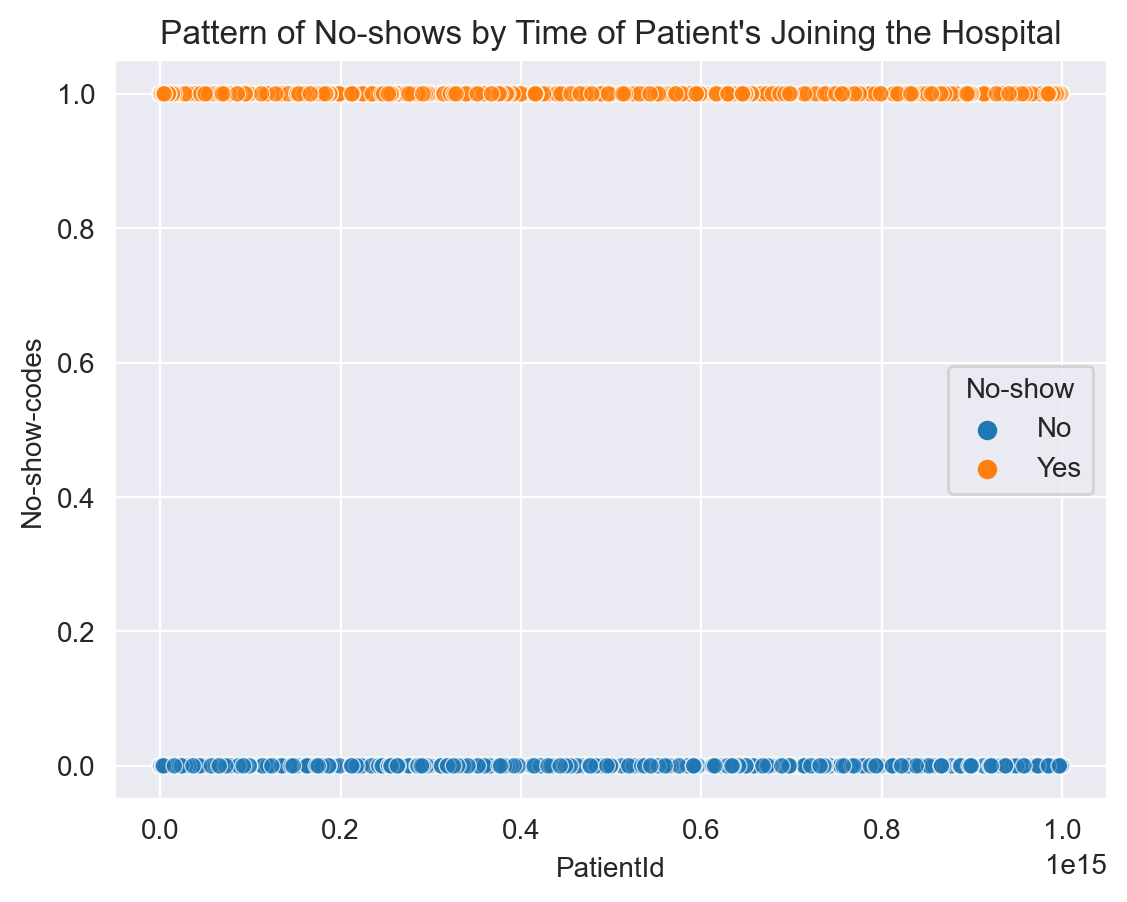

Correlation observed between patient's joining and no-shows is: 0.0015 or 0.15%


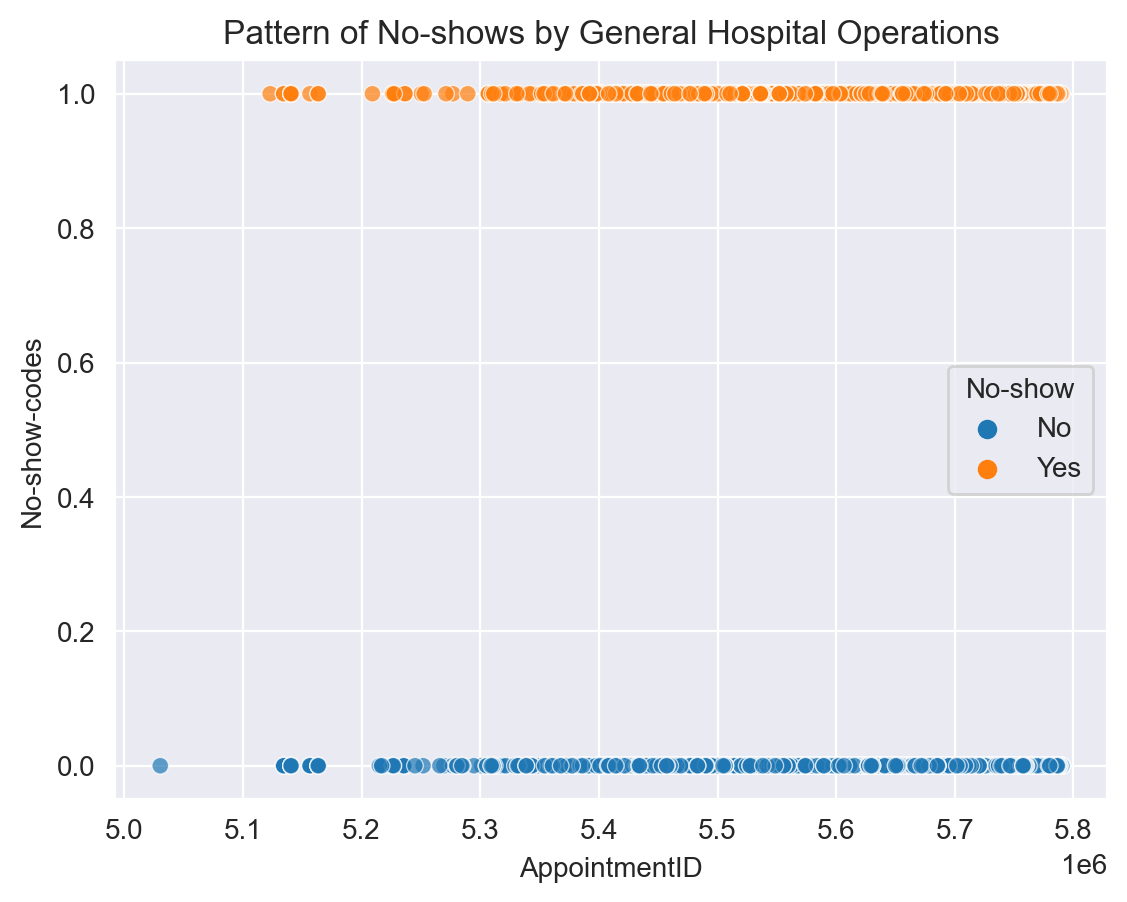

Correlation observed between hospital appointment scheduling operations and no-shows is: 0.1626 or 16.26%


In [39]:

# Plotting a scatter plot between PatientId and No-show-codes we have
sns.scatterplot(data=revised_df[["PatientId", "No-show", "No-show-codes"]], x = "PatientId", y = "No-show-codes", hue = "No-show", alpha = 0.7)
plt.title("Pattern of No-shows by Time of Patient's Joining the Hospital")
plt.show()
print(f"Correlation observed between patient's joining and no-shows is: {abs(revised_df['PatientId'].corr(revised_df['No-show-codes'])):.4f} or {abs(revised_df['PatientId'].corr(revised_df['No-show-codes'])) * 100:.2f}%")

# Plotting a scatter plot between AppointmentID and No-show-codes we have
sns.scatterplot(data=revised_df[["AppointmentID", "No-show", "No-show-codes"]], x = "AppointmentID", y = "No-show-codes", hue = "No-show", alpha = 0.7)
plt.title("Pattern of No-shows by General Hospital Operations")
plt.show()
print(f"Correlation observed between hospital appointment scheduling operations and no-shows is: {abs(revised_df['AppointmentID'].corr(revised_df['No-show-codes'])):.4f} or {abs(revised_df['AppointmentID'].corr(revised_df['No-show-codes'])) * 100:.2f}%")


# This was to establish whether there was a discernible pattern between the behaviour of earlier-registered patients
# to scheduled appointments and later-registered patients to scheduled appointments. 
# 
# Also, the second graph was to establish whether there was any discernible pattern between number of no-shows at the early operations of the hospital
# and those observed more recently
#   
# It is clear that there is no established pattern observed from either of these factors 


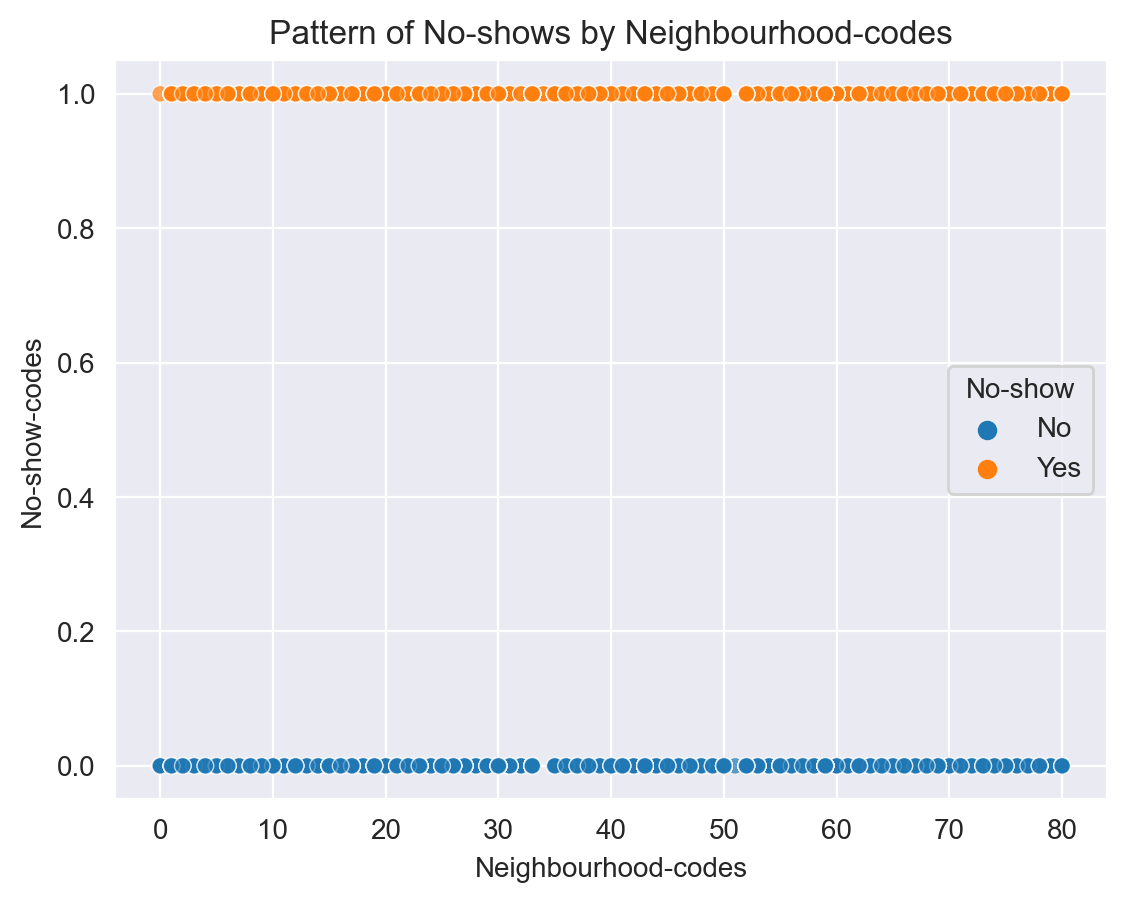

In [43]:
# Plotting a scatter plot between Neighbourhood-codes and No-show-codes we have
sns.scatterplot(data=revised_df[["Neighbourhood-codes", "No-show", "No-show-codes"]], x = "Neighbourhood-codes", y = "No-show-codes", hue = "No-show", alpha = 0.7)
plt.title("Pattern of No-shows by Neighbourhood-codes")
plt.show()

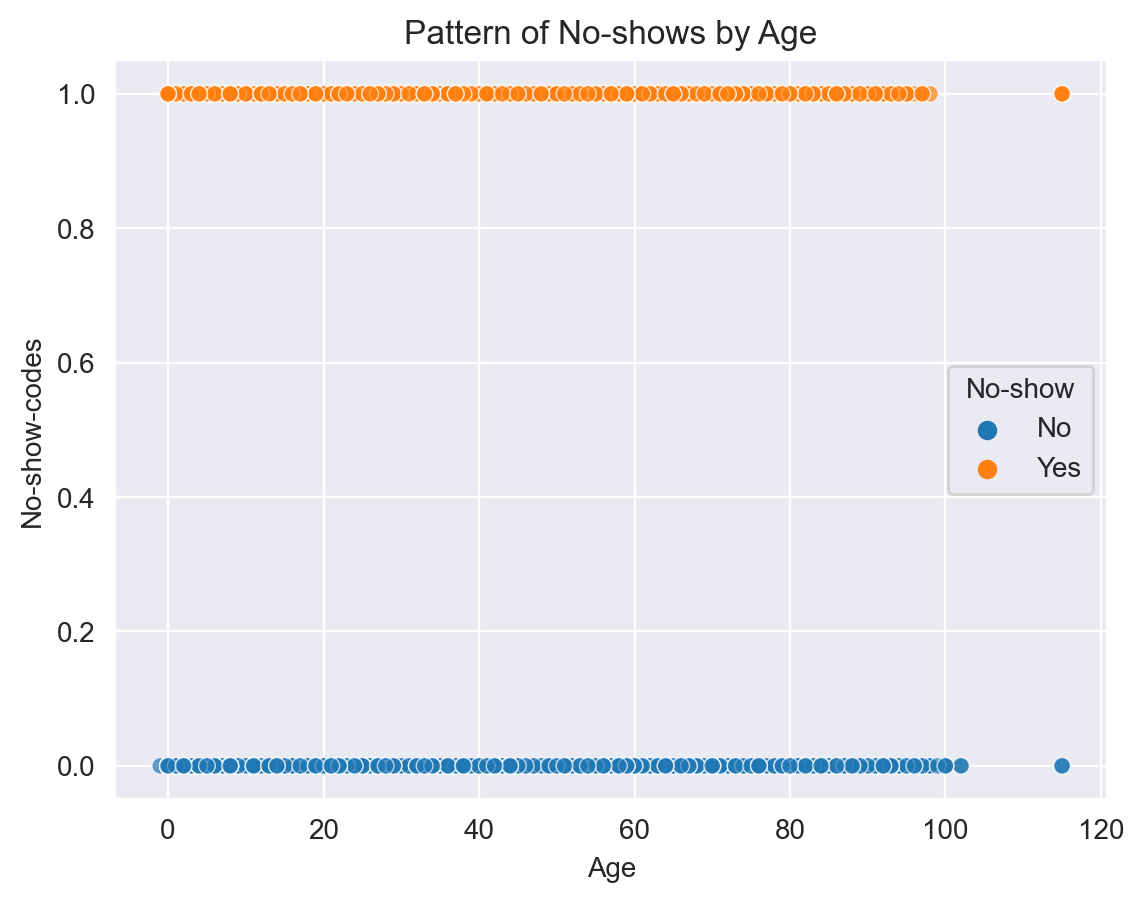

Correlation observed between patient's joining and no-shows is: 0.0603 or 6.03%


In [60]:

# Plotting a scatter plot between PatientId and No-show-codes we have
sns.scatterplot(data=revised_df[["Age", "No-show", "No-show-codes"]], x = "Age", y = "No-show-codes", hue = "No-show", alpha = 0.7)
plt.title("Pattern of No-shows by Age")
plt.show()
print(f"Correlation observed between patient's joining and no-shows is: {abs(revised_df['Age'].corr(revised_df['No-show-codes'])):.4f} or {abs(revised_df['Age'].corr(revised_df['No-show-codes'])) * 100:.2f}%")



# This was to establish whether there was a discernible pattern between the Age of patients and the observed No-shows.
#   
# It is clear that there is no established pattern observed from the Age of the patients 

In [ ]:
revised_df["Age"][revised_df["No-show"] == "No"].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='survived')
revised_df["Age"][died].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='died')
plt.legend();

In [ ]:
# Check for null values
# Convert PatientId and AppointmentID to int64
# Convert Gender, Neighbourhood to string ca tegorical variable
# Convert Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show to boolean categorical variable
# Mistake observed in Age = -1. Therefore correct and add column for Imput_Age
# Possible mistake in Handcap = 4 as it is supposed to be boolean type. Change to 0/1, and add column for Imput_Handcap


# Add extra columns ScheduleWeekDay ("Monday", "Tuesday", etc) and AppointmentWeekDay